# Auswertung I3W

Die Ergebnisse des Trainings wurden hier abgelegt:

In [66]:
path_ray_results = "/home/thorsten/ray_results/IntersectionExample/"
folder_results = "PPO_MultiAgentIntersectionEnv_sharedPolicy_4veh-v0_0_2019-05-01_16-35-43tch5bxa3"

## A) Ergebnisse der Baselines

In [67]:
# mean reward
mr_b1 = 0
mr_b2 = 0
mr_b3 = 0

# metrik k1

# metrik k2

# metrik u

## B) Auswertung des Trainings
Auswertung der csv, die während des Trainings erstellt worden ist.

In [68]:
filename_trainingprogress = path_ray_results \
                            + folder_results \
                            + "/progress.csv"

episodes_per_iteration = 20

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import json

data = pd.read_csv(filename_trainingprogress,sep=',',header=0)
list(data)

['timesteps_total',
 'episode_reward_mean',
 'training_iteration',
 'config',
 'timestamp',
 'iterations_since_restore',
 'time_total_s',
 'done',
 'timesteps_this_iter',
 'date',
 'episodes_total',
 'hostname',
 'experiment_id',
 'info',
 'pid',
 'policy_reward_mean',
 'time_this_iter_s',
 'episode_len_mean',
 'node_ip',
 'episode_reward_max',
 'custom_metrics',
 'num_metric_batches_dropped',
 'timesteps_since_restore',
 'episodes_this_iter',
 'episode_reward_min',
 'time_since_restore']

Text(0.5, 1.0, 'Training PPO')

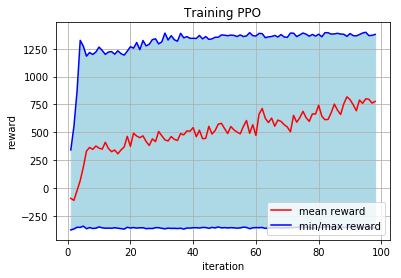

In [69]:
episode_reward_min = data[['episode_reward_min']].values
episode_reward_mean = data[['episode_reward_mean']].values
episode_reward_max = data[['episode_reward_max']].values

episodes_total = data[['episodes_total']].values/episodes_per_iteration
training_iteration = data[['training_iteration']].values

plt.plot(training_iteration,
         episode_reward_min,
         c='b')
plt.plot(training_iteration,
         episode_reward_mean,
         c='r',
         label='mean reward')
plt.plot(training_iteration,
         episode_reward_max,
         c='b',
         label='min/max reward')
plt.fill_between(np.squeeze(training_iteration),
                 np.squeeze(episode_reward_min),
                 np.squeeze(episode_reward_max),
                 color='lightblue')
plt.legend(loc='lower right')
plt.xlabel('iteration')
plt.ylabel('reward')
plt.grid()
plt.title('Training PPO')
#plt.ylim(-200,450)
#plt.xlim(0,1000)

In [46]:
policy_reward_mean = data[['policy_reward_mean']].values

rl_0_prm = []
rl_1_prm = []

prm_list = policy_reward_mean.tolist()
for prm in prm_list:
    prm_str = prm[0]
    prm_str = prm_str.replace("'",'"')
    prm_dict = json.loads(prm_str)
    prm_rl_0 = prm_dict["rl_0"]
    prm_rl_1 = prm_dict["rl_1"]
    rl_0_prm.append(prm_rl_0)
    rl_1_prm.append(prm_rl_1)
    
episodes_total = data[['episodes_total']].values/episodes_per_iteration

plt.plot(training_iteration,
         rl_0_prm,
         c='b',
         label='mean reward rl_0')
plt.plot(training_iteration,
         rl_1_prm,
         c='r',
         label='mean reward rl_1')

plt.legend(loc='lower right')
plt.xlabel('iteration')
plt.ylabel('reward')
plt.grid()
plt.title('Training PPO')
#plt.ylim(0,200)

KeyError: 'rl_1'

## C) Test durchführen

Um bei jedem rollout eine andere Startposition zu nutzen, muss im Ergebniss Ordner in *parms.json* der Parameter *starting_position_shuffle* auf *true* gesetzt werden.

Ausführen des Visualisierungsskripts, dort kann auch die logdatei angepasst werden.

In [59]:
! python /home/thorsten/flow_2/flow/flow/visualize/visualizer_rllib_log_MultiI3W.py /home/thorsten/ray_results/IntersectionExample/PPO_MultiAgentIntersectionEnv_sharedPolicy_4veh-v0_0_2019-05-01_16-35-43tch5bxa3 90 --num-rollouts 50

Process STDOUT and STDERR is being redirected to /tmp/ray/session_2019-05-01_20-34-43_13194/logs.
Waiting for redis server at 127.0.0.1:51186 to respond...
Waiting for redis server at 127.0.0.1:35024 to respond...
Starting the Plasma object store with 6.554658406 GB memory using /tmp.

View the web UI at http://localhost:8890/notebooks/ray_ui.ipynb?token=0351c0ec04782ece019cbdf727da6a0b74640ae41905d2f9

False
Created LogSyncer for /home/thorsten/ray_results/PPO_MultiAgentIntersectionEnv_sharedPolicy_4veh-v0_2019-05-01_20-34-44cdr5c9ry -> None
2019-05-01 20:34:44,509	INFO ppo.py:130 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting simple_optimizer=True if this doesn't work for you.
2019-05-01 20:34:44,510	WARNING ppo.py:137 -- By default, observations will be normalized with MeanStdFilter
Loading configuration... done.
Success.
 Starting SUMO on port 57719
Loading configuration... done.
New Teamspirit:
-0.018691575553503315
-0.

{'rl_3': array([ 8.48565723e-02,  8.11788857e-02,  9.13267139e-02,  1.02950729e-01,
        9.98614730e-01, -3.57954280e-04,  6.86595667e-04,  1.12777247e-03]), 'rl_2': array([ 1.02950729e-01,  8.11788857e-02,  9.13267139e-02,  8.48565723e-02,
        9.97486957e-01, -1.48572675e-03, -4.41176806e-04, -1.12777247e-03]), 'rl_1': array([ 9.13267139e-02,  8.11788857e-02,  1.02950729e-01,  8.48565723e-02,
        9.97928134e-01, -1.04454995e-03,  4.41176806e-04, -6.86595667e-04]), 'rl_0': array([8.11788857e-02, 9.13267139e-02, 1.02950729e-01, 8.48565723e-02,
       9.98972684e-01, 1.04454995e-03, 1.48572675e-03, 3.57954280e-04])}
{'rl_3': array([ 8.97566421e-02,  8.77309135e-02,  9.98255412e-02,  1.12041798e-01,
        9.98604211e-01, -3.58191670e-04,  6.87775617e-04,  1.13038401e-03]), 'rl_2': array([ 1.12041798e-01,  8.77309135e-02,  9.98255412e-02,  8.97566421e-02,
        9.97473827e-01, -1.48857569e-03, -4.42608398e-04, -1.13038401e-03]), 'rl_1': array([ 9.98255412e-02,  8.77309135e-0

{'rl_3': array([ 2.02164533e-01,  1.80679148e-01,  1.96356831e-01,  2.34856020e-01,
        9.98372563e-01, -3.75735174e-04,  6.90362193e-04,  1.17095592e-03]), 'rl_2': array([ 2.34856020e-01,  1.80679148e-01,  1.96356831e-01,  2.02164533e-01,
        9.97201607e-01, -1.54669109e-03, -4.80593724e-04, -1.17095592e-03]), 'rl_1': array([ 1.96356831e-01,  1.80679148e-01,  2.34856020e-01,  2.02164533e-01,
        9.97682201e-01, -1.06609737e-03,  4.80593724e-04, -6.90362193e-04]), 'rl_0': array([1.80679148e-01, 1.96356831e-01, 2.34856020e-01, 2.02164533e-01,
       9.98748298e-01, 1.06609737e-03, 1.54669109e-03, 3.75735174e-04])}
{'rl_3': array([ 2.10553977e-01,  1.88025476e-01,  2.02026258e-01,  2.44206180e-01,
        9.98347889e-01, -3.78375233e-04,  6.89362851e-04,  1.17489954e-03]), 'rl_2': array([ 2.44206180e-01,  1.88025476e-01,  2.02026258e-01,  2.10553977e-01,
        9.97172989e-01, -1.55327477e-03, -4.85536684e-04, -1.17489954e-03]), 'rl_1': array([ 2.02026258e-01,  1.88025476e-0

{'rl_3': array([ 3.07417224e-01,  2.56156569e-01,  2.89377079e-01,  3.53711974e-01,
        9.97977728e-01, -4.31427771e-04,  6.69144195e-04,  1.23008877e-03]), 'rl_2': array([ 3.53711974e-01,  2.56156569e-01,  2.89377079e-01,  3.07417224e-01,
        9.96747639e-01, -1.66151654e-03, -5.60944575e-04, -1.23008877e-03]), 'rl_1': array([ 2.89377079e-01,  2.56156569e-01,  3.53711974e-01,  3.07417224e-01,
        9.97308584e-01, -1.10057197e-03,  5.60944575e-04, -6.69144195e-04]), 'rl_0': array([2.56156569e-01, 2.89377079e-01, 3.53711974e-01, 3.07417224e-01,
       9.98409156e-01, 1.10057197e-03, 1.66151654e-03, 4.31427771e-04])}
{'rl_3': array([ 3.15993032e-01,  2.61244015e-01,  2.98362271e-01,  3.62851208e-01,
        9.97940698e-01, -4.37843671e-04,  6.67078090e-04,  1.23557996e-03]), 'rl_2': array([ 3.62851208e-01,  2.61244015e-01,  2.98362271e-01,  3.15993032e-01,
        9.96705118e-01, -1.67342363e-03, -5.68501873e-04, -1.23557996e-03]), 'rl_1': array([ 2.98362271e-01,  2.61244015e-0

{'rl_3': array([ 4.18293240e-01,  3.26592627e-01,  3.88990958e-01,  4.57846664e-01,
        9.97418721e-01, -5.46524274e-04,  6.30600897e-04,  1.34389118e-03]), 'rl_2': array([ 4.57846664e-01,  3.26592627e-01,  3.88990958e-01,  4.18293240e-01,
        9.96074830e-01, -1.89041546e-03, -7.13290286e-04, -1.34389118e-03]), 'rl_1': array([ 3.88990958e-01,  3.26592627e-01,  4.57846664e-01,  4.18293240e-01,
        9.96788120e-01, -1.17712517e-03,  7.13290286e-04, -6.30600897e-04]), 'rl_0': array([3.26592627e-01, 3.88990958e-01, 4.57846664e-01, 4.18293240e-01,
       9.97965245e-01, 1.17712517e-03, 1.89041546e-03, 5.46524274e-04])}
{'rl_3': array([ 4.25723258e-01,  3.32283082e-01,  3.98788011e-01,  4.65133721e-01,
        9.97368832e-01, -5.57474294e-04,  6.27444423e-04,  1.34850960e-03]), 'rl_2': array([ 4.65133721e-01,  3.32283082e-01,  3.98788011e-01,  4.25723258e-01,
        9.96020322e-01, -1.90598389e-03, -7.21065174e-04, -1.34850960e-03]), 'rl_1': array([ 3.98788011e-01,  3.32283082e-0

{'rl_3': array([ 5.31852943e-01,  4.06203418e-01,  5.03472398e-01,  5.57947357e-01,
        9.96586715e-01, -7.77131051e-04,  4.74223751e-04,  1.34890155e-03]), 'rl_2': array([ 5.57947357e-01,  4.06203418e-01,  5.03472398e-01,  5.31852943e-01,
        9.95237814e-01, -2.12603260e-03, -8.74677802e-04, -1.34890155e-03]), 'rl_1': array([ 5.03472398e-01,  4.06203418e-01,  5.57947357e-01,  5.31852943e-01,
        9.96112491e-01, -1.25135480e-03,  8.74677802e-04, -4.74223751e-04]), 'rl_0': array([4.06203418e-01, 5.03472398e-01, 5.57947357e-01, 5.31852943e-01,
       9.97363846e-01, 1.25135480e-03, 2.12603260e-03, 7.77131051e-04])}
{'rl_3': array([ 5.38723523e-01,  4.12567080e-01,  5.11349584e-01,  5.63802469e-01,
        9.96523583e-01, -7.91915010e-04,  4.71015868e-04,  1.35184049e-03]), 'rl_2': array([ 5.63802469e-01,  4.12567080e-01,  5.11349584e-01,  5.38723523e-01,
        9.95171743e-01, -2.14375550e-03, -8.80824624e-04, -1.35184049e-03]), 'rl_1': array([ 5.11349584e-01,  4.12567080e-0

{'rl_3': array([ 6.27339349e-01,  5.01142717e-01,  6.15892216e-01,  6.47604282e-01,
        9.95628812e-01, -9.86501643e-04,  4.40351375e-04,  1.38917285e-03]), 'rl_2': array([ 6.47604282e-01,  5.01142717e-01,  6.15892216e-01,  6.27339349e-01,
        9.94239639e-01, -2.37567449e-03, -9.48821474e-04, -1.38917285e-03]), 'rl_1': array([ 6.15892216e-01,  5.01142717e-01,  6.47604282e-01,  6.27339349e-01,
        9.95188460e-01, -1.42685302e-03,  9.48821474e-04, -4.40351375e-04]), 'rl_0': array([5.01142717e-01, 6.15892216e-01, 6.47604282e-01, 6.27339349e-01,
       9.96615313e-01, 1.42685302e-03, 2.37567449e-03, 9.86501643e-04])}
{'rl_3': array([ 6.32753967e-01,  5.05953555e-01,  6.23704354e-01,  6.54057502e-01,
        9.95554661e-01, -1.06620482e-03,  4.39290873e-04,  1.39166936e-03]), 'rl_2': array([ 6.54057502e-01,  5.05953555e-01,  6.23704354e-01,  6.32753967e-01,
        9.94162991e-01, -2.45787417e-03, -9.52378484e-04, -1.39166936e-03]), 'rl_1': array([ 6.23704354e-01,  5.05953555e-0

{'rl_3': array([ 7.15109287e-01,  6.15290166e-01,  7.28114193e-01,  7.34312230e-01,
        9.94439783e-01, -1.25272485e-03,  4.44967986e-04,  1.42222694e-03]), 'rl_2': array([ 7.34312230e-01,  6.15290166e-01,  7.28114193e-01,  7.15109287e-01,
        9.93017556e-01, -2.67495179e-03, -9.77258955e-04, -1.42222694e-03]), 'rl_1': array([ 7.28114193e-01,  6.15290166e-01,  7.34312230e-01,  7.15109287e-01,
        9.93994815e-01, -1.69769283e-03,  9.77258955e-04, -4.44967986e-04]), 'rl_0': array([0.61529017, 0.72811419, 0.73431223, 0.71510929, 0.99569251,
       0.00169769, 0.00267495, 0.00125272])}
{'rl_3': array([ 7.21990501e-01,  6.20394337e-01,  7.35994060e-01,  7.39923882e-01,
        9.94355175e-01, -1.26463065e-03,  4.46609028e-04,  1.42432851e-03]), 'rl_2': array([ 7.39923882e-01,  6.20394337e-01,  7.35994060e-01,  7.21990501e-01,
        9.92930846e-01, -2.68895916e-03, -9.77719481e-04, -1.42432851e-03]), 'rl_1': array([ 7.35994060e-01,  6.20394337e-01,  7.39923882e-01,  7.21990501e

{'rl_3': array([ 8.14307208e-01,  7.24706182e-01,  8.29149440e-01,  8.19610865e-01,
        9.93090365e-01, -1.42256597e-03,  4.74234321e-04,  1.44244157e-03]), 'rl_2': array([ 8.19610865e-01,  7.24706182e-01,  8.29149440e-01,  8.14307208e-01,
        9.91647924e-01, -2.86500753e-03, -9.68207246e-04, -1.44244157e-03]), 'rl_1': array([ 8.29149440e-01,  7.24706182e-01,  8.19610865e-01,  8.14307208e-01,
        9.92616131e-01, -1.89680029e-03,  9.68207246e-04, -4.74234321e-04]), 'rl_0': array([0.72470618, 0.82914944, 0.81961087, 0.81430721, 0.99451293,
       0.0018968 , 0.00286501, 0.00142257])}
{'rl_3': array([ 8.19511882e-01,  7.32799721e-01,  8.35962197e-01,  8.26016709e-01,
        9.92994329e-01, -1.43272755e-03,  4.76162092e-04,  1.44320385e-03]), 'rl_2': array([ 8.26016709e-01,  7.32799721e-01,  8.35962197e-01,  8.19511882e-01,
        9.91551125e-01, -2.87593140e-03, -9.67041759e-04, -1.44320385e-03]), 'rl_1': array([ 8.35962197e-01,  7.32799721e-01,  8.26016709e-01,  8.19511882e

{'rl_3': array([ 9.05948515e-01,  8.39617804e-01,  9.32454115e-01,  9.14400460e-01,
        9.91571990e-01, -1.56140649e-03,  5.09813343e-04,  1.45369887e-03]), 'rl_2': array([ 9.14400460e-01,  8.39617804e-01,  9.32454115e-01,  9.05948515e-01,
        9.90118291e-01, -3.01510536e-03, -9.43885528e-04, -1.45369887e-03]), 'rl_1': array([ 9.32454115e-01,  8.39617804e-01,  9.14400460e-01,  9.05948515e-01,
        9.91062177e-01, -2.07121984e-03,  9.43885528e-04, -5.09813343e-04]), 'rl_0': array([0.8396178 , 0.93245412, 0.91440046, 0.90594852, 0.9931334 ,
       0.00207122, 0.00301511, 0.00156141])}
{'rl_3': array([ 9.12118250e-01,  8.43797782e-01,  9.39777006e-01,  9.21536861e-01,
        9.91465101e-01, -1.56941280e-03,  5.13054604e-04,  1.45480261e-03]), 'rl_2': array([ 9.21536861e-01,  8.43797782e-01,  9.39777006e-01,  9.12118250e-01,
        9.90010298e-01, -3.02421541e-03, -9.41748011e-04, -1.45480261e-03]), 'rl_1': array([ 9.39777006e-01,  8.43797782e-01,  9.21536861e-01,  9.12118250e

{'rl_3': array([ 9.99905001e-01,  9.60174224e-01,  1.03166688e+00,  9.98799193e-01,
        9.89893810e-01, -1.65322259e-03,  5.62328874e-04,  1.46296368e-03]), 'rl_2': array([ 9.98799193e-01,  9.60174224e-01,  1.03166688e+00,  9.99905001e-01,
        9.88430846e-01, -3.11618627e-03, -9.00634803e-04, -1.46296368e-03]), 'rl_1': array([ 1.03166688e+00,  9.60174224e-01,  9.98799193e-01,  9.99905001e-01,
        9.89331481e-01, -2.21555146e-03,  9.00634803e-04, -5.62328874e-04]), 'rl_0': array([0.96017422, 1.03166688, 0.99879919, 0.999905  , 0.99154703,
       0.00221555, 0.00311619, 0.00165322])}
{'rl_3': array([ 1.00521449e+00,  9.70075207e-01,  1.03679110e+00,  1.00742608e+00,
        9.89776011e-01, -1.65734048e-03,  5.66029258e-04,  1.46322285e-03]), 'rl_2': array([ 1.00742608e+00,  9.70075207e-01,  1.03679110e+00,  1.00521449e+00,
        9.88312788e-01, -3.12056332e-03, -8.97193589e-04, -1.46322285e-03]), 'rl_1': array([ 1.03679110e+00,  9.70075207e-01,  1.00742608e+00,  1.00521449e

{'rl_3': array([ 1.08806180e+00,  1.07200299e+00,  1.12765676e+00,  1.08863966e+00,
        9.88055146e-01, -1.69216398e-03,  6.27840041e-04,  1.46668016e-03]), 'rl_2': array([ 1.08863966e+00,  1.07200299e+00,  1.12765676e+00,  1.08806180e+00,
        9.86588465e-01, -3.15884415e-03, -8.38840122e-04, -1.46668016e-03]), 'rl_1': array([ 1.12765676e+00,  1.07200299e+00,  1.08863966e+00,  1.08806180e+00,
        9.87427306e-01, -2.32000402e-03,  8.38840122e-04, -6.27840041e-04]), 'rl_0': array([1.07200299, 1.12765676, 1.08863966, 1.0880618 , 0.98974731,
       0.00232   , 0.00315884, 0.00169216])}
{'rl_3': array([ 1.09363967e+00,  1.07958561e+00,  1.13348574e+00,  1.09547141e+00,
        9.87926985e-01, -1.69381094e-03,  6.32509502e-04,  1.46689482e-03]), 'rl_2': array([ 1.09547141e+00,  1.07958561e+00,  1.13348574e+00,  1.09363967e+00,
        9.86460090e-01, -3.16070576e-03, -8.34385317e-04, -1.46689482e-03]), 'rl_1': array([ 1.13348574e+00,  1.07958561e+00,  1.09547141e+00,  1.09363967e

{'rl_3': array([ 1.18483235e+00,  1.17348678e+00,  1.22096782e+00,  1.17724637e+00,
        9.86051467e-01, -1.72126571e-03,  6.93159371e-04,  1.45989128e-03]), 'rl_2': array([ 1.17724637e+00,  1.17348678e+00,  1.22096782e+00,  1.18483235e+00,
        9.84591575e-01, -3.18115699e-03, -7.66731912e-04, -1.45989128e-03]), 'rl_1': array([ 1.22096782e+00,  1.17348678e+00,  1.17724637e+00,  1.18483235e+00,
        9.85358307e-01, -2.41442508e-03,  7.66731912e-04, -6.93159371e-04]), 'rl_0': array([1.17348678, 1.22096782, 1.17724637, 1.18483235, 0.98777273,
       0.00241443, 0.00318116, 0.00172127])}
{'rl_3': array([ 1.19222937e+00,  1.17951872e+00,  1.22691615e+00,  1.18133059e+00,
        9.85911752e-01, -1.72275524e-03,  6.97224228e-04,  1.45861408e-03]), 'rl_2': array([ 1.18133059e+00,  1.17951872e+00,  1.22691615e+00,  1.19222937e+00,
        9.84453138e-01, -3.18136932e-03, -7.61389855e-04, -1.45861408e-03]), 'rl_1': array([ 1.22691615e+00,  1.17951872e+00,  1.18133059e+00,  1.19222937e

{'rl_3': array([1.03345900e-01, 1.06882983e-01, 8.50660964e-02, 1.06507843e-01,
       9.99069293e-01, 1.84538239e-03, 1.42826590e-03, 1.75984508e-04]), 'rl_2': array([ 1.06507843e-01,  1.06882983e-01,  8.50660964e-02,  1.03345900e-01,
        9.98893309e-01,  1.66939788e-03,  1.25228140e-03, -1.75984508e-04]), 'rl_1': array([ 8.50660964e-02,  1.06882983e-01,  1.06507843e-01,  1.03345900e-01,
        9.97641027e-01,  4.17116486e-04, -1.25228140e-03, -1.42826590e-03]), 'rl_0': array([ 1.06882983e-01,  8.50660964e-02,  1.06507843e-01,  1.03345900e-01,
        9.97223911e-01, -4.17116486e-04, -1.66939788e-03, -1.84538239e-03])}
{'rl_3': array([1.12447339e-01, 1.16783974e-01, 9.23327166e-02, 1.16408830e-01,
       9.99056116e-01, 1.84589059e-03, 1.42590872e-03, 1.76448745e-04]), 'rl_2': array([ 1.16408830e-01,  1.16783974e-01,  9.23327166e-02,  1.12447339e-01,
        9.98879667e-01,  1.66944185e-03,  1.24945998e-03, -1.76448745e-04]), 'rl_1': array([ 9.23327166e-02,  1.16783974e-01,  1.16

{'rl_3': array([2.19373684e-01, 2.43286884e-01, 1.96334207e-01, 2.40455768e-01,
       9.98797694e-01, 1.86936287e-03, 1.38985964e-03, 1.97193881e-04]), 'rl_2': array([ 2.40455768e-01,  2.43286884e-01,  1.96334207e-01,  2.19373684e-01,
        9.98600500e-01,  1.67216899e-03,  1.19266575e-03, -1.97193881e-04]), 'rl_1': array([ 1.96334207e-01,  2.43286884e-01,  2.40455768e-01,  2.19373684e-01,
        9.97407834e-01,  4.79503232e-04, -1.19266575e-03, -1.38985964e-03]), 'rl_0': array([ 2.43286884e-01,  1.96334207e-01,  2.40455768e-01,  2.19373684e-01,
        9.96928331e-01, -4.79503232e-04, -1.67216899e-03, -1.86936287e-03])}
{'rl_3': array([2.26122097e-01, 2.53187876e-01, 2.04906398e-01, 2.49469000e-01,
       9.98771195e-01, 1.87253464e-03, 1.38737342e-03, 1.99929846e-04]), 'rl_2': array([ 2.49469000e-01,  2.53187876e-01,  2.04906398e-01,  2.26122097e-01,
        9.98571265e-01,  1.67260479e-03,  1.18744357e-03, -1.99929846e-04]), 'rl_1': array([ 2.04906398e-01,  2.53187876e-01,  2.49

{'rl_3': array([3.12132616e-01, 3.68655417e-01, 3.01230907e-01, 3.53157293e-01,
       9.98387892e-01, 1.86938148e-03, 1.36633771e-03, 2.49752289e-04]), 'rl_2': array([ 3.53157293e-01,  3.68655417e-01,  3.01230907e-01,  3.12132616e-01,
        9.98138139e-01,  1.61962920e-03,  1.11658542e-03, -2.49752289e-04]), 'rl_1': array([ 3.01230907e-01,  3.68655417e-01,  3.53157293e-01,  3.12132616e-01,
        9.97021554e-01,  5.03043774e-04, -1.11658542e-03, -1.36633771e-03]), 'rl_0': array([ 3.68655417e-01,  3.01230907e-01,  3.53157293e-01,  3.12132616e-01,
        9.96518510e-01, -5.03043774e-04, -1.61962920e-03, -1.86938148e-03])}
{'rl_3': array([3.20403487e-01, 3.78556424e-01, 3.11131904e-01, 3.60786503e-01,
       9.98350344e-01, 1.87619628e-03, 1.36525120e-03, 2.54484673e-04]), 'rl_2': array([ 3.60786503e-01,  3.78556424e-01,  3.11131904e-01,  3.20403487e-01,
        9.98095860e-01,  1.62171161e-03,  1.11076652e-03, -2.54484673e-04]), 'rl_1': array([ 3.11131904e-01,  3.78556424e-01,  3.60

{'rl_3': array([4.00154237e-01, 4.81787936e-01, 4.05817806e-01, 4.49111689e-01,
       9.97841679e-01, 1.98135253e-03, 1.41376929e-03, 3.22486773e-04]), 'rl_2': array([ 4.49111689e-01,  4.81787936e-01,  4.05817806e-01,  4.00154237e-01,
        9.97519192e-01,  1.65886575e-03,  1.09128251e-03, -3.22486773e-04]), 'rl_1': array([ 4.05817806e-01,  4.81787936e-01,  4.49111689e-01,  4.00154237e-01,
        9.96427910e-01,  5.67583239e-04, -1.09128251e-03, -1.41376929e-03]), 'rl_0': array([ 4.81787936e-01,  4.05817806e-01,  4.49111689e-01,  4.00154237e-01,
        9.95860327e-01, -5.67583239e-04, -1.65886575e-03, -1.98135253e-03])}
{'rl_3': array([4.05102678e-01, 4.89632017e-01, 4.15718791e-01, 4.56795781e-01,
       9.97794206e-01, 1.99125831e-03, 1.41501336e-03, 3.28544559e-04]), 'rl_2': array([ 4.56795781e-01,  4.89632017e-01,  4.15718791e-01,  4.05102678e-01,
        9.97465662e-01,  1.66271375e-03,  1.08646880e-03, -3.28544559e-04]), 'rl_1': array([ 4.15718791e-01,  4.89632017e-01,  4.56

{'rl_3': array([4.78676505e-01, 5.67581854e-01, 5.16297408e-01, 5.33762958e-01,
       9.97170782e-01, 2.11715263e-03, 1.45242861e-03, 4.06975020e-04]), 'rl_2': array([ 5.33762958e-01,  5.67581854e-01,  5.16297408e-01,  4.78676505e-01,
        9.96763807e-01,  1.71017761e-03,  1.04545359e-03, -4.06975020e-04]), 'rl_1': array([ 5.16297408e-01,  5.67581854e-01,  5.33762958e-01,  4.78676505e-01,
        9.95718354e-01,  6.64724023e-04, -1.04545359e-03, -1.45242861e-03]), 'rl_0': array([ 5.67581854e-01,  5.16297408e-01,  5.33762958e-01,  4.78676505e-01,
        9.95053630e-01, -6.64724023e-04, -1.71017761e-03, -2.11715263e-03])}
{'rl_3': array([4.86626754e-01, 5.72544319e-01, 5.24978799e-01, 5.41426319e-01,
       9.97113756e-01, 2.12722109e-03, 1.45692299e-03, 4.13396844e-04]), 'rl_2': array([ 5.41426319e-01,  5.72544319e-01,  5.24978799e-01,  4.86626754e-01,
        9.96700359e-01,  1.71382425e-03,  1.04352614e-03, -4.13396844e-04]), 'rl_1': array([ 5.24978799e-01,  5.72544319e-01,  5.41

{'rl_3': array([5.73104857e-01, 6.54123816e-01, 6.18876206e-01, 6.28756511e-01,
       9.96429669e-01, 2.31151099e-03, 1.58337562e-03, 6.06326559e-04]), 'rl_2': array([ 6.28756511e-01,  6.54123816e-01,  6.18876206e-01,  5.73104857e-01,
        9.95823342e-01,  1.70518443e-03,  9.77049061e-04, -6.06326559e-04]), 'rl_1': array([ 6.18876206e-01,  6.54123816e-01,  6.28756511e-01,  5.73104857e-01,
        9.94846293e-01,  7.28135373e-04, -9.77049061e-04, -1.58337562e-03]), 'rl_0': array([ 6.54123816e-01,  6.18876206e-01,  6.28756511e-01,  5.73104857e-01,
        9.94118158e-01, -7.28135373e-04, -1.70518443e-03, -2.31151099e-03])}
{'rl_3': array([5.79155182e-01, 6.60235388e-01, 6.26688967e-01, 6.36146146e-01,
       9.96361799e-01, 2.32101258e-03, 1.58894599e-03, 6.13005187e-04]), 'rl_2': array([ 6.36146146e-01,  6.60235388e-01,  6.26688967e-01,  5.79155182e-01,
        9.95748794e-01,  1.70800739e-03,  9.75940798e-04, -6.13005187e-04]), 'rl_1': array([ 6.26688967e-01,  6.60235388e-01,  6.36

{'rl_3': array([6.76186051e-01, 7.39769881e-01, 7.15414512e-01, 7.17458577e-01,
       9.95473258e-01, 2.42035331e-03, 1.64712069e-03, 6.80960035e-04]), 'rl_2': array([ 7.17458577e-01,  7.39769881e-01,  7.15414512e-01,  6.76186051e-01,
        9.94792298e-01,  1.73939327e-03,  9.66160659e-04, -6.80960035e-04]), 'rl_1': array([ 7.15414512e-01,  7.39769881e-01,  7.17458577e-01,  6.76186051e-01,
        9.93826138e-01,  7.73232614e-04, -9.66160659e-04, -1.64712069e-03]), 'rl_0': array([ 7.39769881e-01,  7.15414512e-01,  7.17458577e-01,  6.76186051e-01,
        9.93052905e-01, -7.73232614e-04, -1.73939327e-03, -2.42035331e-03])}
{'rl_3': array([6.82458586e-01, 7.46830147e-01, 7.22063900e-01, 7.27359563e-01,
       9.95393283e-01, 2.42789685e-03, 1.65176194e-03, 6.86221868e-04]), 'rl_2': array([ 7.27359563e-01,  7.46830147e-01,  7.22063900e-01,  6.82458586e-01,
        9.94707061e-01,  1.74167498e-03,  9.65540074e-04, -6.86221868e-04]), 'rl_1': array([ 7.22063900e-01,  7.46830147e-01,  7.27

{'rl_3': array([7.71938643e-01, 8.26701927e-01, 8.02682795e-01, 8.09176300e-01,
       9.94363973e-01, 2.51227602e-03, 1.70074240e-03, 7.37673517e-04]), 'rl_2': array([ 8.09176300e-01,  8.26701927e-01,  8.02682795e-01,  7.71938643e-01,
        9.93626300e-01,  1.77460250e-03,  9.63068883e-04, -7.37673517e-04]), 'rl_1': array([ 8.02682795e-01,  8.26701927e-01,  8.09176300e-01,  7.71938643e-01,
        9.92663231e-01,  8.11533619e-04, -9.63068883e-04, -1.70074240e-03]), 'rl_0': array([ 8.26701927e-01,  8.02682795e-01,  8.09176300e-01,  7.71938643e-01,
        9.91851697e-01, -8.11533619e-04, -1.77460250e-03, -2.51227602e-03])}
{'rl_3': array([7.81839607e-01, 8.32909686e-01, 8.09899200e-01, 8.15100114e-01,
       9.94272352e-01, 2.51826079e-03, 1.70403063e-03, 7.41571232e-04]), 'rl_2': array([ 8.15100114e-01,  8.32909686e-01,  8.09899200e-01,  7.81839607e-01,
        9.93530780e-01,  1.77668956e-03,  9.62459401e-04, -7.41571232e-04]), 'rl_1': array([ 8.09899200e-01,  8.32909686e-01,  8.15

{'rl_3': array([8.75125078e-01, 9.04890033e-01, 8.95331691e-01, 8.87738397e-01,
       9.93102180e-01, 2.57168121e-03, 1.73845943e-03, 7.71411102e-04]), 'rl_2': array([ 8.87738397e-01,  9.04890033e-01,  8.95331691e-01,  8.75125078e-01,
        9.92330769e-01,  1.80027011e-03,  9.67048330e-04, -7.71411102e-04]), 'rl_1': array([ 8.95331691e-01,  9.04890033e-01,  8.87738397e-01,  8.75125078e-01,
        9.91363721e-01,  8.33221778e-04, -9.67048330e-04, -1.73845943e-03]), 'rl_0': array([ 9.04890033e-01,  8.95331691e-01,  8.87738397e-01,  8.75125078e-01,
        9.90530499e-01, -8.33221778e-04, -1.80027011e-03, -2.57168121e-03])}
{'rl_3': array([8.79566978e-01, 9.12158632e-01, 9.02805989e-01, 8.95656370e-01,
       9.92999106e-01, 2.57550055e-03, 1.74118275e-03, 7.73296578e-04]), 'rl_2': array([ 8.95656370e-01,  9.12158632e-01,  9.02805989e-01,  8.79566978e-01,
        9.92225809e-01,  1.80220397e-03,  9.67886176e-04, -7.73296578e-04]), 'rl_1': array([ 9.02805989e-01,  9.12158632e-01,  8.95

{'rl_3': array([9.66497730e-01, 9.93357165e-01, 9.81883680e-01, 9.72204607e-01,
       9.91694572e-01, 2.61712752e-03, 1.76603547e-03, 7.86401501e-04]), 'rl_2': array([ 9.72204607e-01,  9.93357165e-01,  9.81883680e-01,  9.66497730e-01,
        9.90908171e-01,  1.83072602e-03,  9.79633970e-04, -7.86401501e-04]), 'rl_1': array([ 9.81883680e-01,  9.93357165e-01,  9.72204607e-01,  9.66497730e-01,
        9.89928537e-01,  8.51092054e-04, -9.79633970e-04, -1.76603547e-03]), 'rl_0': array([ 9.93357165e-01,  9.81883680e-01,  9.72204607e-01,  9.66497730e-01,
        9.89077445e-01, -8.51092054e-04, -1.83072602e-03, -2.61712752e-03])}
{'rl_3': array([9.76398704e-01, 9.99102739e-01, 9.89283253e-01, 9.77404916e-01,
       9.91580151e-01, 2.61978815e-03, 1.76754538e-03, 7.86519416e-04]), 'rl_2': array([ 9.77404916e-01,  9.99102739e-01,  9.89283253e-01,  9.76398704e-01,
        9.90793631e-01,  1.83326874e-03,  9.81025962e-04, -7.86519416e-04]), 'rl_1': array([ 9.89283253e-01,  9.99102739e-01,  9.77

{'rl_3': array([1.06147825e+00, 1.08098490e+00, 1.07697092e+00, 1.06497355e+00,
       9.90021105e-01, 2.65100063e-03, 1.78761554e-03, 7.89527898e-04]), 'rl_2': array([ 1.06497355e+00,  1.08098490e+00,  1.07697092e+00,  1.06147825e+00,
        9.89231577e-01,  1.86147273e-03,  9.98087638e-04, -7.89527898e-04]), 'rl_1': array([ 1.07697092e+00,  1.08098490e+00,  1.06497355e+00,  1.06147825e+00,
        9.88233489e-01,  8.63385097e-04, -9.98087638e-04, -1.78761554e-03]), 'rl_0': array([ 1.08098490e+00,  1.07697092e+00,  1.06497355e+00,  1.06147825e+00,
        9.87370104e-01, -8.63385097e-04, -1.86147273e-03, -2.65100063e-03])}
{'rl_3': array([1.06881951e+00, 1.08644141e+00, 1.08301162e+00, 1.07330221e+00,
       9.89895853e-01, 2.65306570e-03, 1.78927867e-03, 7.90053213e-04]), 'rl_2': array([ 1.07330221e+00,  1.08644141e+00,  1.08301162e+00,  1.06881951e+00,
        9.89105799e-01,  1.86301248e-03,  9.99225459e-04, -7.90053213e-04]), 'rl_1': array([ 1.08301162e+00,  1.08644141e+00,  1.07

{'rl_3': array([1.14814004e+00, 1.16061450e+00, 1.15885005e+00, 1.15736924e+00,
       9.88330963e-01, 2.67289556e-03, 1.80581458e-03, 7.95555225e-04]), 'rl_2': array([ 1.15736924e+00,  1.16061450e+00,  1.15885005e+00,  1.14814004e+00,
        9.87535408e-01,  1.87734034e-03,  1.01025935e-03, -7.95555225e-04]), 'rl_1': array([ 1.15885005e+00,  1.16061450e+00,  1.15736924e+00,  1.14814004e+00,
        9.86525149e-01,  8.67080986e-04, -1.01025935e-03, -1.80581458e-03]), 'rl_0': array([ 1.16061450e+00,  1.15885005e+00,  1.15736924e+00,  1.14814004e+00,
        9.85658068e-01, -8.67080986e-04, -1.87734034e-03, -2.67289556e-03])}
{'rl_3': array([1.15503197e+00, 1.16597663e+00, 1.16565184e+00, 1.16328503e+00,
       9.88195608e-01, 2.67417814e-03, 1.80705910e-03, 7.96522381e-04]), 'rl_2': array([ 1.16328503e+00,  1.16597663e+00,  1.16565184e+00,  1.15503197e+00,
        9.87399086e-01,  1.87765576e-03,  1.01053671e-03, -7.96522381e-04]), 'rl_1': array([ 1.16565184e+00,  1.16597663e+00,  1.16

{'rl_3': array([2.72039250e-02, 2.19590029e-02, 2.64666562e-02, 2.93117457e-02,
       9.99597627e-01, 1.42997348e-03, 5.80530052e-04, 2.25327495e-03]), 'rl_2': array([ 2.93117457e-02,  2.19590029e-02,  2.64666562e-02,  2.72039250e-02,
        9.97344353e-01, -8.23301467e-04, -1.67274489e-03, -2.25327495e-03]), 'rl_1': array([ 2.64666562e-02,  2.19590029e-02,  2.93117457e-02,  2.72039250e-02,
        9.99017097e-01,  8.49443427e-04,  1.67274489e-03, -5.80530052e-04]), 'rl_0': array([ 2.19590029e-02,  2.64666562e-02,  2.93117457e-02,  2.72039250e-02,
        9.98167654e-01, -8.49443427e-04,  8.23301467e-04, -1.42997348e-03])}
{'rl_3': array([3.39343914e-02, 2.96219825e-02, 3.56464556e-02, 3.92127368e-02,
       9.99593651e-01, 1.42946812e-03, 5.80730685e-04, 2.25389350e-03]), 'rl_2': array([ 3.92127368e-02,  2.96219825e-02,  3.56464556e-02,  3.39343914e-02,
        9.97339757e-01, -8.24425383e-04, -1.67316282e-03, -2.25389350e-03]), 'rl_1': array([ 3.56464556e-02,  2.96219825e-02,  3.92

{'rl_3': array([1.34344384e-01, 1.18564197e-01, 1.46927497e-01, 1.57916416e-01,
       9.99469535e-01, 1.41529344e-03, 5.90521520e-04, 2.27528259e-03]), 'rl_2': array([ 1.57916416e-01,  1.18564197e-01,  1.46927497e-01,  1.34344384e-01,
        9.97194252e-01, -8.59989155e-04, -1.68476108e-03, -2.27528259e-03]), 'rl_1': array([ 1.46927497e-01,  1.18564197e-01,  1.57916416e-01,  1.34344384e-01,
        9.98879013e-01,  8.24771920e-04,  1.68476108e-03, -5.90521520e-04]), 'rl_0': array([ 1.18564197e-01,  1.46927497e-01,  1.57916416e-01,  1.34344384e-01,
        9.98054242e-01, -8.24771920e-04,  8.59989155e-04, -1.41529344e-03])}
{'rl_3': array([1.41582114e-01, 1.25596801e-01, 1.54929472e-01, 1.67798467e-01,
       9.99452943e-01, 1.41342016e-03, 5.92085663e-04, 2.27835482e-03]), 'rl_2': array([ 1.67798467e-01,  1.25596801e-01,  1.54929472e-01,  1.41582114e-01,
        9.97174588e-01, -8.64934662e-04, -1.68626916e-03, -2.27835482e-03]), 'rl_1': array([ 1.54929472e-01,  1.25596801e-01,  1.67

{'rl_3': array([2.22132889e-01, 2.12374025e-01, 2.52324803e-01, 2.84165923e-01,
       9.99194412e-01, 1.39712538e-03, 6.26975745e-04, 2.34433750e-03]), 'rl_2': array([ 2.84165923e-01,  2.12374025e-01,  2.52324803e-01,  2.22132889e-01,
        9.96850075e-01, -9.47212129e-04, -1.71736176e-03, -2.34433750e-03]), 'rl_1': array([ 2.52324803e-01,  2.12374025e-01,  2.84165923e-01,  2.22132889e-01,
        9.98567437e-01,  7.70149630e-04,  1.71736176e-03, -6.26975745e-04]), 'rl_0': array([ 2.12374025e-01,  2.52324803e-01,  2.84165923e-01,  2.22132889e-01,
        9.97797287e-01, -7.70149630e-04,  9.47212129e-04, -1.39712538e-03])}
{'rl_3': array([2.27899047e-01, 2.20998037e-01, 2.59675823e-01, 2.94066919e-01,
       9.99167705e-01, 1.39631666e-03, 6.30699586e-04, 2.35209155e-03]), 'rl_2': array([ 2.94066919e-01,  2.20998037e-01,  2.59675823e-01,  2.27899047e-01,
        9.96815614e-01, -9.55774889e-04, -1.72139197e-03, -2.35209155e-03]), 'rl_1': array([ 2.59675823e-01,  2.20998037e-01,  2.94

{'rl_3': array([3.04387626e-01, 3.14635307e-01, 3.53807100e-01, 4.17052091e-01,
       9.98758501e-01, 1.40117330e-03, 6.94436752e-04, 2.42652352e-03]), 'rl_2': array([ 0.41705209,  0.31463531,  0.3538071 ,  0.30438763,  0.99633198,
       -0.00102535, -0.00173209, -0.00242652]), 'rl_1': array([ 3.53807100e-01,  3.14635307e-01,  4.17052091e-01,  3.04387626e-01,
        9.98064064e-01,  7.06736545e-04,  1.73208677e-03, -6.94436752e-04]), 'rl_0': array([ 3.14635307e-01,  3.53807100e-01,  4.17052091e-01,  3.04387626e-01,
        9.97357327e-01, -7.06736545e-04,  1.02535022e-03, -1.40117330e-03])}
{'rl_3': array([3.09948530e-01, 3.24536305e-01, 3.61281420e-01, 4.24629037e-01,
       9.98722178e-01, 1.40288280e-03, 7.00452325e-04, 2.43996264e-03]), 'rl_2': array([ 0.42462904,  0.3245363 ,  0.36128142,  0.30994853,  0.99628222,
       -0.00103708, -0.00173951, -0.00243996]), 'rl_1': array([ 3.61281420e-01,  3.24536305e-01,  4.24629037e-01,  3.09948530e-01,
        9.98021726e-01,  7.02430476

{'rl_3': array([3.76321849e-01, 4.21591327e-01, 4.64653094e-01, 5.29049182e-01,
       9.98192421e-01, 1.44499843e-03, 8.03713387e-04, 2.64599918e-03]), 'rl_2': array([ 0.52904918,  0.42159133,  0.46465309,  0.37632185,  0.99554642,
       -0.001201  , -0.00184229, -0.002646  ]), 'rl_1': array([ 4.64653094e-01,  4.21591327e-01,  5.29049182e-01,  3.76321849e-01,
        9.97388708e-01,  6.41285041e-04,  1.84228580e-03, -8.03713387e-04]), 'rl_0': array([ 4.21591327e-01,  4.64653094e-01,  5.29049182e-01,  3.76321849e-01,
        9.96747423e-01, -6.41285041e-04,  1.20100075e-03, -1.44499843e-03])}
{'rl_3': array([3.82269983e-01, 4.29267951e-01, 4.70504327e-01, 5.35874209e-01,
       9.98147624e-01, 1.45050600e-03, 8.14053349e-04, 2.66399968e-03]), 'rl_2': array([ 0.53587421,  0.42926795,  0.47050433,  0.38226998,  0.99548362,
       -0.00121349, -0.00184995, -0.002664  ]), 'rl_1': array([ 4.70504327e-01,  4.29267951e-01,  5.35874209e-01,  3.82269983e-01,
        9.97333571e-01,  6.36452653

{'rl_3': array([4.67219968e-01, 5.44866485e-01, 5.73104157e-01, 6.29144447e-01,
       9.97451563e-01, 1.60681092e-03, 9.16629288e-04, 2.93010810e-03]), 'rl_2': array([ 0.62914445,  0.54486648,  0.57310416,  0.46721997,  0.99452145,
       -0.0013233 , -0.00201348, -0.00293011]), 'rl_1': array([ 5.73104157e-01,  5.44866485e-01,  6.29144447e-01,  4.67219968e-01,
        9.96534934e-01,  6.90181635e-04,  2.01347881e-03, -9.16629288e-04]), 'rl_0': array([ 5.44866485e-01,  5.73104157e-01,  6.29144447e-01,  4.67219968e-01,
        9.95844752e-01, -6.90181635e-04,  1.32329718e-03, -1.60681092e-03])}
{'rl_3': array([4.73373957e-01, 5.53497030e-01, 5.80161915e-01, 6.34735212e-01,
       9.97396089e-01, 1.61620035e-03, 9.29143502e-04, 2.94901762e-03]), 'rl_2': array([ 0.63473521,  0.55349703,  0.58016192,  0.47337396,  0.99444707,
       -0.00133282, -0.00201987, -0.00294902]), 'rl_1': array([ 5.80161915e-01,  5.53497030e-01,  6.34735212e-01,  4.73373957e-01,
        9.96466946e-01,  6.87056844

{'rl_3': array([0.57413583, 0.66340639, 0.66721261, 0.72357879, 0.99648949,
       0.00171485, 0.00105231, 0.00316141]), 'rl_2': array([ 0.72357879,  0.66340639,  0.66721261,  0.57413583,  0.99332808,
       -0.00144656, -0.00210911, -0.00316141]), 'rl_1': array([ 6.67212611e-01,  6.63406390e-01,  7.23578794e-01,  5.74135825e-01,
        9.95437182e-01,  6.62543813e-04,  2.10910509e-03, -1.05230696e-03]), 'rl_0': array([ 6.63406390e-01,  6.67212611e-01,  7.23578794e-01,  5.74135825e-01,
        9.94774638e-01, -6.62543813e-04,  1.44656128e-03, -1.71485078e-03])}
{'rl_3': array([0.58008331, 0.6702163 , 0.67274632, 0.72863073, 0.99642151,
       0.00172541, 0.00106317, 0.00317882]), 'rl_2': array([ 0.72863073,  0.6702163 ,  0.67274632,  0.58008331,  0.99324269,
       -0.00145341, -0.00211565, -0.00317882]), 'rl_1': array([ 6.72746316e-01,  6.70216299e-01,  7.28630727e-01,  5.80083309e-01,
        9.95358345e-01,  6.62247327e-04,  2.11565404e-03, -1.06316591e-03]), 'rl_0': array([ 6.7021

{'rl_3': array([0.69050083, 0.77629069, 0.77274923, 0.82532536, 0.99529978,
       0.00187929, 0.00121836, 0.00342768]), 'rl_2': array([ 0.82532536,  0.77629069,  0.77274923,  0.69050083,  0.9918721 ,
       -0.0015484 , -0.00220933, -0.00342768]), 'rl_1': array([ 7.72749231e-01,  7.76290685e-01,  8.25325355e-01,  6.90500828e-01,
        9.94081422e-01,  6.60931264e-04,  2.20932629e-03, -1.21835841e-03]), 'rl_0': array([ 7.76290685e-01,  7.72749231e-01,  8.25325355e-01,  6.90500828e-01,
        9.93420491e-01, -6.60931264e-04,  1.54839503e-03, -1.87928967e-03])}
{'rl_3': array([0.6991476 , 0.78451566, 0.78218265, 0.83384155, 0.99521785,
       0.00188929, 0.00122809, 0.00344347]), 'rl_2': array([ 0.83384155,  0.78451566,  0.78218265,  0.6991476 ,  0.99177438,
       -0.00155418, -0.00221538, -0.00344347]), 'rl_1': array([ 7.82182646e-01,  7.84515656e-01,  8.33841548e-01,  6.99147605e-01,
        9.93989760e-01,  6.61204663e-04,  2.21538007e-03, -1.22808907e-03]), 'rl_0': array([ 7.8451

{'rl_3': array([0.81867959, 0.88769785, 0.86702468, 0.9177564 , 0.99396699,
       0.00201733, 0.00133325, 0.00363909]), 'rl_2': array([ 0.9177564 ,  0.88769785,  0.86702468,  0.81867959,  0.9903279 ,
       -0.00162176, -0.00230584, -0.00363909]), 'rl_1': array([ 8.67024678e-01,  8.87697849e-01,  9.17756403e-01,  8.18679592e-01,
        9.92633742e-01,  6.84081927e-04,  2.30584247e-03, -1.33324734e-03]), 'rl_0': array([ 8.87697849e-01,  8.67024678e-01,  9.17756403e-01,  8.18679592e-01,
        9.91949660e-01, -6.84081927e-04,  1.62176054e-03, -2.01732927e-03])}
{'rl_3': array([0.8264915 , 0.89619626, 0.8741671 , 0.92193689, 0.99387013,
       0.0020255 , 0.00133883, 0.00365027]), 'rl_2': array([ 0.92193689,  0.89619626,  0.8741671 ,  0.8264915 ,  0.99021986,
       -0.00162478, -0.00231144, -0.00365027]), 'rl_1': array([ 8.74167099e-01,  8.96196258e-01,  9.21936891e-01,  8.26491502e-01,
        9.92531300e-01,  6.86663469e-04,  2.31144049e-03, -1.33883432e-03]), 'rl_0': array([ 8.9619

{'rl_3': array([0.92514585, 0.99056317, 0.96465185, 1.00760188, 0.99242777,
       0.00213829, 0.00141226, 0.00379947]), 'rl_2': array([ 1.00760188,  0.99056317,  0.96465185,  0.92514585,  0.9886283 ,
       -0.00166118, -0.00238721, -0.00379947]), 'rl_1': array([ 9.64651855e-01,  9.90563170e-01,  1.00760188e+00,  9.25145845e-01,
        9.91015507e-01,  7.26027110e-04,  2.38720957e-03, -1.41226221e-03]), 'rl_0': array([ 9.90563170e-01,  9.64651855e-01,  1.00760188e+00,  9.25145845e-01,
        9.90289480e-01, -7.26027110e-04,  1.66118246e-03, -2.13828932e-03])}
{'rl_3': array([0.92811445, 0.99750047, 0.97014724, 1.01227015, 0.99231901,
       0.00214642, 0.00141719, 0.00380933]), 'rl_2': array([ 1.01227015,  0.99750047,  0.97014724,  0.92811445,  0.98850967,
       -0.00166291, -0.00239215, -0.00380933]), 'rl_1': array([ 9.70147238e-01,  9.97500474e-01,  1.01227015e+00,  9.28114451e-01,
        9.90901818e-01,  7.29232567e-04,  2.39214585e-03, -1.41718792e-03]), 'rl_0': array([ 9.9750

{'rl_3': array([1.04401532, 1.09363412, 1.06421175, 1.10012151, 0.99057848,
       0.00225327, 0.00146804, 0.00393123]), 'rl_2': array([ 1.10012151,  1.09363412,  1.06421175,  1.04401532,  0.98664725,
       -0.00167796, -0.00246319, -0.00393123]), 'rl_1': array([ 1.06421175e+00,  1.09363412e+00,  1.10012151e+00,  1.04401532e+00,
        9.89110439e-01,  7.85231448e-04,  2.46319119e-03, -1.46803716e-03]), 'rl_0': array([ 1.09363412e+00,  1.06421175e+00,  1.10012151e+00,  1.04401532e+00,
        9.88325208e-01, -7.85231448e-04,  1.67795975e-03, -2.25326861e-03])}
{'rl_3': array([1.05312583, 1.10174247, 1.06836905, 1.10662279, 0.99045506,
       0.00225897, 0.00146982, 0.0039375 ]), 'rl_2': array([ 1.10662279,  1.10174247,  1.06836905,  1.05312583,  0.98651757,
       -0.00167853, -0.00246767, -0.0039375 ]), 'rl_1': array([ 1.06836905e+00,  1.10174247e+00,  1.10662279e+00,  1.05312583e+00,
        9.88985240e-01,  7.89142396e-04,  2.46767405e-03, -1.46982347e-03]), 'rl_0': array([ 1.1017

{'rl_3': array([1.15903067, 1.20582333, 1.17328127, 1.19592201, 0.98850349,
       0.0023402 , 0.0014971 , 0.00401455]), 'rl_2': array([ 1.19592201,  1.20582333,  1.17328127,  1.15903067,  0.98448894,
       -0.00167435, -0.00251745, -0.00401455]), 'rl_1': array([ 1.17328127e+00,  1.20582333e+00,  1.19592201e+00,  1.15903067e+00,
        9.87006389e-01,  8.43094812e-04,  2.51744956e-03, -1.49710021e-03]), 'rl_0': array([ 1.20582333e+00,  1.17328127e+00,  1.19592201e+00,  1.15903067e+00,
        9.86163294e-01, -8.43094812e-04,  1.67435475e-03, -2.34019503e-03])}
{'rl_3': array([1.16441039, 1.20916673, 1.18076647, 1.20235269, 0.98836703,
       0.00234544, 0.00149902, 0.004019  ]), 'rl_2': array([ 1.20235269,  1.20916673,  1.18076647,  1.16441039,  0.98434804,
       -0.00167356, -0.00251998, -0.004019  ]), 'rl_1': array([ 1.18076647e+00,  1.20916673e+00,  1.20235269e+00,  1.16441039e+00,
        9.86868018e-01,  8.46422968e-04,  2.51997920e-03, -1.49901694e-03]), 'rl_0': array([ 1.2091

{'rl_3': array([ 1.03683633e-01,  9.79247246e-02,  9.03189753e-02,  7.45923188e-02,
        9.97440824e-01, -1.23804052e-03, -4.64074010e-04, -1.32894318e-03]), 'rl_2': array([7.45923188e-02, 9.79247246e-02, 9.03189753e-02, 1.03683633e-01,
       9.98769767e-01, 9.09026590e-05, 8.64869172e-04, 1.32894318e-03]), 'rl_1': array([ 9.03189753e-02,  9.79247246e-02,  7.45923188e-02,  1.03683633e-01,
        9.97904898e-01, -7.73966513e-04, -8.64869172e-04,  4.64074010e-04]), 'rl_0': array([ 9.79247246e-02,  9.03189753e-02,  7.45923188e-02,  1.03683633e-01,
        9.98678864e-01,  7.73966513e-04, -9.09026590e-05,  1.23804052e-03])}
{'rl_3': array([ 1.12692855e-01,  1.07825714e-01,  9.78102666e-02,  8.29766517e-02,
        9.97427617e-01, -1.23861089e-03, -4.65818063e-04, -1.33242555e-03]), 'rl_2': array([8.29766517e-02, 1.07825714e-01, 9.78102666e-02, 1.12692855e-01,
       9.98760043e-01, 9.38146584e-05, 8.66607487e-04, 1.33242555e-03]), 'rl_1': array([ 9.78102666e-02,  1.07825714e-01,  8.29

{'rl_3': array([ 2.24706161e-01,  2.11679415e-01,  1.87043091e-01,  1.62783151e-01,
        9.97184809e-01, -1.24978203e-03, -5.02194524e-04, -1.39685493e-03]), 'rl_2': array([1.62783151e-01, 2.11679415e-01, 1.87043091e-01, 2.24706161e-01,
       9.98581664e-01, 1.47072904e-04, 8.94660408e-04, 1.39685493e-03]), 'rl_1': array([ 1.87043091e-01,  2.11679415e-01,  1.62783151e-01,  2.24706161e-01,
        9.97687003e-01, -7.47587504e-04, -8.94660408e-04,  5.02194524e-04]), 'rl_0': array([ 2.11679415e-01,  1.87043091e-01,  1.62783151e-01,  2.24706161e-01,
        9.98434591e-01,  7.47587504e-04, -1.47072904e-04,  1.24978203e-03])}
{'rl_3': array([ 2.33712824e-01,  2.21129552e-01,  1.93248949e-01,  1.70619894e-01,
        9.97157421e-01, -1.25125663e-03, -5.06936384e-04, -1.40424863e-03]), 'rl_2': array([1.70619894e-01, 2.21129552e-01, 1.93248949e-01, 2.33712824e-01,
       9.98561669e-01, 1.52992004e-04, 8.97312250e-04, 1.40424863e-03]), 'rl_1': array([ 1.93248949e-01,  2.21129552e-01,  1.70

{'rl_3': array([ 3.43733903e-01,  3.26366660e-01,  2.85684835e-01,  2.45365237e-01,
        9.96744366e-01, -1.27036175e-03, -5.77234215e-04, -1.51998168e-03]), 'rl_2': array([2.45365237e-01, 3.26366660e-01, 2.85684835e-01, 3.43733903e-01,
       9.98264348e-01, 2.49619926e-04, 9.42747461e-04, 1.51998168e-03]), 'rl_1': array([ 2.85684835e-01,  3.26366660e-01,  2.45365237e-01,  3.43733903e-01,
        9.97321601e-01, -6.93127535e-04, -9.42747461e-04,  5.77234215e-04]), 'rl_0': array([ 3.26366660e-01,  2.85684835e-01,  2.45365237e-01,  3.43733903e-01,
        9.98014728e-01,  6.93127535e-04, -2.49619926e-04,  1.27036175e-03])}
{'rl_3': array([ 3.51011299e-01,  3.30561587e-01,  2.93706531e-01,  2.53420277e-01,
        9.96703232e-01, -1.27275820e-03, -5.83949618e-04, -1.53141812e-03]), 'rl_2': array([2.53420277e-01, 3.30561587e-01, 2.93706531e-01, 3.51011299e-01,
       9.98234650e-01, 2.58659923e-04, 9.47468507e-04, 1.53141812e-03]), 'rl_1': array([ 2.93706531e-01,  3.30561587e-01,  2.53

{'rl_3': array([ 4.52935635e-01,  4.16778084e-01,  3.82072129e-01,  3.16983841e-01,
        9.96196291e-01, -1.24518359e-03, -6.11603853e-04, -1.63390377e-03]), 'rl_2': array([3.16983841e-01, 4.16778084e-01, 3.82072129e-01, 4.52935635e-01,
       9.97830195e-01, 3.88720182e-04, 1.02229992e-03, 1.63390377e-03]), 'rl_1': array([ 3.82072129e-01,  4.16778084e-01,  3.16983841e-01,  4.52935635e-01,
        9.96807895e-01, -6.33579735e-04, -1.02229992e-03,  6.11603853e-04]), 'rl_0': array([ 4.16778084e-01,  3.82072129e-01,  3.16983841e-01,  4.52935635e-01,
        9.97441475e-01,  6.33579735e-04, -3.88720182e-04,  1.24518359e-03])}
{'rl_3': array([ 4.60564492e-01,  4.23281328e-01,  3.89587997e-01,  3.23929503e-01,
        9.96142319e-01, -1.24955271e-03, -6.19921411e-04, -1.64991568e-03]), 'rl_2': array([3.23929503e-01, 4.23281328e-01, 3.89587997e-01, 4.60564492e-01,
       9.97792235e-01, 4.00362974e-04, 1.02999427e-03, 1.64991568e-03]), 'rl_1': array([ 3.89587997e-01,  4.23281328e-01,  3.23

{'rl_3': array([ 5.48339918e-01,  5.11544995e-01,  4.86377228e-01,  3.97167340e-01,
        9.95424766e-01, -1.30168605e-03, -6.68299452e-04, -1.86005716e-03]), 'rl_2': array([3.97167340e-01, 5.11544995e-01, 4.86377228e-01, 5.48339918e-01,
       9.97284824e-01, 5.58371106e-04, 1.19175770e-03, 1.86005716e-03]), 'rl_1': array([ 4.86377228e-01,  5.11544995e-01,  3.97167340e-01,  5.48339918e-01,
        9.96093066e-01, -6.33386597e-04, -1.19175770e-03,  6.68299452e-04]), 'rl_0': array([ 5.11544995e-01,  4.86377228e-01,  3.97167340e-01,  5.48339918e-01,
        9.96726453e-01,  6.33386597e-04, -5.58371106e-04,  1.30168605e-03])}
{'rl_3': array([ 5.54847995e-01,  5.19787538e-01,  4.95688122e-01,  4.02660245e-01,
        9.95359745e-01, -1.30579470e-03, -6.75232249e-04, -1.87789166e-03]), 'rl_2': array([4.02660245e-01, 5.19787538e-01, 4.95688122e-01, 5.54847995e-01,
       9.97237637e-01, 5.72096961e-04, 1.20265941e-03, 1.87789166e-03]), 'rl_1': array([ 4.95688122e-01,  5.19787538e-01,  4.02

{'rl_3': array([ 6.36150648e-01,  5.94875878e-01,  5.85041140e-01,  4.90346372e-01,
        9.94517076e-01, -1.42683142e-03, -7.53218458e-04, -2.03709641e-03]), 'rl_2': array([4.90346372e-01, 5.94875878e-01, 5.85041140e-01, 6.36150648e-01,
       9.96554172e-01, 6.10264994e-04, 1.28387795e-03, 2.03709641e-03]), 'rl_1': array([ 5.85041140e-01,  5.94875878e-01,  4.90346372e-01,  6.36150648e-01,
        9.95270294e-01, -6.73612957e-04, -1.28387795e-03,  7.53218458e-04]), 'rl_0': array([ 5.94875878e-01,  5.85041140e-01,  4.90346372e-01,  6.36150648e-01,
        9.95943907e-01,  6.73612957e-04, -6.10264994e-04,  1.42683142e-03])}
{'rl_3': array([ 6.42469919e-01,  5.98471606e-01,  5.90303126e-01,  4.99652656e-01,
        9.94441787e-01, -1.43198747e-03, -7.59331754e-04, -2.05383281e-03]), 'rl_2': array([4.99652656e-01, 5.98471606e-01, 5.90303126e-01, 6.42469919e-01,
       9.96495619e-01, 6.21845339e-04, 1.29450105e-03, 2.05383281e-03]), 'rl_1': array([ 5.90303126e-01,  5.98471606e-01,  4.99

{'rl_3': array([ 7.08122467e-01,  6.77381584e-01,  6.73680247e-01,  5.98279712e-01,
        9.93487859e-01, -1.48578594e-03, -8.18556306e-04, -2.23147334e-03]), 'rl_2': array([5.98279712e-01, 6.77381584e-01, 6.73680247e-01, 7.08122467e-01,
       9.95719332e-01, 7.45687398e-04, 1.41291704e-03, 2.23147334e-03]), 'rl_1': array([ 6.73680247e-01,  6.77381584e-01,  5.98279712e-01,  7.08122467e-01,
        9.94306415e-01, -6.67229637e-04, -1.41291704e-03,  8.18556306e-04]), 'rl_0': array([ 6.77381584e-01,  6.73680247e-01,  5.98279712e-01,  7.08122467e-01,
        9.94973645e-01,  6.67229637e-04, -7.45687398e-04,  1.48578594e-03])}
{'rl_3': array([ 7.13429154e-01,  6.84336918e-01,  6.80938239e-01,  6.07208168e-01,
        9.93404254e-01, -1.48919519e-03, -8.22363835e-04, -2.24392111e-03]), 'rl_2': array([6.07208168e-01, 6.84336918e-01, 6.80938239e-01, 7.13429154e-01,
       9.95648175e-01, 7.54725923e-04, 1.42155728e-03, 2.24392111e-03]), 'rl_1': array([ 6.80938239e-01,  6.84336918e-01,  6.07

{'rl_3': array([ 7.93879428e-01,  7.55853823e-01,  7.60694757e-01,  6.96817244e-01,
        9.92340243e-01, -1.53393312e-03, -8.70061170e-04, -2.38423859e-03]), 'rl_2': array([6.96817244e-01, 7.55853823e-01, 7.60694757e-01, 7.93879428e-01,
       9.94724481e-01, 8.50305470e-04, 1.51417742e-03, 2.38423859e-03]), 'rl_1': array([ 7.60694757e-01,  7.55853823e-01,  6.96817244e-01,  7.93879428e-01,
        9.93210304e-01, -6.63871947e-04, -1.51417742e-03,  8.70061170e-04]), 'rl_0': array([ 7.55853823e-01,  7.60694757e-01,  6.96817244e-01,  7.93879428e-01,
        9.93874176e-01,  6.63871947e-04, -8.50305470e-04,  1.53393312e-03])}
{'rl_3': array([ 8.00142032e-01,  7.61724260e-01,  7.68086206e-01,  7.06700925e-01,
        9.92246476e-01, -1.53843520e-03, -8.73817712e-04, -2.39518872e-03]), 'rl_2': array([7.06700925e-01, 7.61724260e-01, 7.68086206e-01, 8.00142032e-01,
       9.94641665e-01, 8.56753517e-04, 1.52137100e-03, 2.39518872e-03]), 'rl_1': array([ 7.68086206e-01,  7.61724260e-01,  7.06

{'rl_3': array([ 8.81632901e-01,  8.42751567e-01,  8.50363517e-01,  8.06398472e-01,
        9.90962089e-01, -1.59484784e-03, -9.22770036e-04, -2.51899166e-03]), 'rl_2': array([8.06398472e-01, 8.42751567e-01, 8.50363517e-01, 8.81632901e-01,
       9.93481081e-01, 9.24143822e-04, 1.59622162e-03, 2.51899166e-03]), 'rl_1': array([ 8.50363517e-01,  8.42751567e-01,  8.06398472e-01,  8.81632901e-01,
        9.91884859e-01, -6.72077802e-04, -1.59622162e-03,  9.22770036e-04]), 'rl_0': array([ 8.42751567e-01,  8.50363517e-01,  8.06398472e-01,  8.81632901e-01,
        9.92556937e-01,  6.72077802e-04, -9.24143822e-04,  1.59484784e-03])}
{'rl_3': array([ 8.87726438e-01,  8.49127273e-01,  8.55884087e-01,  8.14963584e-01,
        9.90858058e-01, -1.59937118e-03, -9.26501561e-04, -2.52751856e-03]), 'rl_2': array([8.14963584e-01, 8.49127273e-01, 8.55884087e-01, 8.87726438e-01,
       9.93385577e-01, 9.28147379e-04, 1.60101699e-03, 2.52751856e-03]), 'rl_1': array([ 8.55884087e-01,  8.49127273e-01,  8.14

{'rl_3': array([ 9.60946981e-01,  9.30294156e-01,  9.32183801e-01,  9.00985163e-01,
        9.89554293e-01, -1.64989964e-03, -9.66711781e-04, -2.61711464e-03]), 'rl_2': array([9.00985163e-01, 9.30294156e-01, 9.32183801e-01, 9.60946981e-01,
       9.92171408e-01, 9.67215010e-04, 1.65040286e-03, 2.61711464e-03]), 'rl_1': array([ 9.32183801e-01,  9.30294156e-01,  9.00985163e-01,  9.60946981e-01,
        9.90521005e-01, -6.83187854e-04, -1.65040286e-03,  9.66711781e-04]), 'rl_0': array([ 9.30294156e-01,  9.32183801e-01,  9.00985163e-01,  9.60946981e-01,
        9.91204193e-01,  6.83187854e-04, -9.67215010e-04,  1.64989964e-03])}
{'rl_3': array([ 9.66262748e-01,  9.37240123e-01,  9.38882597e-01,  9.07269765e-01,
        9.89441059e-01, -1.65330072e-03, -9.69920392e-04, -2.62402788e-03]), 'rl_2': array([9.07269765e-01, 9.37240123e-01, 9.38882597e-01, 9.66262748e-01,
       9.92065087e-01, 9.70727161e-04, 1.65410749e-03, 2.62402788e-03]), 'rl_1': array([ 9.38882597e-01,  9.37240123e-01,  9.07

{'rl_3': array([ 1.04464673e+00,  1.02916136e+00,  1.02802857e+00,  1.01073104e+00,
        9.87903571e-01, -1.68696229e-03, -1.00613814e-03, -2.69369132e-03]), 'rl_2': array([1.01073104e+00, 1.02916136e+00, 1.02802857e+00, 1.04464673e+00,
       9.90597262e-01, 1.00672902e-03, 1.68755318e-03, 2.69369132e-03]), 'rl_1': array([ 1.02802857e+00,  1.02916136e+00,  1.01073104e+00,  1.04464673e+00,
        9.88909709e-01, -6.80824153e-04, -1.68755318e-03,  1.00613814e-03]), 'rl_0': array([ 1.02916136e+00,  1.02802857e+00,  1.01073104e+00,  1.04464673e+00,
        9.89590533e-01,  6.80824153e-04, -1.00672902e-03,  1.68696229e-03])}
{'rl_3': array([ 1.05095374e+00,  1.03473658e+00,  1.03492094e+00,  1.02003999e+00,
        9.87780412e-01, -1.68886274e-03, -1.00801698e-03, -2.69731402e-03]), 'rl_2': array([1.02003999e+00, 1.03473658e+00, 1.03492094e+00, 1.05095374e+00,
       9.90477726e-01, 1.00845128e-03, 1.68929704e-03, 2.69731402e-03]), 'rl_1': array([ 1.03492094e+00,  1.03473658e+00,  1.02

{'rl_3': array([ 1.12510677e+00,  1.11099241e+00,  1.11970575e+00,  1.11085027e+00,
        9.86243363e-01, -1.71940200e-03, -1.02613955e-03, -2.73143448e-03]), 'rl_2': array([1.11085027e+00, 1.11099241e+00, 1.11970575e+00, 1.12510677e+00,
       9.88974797e-01, 1.01203248e-03, 1.70529493e-03, 2.73143448e-03]), 'rl_1': array([ 1.11970575e+00,  1.11099241e+00,  1.11085027e+00,  1.12510677e+00,
        9.87269502e-01, -6.93262445e-04, -1.70529493e-03,  1.02613955e-03]), 'rl_0': array([ 1.11099241e+00,  1.11970575e+00,  1.11085027e+00,  1.12510677e+00,
        9.87962765e-01,  6.93262445e-04, -1.01203248e-03,  1.71940200e-03])}
{'rl_3': array([ 1.13363046e+00,  1.11612704e+00,  1.12684788e+00,  1.11939796e+00,
        9.86110516e-01, -1.72145318e-03, -1.02693439e-03, -2.73310235e-03]), 'rl_2': array([1.11939796e+00, 1.11612704e+00, 1.12684788e+00, 1.13363046e+00,
       9.88843618e-01, 1.01164917e-03, 1.70616797e-03, 2.73310235e-03]), 'rl_1': array([ 1.12684788e+00,  1.11612704e+00,  1.11

{'rl_3': array([ 1.20985382e+00,  1.20378610e+00,  1.21405361e+00,  1.20711996e+00,
        9.84320227e-01, -1.73551654e-03, -1.02987931e-03, -2.74823145e-03]), 'rl_2': array([1.20711996e+00, 1.20378610e+00, 1.21405361e+00, 1.20985382e+00,
       9.87068459e-01, 1.01271490e-03, 1.71835213e-03, 2.74823145e-03]), 'rl_1': array([ 1.21405361e+00,  1.20378610e+00,  1.20711996e+00,  1.20985382e+00,
        9.85350107e-01, -7.05637231e-04, -1.71835213e-03,  1.02987931e-03]), 'rl_0': array([ 1.20378610e+00,  1.21405361e+00,  1.20711996e+00,  1.20985382e+00,
        9.86055744e-01,  7.05637231e-04, -1.01271490e-03,  1.73551654e-03])}
{'rl_3': array([ 1.21960049e+00,  1.20896652e+00,  1.21931499e+00,  1.21301378e+00,
        9.84177306e-01, -1.73676271e-03, -1.02991277e-03, -2.74900333e-03]), 'rl_2': array([1.21301378e+00, 1.20896652e+00, 1.21931499e+00, 1.21960049e+00,
       9.86926309e-01, 1.01224062e-03, 1.71909056e-03, 2.74900333e-03]), 'rl_1': array([ 1.21931499e+00,  1.20896652e+00,  1.21

{'rl_3': array([7.61160035e-02, 1.12135731e-01, 8.21928092e-02, 1.15889586e-01,
       9.99687203e-01, 5.15267078e-04, 1.69405893e-03, 2.38820781e-03]), 'rl_2': array([ 1.15889586e-01,  1.12135731e-01,  8.21928092e-02,  7.61160035e-02,
        9.97298995e-01, -1.87294073e-03, -6.94148879e-04, -2.38820781e-03]), 'rl_1': array([ 8.21928092e-02,  1.12135731e-01,  1.15889586e-01,  7.61160035e-02,
        9.97993144e-01, -1.17879185e-03,  6.94148879e-04, -1.69405893e-03]), 'rl_0': array([ 1.12135731e-01,  8.21928092e-02,  1.15889586e-01,  7.61160035e-02,
        9.99171936e-01,  1.17879185e-03,  1.87294073e-03, -5.15267078e-04])}
{'rl_3': array([8.28022461e-02, 1.20892441e-01, 9.01911399e-02, 1.25337921e-01,
       9.99677499e-01, 5.19730773e-04, 1.69492482e-03, 2.39319246e-03]), 'rl_2': array([ 1.25337921e-01,  1.20892441e-01,  9.01911399e-02,  8.28022461e-02,
        9.97284307e-01, -1.87346169e-03, -6.98267642e-04, -2.39319246e-03]), 'rl_1': array([ 9.01911399e-02,  1.20892441e-01,  1.25

{'rl_3': array([1.54904752e-01, 2.30581517e-01, 1.66004239e-01, 2.36563345e-01,
       9.99506240e-01, 6.02245618e-04, 1.70929999e-03, 2.48284845e-03]), 'rl_2': array([ 2.36563345e-01,  2.30581517e-01,  1.66004239e-01,  1.54904752e-01,
        9.97023392e-01, -1.88060283e-03, -7.73548451e-04, -2.48284845e-03]), 'rl_1': array([ 1.66004239e-01,  2.30581517e-01,  2.36563345e-01,  1.54904752e-01,
        9.97796940e-01, -1.10705438e-03,  7.73548451e-04, -1.70929999e-03]), 'rl_0': array([ 2.30581517e-01,  1.66004239e-01,  2.36563345e-01,  1.54904752e-01,
        9.98903994e-01,  1.10705438e-03,  1.88060283e-03, -6.02245618e-04])}
{'rl_3': array([1.64282104e-01, 2.38270419e-01, 1.73065085e-01, 2.45362348e-01,
       9.99486988e-01, 6.10916123e-04, 1.71032925e-03, 2.49235004e-03]), 'rl_2': array([ 2.45362348e-01,  2.38270419e-01,  1.73065085e-01,  1.64282104e-01,
        9.96994638e-01, -1.88143391e-03, -7.82020786e-04, -2.49235004e-03]), 'rl_1': array([ 1.73065085e-01,  2.38270419e-01,  2.45

{'rl_3': array([2.26698564e-01, 3.35197375e-01, 2.50211569e-01, 3.50862335e-01,
       9.99208607e-01, 7.41529608e-04, 1.73192245e-03, 2.64038223e-03]), 'rl_2': array([ 3.50862335e-01,  3.35197375e-01,  2.50211569e-01,  2.26698564e-01,
        9.96568224e-01, -1.89885262e-03, -9.08459776e-04, -2.64038223e-03]), 'rl_1': array([ 2.50211569e-01,  3.35197375e-01,  3.50862335e-01,  2.26698564e-01,
        9.97476684e-01, -9.90392845e-04,  9.08459776e-04, -1.73192245e-03]), 'rl_0': array([ 3.35197375e-01,  2.50211569e-01,  3.50862335e-01,  2.26698564e-01,
        9.98467077e-01,  9.90392845e-04,  1.89885262e-03, -7.41529608e-04])}
{'rl_3': array([2.31889520e-01, 3.42142400e-01, 2.55116417e-01, 3.59303180e-01,
       9.99181432e-01, 7.54449868e-04, 1.73464436e-03, 2.59046977e-03]), 'rl_2': array([ 3.59303180e-01,  3.42142400e-01,  2.55116417e-01,  2.31889520e-01,
        9.96590962e-01, -1.83601990e-03, -8.55825412e-04, -2.59046977e-03]), 'rl_1': array([ 2.55116417e-01,  3.42142400e-01,  3.59

{'rl_3': array([3.03224521e-01, 4.40333801e-01, 3.44746217e-01, 4.63183688e-01,
       9.98768634e-01, 9.43498824e-04, 1.78153328e-03, 2.81272234e-03]), 'rl_2': array([ 0.46318369,  0.4403338 ,  0.34474622,  0.30322452,  0.99595591,
       -0.00186922, -0.00103119, -0.00281272]), 'rl_1': array([ 3.44746217e-01,  4.40333801e-01,  4.63183688e-01,  3.03224521e-01,
        9.96987101e-01, -8.38034455e-04,  1.03118906e-03, -1.78153328e-03]), 'rl_0': array([ 4.40333801e-01,  3.44746217e-01,  4.63183688e-01,  3.03224521e-01,
        9.97825135e-01,  8.38034455e-04,  1.86922351e-03, -9.43498824e-04])}
{'rl_3': array([3.11667728e-01, 4.44993187e-01, 3.51673755e-01, 4.71761250e-01,
       9.98732111e-01, 9.59122901e-04, 1.78622148e-03, 2.83148330e-03]), 'rl_2': array([ 0.47176125,  0.44499319,  0.35167376,  0.31166773,  0.99590063,
       -0.00187236, -0.00104526, -0.00283148]), 'rl_1': array([ 3.51673755e-01,  4.44993187e-01,  4.71761250e-01,  3.11667728e-01,
        9.96945889e-01, -8.27098584

{'rl_3': array([0.39874007, 0.53996113, 0.45916461, 0.57415265, 0.99814522,
       0.00118903, 0.00192072, 0.00311043]), 'rl_2': array([ 0.57415265,  0.53996113,  0.45916461,  0.39874007,  0.99503479,
       -0.0019214 , -0.00118971, -0.00311043]), 'rl_1': array([ 4.59164615e-01,  5.39961132e-01,  5.74152645e-01,  3.98740072e-01,
        9.96224501e-01, -7.31690210e-04,  1.18971102e-03, -1.92071772e-03]), 'rl_0': array([ 5.39961132e-01,  4.59164615e-01,  5.74152645e-01,  3.98740072e-01,
        9.96956191e-01,  7.31690210e-04,  1.92140123e-03, -1.18902751e-03])}
{'rl_3': array([0.40527151, 0.54546492, 0.46587833, 0.58233131, 0.99809773,
       0.00120546, 0.00192782, 0.00313118]), 'rl_2': array([ 0.58233131,  0.54546492,  0.46587833,  0.40527151,  0.99496655,
       -0.00192572, -0.00120336, -0.00313118]), 'rl_1': array([ 4.65878329e-01,  5.45464918e-01,  5.82331315e-01,  4.05271511e-01,
        9.96169906e-01, -7.22363657e-04,  1.20335786e-03, -1.92782008e-03]), 'rl_0': array([ 5.4546

{'rl_3': array([0.50688012, 0.61111385, 0.57942031, 0.66536765, 0.99734967,
       0.00135444, 0.0020431 , 0.00341152]), 'rl_2': array([ 0.66536765,  0.61111385,  0.57942031,  0.50688012,  0.99393814,
       -0.00205709, -0.00136843, -0.00341152]), 'rl_1': array([ 5.79420311e-01,  6.11113852e-01,  6.65367649e-01,  5.06880125e-01,
        9.95306571e-01, -6.88658076e-04,  1.36842772e-03, -2.04309651e-03]), 'rl_0': array([ 6.11113852e-01,  5.79420311e-01,  6.65367649e-01,  5.06880125e-01,
        9.95995229e-01,  6.88658076e-04,  2.05708579e-03, -1.35443844e-03])}
{'rl_3': array([0.51255512, 0.61319735, 0.58697344, 0.67055455, 0.9972896 ,
       0.00136623, 0.00205182, 0.00343004]), 'rl_2': array([ 0.67055455,  0.61319735,  0.58697344,  0.51255512,  0.99385956,
       -0.00206381, -0.00137822, -0.00343004]), 'rl_1': array([ 5.86973444e-01,  6.13197345e-01,  6.70554553e-01,  5.12555116e-01,
        9.95237785e-01, -6.85584963e-04,  1.37822238e-03, -2.05181741e-03]), 'rl_0': array([ 6.1319

        9.94927643e-01,  6.61480519e-04,  2.15274944e-03, -1.45741524e-03])}
{'rl_3': array([0.61131736, 0.69498746, 0.691924  , 0.75780717, 0.99631342,
       0.00146722, 0.00212834, 0.00362733]), 'rl_2': array([ 0.75780717,  0.69498746,  0.691924  ,  0.61131736,  0.99268609,
       -0.00216011, -0.00149899, -0.00362733]), 'rl_1': array([ 6.91923999e-01,  6.94987462e-01,  7.57807170e-01,  6.11317359e-01,
        9.94185078e-01, -6.61121519e-04,  1.49898961e-03, -2.12834185e-03]), 'rl_0': array([ 6.94987462e-01,  6.91923999e-01,  7.57807170e-01,  6.11317359e-01,
        9.94846200e-01,  6.61121519e-04,  2.16011113e-03, -1.46722033e-03])}
{'rl_3': array([0.61812762, 0.6980388 , 0.70029075, 0.76315176, 0.99624098,
       0.00147658, 0.00213797, 0.00364433]), 'rl_2': array([ 0.76315176,  0.6980388 ,  0.70029075,  0.61812762,  0.99259666,
       -0.00216774, -0.00150636, -0.00364433]), 'rl_1': array([ 7.00290745e-01,  6.98038805e-01,  7.63151764e-01,  6.18127622e-01,
        9.94103013e-01

{'rl_3': array([0.71498466, 0.77411901, 0.79875029, 0.85111359, 0.99514196,
       0.00158995, 0.00227387, 0.00387668]), 'rl_2': array([ 0.85111359,  0.77411901,  0.79875029,  0.71498466,  0.99126528,
       -0.00228673, -0.00160281, -0.00387668]), 'rl_1': array([ 7.98750289e-01,  7.74119013e-01,  8.51113594e-01,  7.14984663e-01,
        9.92868090e-01, -6.83920117e-04,  1.60281487e-03, -2.27386628e-03]), 'rl_0': array([ 7.74119013e-01,  7.98750289e-01,  8.51113594e-01,  7.14984663e-01,
        9.93552010e-01,  6.83920117e-04,  2.28673499e-03, -1.58994616e-03])}
{'rl_3': array([0.72106732, 0.77971854, 0.80563728, 0.85698424, 0.99505746,
       0.00159682, 0.00228378, 0.00389261]), 'rl_2': array([ 0.85698424,  0.77971854,  0.80563728,  0.72106732,  0.99116485,
       -0.00229579, -0.00160883, -0.00389261]), 'rl_1': array([ 8.05637281e-01,  7.79718543e-01,  8.56984242e-01,  7.21067319e-01,
        9.92773679e-01, -6.86957469e-04,  1.60883209e-03, -2.28377682e-03]), 'rl_0': array([ 7.7971

{'rl_3': array([0.83389823, 0.87339402, 0.90656564, 0.95036295, 0.99368733,
       0.00168338, 0.00242584, 0.00411595]), 'rl_2': array([ 0.95036295,  0.87339402,  0.90656564,  0.83389823,  0.98957139,
       -0.00243257, -0.00169011, -0.00411595]), 'rl_1': array([ 9.06565637e-01,  8.73394018e-01,  9.50362955e-01,  8.33898233e-01,
        9.91261493e-01, -7.42461003e-04,  1.69010734e-03, -2.42584194e-03]), 'rl_0': array([ 8.73394018e-01,  9.06565637e-01,  9.50362955e-01,  8.33898233e-01,
        9.92003954e-01,  7.42461003e-04,  2.43256835e-03, -1.68338094e-03])}
{'rl_3': array([0.84379919, 0.87893615, 0.91236728, 0.95648329, 0.99358845,
       0.0016875 , 0.00243388, 0.00412915]), 'rl_2': array([ 0.95648329,  0.87893615,  0.91236728,  0.84379919,  0.9894593 ,
       -0.00244166, -0.00169528, -0.00412915]), 'rl_1': array([ 9.12367279e-01,  8.78936151e-01,  9.56483291e-01,  8.43799191e-01,
        9.91154575e-01, -7.46378713e-04,  1.69527719e-03, -2.43387727e-03]), 'rl_0': array([ 8.7893

{'rl_3': array([0.95109512, 0.97363305, 1.00878214, 1.03378555, 0.99211361,
       0.00173678, 0.00254129, 0.00429211]), 'rl_2': array([ 1.03378555,  0.97363305,  1.00878214,  0.95109512,  0.9878215 ,
       -0.00255534, -0.00175082, -0.00429211]), 'rl_1': array([ 1.00878214e+00,  9.73633048e-01,  1.03378555e+00,  9.51095118e-01,
        9.89572319e-01, -8.04518006e-04,  1.75081820e-03, -2.54129353e-03]), 'rl_0': array([ 9.73633048e-01,  1.00878214e+00,  1.03378555e+00,  9.51095118e-01,
        9.90376837e-01,  8.04518006e-04,  2.55533620e-03, -1.73677553e-03])}
{'rl_3': array([0.9570273 , 0.9790731 , 1.01720474, 1.03860612, 0.99200146,
       0.00173936, 0.00254835, 0.00430167]), 'rl_2': array([ 1.03860612,  0.9790731 ,  1.01720474,  0.9570273 ,  0.98769979,
       -0.00256231, -0.00175333, -0.00430167]), 'rl_1': array([ 1.01720474e+00,  9.79073102e-01,  1.03860612e+00,  9.57027305e-01,
        9.89453116e-01, -8.08986558e-04,  1.75332617e-03, -2.54834558e-03]), 'rl_0': array([ 9.7907

{'rl_3': array([1.06624246, 1.07012306, 1.10788367, 1.11702762, 0.99033503,
       0.00175904, 0.00262968, 0.0044048 ]), 'rl_2': array([ 1.11702762,  1.07012306,  1.10788367,  1.06624246,  0.98593023,
       -0.00264576, -0.00177512, -0.0044048 ]), 'rl_1': array([ 1.10788367e+00,  1.07012306e+00,  1.11702762e+00,  1.06624246e+00,
        9.87705352e-01, -8.70644831e-04,  1.77511706e-03, -2.62968145e-03]), 'rl_0': array([ 1.07012306e+00,  1.10788367e+00,  1.11702762e+00,  1.06624246e+00,
        9.88575997e-01,  8.70644831e-04,  2.64576189e-03, -1.75903662e-03])}
{'rl_3': array([1.07418082, 1.07497538, 1.11454105, 1.12366738, 0.99020915,
       0.00175913, 0.00263441, 0.0044106 ]), 'rl_2': array([ 1.12366738,  1.07497538,  1.11454105,  1.07418082,  0.98579856,
       -0.00265147, -0.00177619, -0.0044106 ]), 'rl_1': array([ 1.11454105e+00,  1.07497538e+00,  1.12366738e+00,  1.07418082e+00,
        9.87574742e-01, -8.75281433e-04,  1.77618655e-03, -2.63441117e-03]), 'rl_0': array([ 1.0749

{'rl_3': array([ 9.90099049e-03,  9.90099049e-03,  9.08381475e-03,  6.50287166e-03,
        9.98996801e-01,  1.31607923e-03,  1.11880996e-03, -5.39146722e-04]), 'rl_2': array([6.50287166e-03, 9.90099049e-03, 9.08381475e-03, 9.90099049e-03,
       9.99535947e-01, 1.85522596e-03, 1.65795668e-03, 5.39146722e-04]), 'rl_1': array([ 9.08381475e-03,  9.90099049e-03,  6.50287166e-03,  9.90099049e-03,
        9.97877991e-01,  1.97269277e-04, -1.65795668e-03, -1.11880996e-03]), 'rl_0': array([ 9.90099049e-03,  9.08381475e-03,  6.50287166e-03,  9.90099049e-03,
        9.97680721e-01, -1.97269277e-04, -1.85522596e-03, -1.31607923e-03])}
{'rl_3': array([ 1.98019796e-02,  1.98019796e-02,  1.73409629e-02,  1.40014301e-02,
        9.98994480e-01,  1.31607923e-03,  1.11852156e-03, -5.39826474e-04]), 'rl_2': array([1.40014301e-02, 1.98019796e-02, 1.73409629e-02, 1.98019796e-02,
       9.99534307e-01, 1.85590571e-03, 1.65834803e-03, 5.39826474e-04]), 'rl_1': array([ 1.73409629e-02,  1.98019796e-02,  1.40

{'rl_3': array([ 1.37626537e-01,  1.35365346e-01,  1.15370444e-01,  1.15265157e-01,
        9.98876284e-01,  1.31363602e-03,  1.09992422e-03, -5.60550202e-04]), 'rl_2': array([1.15265157e-01, 1.35365346e-01, 1.15370444e-01, 1.37626537e-01,
       9.99436835e-01, 1.87418622e-03, 1.66047442e-03, 5.60550202e-04]), 'rl_1': array([ 1.15370444e-01,  1.35365346e-01,  1.15265157e-01,  1.37626537e-01,
        9.97776360e-01,  2.13711799e-04, -1.66047442e-03, -1.09992422e-03]), 'rl_0': array([ 1.35365346e-01,  1.15370444e-01,  1.15265157e-01,  1.37626537e-01,
        9.97562648e-01, -2.13711799e-04, -1.87418622e-03, -1.31363602e-03])}
{'rl_3': array([ 1.47175665e-01,  1.45266340e-01,  1.22902036e-01,  1.23147785e-01,
        9.98859037e-01,  1.31341227e-03,  1.09707965e-03, -5.63365969e-04]), 'rl_2': array([1.23147785e-01, 1.45266340e-01, 1.22902036e-01, 1.47175665e-01,
       9.99422403e-01, 1.87677824e-03, 1.66044562e-03, 5.63365969e-04]), 'rl_1': array([ 1.22902036e-01,  1.45266340e-01,  1.23

{'rl_3': array([ 2.60682143e-01,  2.63085267e-01,  2.20108006e-01,  2.08842394e-01,
        9.98564393e-01,  1.31248052e-03,  1.04822763e-03, -6.16253871e-04]), 'rl_2': array([2.08842394e-01, 2.63085267e-01, 2.20108006e-01, 2.60682143e-01,
       9.99180647e-01, 1.92873439e-03, 1.66448150e-03, 6.16253871e-04]), 'rl_1': array([ 2.20108006e-01,  2.63085267e-01,  2.08842394e-01,  2.60682143e-01,
        9.97516166e-01,  2.64252893e-04, -1.66448150e-03, -1.04822763e-03]), 'rl_0': array([ 2.63085267e-01,  2.20108006e-01,  2.08842394e-01,  2.60682143e-01,
        9.97251913e-01, -2.64252893e-04, -1.92873439e-03, -1.31248052e-03])}
{'rl_3': array([ 2.70244249e-01,  2.72986266e-01,  2.27104586e-01,  2.16854512e-01,
        9.98532724e-01,  1.31280185e-03,  1.04317220e-03, -6.22510481e-04]), 'rl_2': array([2.16854512e-01, 2.72986266e-01, 2.27104586e-01, 2.70244249e-01,
       9.99155235e-01, 1.93531233e-03, 1.66568268e-03, 6.22510481e-04]), 'rl_1': array([ 2.27104586e-01,  2.72986266e-01,  2.16

{'rl_3': array([ 3.74422397e-01,  3.91242740e-01,  3.19198142e-01,  2.96482804e-01,
        9.98071073e-01,  1.32557363e-03,  9.73328665e-04, -7.18616322e-04]), 'rl_2': array([2.96482804e-01, 3.91242740e-01, 3.19198142e-01, 3.74422397e-01,
       9.98789689e-01, 2.04418995e-03, 1.69194499e-03, 7.18616322e-04]), 'rl_1': array([ 3.19198142e-01,  3.91242740e-01,  2.96482804e-01,  3.74422397e-01,
        9.97097744e-01,  3.52244965e-04, -1.69194499e-03, -9.73328665e-04]), 'rl_0': array([ 3.91242740e-01,  3.19198142e-01,  2.96482804e-01,  3.74422397e-01,
        9.96745499e-01, -3.52244965e-04, -2.04418995e-03, -1.32557363e-03])}
{'rl_3': array([ 3.82835593e-01,  4.01143723e-01,  3.27132198e-01,  3.01565933e-01,
        9.98026209e-01,  1.32771911e-03,  9.66800924e-04, -7.28140110e-04]), 'rl_2': array([3.01565933e-01, 4.01143723e-01, 3.27132198e-01, 3.82835593e-01,
       9.98754349e-01, 2.05585922e-03, 1.69494103e-03, 7.28140110e-04]), 'rl_1': array([ 3.27132198e-01,  4.01143723e-01,  3.01

{'rl_3': array([ 4.57473248e-01,  5.06454713e-01,  4.10859062e-01,  3.70438358e-01,
        9.97428627e-01,  1.31275132e-03,  9.37697055e-04, -8.52655347e-04]), 'rl_2': array([3.70438358e-01, 5.06454713e-01, 4.10859062e-01, 4.57473248e-01,
       9.98281283e-01, 2.16540666e-03, 1.79035240e-03, 8.52655347e-04]), 'rl_1': array([ 4.10859062e-01,  5.06454713e-01,  3.70438358e-01,  4.57473248e-01,
        9.96490930e-01,  3.75054261e-04, -1.79035240e-03, -9.37697055e-04]), 'rl_0': array([ 5.06454713e-01,  4.10859062e-01,  3.70438358e-01,  4.57473248e-01,
        9.96115876e-01, -3.75054261e-04, -2.16540666e-03, -1.31275132e-03])}
{'rl_3': array([ 4.65013694e-01,  5.14977989e-01,  4.15924912e-01,  3.77781551e-01,
        9.97374133e-01,  1.31860651e-03,  9.31944464e-04, -8.62877864e-04]), 'rl_2': array([3.77781551e-01, 5.14977989e-01, 4.15924912e-01, 4.65013694e-01,
       9.98237011e-01, 2.18148437e-03, 1.79482233e-03, 8.62877864e-04]), 'rl_1': array([ 4.15924912e-01,  5.14977989e-01,  3.77

{'rl_3': array([ 5.45709762e-01,  5.99398093e-01,  5.05026996e-01,  4.58375849e-01,
        9.96615236e-01,  1.35008240e-03,  8.24802014e-04, -1.02840332e-03]), 'rl_2': array([0.45837585, 0.59939809, 0.505027  , 0.54570976, 0.99764364,
       0.00237849, 0.00185321, 0.0010284 ]), 'rl_1': array([ 5.05026996e-01,  5.99398093e-01,  4.58375849e-01,  5.45709762e-01,
        9.95790434e-01,  5.25280382e-04, -1.85320534e-03, -8.24802014e-04]), 'rl_0': array([ 5.99398093e-01,  5.05026996e-01,  4.58375849e-01,  5.45709762e-01,
        9.95265154e-01, -5.25280382e-04, -2.37848572e-03, -1.35008240e-03])}
{'rl_3': array([ 5.52101621e-01,  6.05466998e-01,  5.12085111e-01,  4.65190704e-01,
        9.96550537e-01,  1.35633615e-03,  8.20112579e-04, -1.03858820e-03]), 'rl_2': array([0.4651907 , 0.605467  , 0.51208511, 0.55210162, 0.99758913,
       0.00239492, 0.0018587 , 0.00103859]), 'rl_1': array([ 5.12085111e-01,  6.05466998e-01,  4.65190704e-01,  5.52101621e-01,
        9.95730424e-01,  5.36223572

{'rl_3': array([ 6.21202443e-01,  6.97902686e-01,  6.09128174e-01,  5.50093266e-01,
        9.95583387e-01,  1.46473823e-03,  7.77614356e-04, -1.16755517e-03]), 'rl_2': array([0.55009327, 0.69790269, 0.60912817, 0.62120244, 0.99675094,
       0.00263229, 0.00194517, 0.00116756]), 'rl_1': array([ 6.09128174e-01,  6.97902686e-01,  5.50093266e-01,  6.21202443e-01,
        9.94805772e-01,  6.87123874e-04, -1.94516952e-03, -7.77614356e-04]), 'rl_0': array([ 6.97902686e-01,  6.09128174e-01,  5.50093266e-01,  6.21202443e-01,
        9.94118648e-01, -6.87123874e-04, -2.63229340e-03, -1.46473823e-03])}
{'rl_3': array([ 6.28431383e-01,  7.04639082e-01,  6.15257514e-01,  5.59988128e-01,
        9.95509742e-01,  1.47366882e-03,  7.76070543e-04, -1.17557586e-03]), 'rl_2': array([0.55998813, 0.70463908, 0.61525751, 0.62843138, 0.99668532,
       0.00264924, 0.00195165, 0.00117558]), 'rl_1': array([ 6.15257514e-01,  7.04639082e-01,  5.59988128e-01,  6.28431383e-01,
        9.94733672e-01,  6.97598276

{'rl_3': array([ 7.09157820e-01,  7.90910946e-01,  7.20240000e-01,  6.60847263e-01,
        9.94408678e-01,  1.60556222e-03,  7.77322873e-04, -1.33431438e-03]), 'rl_2': array([0.66084726, 0.79091095, 0.72024   , 0.70915782, 0.99574299,
       0.00293988, 0.00211164, 0.00133431]), 'rl_1': array([ 7.20240000e-01,  7.90910946e-01,  6.60847263e-01,  7.09157820e-01,
        9.93631356e-01,  8.28239349e-04, -2.11163725e-03, -7.77322873e-04]), 'rl_0': array([ 7.90910946e-01,  7.20240000e-01,  6.60847263e-01,  7.09157820e-01,
        9.92803116e-01, -8.28239349e-04, -2.93987660e-03, -1.60556222e-03])}
{'rl_3': array([ 7.14925374e-01,  7.97318533e-01,  7.25738472e-01,  6.69045986e-01,
        9.94324898e-01,  1.61521767e-03,  7.78590033e-04, -1.33969087e-03]), 'rl_2': array([0.66904599, 0.79731853, 0.72573847, 0.71492537, 0.99566459,
       0.00295491, 0.00211828, 0.00133969]), 'rl_1': array([ 7.25738472e-01,  7.97318533e-01,  6.69045986e-01,  7.14925374e-01,
        9.93546308e-01,  8.36627637

{'rl_3': array([ 7.95023104e-01,  8.80157867e-01,  8.15984903e-01,  7.71866693e-01,
        9.93168645e-01,  1.73974425e-03,  8.04010518e-04, -1.38688782e-03]), 'rl_2': array([0.77186669, 0.88015787, 0.8159849 , 0.7950231 , 0.99455553,
       0.00312663, 0.0021909 , 0.00138689]), 'rl_1': array([ 8.15984903e-01,  8.80157867e-01,  7.71866693e-01,  7.95023104e-01,
        9.92364634e-01,  9.35733733e-04, -2.19089834e-03, -8.04010518e-04]), 'rl_0': array([ 8.80157867e-01,  8.15984903e-01,  7.71866693e-01,  7.95023104e-01,
        9.91428901e-01, -9.35733733e-04, -3.12663207e-03, -1.73974425e-03])}
{'rl_3': array([ 8.01653174e-01,  8.86863599e-01,  8.21933578e-01,  7.81767636e-01,
        9.93074701e-01,  1.74972985e-03,  8.06387128e-04, -1.38921816e-03]), 'rl_2': array([0.78176764, 0.8868636 , 0.82193358, 0.80165317, 0.99446392,
       0.00313895, 0.00219561, 0.00138922]), 'rl_1': array([ 8.21933578e-01,  8.86863599e-01,  7.81767636e-01,  8.01653174e-01,
        9.92268314e-01,  9.43342720

{'rl_3': array([ 8.83588079e-01,  9.68683670e-01,  9.09649000e-01,  8.85473996e-01,
        9.91788860e-01,  1.87988006e-03,  8.48560870e-04, -1.40140421e-03]), 'rl_2': array([0.885474  , 0.96868367, 0.909649  , 0.88358808, 0.99319026,
       0.00328128, 0.00224997, 0.0014014 ]), 'rl_1': array([ 9.09649000e-01,  9.68683670e-01,  8.85473996e-01,  8.83588079e-01,
        9.90940299e-01,  1.03131919e-03, -2.24996508e-03, -8.48560870e-04]), 'rl_0': array([ 0.96868367,  0.909649  ,  0.885474  ,  0.88358808,  0.98990898,
       -0.00103132, -0.00328128, -0.00187988])}
{'rl_3': array([ 8.91358680e-01,  9.73541698e-01,  9.14700726e-01,  8.92824608e-01,
        9.91684403e-01,  1.88951088e-03,  8.51296266e-04, -1.40123242e-03]), 'rl_2': array([0.89282461, 0.9735417 , 0.91470073, 0.89135868, 0.99308564,
       0.00329074, 0.00225253, 0.00140123]), 'rl_1': array([ 9.14700726e-01,  9.73541698e-01,  8.92824608e-01,  8.91358680e-01,
        9.90833107e-01,  1.03821462e-03, -2.25252869e-03, -8.512962

{'rl_3': array([ 9.85413214e-01,  1.06790118e+00,  1.01906987e+00,  1.00016786e+00,
        9.90138139e-01,  2.02512591e-03,  8.97376078e-04, -1.38845829e-03]), 'rl_2': array([1.00016786, 1.06790118, 1.01906987, 0.98541321, 0.9915266 ,
       0.00341358, 0.00228583, 0.00138846]), 'rl_1': array([ 1.01906987e+00,  1.06790118e+00,  1.00016786e+00,  9.85413214e-01,
        9.89240763e-01,  1.12774983e-03, -2.28583437e-03, -8.97376078e-04]), 'rl_0': array([ 1.06790118,  1.01906987,  1.00016786,  0.98541321,  0.98811301,
       -0.00112775, -0.00341358, -0.00202513])}
{'rl_3': array([ 9.91424088e-01,  1.07372563e+00,  1.02506725e+00,  1.00511663e+00,
        9.90021957e-01,  2.03477062e-03,  9.01318635e-04, -1.38685369e-03]), 'rl_2': array([1.00511663, 1.07372563, 1.02506725, 0.99142409, 0.99140881,
       0.00342162, 0.00228817, 0.00138685]), 'rl_1': array([ 1.02506725e+00,  1.07372563e+00,  1.00511663e+00,  9.91424088e-01,
        9.89120638e-01,  1.13345198e-03, -2.28817233e-03, -9.013186

{'rl_3': array([ 1.08827074e+00,  1.16900990e+00,  1.12922579e+00,  1.10706717e+00,
        9.88308104e-01,  2.16715398e-03,  9.61766283e-04, -1.36421177e-03]), 'rl_2': array([1.10706717, 1.1690099 , 1.12922579, 1.08827074, 0.98967232,
       0.00353137, 0.00232598, 0.00136421]), 'rl_1': array([ 1.12922579e+00,  1.16900990e+00,  1.10706717e+00,  1.08827074e+00,
        9.87346338e-01,  1.20538769e-03, -2.32597806e-03, -9.61766283e-04]), 'rl_0': array([ 1.1690099 ,  1.12922579,  1.10706717,  1.08827074,  0.98614095,
       -0.00120539, -0.00353137, -0.00216715])}
{'rl_3': array([ 1.09480440e+00,  1.17601309e+00,  1.13708369e+00,  1.11499136e+00,
        9.88179807e-01,  2.17667062e-03,  9.66720887e-04, -1.36184612e-03]), 'rl_2': array([1.11499136, 1.17601309, 1.13708369, 1.0948044 , 0.98954165,
       0.00353852, 0.00232857, 0.00136185]), 'rl_1': array([ 1.13708369e+00,  1.17601309e+00,  1.11499136e+00,  1.09480440e+00,
        9.87213086e-01,  1.20994973e-03, -2.32856700e-03, -9.667208

New Teamspirit:
0.47499132887483597
0.6685294187242101
[('bottom_intersection', 24.499715941541492), ('bottom_intersection', 51.66550353860449), ('top_intersection', 31.357092107476838), ('top_intersection', 63.07941179690985)]
{'rl_3': array([4.56302670e-03, 8.47638145e-03, 8.71285649e-03, 9.90099049e-03,
       9.99042445e-01, 2.68324853e-04, 1.06164989e-03, 1.50764491e-03]), 'rl_2': array([ 9.90099049e-03,  8.47638145e-03,  8.71285649e-03,  4.56302670e-03,
        9.97534800e-01, -1.23932006e-03, -4.45995026e-04, -1.50764491e-03]), 'rl_1': array([ 8.71285649e-03,  8.47638145e-03,  9.90099049e-03,  4.56302670e-03,
        9.97980795e-01, -7.93325033e-04,  4.45995026e-04, -1.06164989e-03]), 'rl_0': array([ 8.47638145e-03,  8.71285649e-03,  9.90099049e-03,  4.56302670e-03,
        9.98774120e-01,  7.93325033e-04,  1.23932006e-03, -2.68324853e-04])}
{'rl_3': array([1.33566622e-02, 1.83773730e-02, 1.77654914e-02, 1.83487436e-02,
       9.99040880e-01, 2.68913217e-04, 1.06216655e-03, 1.50

{'rl_3': array([8.96760672e-02, 1.29224926e-01, 1.09479124e-01, 1.33309107e-01,
       9.98965175e-01, 3.04595190e-04, 1.08189872e-03, 1.54551810e-03]), 'rl_2': array([ 1.33309107e-01,  1.29224926e-01,  1.09479124e-01,  8.96760672e-02,
        9.97419657e-01, -1.24092291e-03, -4.63619384e-04, -1.54551810e-03]), 'rl_1': array([ 1.09479124e-01,  1.29224926e-01,  1.33309107e-01,  8.96760672e-02,
        9.97883276e-01, -7.77303525e-04,  4.63619384e-04, -1.08189872e-03]), 'rl_0': array([ 1.29224926e-01,  1.09479124e-01,  1.33309107e-01,  8.96760672e-02,
        9.98660580e-01,  7.77303525e-04,  1.24092291e-03, -3.04595190e-04])}
{'rl_3': array([9.82804236e-02, 1.38329001e-01, 1.16766912e-01, 1.41329448e-01,
       9.98953658e-01, 3.09288383e-04, 1.08406510e-03, 1.55056291e-03]), 'rl_2': array([ 1.41329448e-01,  1.38329001e-01,  1.16766912e-01,  9.82804236e-02,
        9.97403095e-01, -1.24127452e-03, -4.66497806e-04, -1.55056291e-03]), 'rl_1': array([ 1.16766912e-01,  1.38329001e-01,  1.41

{'rl_3': array([1.84392750e-01, 2.35542546e-01, 2.01851720e-01, 2.52886241e-01,
       9.98747171e-01, 3.74146906e-04, 1.10642601e-03, 1.62966118e-03]), 'rl_2': array([ 2.52886241e-01,  2.35542546e-01,  2.01851720e-01,  1.84392750e-01,
        9.97117509e-01, -1.25551427e-03, -5.23235170e-04, -1.62966118e-03]), 'rl_1': array([ 2.01851720e-01,  2.35542546e-01,  2.52886241e-01,  1.84392750e-01,
        9.97640744e-01, -7.32279100e-04,  5.23235170e-04, -1.10642601e-03]), 'rl_0': array([ 2.35542546e-01,  2.01851720e-01,  2.52886241e-01,  1.84392750e-01,
        9.98373024e-01,  7.32279100e-04,  1.25551427e-03, -3.74146906e-04])}
{'rl_3': array([1.91801907e-01, 2.43958192e-01, 2.10031143e-01, 2.62471335e-01,
       9.98724694e-01, 3.80258970e-04, 1.10856224e-03, 1.63794275e-03]), 'rl_2': array([ 2.62471335e-01,  2.43958192e-01,  2.10031143e-01,  1.91801907e-01,
        9.97086751e-01, -1.25768378e-03, -5.29380505e-04, -1.63794275e-03]), 'rl_1': array([ 2.10031143e-01,  2.43958192e-01,  2.62

{'rl_3': array([2.69174166e-01, 3.32361025e-01, 3.01001599e-01, 3.65515603e-01,
       9.98393979e-01, 4.61803519e-04, 1.14262699e-03, 1.75535201e-03]), 'rl_2': array([ 3.65515603e-01,  3.32361025e-01,  3.01001599e-01,  2.69174166e-01,
        9.96638627e-01, -1.29354849e-03, -6.12725026e-04, -1.75535201e-03]), 'rl_1': array([ 3.01001599e-01,  3.32361025e-01,  3.65515603e-01,  2.69174166e-01,
        9.97251352e-01, -6.80823466e-04,  6.12725026e-04, -1.14262699e-03]), 'rl_0': array([ 3.32361025e-01,  3.01001599e-01,  3.65515603e-01,  2.69174166e-01,
        9.97932176e-01,  6.80823466e-04,  1.29354849e-03, -4.61803519e-04])}
{'rl_3': array([2.76483085e-01, 3.40783171e-01, 3.08013038e-01, 3.74101326e-01,
       9.98361579e-01, 4.69338685e-04, 1.14632190e-03, 1.76679165e-03]), 'rl_2': array([ 3.74101326e-01,  3.40783171e-01,  3.08013038e-01,  2.76483085e-01,
        9.96594787e-01, -1.29745296e-03, -6.20469747e-04, -1.76679165e-03]), 'rl_1': array([ 3.08013038e-01,  3.40783171e-01,  3.74

{'rl_3': array([3.34136558e-01, 4.28295929e-01, 3.90244092e-01, 4.77971526e-01,
       9.97927804e-01, 5.82286611e-04, 1.20717171e-03, 1.87327475e-03]), 'rl_2': array([ 4.77971526e-01,  4.28295929e-01,  3.90244092e-01,  3.34136558e-01,
        9.96054530e-01, -1.29098814e-03, -6.66103042e-04, -1.87327475e-03]), 'rl_1': array([ 3.90244092e-01,  4.28295929e-01,  4.77971526e-01,  3.34136558e-01,
        9.96720633e-01, -6.24885097e-04,  6.66103042e-04, -1.20717171e-03]), 'rl_0': array([ 4.28295929e-01,  3.90244092e-01,  4.77971526e-01,  3.34136558e-01,
        9.97345518e-01,  6.24885097e-04,  1.29098814e-03, -5.82286611e-04])}
{'rl_3': array([3.41735320e-01, 4.34969038e-01, 3.98402487e-01, 4.85587760e-01,
       9.97887757e-01, 5.93212438e-04, 1.26068739e-03, 1.89013246e-03]), 'rl_2': array([ 4.85587760e-01,  4.34969038e-01,  3.98402487e-01,  3.41735320e-01,
        9.95997625e-01, -1.29692002e-03, -6.29445066e-04, -1.89013246e-03]), 'rl_1': array([ 3.98402487e-01,  4.34969038e-01,  4.85

{'rl_3': array([4.13695609e-01, 5.27521456e-01, 4.83645671e-01, 5.63291448e-01,
       9.97352231e-01, 7.44834204e-04, 1.34868870e-03, 2.09928733e-03]), 'rl_2': array([ 5.63291448e-01,  5.27521456e-01,  4.83645671e-01,  4.13695609e-01,
        9.95252944e-01, -1.35445313e-03, -7.50598629e-04, -2.09928733e-03]), 'rl_1': array([ 4.83645671e-01,  5.27521456e-01,  5.63291448e-01,  4.13695609e-01,
        9.96003543e-01, -6.03854497e-04,  7.50598629e-04, -1.34868870e-03]), 'rl_0': array([ 5.27521456e-01,  4.83645671e-01,  5.63291448e-01,  4.13695609e-01,
        9.96607397e-01,  6.03854497e-04,  1.35445313e-03, -7.44834204e-04])}
{'rl_3': array([4.17118997e-01, 5.31335677e-01, 4.91269800e-01, 5.72008510e-01,
       9.97303350e-01, 6.93375221e-04, 1.35737825e-03, 2.11743844e-03]), 'rl_2': array([ 5.72008510e-01,  5.31335677e-01,  4.91269800e-01,  4.17118997e-01,
        9.95185912e-01, -1.42406322e-03, -7.60060196e-04, -2.11743844e-03]), 'rl_1': array([ 4.91269800e-01,  5.31335677e-01,  5.72

{'rl_3': array([4.93620685e-01, 6.15848213e-01, 5.88318532e-01, 6.49239439e-01,
       9.96612806e-01, 8.14088425e-04, 1.43294604e-03, 2.29194222e-03]), 'rl_2': array([ 6.49239439e-01,  6.15848213e-01,  5.88318532e-01,  4.93620685e-01,
        9.94320864e-01, -1.47785380e-03, -8.58996177e-04, -2.29194222e-03]), 'rl_1': array([ 5.88318532e-01,  6.15848213e-01,  6.49239439e-01,  4.93620685e-01,
        9.95179860e-01, -6.18857618e-04,  8.58996177e-04, -1.43294604e-03]), 'rl_0': array([ 6.15848213e-01,  5.88318532e-01,  6.49239439e-01,  4.93620685e-01,
        9.95798718e-01,  6.18857618e-04,  1.47785380e-03, -8.14088425e-04])}
{'rl_3': array([5.02599604e-01, 6.22680119e-01, 5.95978495e-01, 6.54575835e-01,
       9.96553908e-01, 8.28160360e-04, 1.44388888e-03, 2.30975193e-03]), 'rl_2': array([ 6.54575835e-01,  6.22680119e-01,  5.95978495e-01,  5.02599604e-01,
        9.94244156e-01, -1.48159157e-03, -8.65863053e-04, -2.30975193e-03]), 'rl_1': array([ 5.95978495e-01,  6.22680119e-01,  6.54

{'rl_3': array([6.01756268e-01, 6.94939882e-01, 6.93426860e-01, 7.29120219e-01,
       9.95772494e-01, 9.78894409e-04, 1.57557612e-03, 2.50547420e-03]), 'rl_2': array([ 7.29120219e-01,  6.94939882e-01,  6.93426860e-01,  6.01756268e-01,
        9.93267020e-01, -1.52657979e-03, -9.29898077e-04, -2.50547420e-03]), 'rl_1': array([ 6.93426860e-01,  6.94939882e-01,  7.29120219e-01,  6.01756268e-01,
        9.94196918e-01, -5.96681709e-04,  9.29898077e-04, -1.57557612e-03]), 'rl_0': array([ 6.94939882e-01,  6.93426860e-01,  7.29120219e-01,  6.01756268e-01,
        9.94793600e-01,  5.96681709e-04,  1.52657979e-03, -9.78894409e-04])}
{'rl_3': array([6.10466827e-01, 7.00806318e-01, 7.02316084e-01, 7.34755431e-01,
       9.95700955e-01, 9.89481068e-04, 1.58633970e-03, 2.52003927e-03]), 'rl_2': array([ 7.34755431e-01,  7.00806318e-01,  7.02316084e-01,  6.10466827e-01,
        9.93180916e-01, -1.53055820e-03, -9.33699563e-04, -2.52003927e-03]), 'rl_1': array([ 7.02316084e-01,  7.00806318e-01,  7.34

{'rl_3': array([0.72224238, 0.77964401, 0.79560395, 0.8085552 , 0.99468134,
       0.00110462, 0.00171454, 0.00268003]), 'rl_2': array([ 8.08555202e-01,  7.79644006e-01,  7.95603954e-01,  7.22242385e-01,
        9.92001304e-01, -1.57541184e-03, -9.65496892e-04, -2.68003308e-03]), 'rl_1': array([ 7.95603954e-01,  7.79644006e-01,  8.08555202e-01,  7.22242385e-01,
        9.92966801e-01, -6.09914952e-04,  9.65496892e-04, -1.71453619e-03]), 'rl_0': array([ 7.79644006e-01,  7.95603954e-01,  8.08555202e-01,  7.22242385e-01,
        9.93576716e-01,  6.09914952e-04,  1.57541184e-03, -1.10462124e-03])}
{'rl_3': array([0.73204046, 0.78524967, 0.80124869, 0.81514911, 0.99459555,
       0.00111086, 0.00172265, 0.00268977]), 'rl_2': array([ 8.15149108e-01,  7.85249666e-01,  8.01248688e-01,  7.32040462e-01,
        9.91905779e-01, -1.57891568e-03, -9.67125847e-04, -2.68977237e-03]), 'rl_1': array([ 8.01248688e-01,  7.85249666e-01,  8.15149108e-01,  7.32040462e-01,
        9.92872904e-01, -6.11789837

{'rl_3': array([0.83868424, 0.8757798 , 0.89366442, 0.89629997, 0.9933953 ,
       0.00118137, 0.00181725, 0.00279742]), 'rl_2': array([ 8.96299969e-01,  8.75779796e-01,  8.93664420e-01,  8.38684240e-01,
        9.90597887e-01, -1.61604324e-03, -9.80161576e-04, -2.79741514e-03]), 'rl_1': array([ 8.93664420e-01,  8.75779796e-01,  8.96299969e-01,  8.38684240e-01,
        9.91578048e-01, -6.35881665e-04,  9.80161576e-04, -1.81725357e-03]), 'rl_0': array([ 8.75779796e-01,  8.93664420e-01,  8.96299969e-01,  8.38684240e-01,
        9.92213930e-01,  6.35881665e-04,  1.61604324e-03, -1.18137190e-03])}
{'rl_3': array([0.84754236, 0.88299347, 0.9015645 , 0.90491095, 0.99329598,
       0.00118553, 0.00182358, 0.00280414]), 'rl_2': array([ 9.04910953e-01,  8.82993468e-01,  9.01564498e-01,  8.47542365e-01,
        9.90491842e-01, -1.61861170e-03, -9.80553738e-04, -2.80413802e-03]), 'rl_1': array([ 9.01564498e-01,  8.82993468e-01,  9.04910953e-01,  8.47542365e-01,
        9.91472396e-01, -6.38057958

{'rl_3': array([0.94629201, 0.96323661, 0.98840652, 0.98580701, 0.99192177,
       0.00122268, 0.0018949 , 0.00287613]), 'rl_2': array([ 9.85807008e-01,  9.63236609e-01,  9.88406523e-01,  9.46292011e-01,
        9.89045634e-01, -1.65345278e-03, -9.81233091e-04, -2.87613096e-03]), 'rl_1': array([ 9.88406523e-01,  9.63236609e-01,  9.85807008e-01,  9.46292011e-01,
        9.90026867e-01, -6.72219690e-04,  9.81233091e-04, -1.89489787e-03]), 'rl_0': array([ 9.63236609e-01,  9.88406523e-01,  9.85807008e-01,  9.46292011e-01,
        9.90699087e-01,  6.72219690e-04,  1.65345278e-03, -1.22267818e-03])}
{'rl_3': array([0.95308599, 0.96902589, 0.99460633, 0.99231443, 0.99181008,
       0.00122455, 0.00189976, 0.00288073]), 'rl_2': array([ 9.92314432e-01,  9.69025893e-01,  9.94606327e-01,  9.53085988e-01,
        9.88929347e-01, -1.65618191e-03, -9.80964510e-04, -2.88072804e-03]), 'rl_1': array([ 9.94606327e-01,  9.69025893e-01,  9.92314432e-01,  9.53085988e-01,
        9.89910312e-01, -6.75217397

{'rl_3': array([1.05328433, 1.05214851, 1.08373228, 1.06887962, 0.99028003,
       0.00124242, 0.0019611 , 0.00292721]), 'rl_2': array([ 1.06887962e+00,  1.05214851e+00,  1.08373228e+00,  1.05328433e+00,
        9.87352822e-01, -1.68478966e-03, -9.66102067e-04, -2.92720695e-03]), 'rl_1': array([ 1.08373228e+00,  1.05214851e+00,  1.06887962e+00,  1.05328433e+00,
        9.88318924e-01, -7.18687592e-04,  9.66102067e-04, -1.96110489e-03]), 'rl_0': array([ 1.05214851e+00,  1.08373228e+00,  1.06887962e+00,  1.05328433e+00,
        9.89037611e-01,  7.18687592e-04,  1.68478966e-03, -1.24241730e-03])}
{'rl_3': array([1.06314689, 1.05767748, 1.08999286, 1.07524068, 0.99015544,
       0.00124178, 0.00196425, 0.00292862]), 'rl_2': array([ 1.07524068e+00,  1.05767748e+00,  1.08999286e+00,  1.06314689e+00,
        9.87226817e-01, -1.68684784e-03, -9.64373295e-04, -2.92862419e-03]), 'rl_1': array([ 1.08999286e+00,  1.05767748e+00,  1.07524068e+00,  1.06314689e+00,
        9.88191190e-01, -7.22474550

{'rl_3': array([1.16385722, 1.14787915, 1.17799912, 1.15329607, 0.9884545 ,
       0.00122734, 0.00199728, 0.00293033]), 'rl_2': array([ 1.15329607e+00,  1.14787915e+00,  1.17799912e+00,  1.16385722e+00,
        9.85524168e-01, -1.70299221e-03, -9.33050034e-04, -2.93033353e-03]), 'rl_1': array([ 1.17799912e+00,  1.14787915e+00,  1.15329607e+00,  1.16385722e+00,
        9.86457218e-01, -7.69942171e-04,  9.33050034e-04, -1.99728350e-03]), 'rl_0': array([ 1.14787915e+00,  1.17799912e+00,  1.15329607e+00,  1.16385722e+00,
        9.87227160e-01,  7.69942171e-04,  1.70299221e-03, -1.22734133e-03])}
{'rl_3': array([1.17083716, 1.1548525 , 1.18353106, 1.1604523 , 0.98831729,
       0.00122547, 0.00199877, 0.00292912]), 'rl_2': array([ 1.16045230e+00,  1.15485250e+00,  1.18353106e+00,  1.17083716e+00,
        9.85388178e-01, -1.70364843e-03, -9.30345492e-04, -2.92911656e-03]), 'rl_1': array([ 1.18353106e+00,  1.15485250e+00,  1.16045230e+00,  1.17083716e+00,
        9.86318523e-01, -7.73302940

{'rl_3': array([ 3.80280284e-02,  3.44598927e-02,  3.13217263e-02,  3.34698810e-02,
        9.97100467e-01, -1.93509045e-03, -9.32798278e-04, -1.75832523e-03]), 'rl_2': array([ 3.34698810e-02,  3.44598927e-02,  3.13217263e-02,  3.80280284e-02,
        9.98858792e-01, -1.76765220e-04,  8.25526955e-04,  1.75832523e-03]), 'rl_1': array([ 3.13217263e-02,  3.44598927e-02,  3.34698810e-02,  3.80280284e-02,
        9.98033265e-01, -1.00229217e-03, -8.25526955e-04,  9.32798278e-04]), 'rl_0': array([3.44598927e-02, 3.13217263e-02, 3.34698810e-02, 3.80280284e-02,
       9.99035558e-01, 1.00229217e-03, 1.76765220e-04, 1.93509045e-03])}
{'rl_3': array([ 4.79290220e-02,  4.32209495e-02,  3.96578056e-02,  4.12602146e-02,
        9.97094851e-01, -1.93564218e-03, -9.33767562e-04, -1.75910673e-03]), 'rl_2': array([ 4.12602146e-02,  4.32209495e-02,  3.96578056e-02,  4.79290220e-02,
        9.98853957e-01, -1.76535446e-04,  8.25339172e-04,  1.75910673e-03]), 'rl_1': array([ 3.96578056e-02,  4.32209495e-0

{'rl_3': array([ 1.62708650e-01,  1.51095530e-01,  1.39849730e-01,  1.36851094e-01,
        9.96940272e-01, -1.94644332e-03, -9.55516539e-04, -1.78046745e-03]), 'rl_2': array([ 1.36851094e-01,  1.51095530e-01,  1.39849730e-01,  1.62708650e-01,
        9.98720739e-01, -1.65975873e-04,  8.24950912e-04,  1.78046745e-03]), 'rl_1': array([ 1.39849730e-01,  1.51095530e-01,  1.36851094e-01,  1.62708650e-01,
        9.97895788e-01, -9.90926786e-04, -8.24950912e-04,  9.55516539e-04]), 'rl_0': array([1.51095530e-01, 1.39849730e-01, 1.36851094e-01, 1.62708650e-01,
       9.98886715e-01, 9.90926786e-04, 1.65975873e-04, 1.94644332e-03])}
{'rl_3': array([ 1.71274862e-01,  1.59220067e-01,  1.49065950e-01,  1.45458833e-01,
        9.96920201e-01, -1.94785600e-03, -9.58119146e-04, -1.78349277e-03]), 'rl_2': array([ 1.45458833e-01,  1.59220067e-01,  1.49065950e-01,  1.71274862e-01,
        9.98703693e-01, -1.64363228e-04,  8.25373621e-04,  1.78349277e-03]), 'rl_1': array([ 1.49065950e-01,  1.59220067e-0

{'rl_3': array([ 0.28668732,  0.2539723 ,  0.25189144,  0.24076083,  0.99659179,
       -0.00198289, -0.00099861, -0.00183692]), 'rl_2': array([ 2.40760826e-01,  2.53972305e-01,  2.51891438e-01,  2.86687324e-01,
        9.98428720e-01, -1.45969254e-04,  8.38317023e-04,  1.83692500e-03]), 'rl_1': array([ 2.51891438e-01,  2.53972305e-01,  2.40760826e-01,  2.86687324e-01,
        9.97590403e-01, -9.84286277e-04, -8.38317023e-04,  9.98607974e-04]), 'rl_0': array([2.53972305e-01, 2.51891438e-01, 2.40760826e-01, 2.86687324e-01,
       9.98574689e-01, 9.84286277e-04, 1.45969254e-04, 1.98289425e-03])}
{'rl_3': array([ 2.94936877e-01,  2.61709911e-01,  2.60243044e-01,  2.50661816e-01,
        9.96622076e-01, -1.92194429e-03, -9.37829908e-04, -1.77726973e-03]), 'rl_2': array([ 2.50661816e-01,  2.61709911e-01,  2.60243044e-01,  2.94936877e-01,
        9.98399345e-01, -1.44674555e-04,  8.39439823e-04,  1.77726973e-03]), 'rl_1': array([ 2.60243044e-01,  2.61709911e-01,  2.50661816e-01,  2.94936877e

{'rl_3': array([ 0.39821738,  0.34095067,  0.34916506,  0.32770935,  0.99612821,
       -0.00198658, -0.00099925, -0.00185942]), 'rl_2': array([ 3.27709353e-01,  3.40950666e-01,  3.49165064e-01,  3.98217376e-01,
        9.97987627e-01, -1.27157605e-04,  8.60168076e-04,  1.85941960e-03]), 'rl_1': array([ 3.49165064e-01,  3.40950666e-01,  3.27709353e-01,  3.98217376e-01,
        9.97127458e-01, -9.87325681e-04, -8.60168076e-04,  9.99251519e-04]), 'rl_0': array([3.40950666e-01, 3.49165064e-01, 3.27709353e-01, 3.98217376e-01,
       9.98114784e-01, 9.87325681e-04, 1.27157605e-04, 1.98657720e-03])}
{'rl_3': array([ 0.40752979,  0.34359617,  0.35623112,  0.33359859,  0.99608045,
       -0.00199407, -0.00100526, -0.00186808]), 'rl_2': array([ 3.33598595e-01,  3.43596166e-01,  3.56231124e-01,  4.07529785e-01,
        9.97948533e-01, -1.25986014e-04,  8.62820326e-04,  1.86808341e-03]), 'rl_1': array([ 3.56231124e-01,  3.43596166e-01,  3.33598595e-01,  4.07529785e-01,
        9.97085713e-01, -9.

{'rl_3': array([ 0.51455725,  0.41998057,  0.46459676,  0.42521096,  0.99537035,
       -0.00211695, -0.00103954, -0.00199946]), 'rl_2': array([ 4.25210958e-01,  4.19980568e-01,  4.64596756e-01,  5.14557248e-01,
        9.97369812e-01, -1.17487788e-04,  9.59919652e-04,  1.99946337e-03]), 'rl_1': array([ 4.64596756e-01,  4.19980568e-01,  4.25210958e-01,  5.14557248e-01,
        9.96409893e-01, -1.07740744e-03, -9.59919652e-04,  1.03954372e-03]), 'rl_0': array([4.19980568e-01, 4.64596756e-01, 4.25210958e-01, 5.14557248e-01,
       9.97487300e-01, 1.07740744e-03, 1.17487788e-04, 2.11695116e-03])}
{'rl_3': array([ 0.52232581,  0.42639322,  0.47307485,  0.43198623,  0.99530914,
       -0.00212819, -0.00104532, -0.00201005]), 'rl_2': array([ 4.31986227e-01,  4.26393215e-01,  4.73074850e-01,  5.22325809e-01,
        9.97319189e-01, -1.18143219e-04,  9.64734725e-04,  2.01005004e-03]), 'rl_1': array([ 4.73074850e-01,  4.26393215e-01,  4.31986227e-01,  5.22325809e-01,
        9.96354454e-01, -1.

{'rl_3': array([ 0.61192959,  0.51644627,  0.58178014,  0.547241  ,  0.99443865,
       -0.00227613, -0.00110386, -0.00208381]), 'rl_2': array([ 5.47241002e-01,  5.16446271e-01,  5.81780144e-01,  6.11929590e-01,
        9.96522458e-01, -1.92322800e-04,  9.79951732e-04,  2.08381057e-03]), 'rl_1': array([ 5.81780144e-01,  5.16446271e-01,  5.47241002e-01,  6.11929590e-01,
        9.95542506e-01, -1.17227453e-03, -9.79951732e-04,  1.10385884e-03]), 'rl_0': array([5.16446271e-01, 5.81780144e-01, 5.47241002e-01, 6.11929590e-01,
       9.96714780e-01, 1.17227453e-03, 1.92322800e-04, 2.27613337e-03])}
{'rl_3': array([ 0.6185567 ,  0.52562899,  0.58884259,  0.55434643,  0.99436616,
       -0.00228702, -0.00110734, -0.00209134]), 'rl_2': array([ 5.54346429e-01,  5.25628992e-01,  5.88842594e-01,  6.18556699e-01,
        9.96457495e-01, -1.95688124e-04,  9.83994252e-04,  2.09133521e-03]), 'rl_1': array([ 5.88842594e-01,  5.25628992e-01,  5.54346429e-01,  6.18556699e-01,
        9.95473501e-01, -1.

{'rl_3': array([6.97628788e-02, 1.05267441e-01, 7.60258148e-02, 1.05751138e-01,
       9.99607543e-01, 9.05531335e-04, 1.88789816e-03, 2.36446325e-03]), 'rl_2': array([ 1.05751138e-01,  1.05267441e-01,  7.60258148e-02,  6.97628788e-02,
        9.97243079e-01, -1.45893192e-03, -4.76565089e-04, -2.36446325e-03]), 'rl_1': array([ 7.60258148e-02,  1.05267441e-01,  1.05751138e-01,  6.97628788e-02,
        9.97719644e-01, -9.82366830e-04,  4.76565089e-04, -1.88789816e-03]), 'rl_0': array([ 1.05267441e-01,  7.60258148e-02,  1.05751138e-01,  6.97628788e-02,
        9.98702011e-01,  9.82366830e-04,  1.45893192e-03, -9.05531335e-04])}
{'rl_3': array([7.70970384e-02, 1.13195548e-01, 8.14717722e-02, 1.14437572e-01,
       9.99598508e-01, 9.09761629e-04, 1.88841083e-03, 2.36883910e-03]), 'rl_2': array([ 1.14437572e-01,  1.13195548e-01,  8.14717722e-02,  7.70970384e-02,
        9.97229669e-01, -1.45907747e-03, -4.80428269e-04, -2.36883910e-03]), 'rl_1': array([ 8.14717722e-02,  1.13195548e-01,  1.14

{'rl_3': array([1.42607013e-01, 2.19794320e-01, 1.57956691e-01, 2.22566482e-01,
       9.99439922e-01, 9.91670597e-04, 1.90453275e-03, 2.45392198e-03]), 'rl_2': array([ 2.22566482e-01,  2.19794320e-01,  1.57956691e-01,  1.42607013e-01,
        9.96986000e-01, -1.46225138e-03, -5.49389228e-04, -2.45392198e-03]), 'rl_1': array([ 1.57956691e-01,  2.19794320e-01,  2.22566482e-01,  1.42607013e-01,
        9.97535390e-01, -9.12862152e-04,  5.49389228e-04, -1.90453275e-03]), 'rl_0': array([ 2.19794320e-01,  1.57956691e-01,  2.22566482e-01,  1.42607013e-01,
        9.98448252e-01,  9.12862152e-04,  1.46225138e-03, -9.91670597e-04])}
{'rl_3': array([0.14566838, 0.22767436, 0.16453647, 0.23158849, 0.99942285,
       0.00100128, 0.00190674, 0.00246399]), 'rl_2': array([ 2.31588488e-01,  2.27674362e-01,  1.64536466e-01,  1.45668379e-01,
        9.96958861e-01, -1.46271007e-03, -5.57246887e-04, -2.46399074e-03]), 'rl_1': array([ 1.64536466e-01,  2.27674362e-01,  2.31588488e-01,  1.45668379e-01,
   

{'rl_3': array([0.22772317, 0.33126227, 0.2466386 , 0.34248801, 0.9991337 ,
       0.00114253, 0.00193391, 0.00255414]), 'rl_2': array([ 3.42488013e-01,  3.31262269e-01,  2.46638602e-01,  2.27723174e-01,
        9.96579553e-01, -1.41161137e-03, -6.20232414e-04, -2.55414344e-03]), 'rl_1': array([ 2.46638602e-01,  3.31262269e-01,  3.42488013e-01,  2.27723174e-01,
        9.97199786e-01, -7.91378960e-04,  6.20232414e-04, -1.93391103e-03]), 'rl_0': array([ 3.31262269e-01,  2.46638602e-01,  3.42488013e-01,  2.27723174e-01,
        9.97991165e-01,  7.91378960e-04,  1.41161137e-03, -1.14253207e-03])}
{'rl_3': array([0.23322225, 0.33743179, 0.25276237, 0.35031194, 0.99910637,
       0.00115474, 0.0019362 , 0.00256786]), 'rl_2': array([ 3.50311941e-01,  3.37431788e-01,  2.52762369e-01,  2.33222251e-01,
        9.96538501e-01, -1.41312077e-03, -6.31664004e-04, -2.56786489e-03]), 'rl_1': array([ 2.52762369e-01,  3.37431788e-01,  3.50311941e-01,  2.33222251e-01,
        9.97170165e-01, -7.81456762

{'rl_3': array([0.29959122, 0.43025971, 0.34455443, 0.45418008, 0.99869624,
       0.00133488, 0.0019846 , 0.00277594]), 'rl_2': array([ 4.54180076e-01,  4.30259712e-01,  3.44554427e-01,  2.99591222e-01,
        9.95920301e-01, -1.44105302e-03, -7.91338331e-04, -2.77593783e-03]), 'rl_1': array([ 3.44554427e-01,  4.30259712e-01,  4.54180076e-01,  2.99591222e-01,
        9.96711639e-01, -6.49714692e-04,  7.91338331e-04, -1.98459950e-03]), 'rl_0': array([ 4.30259712e-01,  3.44554427e-01,  4.54180076e-01,  2.99591222e-01,
        9.97361354e-01,  6.49714692e-04,  1.44105302e-03, -1.33488481e-03])}
{'rl_3': array([0.30762403, 0.43556506, 0.35121881, 0.46033849, 0.99866019,
       0.00134988, 0.00203658, 0.00279383]), 'rl_2': array([ 4.60338489e-01,  4.35565061e-01,  3.51218814e-01,  3.07624025e-01,
        9.95866355e-01, -1.44395616e-03, -7.57250793e-04, -2.79383406e-03]), 'rl_1': array([ 3.51218814e-01,  4.35565061e-01,  4.60338489e-01,  3.07624025e-01,
        9.96623605e-01, -6.86705366

{'rl_3': array([0.37821869, 0.51698903, 0.44558687, 0.54284588, 0.99813746,
       0.00161086, 0.00212628, 0.00304247]), 'rl_2': array([ 5.42845879e-01,  5.16989031e-01,  4.45586870e-01,  3.78218694e-01,
        9.95094984e-01, -1.43160987e-03, -9.16194904e-04, -3.04247399e-03]), 'rl_1': array([ 4.45586870e-01,  5.16989031e-01,  5.42845879e-01,  3.78218694e-01,
        9.96011179e-01, -5.15414969e-04,  9.16194904e-04, -2.12627908e-03]), 'rl_0': array([ 5.16989031e-01,  4.45586870e-01,  5.42845879e-01,  3.78218694e-01,
        9.96526594e-01,  5.15414969e-04,  1.43160987e-03, -1.61086411e-03])}
{'rl_3': array([0.38301878, 0.52106523, 0.45482684, 0.55072201, 0.99809257,
       0.00162704, 0.00213469, 0.00306213]), 'rl_2': array([ 5.50722007e-01,  5.21065227e-01,  4.54826843e-01,  3.83018780e-01,
        9.95030447e-01, -1.43508528e-03, -9.27432619e-04, -3.06212671e-03]), 'rl_1': array([ 4.54826843e-01,  5.21065227e-01,  5.50722007e-01,  3.83018780e-01,
        9.95957879e-01, -5.07652659

{'rl_3': array([0.46702508, 0.58112106, 0.54473472, 0.6243169 , 0.99744214,
       0.00181786, 0.00224721, 0.00331149]), 'rl_2': array([ 0.6243169 ,  0.58112106,  0.54473472,  0.46702508,  0.99413065,
       -0.00149363, -0.00106428, -0.00331149]), 'rl_1': array([ 5.44734718e-01,  5.81121061e-01,  6.24316905e-01,  4.67025084e-01,
        9.95194929e-01, -4.29350738e-04,  1.06427625e-03, -2.24721355e-03]), 'rl_0': array([ 5.81121061e-01,  5.44734718e-01,  6.24316905e-01,  4.67025084e-01,
        9.95624280e-01,  4.29350738e-04,  1.49362699e-03, -1.81786282e-03])}
{'rl_3': array([0.47459928, 0.58278807, 0.55299925, 0.63011972, 0.99738653,
       0.00183054, 0.0022564 , 0.00332971]), 'rl_2': array([ 0.63011972,  0.58278807,  0.55299925,  0.47459928,  0.99405681,
       -0.00149917, -0.00107331, -0.00332971]), 'rl_1': array([ 5.52999249e-01,  5.82788073e-01,  6.30119724e-01,  4.74599278e-01,
        9.95130124e-01, -4.25859861e-04,  1.07331380e-03, -2.25640105e-03]), 'rl_0': array([ 5.8278

{'rl_3': array([0.57663212, 0.65660175, 0.65216249, 0.7151589 , 0.99658348,
       0.00204528, 0.00245145, 0.00364044]), 'rl_2': array([ 0.7151589 ,  0.65660175,  0.65216249,  0.57663212,  0.99294305,
       -0.00159515, -0.00118899, -0.00364044]), 'rl_1': array([ 6.52162491e-01,  6.56601750e-01,  7.15158901e-01,  5.76632121e-01,
        9.94132032e-01, -4.06167319e-04,  1.18898676e-03, -2.45144941e-03]), 'rl_0': array([ 6.56601750e-01,  6.52162491e-01,  7.15158901e-01,  5.76632121e-01,
        9.94538200e-01,  4.06167319e-04,  1.59515408e-03, -2.04528209e-03])}
{'rl_3': array([0.58226761, 0.6622158 , 0.65729395, 0.72146392, 0.99651525,
       0.00205465, 0.00246024, 0.00365675]), 'rl_2': array([ 0.72146392,  0.6622158 ,  0.65729395,  0.58226761,  0.9928585 ,
       -0.0016021 , -0.00119651, -0.00365675]), 'rl_1': array([ 6.57293949e-01,  6.62215804e-01,  7.21463922e-01,  5.82267610e-01,
        9.94055006e-01, -4.05590539e-04,  1.19650668e-03, -2.46024156e-03]), 'rl_0': array([ 6.6221

{'rl_3': array([0.68879203, 0.74035197, 0.74938514, 0.80400626, 0.99546878,
       0.00216168, 0.00257553, 0.0038654 ]), 'rl_2': array([ 0.80400626,  0.74035197,  0.74938514,  0.68879203,  0.99160338,
       -0.00170372, -0.00128987, -0.0038654 ]), 'rl_1': array([ 7.49385143e-01,  7.40351968e-01,  8.04006262e-01,  6.88792029e-01,
        9.92893255e-01, -4.13842386e-04,  1.28987356e-03, -2.57552603e-03]), 'rl_0': array([ 7.40351968e-01,  7.49385143e-01,  8.04006262e-01,  6.88792029e-01,
        9.93307097e-01,  4.13842386e-04,  1.70371595e-03, -2.16168364e-03])}
{'rl_3': array([0.698693  , 0.74682319, 0.75624378, 0.81018286, 0.9953869 ,
       0.00216732, 0.00258227, 0.00387846]), 'rl_2': array([ 0.81018286,  0.74682319,  0.75624378,  0.698693  ,  0.99150844,
       -0.00171114, -0.00129619, -0.00387846]), 'rl_1': array([ 7.56243784e-01,  7.46823194e-01,  8.10182858e-01,  6.98693003e-01,
        9.92804633e-01, -4.14946361e-04,  1.29619455e-03, -2.58227026e-03]), 'rl_0': array([ 7.4682

{'rl_3': array([0.81150505, 0.83669412, 0.85737902, 0.89833751, 0.99405163,
       0.00222658, 0.00266832, 0.00405021]), 'rl_2': array([ 0.89833751,  0.83669412,  0.85737902,  0.81150505,  0.99000142,
       -0.00182363, -0.00138189, -0.00405021]), 'rl_1': array([ 8.57379016e-01,  8.36694123e-01,  8.98337506e-01,  8.11505047e-01,
        9.91383304e-01, -4.41739895e-04,  1.38188816e-03, -2.66832343e-03]), 'rl_0': array([ 8.36694123e-01,  8.57379016e-01,  8.98337506e-01,  8.11505047e-01,
        9.91825044e-01,  4.41739895e-04,  1.82362805e-03, -2.22658353e-03])}
{'rl_3': array([0.81478948, 0.84455758, 0.86636849, 0.90267674, 0.99395614,
       0.00223007, 0.00267437, 0.00406051]), 'rl_2': array([ 0.90267674,  0.84455758,  0.86636849,  0.81478948,  0.98989563,
       -0.00183044, -0.00138614, -0.00406051]), 'rl_1': array([ 8.66368489e-01,  8.44557583e-01,  9.02676741e-01,  8.14789480e-01,
        9.91281777e-01, -4.44295861e-04,  1.38614303e-03, -2.67436785e-03]), 'rl_0': array([ 8.4455

{'rl_3': array([0.93130945, 0.92979235, 0.95785263, 0.98069402, 0.99251865,
       0.00225436, 0.00274312, 0.00417051]), 'rl_2': array([ 0.98069402,  0.92979235,  0.95785263,  0.93130945,  0.98834813,
       -0.00191615, -0.0014274 , -0.00417051]), 'rl_1': array([ 9.57852628e-01,  9.29792346e-01,  9.80694022e-01,  9.31309454e-01,
        9.89775529e-01, -4.88752433e-04,  1.42739807e-03, -2.74311565e-03]), 'rl_0': array([ 9.29792346e-01,  9.57852628e-01,  9.80694022e-01,  9.31309454e-01,
        9.90264282e-01,  4.88752433e-04,  1.91615050e-03, -2.25436321e-03])}
{'rl_3': array([0.93562742, 0.93368673, 0.96442787, 0.98532666, 0.992409  ,
       0.00225414, 0.00274649, 0.00417634]), 'rl_2': array([ 0.98532666,  0.93368673,  0.96442787,  0.93562742,  0.98823266,
       -0.0019222 , -0.00142985, -0.00417634]), 'rl_1': array([ 9.64427872e-01,  9.33686731e-01,  9.85326662e-01,  9.35627419e-01,
        9.89662510e-01, -4.92354910e-04,  1.42984714e-03, -2.74649070e-03]), 'rl_0': array([ 9.3368

{'rl_3': array([1.03056073, 1.02475321, 1.04768445, 1.06325274, 0.99078798,
       0.00224403, 0.00278098, 0.00424112]), 'rl_2': array([ 1.06325274,  1.02475321,  1.04768445,  1.03056073,  0.98654686,
       -0.00199709, -0.00146014, -0.00424112]), 'rl_1': array([ 1.04768445e+00,  1.02475321e+00,  1.06325274e+00,  1.03056073e+00,
        9.88007000e-01, -5.36952531e-04,  1.46014235e-03, -2.78097872e-03]), 'rl_0': array([ 1.02475321e+00,  1.04768445e+00,  1.06325274e+00,  1.03056073e+00,
        9.88543952e-01,  5.36952531e-04,  1.99709488e-03, -2.24402619e-03])}
{'rl_3': array([1.04046171, 1.03117157, 1.05268167, 1.07165165, 0.99066605,
       0.00224294, 0.00278241, 0.00424478]), 'rl_2': array([ 1.07165165,  1.03117157,  1.05268167,  1.04046171,  0.98642127,
       -0.00200184, -0.00146237, -0.00424478]), 'rl_1': array([ 1.05268167e+00,  1.03117157e+00,  1.07165165e+00,  1.04046171e+00,
        9.87883638e-01, -5.39473245e-04,  1.46236539e-03, -2.78241075e-03]), 'rl_0': array([ 1.0311

{'rl_3': array([1.15978202, 1.12224596, 1.14542972, 1.1498716 , 0.98885315,
       0.0021981 , 0.00277739, 0.00425762]), 'rl_2': array([ 1.1498716 ,  1.12224596,  1.14542972,  1.15978202,  0.98459554,
       -0.00205952, -0.00148023, -0.00425762]), 'rl_1': array([ 1.14542972e+00,  1.12224596e+00,  1.14987160e+00,  1.15978202e+00,
        9.86075768e-01, -5.79284057e-04,  1.48023172e-03, -2.77738560e-03]), 'rl_0': array([ 1.12224596e+00,  1.14542972e+00,  1.14987160e+00,  1.15978202e+00,
        9.86655052e-01,  5.79284057e-04,  2.05951578e-03, -2.19810154e-03])}
{'rl_3': array([1.1668892 , 1.12746488, 1.15127302, 1.15390395, 0.98871641,
       0.00219348, 0.00277556, 0.0042561 ]), 'rl_2': array([ 1.15390395,  1.12746488,  1.15127302,  1.1668892 ,  0.98446031,
       -0.00206261, -0.00148054, -0.0042561 ]), 'rl_1': array([ 1.15127302e+00,  1.12746488e+00,  1.15390395e+00,  1.16688920e+00,
        9.85940853e-01, -5.82074075e-04,  1.48054003e-03, -2.77555558e-03]), 'rl_0': array([ 1.1274

{'rl_3': array([ 9.52091626e-02,  9.24769789e-02,  9.72471370e-02,  8.98716324e-02,
        9.98805541e-01,  1.39617219e-03, -6.64220490e-06,  1.07536958e-03]), 'rl_2': array([ 8.98716324e-02,  9.24769789e-02,  9.72471370e-02,  9.52091626e-02,
        9.97730172e-01,  3.20802609e-04, -1.08201178e-03, -1.07536958e-03]), 'rl_1': array([9.72471370e-02, 9.24769789e-02, 8.98716324e-02, 9.52091626e-02,
       9.98812183e-01, 1.40281439e-03, 1.08201178e-03, 6.64220490e-06]), 'rl_0': array([ 9.24769789e-02,  9.72471370e-02,  8.98716324e-02,  9.52091626e-02,
        9.97409369e-01, -1.40281439e-03, -3.20802609e-04, -1.39617219e-03])}
{'rl_3': array([ 1.04146309e-01,  1.01934754e-01,  1.07148128e-01,  9.92238379e-02,
        9.98793336e-01,  1.39591302e-03, -6.29042928e-06,  1.07479273e-03]), 'rl_2': array([ 9.92238379e-02,  1.01934754e-01,  1.07148128e-01,  1.04146309e-01,
        9.97718544e-01,  3.21120294e-04, -1.08108316e-03, -1.07479273e-03]), 'rl_1': array([1.07148128e-01, 1.01934754e-01,

{'rl_3': array([2.11404019e-01, 2.06630478e-01, 2.17979422e-01, 2.04393888e-01,
       9.98564383e-01, 1.39047588e-03, 1.65180153e-06, 1.06557328e-03]), 'rl_2': array([ 2.04393888e-01,  2.06630478e-01,  2.17979422e-01,  2.11404019e-01,
        9.97498810e-01,  3.24902600e-04, -1.06392148e-03, -1.06557328e-03]), 'rl_1': array([ 2.17979422e-01,  2.06630478e-01,  2.04393888e-01,  2.11404019e-01,
        9.98562732e-01,  1.38882408e-03,  1.06392148e-03, -1.65180153e-06]), 'rl_0': array([ 2.06630478e-01,  2.17979422e-01,  2.04393888e-01,  2.11404019e-01,
        9.97173908e-01, -1.38882408e-03, -3.24902600e-04, -1.39047588e-03])}
{'rl_3': array([2.20314755e-01, 2.16531481e-01, 2.25160709e-01, 2.12449091e-01,
       9.98538565e-01, 1.39003252e-03, 2.21968678e-06, 1.06465152e-03]), 'rl_2': array([ 2.12449091e-01,  2.16531481e-01,  2.25160709e-01,  2.20314755e-01,
        9.97473914e-01,  3.25381005e-04, -1.06243183e-03, -1.06465152e-03]), 'rl_1': array([ 2.25160709e-01,  2.16531481e-01,  2.12

{'rl_3': array([3.13874115e-01, 3.15279600e-01, 3.23645124e-01, 3.09393871e-01,
       9.98157016e-01, 1.38799199e-03, 1.35559657e-05, 1.05537488e-03]), 'rl_2': array([ 3.09393871e-01,  3.15279600e-01,  3.23645124e-01,  3.13874115e-01,
        9.97101641e-01,  3.32617107e-04, -1.04181891e-03, -1.05537488e-03]), 'rl_1': array([ 3.23645124e-01,  3.15279600e-01,  3.09393871e-01,  3.13874115e-01,
        9.98143460e-01,  1.37443602e-03,  1.04181891e-03, -1.35559657e-05]), 'rl_0': array([ 3.15279600e-01,  3.23645124e-01,  3.09393871e-01,  3.13874115e-01,
        9.96769024e-01, -1.37443602e-03, -3.32617107e-04, -1.38799199e-03])}
{'rl_3': array([3.23563417e-01, 3.23254594e-01, 3.31792798e-01, 3.16576655e-01,
       9.98119098e-01, 1.38795580e-03, 1.45203464e-05, 1.05455612e-03]), 'rl_2': array([ 3.16576655e-01,  3.23254594e-01,  3.31792798e-01,  3.23563417e-01,
        9.97064542e-01,  3.33399678e-04, -1.04003577e-03, -1.05455612e-03]), 'rl_1': array([ 3.31792798e-01,  3.23254594e-01,  3.16

{'rl_3': array([ 2.76167098e-02,  2.00595172e-02,  2.82714155e-02,  2.37709393e-02,
        9.99074988e-01,  1.53344568e-03,  1.78016365e-03, -4.31244228e-04]), 'rl_2': array([2.37709393e-02, 2.00595172e-02, 2.82714155e-02, 2.76167098e-02,
       9.99506232e-01, 1.96468990e-03, 2.21140787e-03, 4.31244228e-04]), 'rl_1': array([ 2.82714155e-02,  2.00595172e-02,  2.37709393e-02,  2.76167098e-02,
        9.97294825e-01, -2.46717970e-04, -2.21140787e-03, -1.78016365e-03]), 'rl_0': array([ 2.00595172e-02,  2.82714155e-02,  2.37709393e-02,  2.76167098e-02,
        9.97541543e-01,  2.46717970e-04, -1.96468990e-03, -1.53344568e-03])}
{'rl_3': array([ 3.75177000e-02,  2.59229253e-02,  3.81724053e-02,  3.22582030e-02,
        9.99070592e-01,  1.53208691e-03,  1.78024037e-03, -4.31860575e-04]), 'rl_2': array([3.22582030e-02, 2.59229253e-02, 3.81724053e-02, 3.75177000e-02,
       9.99502452e-01, 1.96394749e-03, 2.21210094e-03, 4.31860575e-04]), 'rl_1': array([ 3.81724053e-02,  2.59229253e-02,  3.22

{'rl_3': array([ 1.48555762e-01,  1.14623123e-01,  1.54407006e-01,  1.26730379e-01,
        9.98932532e-01,  1.49775949e-03,  1.78395671e-03, -4.48654413e-04]), 'rl_2': array([1.26730379e-01, 1.14623123e-01, 1.54407006e-01, 1.48555762e-01,
       9.99381187e-01, 1.94641390e-03, 2.23261112e-03, 4.48654413e-04]), 'rl_1': array([ 1.54407006e-01,  1.14623123e-01,  1.26730379e-01,  1.48555762e-01,
        9.97148576e-01, -2.86197221e-04, -2.23261112e-03, -1.78395671e-03]), 'rl_0': array([ 1.14623123e-01,  1.54407006e-01,  1.26730379e-01,  1.48555762e-01,
        9.97434773e-01,  2.86197221e-04, -1.94641390e-03, -1.49775949e-03])}
{'rl_3': array([ 1.58456752e-01,  1.24524114e-01,  1.63715814e-01,  1.36631375e-01,
        9.98913963e-01,  1.49378301e-03,  1.78457301e-03, -4.51212074e-04]), 'rl_2': array([1.36631375e-01, 1.24524114e-01, 1.63715814e-01, 1.58456752e-01,
       9.99365175e-01, 1.94499508e-03, 2.23578508e-03, 4.51212074e-04]), 'rl_1': array([ 1.63715814e-01,  1.24524114e-01,  1.36

{'rl_3': array([ 2.54511030e-01,  2.06415030e-01,  2.81698495e-01,  2.09589857e-01,
        9.98616683e-01,  1.43387011e-03,  1.80765669e-03, -4.98088396e-04]), 'rl_2': array([2.09589857e-01, 2.06415030e-01, 2.81698495e-01, 2.54511030e-01,
       9.99114771e-01, 1.93195851e-03, 2.30574508e-03, 4.98088396e-04]), 'rl_1': array([ 2.81698495e-01,  2.06415030e-01,  2.09589857e-01,  2.54511030e-01,
        9.96809026e-01, -3.73786576e-04, -2.30574508e-03, -1.80765669e-03]), 'rl_0': array([ 2.06415030e-01,  2.81698495e-01,  2.09589857e-01,  2.54511030e-01,
        9.97182813e-01,  3.73786576e-04, -1.93195851e-03, -1.43387011e-03])}
{'rl_3': array([ 2.62137695e-01,  2.13445234e-01,  2.91599478e-01,  2.15806765e-01,
        9.98585964e-01,  1.42816396e-03,  1.81110924e-03, -5.03517801e-04]), 'rl_2': array([2.15806765e-01, 2.13445234e-01, 2.91599478e-01, 2.62137695e-01,
       9.99089482e-01, 1.93168176e-03, 2.31462704e-03, 5.03517801e-04]), 'rl_1': array([ 2.91599478e-01,  2.13445234e-01,  2.15

{'rl_3': array([ 3.56099627e-01,  2.90771921e-01,  4.05743155e-01,  2.78932115e-01,
        9.98145109e-01,  1.35112214e-03,  1.80311899e-03, -5.90413162e-04]), 'rl_2': array([2.78932115e-01, 2.90771921e-01, 4.05743155e-01, 3.56099627e-01,
       9.98735522e-01, 1.94153530e-03, 2.39353215e-03, 5.90413162e-04]), 'rl_1': array([ 4.05743155e-01,  2.90771921e-01,  2.78932115e-01,  3.56099627e-01,
        9.96341990e-01, -4.51996843e-04, -2.39353215e-03, -1.80311899e-03]), 'rl_0': array([ 2.90771921e-01,  4.05743155e-01,  2.78932115e-01,  3.56099627e-01,
        9.96793987e-01,  4.51996843e-04, -1.94153530e-03, -1.35112214e-03])}
{'rl_3': array([ 3.63474561e-01,  2.95134155e-01,  4.15644150e-01,  2.85307927e-01,
        9.98102514e-01,  1.34311350e-03,  1.80923261e-03, -5.99573314e-04]), 'rl_2': array([2.85307927e-01, 2.95134155e-01, 4.15644150e-01, 3.63474561e-01,
       9.98702088e-01, 1.94268682e-03, 2.40880592e-03, 5.99573314e-04]), 'rl_1': array([ 4.15644150e-01,  2.95134155e-01,  2.85

{'rl_3': array([ 4.58575164e-01,  3.74820503e-01,  5.26229258e-01,  3.61976079e-01,
        9.97520912e-01,  1.28374071e-03,  1.89745139e-03, -7.22303710e-04]), 'rl_2': array([3.61976079e-01, 3.74820503e-01, 5.26229258e-01, 4.58575164e-01,
       9.98243215e-01, 2.00604442e-03, 2.61975510e-03, 7.22303710e-04]), 'rl_1': array([ 5.26229258e-01,  3.74820503e-01,  3.61976079e-01,  4.58575164e-01,
        9.95623460e-01, -6.13710681e-04, -2.61975510e-03, -1.89745139e-03]), 'rl_0': array([ 3.74820503e-01,  5.26229258e-01,  3.61976079e-01,  4.58575164e-01,
        9.96237171e-01,  6.13710681e-04, -2.00604442e-03, -1.28374071e-03])}
{'rl_3': array([ 4.65513496e-01,  3.79576646e-01,  5.34822867e-01,  3.67179399e-01,
        9.97466359e-01,  1.27366998e-03,  1.90557358e-03, -7.33827236e-04]), 'rl_2': array([3.67179399e-01, 3.79576646e-01, 5.34822867e-01, 4.65513496e-01,
       9.98200187e-01, 2.00749722e-03, 2.63940082e-03, 7.33827236e-04]), 'rl_1': array([ 5.34822867e-01,  3.79576646e-01,  3.67

{'rl_3': array([ 5.56603481e-01,  4.68209948e-01,  6.22711833e-01,  4.39482358e-01,
        9.96740958e-01,  1.14807239e-03,  2.00244511e-03, -8.90742382e-04]), 'rl_2': array([4.39482358e-01, 4.68209948e-01, 6.22711833e-01, 5.56603481e-01,
       9.97631701e-01, 2.03881478e-03, 2.89318750e-03, 8.90742382e-04]), 'rl_1': array([ 6.22711833e-01,  4.68209948e-01,  4.39482358e-01,  5.56603481e-01,
        9.94738513e-01, -8.54372719e-04, -2.89318750e-03, -2.00244511e-03]), 'rl_0': array([ 4.68209948e-01,  6.22711833e-01,  4.39482358e-01,  5.56603481e-01,
        9.95592886e-01,  8.54372719e-04, -2.03881478e-03, -1.14807239e-03])}
{'rl_3': array([ 5.61039119e-01,  4.74868816e-01,  6.30099174e-01,  4.46478658e-01,
        9.96675211e-01,  1.13797431e-03,  2.01053809e-03, -9.04167436e-04]), 'rl_2': array([4.46478658e-01, 4.74868816e-01, 6.30099174e-01, 5.61039119e-01,
       9.97579379e-01, 2.04214175e-03, 2.91470553e-03, 9.04167436e-04]), 'rl_1': array([ 6.30099174e-01,  4.74868816e-01,  4.46

{'rl_3': array([ 0.64283307,  0.56631107,  0.70747456,  0.532458  ,  0.99582121,
        0.00108507,  0.00217838, -0.00101375]), 'rl_2': array([0.532458  , 0.56631107, 0.70747456, 0.64283307, 0.99683496,
       0.00209882, 0.00319213, 0.00101375]), 'rl_1': array([ 0.70747456,  0.56631107,  0.532458  ,  0.64283307,  0.99364283,
       -0.00109331, -0.00319213, -0.00217838]), 'rl_0': array([ 0.56631107,  0.70747456,  0.532458  ,  0.64283307,  0.99473614,
        0.00109331, -0.00209882, -0.00108507])}
{'rl_3': array([ 0.6485667 ,  0.572919  ,  0.71324541,  0.5396084 ,  0.9957452 ,
        0.0010762 ,  0.00218596, -0.00102652]), 'rl_2': array([0.5396084 , 0.572919  , 0.71324541, 0.6485667 , 0.99677172,
       0.00210272, 0.00321248, 0.00102652]), 'rl_1': array([ 0.71324541,  0.572919  ,  0.5396084 ,  0.6485667 ,  0.99355924,
       -0.00110976, -0.00321248, -0.00218596]), 'rl_0': array([ 0.572919  ,  0.71324541,  0.5396084 ,  0.6485667 ,  0.994669  ,
        0.00110976, -0.00210272, -0.00

{'rl_3': array([ 7.38753243e-01,  6.86323083e-01,  7.96514782e-01,  6.41768427e-01,
        9.94520120e-01,  9.62328722e-04,  2.29370882e-03, -1.16155989e-03]), 'rl_2': array([0.64176843, 0.68632308, 0.79651478, 0.73875324, 0.99568168,
       0.00212389, 0.00345527, 0.00116156]), 'rl_1': array([ 0.79651478,  0.68632308,  0.64176843,  0.73875324,  0.99222641,
       -0.00133138, -0.00345527, -0.00229371]), 'rl_0': array([ 6.86323083e-01,  7.96514782e-01,  6.41768427e-01,  7.38753243e-01,
        9.93557792e-01,  1.33138010e-03, -2.12388861e-03, -9.62328722e-04])}
{'rl_3': array([ 7.44958433e-01,  6.92797827e-01,  8.03165621e-01,  6.50335724e-01,
        9.94432820e-01,  9.56216151e-04,  2.30052997e-03, -1.17264849e-03]), 'rl_2': array([0.65033572, 0.69279783, 0.80316562, 0.74495843, 0.99560547,
       0.00212886, 0.00347318, 0.00117265]), 'rl_1': array([ 0.80316562,  0.69279783,  0.65033572,  0.74495843,  0.99213229,
       -0.00134431, -0.00347318, -0.00230053]), 'rl_0': array([ 6.9279

{'rl_3': array([ 8.23707407e-01,  7.92656986e-01,  8.90575420e-01,  7.47638512e-01,
        9.93144363e-01,  8.92730913e-04,  2.40455425e-03, -1.30955572e-03]), 'rl_2': array([0.74763851, 0.79265699, 0.89057542, 0.82370741, 0.99445392,
       0.00220229, 0.00371411, 0.00130956]), 'rl_1': array([ 0.89057542,  0.79265699,  0.74763851,  0.82370741,  0.99073981,
       -0.00151182, -0.00371411, -0.00240455]), 'rl_0': array([ 7.92656986e-01,  8.90575420e-01,  7.47638512e-01,  8.23707407e-01,
        9.92251632e-01,  1.51182333e-03, -2.20228663e-03, -8.92730913e-04])}
{'rl_3': array([ 8.31702139e-01,  7.99577742e-01,  8.99847515e-01,  7.54626836e-01,
        9.93046898e-01,  8.88966336e-04,  2.41254003e-03, -1.31858798e-03]), 'rl_2': array([0.75462684, 0.79957774, 0.89984752, 0.83170214, 0.99436549,
       0.00220755, 0.00373113, 0.00131859]), 'rl_1': array([ 0.89984752,  0.79957774,  0.75462684,  0.83170214,  0.99063436,
       -0.00152357, -0.00373113, -0.00241254]), 'rl_0': array([ 7.9957

{'rl_3': array([ 9.19814065e-01,  8.98764615e-01,  9.92093673e-01,  8.67265546e-01,
        9.91502333e-01,  8.44348080e-04,  2.53563240e-03, -1.43236199e-03]), 'rl_2': array([0.86726555, 0.89876462, 0.99209367, 0.91981406, 0.9929347 ,
       0.00227671, 0.00396799, 0.00143236]), 'rl_1': array([ 0.99209367,  0.89876462,  0.86726555,  0.91981406,  0.9889667 ,
       -0.00169128, -0.00396799, -0.00253563]), 'rl_0': array([ 8.98764615e-01,  9.92093673e-01,  8.67265546e-01,  9.19814065e-01,
        9.90657985e-01,  1.69128432e-03, -2.27671007e-03, -8.44348080e-04])}
{'rl_3': array([ 9.24989067e-01,  9.06293287e-01,  9.97209130e-01,  8.72340695e-01,
        9.91393936e-01,  8.42157168e-04,  2.54409569e-03, -1.43853172e-03]), 'rl_2': array([0.87234069, 0.90629329, 0.99720913, 0.92498907, 0.99283247,
       0.00228069, 0.00398263, 0.00143853]), 'rl_1': array([ 0.99720913,  0.90629329,  0.87234069,  0.92498907,  0.98884984,
       -0.00170194, -0.00398263, -0.0025441 ]), 'rl_0': array([ 9.0629

{'rl_3': array([ 1.01249006e+00,  1.01284907e+00,  1.07997010e+00,  9.89175605e-01,
        9.89802287e-01,  8.32424169e-04,  2.65963652e-03, -1.49565200e-03]), 'rl_2': array([0.98917561, 1.01284907, 1.0799701 , 1.01249006, 0.99129794,
       0.00232808, 0.00415529, 0.00149565]), 'rl_1': array([ 1.0799701 ,  1.01284907,  0.98917561,  1.01249006,  0.98714265,
       -0.00182721, -0.00415529, -0.00265964]), 'rl_0': array([ 1.01284907e+00,  1.07997010e+00,  9.89175605e-01,  1.01249006e+00,
        9.88969863e-01,  1.82721236e-03, -2.32807617e-03, -8.32424169e-04])}
{'rl_3': array([ 1.01646379e+00,  1.01964091e+00,  1.08716937e+00,  9.94716989e-01,
        9.89683170e-01,  8.32796487e-04,  2.66792234e-03, -1.49820045e-03]), 'rl_2': array([0.99471699, 1.01964091, 1.08716937, 1.01646379, 0.99118137,
       0.002331  , 0.00416612, 0.0014982 ]), 'rl_1': array([ 1.08716937,  1.01964091,  0.99471699,  1.01646379,  0.98701525,
       -0.00183513, -0.00416612, -0.00266792]), 'rl_0': array([ 1.0196

{'rl_3': array([ 1.10420077e+00,  1.12562938e+00,  1.18252684e+00,  1.09913849e+00,
        9.87942034e-01,  8.52408399e-04,  2.79446278e-03, -1.51484429e-03]), 'rl_2': array([1.09913849, 1.12562938, 1.18252684, 1.10420077, 0.98945688,
       0.00236725, 0.00430931, 0.00151484]), 'rl_1': array([ 1.18252684,  1.12562938,  1.09913849,  1.10420077,  0.98514757,
       -0.00194205, -0.00430931, -0.00279446]), 'rl_0': array([ 1.12562938e+00,  1.18252684e+00,  1.09913849e+00,  1.10420077e+00,
        9.87089626e-01,  1.94205438e-03, -2.36725269e-03, -8.52408399e-04])}
{'rl_3': array([ 1.11246731e+00,  1.13267717e+00,  1.18859379e+00,  1.10740999e+00,
        9.87811667e-01,  8.54776743e-04,  2.80338385e-03, -1.51543695e-03]), 'rl_2': array([1.10740999, 1.13267717, 1.18859379, 1.11246731, 0.9893271 ,
       0.00237021, 0.00431882, 0.00151544]), 'rl_1': array([ 1.18859379,  1.13267717,  1.10740999,  1.11246731,  0.98500828,
       -0.00194861, -0.00431882, -0.00280338]), 'rl_0': array([ 1.1326

{'rl_3': array([ 5.83123685e-02,  4.80324795e-02,  5.34462094e-02,  6.78608417e-02,
        9.98928095e-01, -5.92505640e-04,  8.04756961e-04,  1.78433508e-03]), 'rl_2': array([ 6.78608417e-02,  4.80324795e-02,  5.34462094e-02,  5.83123685e-02,
        9.97143759e-01, -2.37684072e-03, -9.79578120e-04, -1.78433508e-03]), 'rl_1': array([ 5.34462094e-02,  4.80324795e-02,  6.78608417e-02,  5.83123685e-02,
        9.98123338e-01, -1.39726260e-03,  9.79578120e-04, -8.04756961e-04]), 'rl_0': array([4.80324795e-02, 5.34462094e-02, 6.78608417e-02, 5.83123685e-02,
       9.99520600e-01, 1.39726260e-03, 2.37684072e-03, 5.92505640e-04])}
{'rl_3': array([ 6.76994508e-02,  5.50828149e-02,  6.07906977e-02,  7.59274078e-02,
        9.98920161e-01, -5.93984152e-04,  8.03947341e-04,  1.78529929e-03]), 'rl_2': array([ 7.59274078e-02,  5.50828149e-02,  6.07906977e-02,  6.76994508e-02,
        9.97134862e-01, -2.37928345e-03, -9.81351953e-04, -1.78529929e-03]), 'rl_1': array([ 6.07906977e-02,  5.50828149e-0

{'rl_3': array([ 1.99182031e-01,  1.37393857e-01,  1.66352142e-01,  2.05113870e-01,
        9.98694194e-01, -6.56197097e-04,  7.71738557e-04,  1.79833009e-03]), 'rl_2': array([ 0.20511387,  0.13739386,  0.16635214,  0.19918203,  0.99689586,
       -0.00245453, -0.00102659, -0.00179833]), 'rl_1': array([ 1.66352142e-01,  1.37393857e-01,  2.05113870e-01,  1.99182031e-01,
        9.97922455e-01, -1.42793565e-03,  1.02659153e-03, -7.71738557e-04]), 'rl_0': array([1.37393857e-01, 1.66352142e-01, 2.05113870e-01, 1.99182031e-01,
       9.99350391e-01, 1.42793565e-03, 2.45452718e-03, 6.56197097e-04])}
{'rl_3': array([ 2.08785188e-01,  1.41505719e-01,  1.75585884e-01,  2.13424593e-01,
        9.98669727e-01, -6.64081410e-04,  7.67848014e-04,  1.79926439e-03]), 'rl_2': array([ 0.21342459,  0.14150572,  0.17558588,  0.20878519,  0.99687046,
       -0.00246335, -0.00103142, -0.00179926]), 'rl_1': array([ 1.75585884e-01,  1.41505719e-01,  2.13424593e-01,  2.08785188e-01,
        9.97901879e-01, -1.

       9.99078647e-01, 1.49465399e-03, 2.52701724e-03, 7.80156158e-04])}
{'rl_3': array([ 3.23239117e-01,  2.16617621e-01,  2.77257632e-01,  3.30608797e-01,
        9.98260611e-01, -7.92650864e-04,  7.09109374e-04,  1.74772472e-03]), 'rl_2': array([ 0.3306088 ,  0.21661762,  0.27725763,  0.32323912,  0.99651289,
       -0.00254038, -0.00103862, -0.00174772]), 'rl_1': array([ 2.77257632e-01,  2.16617621e-01,  3.30608797e-01,  3.23239117e-01,
        9.97551502e-01, -1.50176024e-03,  1.03861535e-03, -7.09109374e-04]), 'rl_0': array([2.16617621e-01, 2.77257632e-01, 3.30608797e-01, 3.23239117e-01,
       9.99053262e-01, 1.50176024e-03, 2.54037558e-03, 7.92650864e-04])}
{'rl_3': array([ 3.32482537e-01,  2.21664662e-01,  2.85575341e-01,  3.38789639e-01,
        9.98221649e-01, -8.05637334e-04,  7.03612437e-04,  1.74846383e-03]), 'rl_2': array([ 0.33878964,  0.22166466,  0.28557534,  0.33248254,  0.99647318,
       -0.0025541 , -0.00104485, -0.00174846]), 'rl_1': array([ 2.85575341e-01,  2.21

{'rl_3': array([ 4.44341573e-01,  2.85676575e-01,  3.94874118e-01,  4.46109551e-01,
        9.97621455e-01, -1.01640017e-03,  6.29468973e-04,  1.75163219e-03]), 'rl_2': array([ 0.44610955,  0.28567658,  0.39487412,  0.44434157,  0.99586982,
       -0.00276803, -0.00112216, -0.00175163]), 'rl_1': array([ 3.94874118e-01,  2.85676575e-01,  4.46109551e-01,  4.44341573e-01,
        9.96991986e-01, -1.64586914e-03,  1.12216322e-03, -6.29468973e-04]), 'rl_0': array([0.28567658, 0.39487412, 0.44610955, 0.44434157, 0.99863785,
       0.00164587, 0.00276803, 0.0010164 ])}
{'rl_3': array([ 4.53277744e-01,  2.92459182e-01,  4.03599146e-01,  4.54145939e-01,
        9.97568336e-01, -1.03524610e-03,  6.23647262e-04,  1.75173393e-03]), 'rl_2': array([ 0.45414594,  0.29245918,  0.40359915,  0.45327774,  0.9958166 ,
       -0.00278698, -0.00112809, -0.00175173]), 'rl_1': array([ 4.03599146e-01,  2.92459182e-01,  4.54145939e-01,  4.53277744e-01,
        9.96944689e-01, -1.65889336e-03,  1.12808667e-03, -

{'rl_3': array([ 5.60279292e-01,  3.74276827e-01,  5.23496074e-01,  5.60932809e-01,
        9.96727543e-01, -1.32291877e-03,  5.98768099e-04,  1.75235027e-03]), 'rl_2': array([ 0.56093281,  0.37427683,  0.52349607,  0.56027929,  0.99497519,
       -0.00307527, -0.00115358, -0.00175235]), 'rl_1': array([ 5.23496074e-01,  3.74276827e-01,  5.60932809e-01,  5.60279292e-01,
        9.96128775e-01, -1.92168687e-03,  1.15358217e-03, -5.98768099e-04]), 'rl_0': array([0.37427683, 0.52349607, 0.56093281, 0.56027929, 0.99805046,
       0.00192169, 0.00307527, 0.00132292])}
{'rl_3': array([ 5.65655291e-01,  3.80976784e-01,  5.30974279e-01,  5.67890400e-01,
        9.96614380e-01, -1.39143579e-03,  5.47828918e-04,  1.70573719e-03]), 'rl_2': array([ 0.5678904 ,  0.38097678,  0.53097428,  0.56565529,  0.99490864,
       -0.00309717, -0.00115791, -0.00170574]), 'rl_1': array([ 5.30974279e-01,  3.80976784e-01,  5.67890400e-01,  5.65655291e-01,
        9.96066551e-01, -1.93926470e-03,  1.15790828e-03, -

{'rl_3': array([ 6.57489635e-01,  4.70600604e-01,  6.40401763e-01,  6.57355955e-01,
        9.95604125e-01, -1.69739751e-03,  5.04117224e-04,  1.70871993e-03]), 'rl_2': array([ 0.65735596,  0.4706006 ,  0.64040176,  0.65748963,  0.99389541,
       -0.00340612, -0.0012046 , -0.00170872]), 'rl_1': array([ 6.40401763e-01,  4.70600604e-01,  6.57355955e-01,  6.57489635e-01,
        9.95100008e-01, -2.20151474e-03,  1.20460270e-03, -5.04117224e-04]), 'rl_0': array([0.4706006 , 0.64040176, 0.65735596, 0.65748963, 0.99730152,
       0.00220151, 0.00340612, 0.0016974 ])}
{'rl_3': array([ 6.61611033e-01,  4.77289954e-01,  6.46925287e-01,  6.62996975e-01,
        9.95526593e-01, -1.71899764e-03,  5.02396238e-04,  1.70888234e-03]), 'rl_2': array([ 0.66299698,  0.47728995,  0.64692529,  0.66161103,  0.99381771,
       -0.00342788, -0.00120649, -0.00170888]), 'rl_1': array([ 6.46925287e-01,  4.77289954e-01,  6.62996975e-01,  6.61611033e-01,
        9.95024197e-01, -2.22139388e-03,  1.20648610e-03, -

{'rl_3': array([ 7.39885470e-01,  5.79126467e-01,  7.40203150e-01,  7.45674855e-01,
        9.94372790e-01, -2.06663293e-03,  4.90164115e-04,  1.71427959e-03]), 'rl_2': array([ 0.74567485,  0.57912647,  0.74020315,  0.73988547,  0.99265851,
       -0.00378091, -0.00122412, -0.00171428]), 'rl_1': array([ 7.40203150e-01,  5.79126467e-01,  7.45674855e-01,  7.39885470e-01,
        9.93882626e-01, -2.55679704e-03,  1.22411547e-03, -4.90164115e-04]), 'rl_0': array([0.57912647, 0.74020315, 0.74567485, 0.73988547, 0.99643942,
       0.0025568 , 0.00378091, 0.00206663])}
{'rl_3': array([ 7.46644270e-01,  5.84614047e-01,  7.46530142e-01,  7.52972802e-01,
        9.94285292e-01, -2.08562084e-03,  4.90150740e-04,  1.71502121e-03]), 'rl_2': array([ 0.7529728 ,  0.58461405,  0.74653014,  0.74664427,  0.99257027,
       -0.00380064, -0.00122487, -0.00171502]), 'rl_1': array([ 7.46530142e-01,  5.84614047e-01,  7.52972802e-01,  7.46644270e-01,
        9.93795142e-01, -2.57577158e-03,  1.22487047e-03, -

{'rl_3': array([ 8.33161449e-01,  6.91465786e-01,  8.37252448e-01,  8.34618851e-01,
        9.92984361e-01, -2.33503786e-03,  4.94645710e-04,  1.72265419e-03]), 'rl_2': array([ 0.83461885,  0.69146579,  0.83725245,  0.83316145,  0.99126171,
       -0.00405769, -0.00122801, -0.00172265]), 'rl_1': array([ 8.37252448e-01,  6.91465786e-01,  8.34618851e-01,  8.33161449e-01,
        9.92489715e-01, -2.82968357e-03,  1.22800848e-03, -4.94645710e-04]), 'rl_0': array([0.69146579, 0.83725245, 0.83461885, 0.83316145, 0.9953194 ,
       0.00282968, 0.00405769, 0.00233504])}
{'rl_3': array([ 8.37577213e-01,  6.97850719e-01,  8.41832392e-01,  8.39450710e-01,
        9.92886207e-01, -2.35141206e-03,  4.95144364e-04,  1.72287374e-03]), 'rl_2': array([ 0.83945071,  0.69785072,  0.84183239,  0.83757721,  0.99116333,
       -0.00407429, -0.00122773, -0.00172287]), 'rl_1': array([ 8.41832392e-01,  6.97850719e-01,  8.39450710e-01,  8.37577213e-01,
        9.92391063e-01, -2.84655642e-03,  1.22772937e-03, -

       0.00306465, 0.00427937, 0.00256059])}
{'rl_3': array([ 9.19220565e-01,  7.91580727e-01,  9.27642160e-01,  9.16198671e-01,
        9.91437430e-01, -2.57555059e-03,  5.05048440e-04,  1.71842187e-03]), 'rl_2': array([ 0.91619867,  0.79158073,  0.92764216,  0.91922056,  0.98971901,
       -0.00429397, -0.00121337, -0.00171842]), 'rl_1': array([ 9.27642160e-01,  7.91580727e-01,  9.16198671e-01,  9.19220565e-01,
        9.90932382e-01, -3.08059903e-03,  1.21337343e-03, -5.05048440e-04]), 'rl_0': array([0.79158073, 0.92764216, 0.91619867, 0.91922056, 0.99401298,
       0.0030806 , 0.00429397, 0.00257555])}
{'rl_3': array([ 9.27333762e-01,  7.98364512e-01,  9.34829177e-01,  9.22813075e-01,
        9.91328758e-01, -2.59066417e-03,  5.05926809e-04,  1.71789210e-03]), 'rl_2': array([ 0.92281308,  0.79836451,  0.93482918,  0.92733376,  0.98961087,
       -0.00430856, -0.00121197, -0.00171789]), 'rl_1': array([ 9.34829177e-01,  7.98364512e-01,  9.22813075e-01,  9.27333762e-01,
        9.9082

{'rl_3': array([ 1.00758221e+00,  9.07302219e-01,  1.02011090e+00,  9.96209056e-01,
        9.89736782e-01, -2.77385807e-03,  5.23420261e-04,  1.70624764e-03]), 'rl_2': array([ 0.99620906,  0.90730222,  1.0201109 ,  1.00758221,  0.98803053,
       -0.00448011, -0.00118283, -0.00170625]), 'rl_1': array([ 1.02011090e+00,  9.07302219e-01,  9.96209056e-01,  1.00758221e+00,
        9.89213362e-01, -3.29727834e-03,  1.18282738e-03, -5.23420261e-04]), 'rl_0': array([0.90730222, 1.0201109 , 0.99620906, 1.00758221, 0.99251064,
       0.00329728, 0.00448011, 0.00277386])}
{'rl_3': array([ 1.01600735e+00,  9.14351038e-01,  1.02640722e+00,  1.00213004e+00,
        9.89617718e-01, -2.78577092e-03,  5.24638996e-04,  1.70462139e-03]), 'rl_2': array([ 1.00213004,  0.91435104,  1.02640722,  1.01600735,  0.9879131 ,
       -0.00449039, -0.00117998, -0.00170462]), 'rl_1': array([ 1.02640722e+00,  9.14351038e-01,  1.00213004e+00,  1.01600735e+00,
        9.89093079e-01, -3.31040992e-03,  1.17998239e-03, -

{'rl_3': array([ 1.09833799e+00,  1.01114619e+00,  1.11596801e+00,  1.07553684e+00,
        9.87880864e-01, -2.93596125e-03,  5.49772880e-04,  1.67527044e-03]), 'rl_2': array([ 1.07553684,  1.01114619,  1.11596801,  1.09833799,  0.98620559,
       -0.00461123, -0.0011255 , -0.00167527]), 'rl_1': array([ 1.11596801e+00,  1.01114619e+00,  1.07553684e+00,  1.09833799e+00,
        9.87331091e-01, -3.48573413e-03,  1.12549756e-03, -5.49772880e-04]), 'rl_0': array([1.01114619, 1.11596801, 1.07553684, 1.09833799, 0.99081683,
       0.00348573, 0.00461123, 0.00293596])}
{'rl_3': array([ 1.10534590e+00,  1.01880414e+00,  1.12016726e+00,  1.08028533e+00,
        9.87751331e-01, -2.94610287e-03,  5.51509757e-04,  1.67233365e-03]), 'rl_2': array([ 1.08028533,  1.01880414,  1.12016726,  1.1053459 ,  0.986079  ,
       -0.00461844, -0.00112082, -0.00167233]), 'rl_1': array([ 1.12016726e+00,  1.01880414e+00,  1.08028533e+00,  1.10534590e+00,
        9.87199822e-01, -3.49761263e-03,  1.12082389e-03, -

{'rl_3': array([ 1.18686854e+00,  1.11760676e+00,  1.19890834e+00,  1.15533898e+00,
        9.86002008e-01, -3.06265502e-03,  5.73785857e-04,  1.63169349e-03]), 'rl_2': array([ 1.15533898e+00,  1.11760676e+00,  1.19890834e+00,  1.18686854e+00,
        9.84370314e-01, -4.69434850e-03, -1.05790763e-03, -1.63169349e-03]), 'rl_1': array([ 1.19890834e+00,  1.11760676e+00,  1.15533898e+00,  1.18686854e+00,
        9.85428222e-01, -3.63644088e-03,  1.05790763e-03, -5.73785857e-04]), 'rl_0': array([1.11760676, 1.19890834, 1.15533898, 1.18686854, 0.98906466,
       0.00363644, 0.00469435, 0.00306266])}
{'rl_3': array([ 1.19357372e+00,  1.12423109e+00,  1.20266829e+00,  1.16091669e+00,
        9.85862136e-01, -3.07078111e-03,  5.74851627e-04,  1.62786649e-03]), 'rl_2': array([ 1.16091669e+00,  1.12423109e+00,  1.20266829e+00,  1.19357372e+00,
        9.84234269e-01, -4.69864760e-03, -1.05301486e-03, -1.62786649e-03]), 'rl_1': array([ 1.20266829e+00,  1.12423109e+00,  1.16091669e+00,  1.19357372e

{'rl_3': array([ 1.16472593e-01,  1.12153883e-01,  1.10540507e-01,  9.33256956e-02,
        9.99181779e-01,  1.81391909e-03, -3.99159354e-04,  1.06064432e-03]), 'rl_2': array([ 9.33256956e-02,  1.12153883e-01,  1.10540507e-01,  1.16472593e-01,
        9.98121134e-01,  7.53274764e-04, -1.45980368e-03, -1.06064432e-03]), 'rl_1': array([1.10540507e-01, 1.12153883e-01, 9.33256956e-02, 1.16472593e-01,
       9.99580938e-01, 2.21307844e-03, 1.45980368e-03, 3.99159354e-04]), 'rl_0': array([ 1.12153883e-01,  1.10540507e-01,  9.33256956e-02,  1.16472593e-01,
        9.97367860e-01, -2.21307844e-03, -7.53274764e-04, -1.81391909e-03])}
{'rl_3': array([ 1.26098677e-01,  1.21337897e-01,  1.18577175e-01,  1.03226683e-01,
        9.99167002e-01,  1.81336118e-03, -4.00040781e-04,  1.05796401e-03]), 'rl_2': array([ 1.03226683e-01,  1.21337897e-01,  1.18577175e-01,  1.26098677e-01,
        9.98109038e-01,  7.55397172e-04, -1.45800479e-03, -1.05796401e-03]), 'rl_1': array([1.18577175e-01, 1.21337897e-01,

{'rl_3': array([ 2.52019450e-01,  2.41142730e-01,  2.24757937e-01,  2.01284298e-01,
        9.98871750e-01,  1.80076297e-03, -4.24964503e-04,  1.00162020e-03]), 'rl_2': array([ 2.01284298e-01,  2.41142730e-01,  2.24757937e-01,  2.52019450e-01,
        9.97870130e-01,  7.99142773e-04, -1.42658470e-03, -1.00162020e-03]), 'rl_1': array([2.24757937e-01, 2.41142730e-01, 2.01284298e-01, 2.52019450e-01,
       9.99296714e-01, 2.22572748e-03, 1.42658470e-03, 4.24964503e-04]), 'rl_0': array([ 2.41142730e-01,  2.24757937e-01,  2.01284298e-01,  2.52019450e-01,
        9.97070987e-01, -2.22572748e-03, -7.99142773e-04, -1.80076297e-03])}
{'rl_3': array([ 2.61920449e-01,  2.47227003e-01,  2.31090418e-01,  2.09670903e-01,
        9.98841056e-01,  1.79904109e-03, -4.28577397e-04,  9.95497208e-04]), 'rl_2': array([ 2.09670903e-01,  2.47227003e-01,  2.31090418e-01,  2.61920449e-01,
        9.97845559e-01,  8.03543878e-04, -1.42407461e-03, -9.95497208e-04]), 'rl_1': array([2.31090418e-01, 2.47227003e-01,

{'rl_3': array([ 3.77473464e-01,  3.65895984e-01,  3.15255888e-01,  3.15542931e-01,
        9.98343462e-01,  1.71224538e-03, -5.02480425e-04,  9.02179546e-04]), 'rl_2': array([ 3.15542931e-01,  3.65895984e-01,  3.15255888e-01,  3.77473464e-01,
        9.97441283e-01,  8.10065829e-04, -1.40465997e-03, -9.02179546e-04]), 'rl_1': array([3.15255888e-01, 3.65895984e-01, 3.15542931e-01, 3.77473464e-01,
       9.98845943e-01, 2.21472580e-03, 1.40465997e-03, 5.02480425e-04]), 'rl_0': array([ 3.65895984e-01,  3.15255888e-01,  3.15542931e-01,  3.77473464e-01,
        9.96631217e-01, -2.21472580e-03, -8.10065829e-04, -1.71224538e-03])}
{'rl_3': array([ 3.86874507e-01,  3.75429913e-01,  3.19734892e-01,  3.23060927e-01,
        9.98298125e-01,  1.71090421e-03, -5.10348348e-04,  8.94701392e-04]), 'rl_2': array([ 3.23060927e-01,  3.75429913e-01,  3.19734892e-01,  3.86874507e-01,
        9.97403424e-01,  8.16202820e-04, -1.40504974e-03, -8.94701392e-04]), 'rl_1': array([3.19734892e-01, 3.75429913e-01,

{'rl_3': array([ 4.81769466e-01,  4.70783472e-01,  3.86789027e-01,  4.17681502e-01,
        9.97678625e-01,  1.69298567e-03, -6.31708971e-04,  8.02304337e-04]), 'rl_2': array([ 4.17681502e-01,  4.70783472e-01,  3.86789027e-01,  4.81769466e-01,
        9.96876321e-01,  8.90681328e-04, -1.43401331e-03, -8.02304337e-04]), 'rl_1': array([3.86789027e-01, 4.70783472e-01, 4.17681502e-01, 4.81769466e-01,
       9.98310334e-01, 2.32469464e-03, 1.43401331e-03, 6.31708971e-04]), 'rl_0': array([ 4.70783472e-01,  3.86789027e-01,  4.17681502e-01,  4.81769466e-01,
        9.95985640e-01, -2.32469464e-03, -8.90681328e-04, -1.69298567e-03])}
{'rl_3': array([ 4.88591448e-01,  4.79346917e-01,  3.92634587e-01,  4.24877590e-01,
        9.97621369e-01,  1.69190232e-03, -6.42953915e-04,  7.94837869e-04]), 'rl_2': array([ 4.24877590e-01,  4.79346917e-01,  3.92634587e-01,  4.88591448e-01,
        9.96826531e-01,  8.97064452e-04, -1.43779178e-03, -7.94837869e-04]), 'rl_1': array([3.92634587e-01, 4.79346917e-01,

{'rl_3': array([ 5.60795423e-01,  5.71053940e-01,  4.81495542e-01,  5.21850880e-01,
        9.96818285e-01,  1.69929565e-03, -7.79961466e-04,  7.66800282e-04]), 'rl_2': array([ 5.21850880e-01,  5.71053940e-01,  4.81495542e-01,  5.60795423e-01,
        9.96051485e-01,  9.32495367e-04, -1.54676175e-03, -7.66800282e-04]), 'rl_1': array([4.81495542e-01, 5.71053940e-01, 5.21850880e-01, 5.60795423e-01,
       9.97598247e-01, 2.47925712e-03, 1.54676175e-03, 7.79961466e-04]), 'rl_0': array([ 5.71053940e-01,  4.81495542e-01,  5.21850880e-01,  5.60795423e-01,
        9.95118990e-01, -2.47925712e-03, -9.32495367e-04, -1.69929565e-03])}
{'rl_3': array([ 5.67936755e-01,  5.77523324e-01,  4.87461764e-01,  5.31041869e-01,
        9.96751730e-01,  1.70041908e-03, -7.89392130e-04,  7.62476663e-04]), 'rl_2': array([ 5.31041869e-01,  5.77523324e-01,  4.87461764e-01,  5.67936755e-01,
        9.95989253e-01,  9.37942412e-04, -1.55186879e-03, -7.62476663e-04]), 'rl_1': array([4.87461764e-01, 5.77523324e-01,

{'rl_3': array([ 6.54831339e-01,  6.58115461e-01,  5.76722185e-01,  6.29454355e-01,
        9.95878394e-01,  1.77682429e-03, -8.43809869e-04,  7.77358462e-04]), 'rl_2': array([ 6.29454355e-01,  6.58115461e-01,  5.76722185e-01,  6.54831339e-01,
        9.95101036e-01,  9.99465827e-04, -1.62116833e-03, -7.77358462e-04]), 'rl_1': array([5.76722185e-01, 6.58115461e-01, 6.29454355e-01, 6.54831339e-01,
       9.96722204e-01, 2.62063416e-03, 1.62116833e-03, 8.43809869e-04]), 'rl_0': array([ 0.65811546,  0.57672219,  0.62945435,  0.65483134,  0.99410157,
       -0.00262063, -0.00099947, -0.00177682])}
{'rl_3': array([ 6.57774548e-01,  6.64422857e-01,  5.82435316e-01,  6.37729733e-01,
        9.95801311e-01,  1.77760339e-03, -8.05763685e-04,  7.75009460e-04]), 'rl_2': array([ 6.37729733e-01,  6.64422857e-01,  5.82435316e-01,  6.57774548e-01,
        9.95026302e-01,  1.00259393e-03, -1.58077314e-03, -7.75009460e-04]), 'rl_1': array([5.82435316e-01, 6.64422857e-01, 6.37729733e-01, 6.57774548e-01,

{'rl_3': array([ 7.50201809e-01,  7.43619180e-01,  6.90072534e-01,  7.41636092e-01,
        9.94636811e-01,  1.77511343e-03, -9.21198796e-04,  7.47542012e-04]), 'rl_2': array([ 7.41636092e-01,  7.43619180e-01,  6.90072534e-01,  7.50201809e-01,
        9.93889269e-01,  1.02757141e-03, -1.66874081e-03, -7.47542012e-04]), 'rl_1': array([6.90072534e-01, 7.43619180e-01, 7.41636092e-01, 7.50201809e-01,
       9.95558009e-01, 2.69631222e-03, 1.66874081e-03, 9.21198796e-04]), 'rl_0': array([ 0.74361918,  0.69007253,  0.74163609,  0.75020181,  0.9928617 ,
       -0.00269631, -0.00102757, -0.00177511])}
{'rl_3': array([ 7.54812608e-01,  7.49229153e-01,  6.95202769e-01,  7.51324724e-01,
        9.94548356e-01,  1.77445911e-03, -9.28184324e-04,  7.47133275e-04]), 'rl_2': array([ 7.51324724e-01,  7.49229153e-01,  6.95202769e-01,  7.54812608e-01,
        9.93801223e-01,  1.02732584e-03, -1.67531760e-03, -7.47133275e-04]), 'rl_1': array([6.95202769e-01, 7.49229153e-01, 7.51324724e-01, 7.54812608e-01,

{'rl_3': array([ 8.44533929e-01,  8.35376430e-01,  7.97056130e-01,  8.43020092e-01,
        9.93233976e-01,  1.76292286e-03, -1.00945669e-03,  7.42885077e-04]), 'rl_2': array([ 8.43020092e-01,  8.35376430e-01,  7.97056130e-01,  8.44533929e-01,
        9.92491091e-01,  1.02003778e-03, -1.75234177e-03, -7.42885077e-04]), 'rl_1': array([0.79705613, 0.83537643, 0.84302009, 0.84453393, 0.99424343,
       0.00277238, 0.00175234, 0.00100946]), 'rl_0': array([ 0.83537643,  0.79705613,  0.84302009,  0.84453393,  0.99147105,
       -0.00277238, -0.00102004, -0.00176292])}
{'rl_3': array([ 8.52035277e-01,  8.42212410e-01,  8.05733186e-01,  8.47732216e-01,
        9.93134128e-01,  1.76177174e-03, -1.01488272e-03,  7.42380812e-04]), 'rl_2': array([ 8.47732216e-01,  8.42212410e-01,  8.05733186e-01,  8.52035277e-01,
        9.92391747e-01,  1.01939093e-03, -1.75726353e-03, -7.42380812e-04]), 'rl_1': array([0.80573319, 0.84221241, 0.84773222, 0.85203528, 0.99414901,
       0.00277665, 0.00175726, 0.00

{'rl_3': array([ 9.46426290e-01,  9.19361350e-01,  9.10582906e-01,  9.43105781e-01,
        9.91652711e-01,  1.73216087e-03, -1.08485834e-03,  7.37100895e-04]), 'rl_2': array([ 9.43105781e-01,  9.19361350e-01,  9.10582906e-01,  9.46426290e-01,
        9.90915610e-01,  9.95059976e-04, -1.82195923e-03, -7.37100895e-04]), 'rl_1': array([0.91058291, 0.91936135, 0.94310578, 0.94642629, 0.99273757,
       0.00281702, 0.00182196, 0.00108486]), 'rl_0': array([ 0.91936135,  0.91058291,  0.94310578,  0.94642629,  0.98992055,
       -0.00281702, -0.00099506, -0.00173216])}
{'rl_3': array([ 9.54249542e-01,  9.25045205e-01,  9.19274076e-01,  9.52377490e-01,
        9.91540885e-01,  1.72873849e-03, -1.08895703e-03,  7.36881514e-04]), 'rl_2': array([ 9.52377490e-01,  9.25045205e-01,  9.19274076e-01,  9.54249542e-01,
        9.90804004e-01,  9.91856973e-04, -1.82583854e-03, -7.36881514e-04]), 'rl_1': array([0.91927408, 0.9250452 , 0.95237749, 0.95424954, 0.99262984,
       0.0028177 , 0.00182584, 0.00

{'rl_3': array([ 1.04168473e+00,  9.97628481e-01,  1.01553550e+00,  1.04687508e+00,
        9.90018599e-01,  1.67446443e-03, -1.13461352e-03,  7.43893294e-04]), 'rl_2': array([ 1.04687508e+00,  9.97628481e-01,  1.01553550e+00,  1.04168473e+00,
        9.89274705e-01,  9.30571141e-04, -1.87850682e-03, -7.43893294e-04]), 'rl_1': array([1.0155355 , 0.99762848, 1.04687508, 1.04168473, 0.99115321,
       0.00280908, 0.00187851, 0.00113461]), 'rl_0': array([ 9.97628481e-01,  1.01553550e+00,  1.04687508e+00,  1.04168473e+00,
        9.88344134e-01, -2.80907796e-03, -9.30571141e-04, -1.67446443e-03])}
{'rl_3': array([ 1.05015360e+00,  1.00582516e+00,  1.02075381e+00,  1.05210617e+00,
        9.89895534e-01,  1.66926969e-03, -1.13805881e-03,  7.44122110e-04]), 'rl_2': array([ 1.05210617e+00,  1.00582516e+00,  1.02075381e+00,  1.05015360e+00,
        9.89151412e-01,  9.25147584e-04, -1.88218092e-03, -7.44122110e-04]), 'rl_1': array([1.02075381, 1.00582516, 1.05210617, 1.0501536 , 0.99103359,
   

{'rl_3': array([ 1.14141949e+00,  1.09507829e+00,  1.12688469e+00,  1.14142357e+00,
        9.88217420e-01,  1.59592821e-03, -1.17328203e-03,  7.38306846e-04]), 'rl_2': array([ 1.14142357e+00,  1.09507829e+00,  1.12688469e+00,  1.14141949e+00,
        9.87479113e-01,  8.57621364e-04, -1.91158887e-03, -7.38306846e-04]), 'rl_1': array([1.12688469, 1.09507829, 1.14142357, 1.14141949, 0.9893907 ,
       0.00276921, 0.00191159, 0.00117328]), 'rl_0': array([ 1.09507829e+00,  1.12688469e+00,  1.14142357e+00,  1.14141949e+00,
        9.86621492e-01, -2.76921024e-03, -8.57621364e-04, -1.59592821e-03])}
{'rl_3': array([ 1.14954868e+00,  1.10211797e+00,  1.13203380e+00,  1.14814245e+00,
        9.88082707e-01,  1.59036992e-03, -1.17533455e-03,  7.38142053e-04]), 'rl_2': array([ 1.14814245e+00,  1.10211797e+00,  1.13203380e+00,  1.14954868e+00,
        9.87344565e-01,  8.52227870e-04, -1.91347660e-03, -7.38142053e-04]), 'rl_1': array([1.1320338 , 1.10211797, 1.14814245, 1.14954868, 0.98925804,
   

{'rl_3': array([ 1.24210528e+00,  1.19404412e+00,  1.21190609e+00,  1.24285819e+00,
        9.86255809e-01,  1.51754991e-03, -1.20861381e-03,  7.37969396e-04]), 'rl_2': array([ 1.24285819e+00,  1.19404412e+00,  1.21190609e+00,  1.24210528e+00,
        9.85517840e-01,  7.79580513e-04, -1.94658321e-03, -7.37969396e-04]), 'rl_1': array([1.21190609e+00, 1.19404412e+00, 1.24285819e+00, 1.24210528e+00,
       9.87464423e-01, 2.72616372e-03, 1.94658321e-03, 1.20861381e-03]), 'rl_0': array([ 1.19404412e+00,  1.21190609e+00,  1.24285819e+00,  1.24210528e+00,
        9.84738259e-01, -2.72616372e-03, -7.79580513e-04, -1.51754991e-03])}
{'rl_3': array([ 1.25073249e+00,  1.19865788e+00,  1.21814226e+00,  1.25165031e+00,
        9.86109239e-01,  1.51144742e-03, -1.21243298e-03,  7.38076953e-04]), 'rl_2': array([ 1.25165031e+00,  1.19865788e+00,  1.21814226e+00,  1.25073249e+00,
        9.85371162e-01,  7.73370463e-04, -1.95050993e-03, -7.38076953e-04]), 'rl_1': array([1.21814226e+00, 1.19865788e+00,

{'rl_3': array([ 8.67384805e-02,  7.59941639e-02,  5.53472688e-02,  6.60844489e-02,
        9.97473722e-01, -1.69019858e-03, -2.21908413e-03, -2.64431135e-04]), 'rl_2': array([ 6.60844489e-02,  7.59941639e-02,  5.53472688e-02,  8.67384805e-02,
        9.97738153e-01, -1.42576744e-03, -1.95465299e-03,  2.64431135e-04]), 'rl_1': array([5.53472688e-02, 7.59941639e-02, 6.60844489e-02, 8.67384805e-02,
       9.99692806e-01, 5.28885549e-04, 1.95465299e-03, 2.21908413e-03]), 'rl_0': array([ 7.59941639e-02,  5.53472688e-02,  6.60844489e-02,  8.67384805e-02,
        9.99163920e-01, -5.28885549e-04,  1.42576744e-03,  1.69019858e-03])}
{'rl_3': array([ 9.66394716e-02,  8.58951542e-02,  6.14310057e-02,  7.27754259e-02,
        9.97462397e-01, -1.69145768e-03, -2.22321012e-03, -2.67227703e-04]), 'rl_2': array([ 7.27754259e-02,  8.58951542e-02,  6.14310057e-02,  9.66394716e-02,
        9.97729625e-01, -1.42422997e-03, -1.95598241e-03,  2.67227703e-04]), 'rl_1': array([6.14310057e-02, 8.58951542e-02,

{'rl_3': array([ 2.06740155e-01,  1.83754348e-01,  1.33517137e-01,  1.55327649e-01,
        9.97243018e-01, -1.71485168e-03, -2.30121344e-03, -3.20335061e-04]), 'rl_2': array([ 1.55327649e-01,  1.83754348e-01,  1.33517137e-01,  2.06740155e-01,
        9.97563353e-01, -1.39451662e-03, -1.98087838e-03,  3.20335061e-04]), 'rl_1': array([1.33517137e-01, 1.83754348e-01, 1.55327649e-01, 2.06740155e-01,
       9.99544231e-01, 5.86361767e-04, 1.98087838e-03, 2.30121344e-03]), 'rl_0': array([ 1.83754348e-01,  1.33517137e-01,  1.55327649e-01,  2.06740155e-01,
        9.98957870e-01, -5.86361767e-04,  1.39451662e-03,  1.71485168e-03])}
{'rl_3': array([ 2.16570257e-01,  1.93655345e-01,  1.40160518e-01,  1.62206667e-01,
        9.97217639e-01, -1.71753702e-03, -2.31016771e-03, -3.26705795e-04]), 'rl_2': array([ 1.62206667e-01,  1.93655345e-01,  1.40160518e-01,  2.16570257e-01,
        9.97544344e-01, -1.39083122e-03, -1.98346192e-03,  3.26705795e-04]), 'rl_1': array([1.40160518e-01, 1.93655345e-01,

{'rl_3': array([ 3.41354306e-01,  3.04378254e-01,  2.13055308e-01,  2.56839988e-01,
        9.96784642e-01, -1.76322793e-03, -2.47485948e-03, -4.35875067e-04]), 'rl_2': array([ 2.56839988e-01,  3.04378254e-01,  2.13055308e-01,  3.41354306e-01,
        9.97220517e-01, -1.32735286e-03, -2.03898442e-03,  4.35875067e-04]), 'rl_1': array([2.13055308e-01, 3.04378254e-01, 2.56839988e-01, 3.41354306e-01,
       9.99259502e-01, 7.11631553e-04, 2.03898442e-03, 2.47485948e-03]), 'rl_0': array([ 3.04378254e-01,  2.13055308e-01,  2.56839988e-01,  3.41354306e-01,
        9.98547870e-01, -7.11631553e-04,  1.32735286e-03,  1.76322793e-03])}
{'rl_3': array([ 3.51012226e-01,  3.12946594e-01,  2.19948061e-01,  2.63577542e-01,
        9.96743508e-01, -1.76768875e-03, -2.49021856e-03, -4.46121319e-04]), 'rl_2': array([ 2.63577542e-01,  3.12946594e-01,  2.19948061e-01,  3.51012226e-01,
        9.97189629e-01, -1.32156743e-03, -2.04409725e-03,  4.46121319e-04]), 'rl_1': array([2.19948061e-01, 3.12946594e-01,

{'rl_3': array([ 4.67642893e-01,  4.14198809e-01,  2.78780010e-01,  3.51515955e-01,
        9.96114588e-01, -1.87725649e-03, -2.76838716e-03, -6.36949786e-04]), 'rl_2': array([ 3.51515955e-01,  4.14198809e-01,  2.78780010e-01,  4.67642893e-01,
        9.96751538e-01, -1.24030670e-03, -2.13143738e-03,  6.36949786e-04]), 'rl_1': array([2.78780010e-01, 4.14198809e-01, 3.51515955e-01, 4.67642893e-01,
       9.98882975e-01, 8.91130673e-04, 2.13143738e-03, 2.76838716e-03]), 'rl_0': array([ 4.14198809e-01,  2.78780010e-01,  3.51515955e-01,  4.67642893e-01,
        9.97991844e-01, -8.91130673e-04,  1.24030670e-03,  1.87725649e-03])}
{'rl_3': array([ 4.77543876e-01,  4.22673829e-01,  2.86118744e-01,  3.57250250e-01,
        9.96058626e-01, -1.88368657e-03, -2.79081980e-03, -6.51046695e-04]), 'rl_2': array([ 3.57250250e-01,  4.22673829e-01,  2.86118744e-01,  4.77543876e-01,
        9.96709673e-01, -1.23263988e-03, -2.13977310e-03,  6.51046695e-04]), 'rl_1': array([2.86118744e-01, 4.22673829e-01,

{'rl_3': array([ 5.97303643e-01,  5.32245304e-01,  3.60418632e-01,  4.59066636e-01,
        9.95231167e-01, -1.97879845e-03, -3.12360411e-03, -9.15898698e-04]), 'rl_2': array([ 4.59066636e-01,  5.32245304e-01,  3.60418632e-01,  5.97303643e-01,
        9.96147066e-01, -1.06289975e-03, -2.20770541e-03,  9.15898698e-04]), 'rl_1': array([0.36041863, 0.5322453 , 0.45906664, 0.59730364, 0.99835477,
       0.00114481, 0.00220771, 0.0031236 ]), 'rl_0': array([ 0.5322453 ,  0.36041863,  0.45906664,  0.59730364,  0.99720997,
       -0.00114481,  0.0010629 ,  0.0019788 ])}
{'rl_3': array([ 6.05630953e-01,  5.40414310e-01,  3.67406615e-01,  4.65857562e-01,
        9.95160195e-01, -1.98644102e-03, -3.15152103e-03, -9.32278392e-04]), 'rl_2': array([ 4.65857562e-01,  5.40414310e-01,  3.67406615e-01,  6.05630953e-01,
        9.96092473e-01, -1.05416263e-03, -2.21924263e-03,  9.32278392e-04]), 'rl_1': array([0.36740662, 0.54041431, 0.46585756, 0.60563095, 0.99831172,
       0.00116508, 0.00221924, 0.00

{'rl_3': array([ 0.71502208,  0.63680563,  0.46100514,  0.56851125,  0.99406708,
       -0.00205786, -0.0035588 , -0.00117039]), 'rl_2': array([ 5.68511252e-01,  6.36805626e-01,  4.61005138e-01,  7.15022084e-01,
        9.95237468e-01, -8.87475044e-04, -2.38841367e-03,  1.17038590e-03]), 'rl_1': array([0.46100514, 0.63680563, 0.56851125, 0.71502208, 0.99762588,
       0.00150094, 0.00238841, 0.0035588 ]), 'rl_0': array([ 6.36805626e-01,  4.61005138e-01,  5.68511252e-01,  7.15022084e-01,
        9.96124943e-01, -1.50093863e-03,  8.87475044e-04,  2.05786094e-03])}
{'rl_3': array([ 0.72205504,  0.64412415,  0.46702645,  0.57795415,  0.99398247,
       -0.00206699, -0.00358869, -0.00118727]), 'rl_2': array([ 5.77954150e-01,  6.44124152e-01,  4.67026452e-01,  7.22055042e-01,
        9.95169739e-01, -8.79720747e-04, -2.40141301e-03,  1.18727272e-03]), 'rl_1': array([0.46702645, 0.64412415, 0.57795415, 0.72205504, 0.99757115,
       0.00152169, 0.00240141, 0.00358869]), 'rl_0': array([ 6.4412

{'rl_3': array([ 0.81336854,  0.73027542,  0.57559102,  0.68365914,  0.99271791,
       -0.00219592, -0.00399525, -0.00141   ]), 'rl_2': array([ 6.83659137e-01,  7.30275415e-01,  5.75591021e-01,  8.13368536e-01,
        9.94127910e-01, -7.85915617e-04, -2.58525143e-03,  1.41000201e-03]), 'rl_1': array([0.57559102, 0.73027542, 0.68365914, 0.81336854, 0.99671316,
       0.00179934, 0.00258525, 0.00399525]), 'rl_0': array([ 7.30275415e-01,  5.75591021e-01,  6.83659137e-01,  8.13368536e-01,
        9.94913826e-01, -1.79933582e-03,  7.85915617e-04,  2.19591763e-03])}
{'rl_3': array([ 0.81897703,  0.73640373,  0.58270008,  0.68927225,  0.99262193,
       -0.00220559, -0.00402294, -0.0014252 ]), 'rl_2': array([ 6.89272253e-01,  7.36403726e-01,  5.82700083e-01,  8.18977029e-01,
        9.94047136e-01, -7.80392397e-04, -2.59774036e-03,  1.42520179e-03]), 'rl_1': array([0.58270008, 0.73640373, 0.68927225, 0.81897703, 0.99664488,
       0.00181735, 0.00259774, 0.00402294]), 'rl_0': array([ 7.3640

{'rl_3': array([ 0.90962731,  0.81945822,  0.69261075,  0.80043731,  0.9911976 ,
       -0.002349  , -0.00446493, -0.00161783]), 'rl_2': array([ 8.00437305e-01,  8.19458218e-01,  6.92610750e-01,  9.09627313e-01,
        9.92815430e-01, -7.31170618e-04, -2.84709680e-03,  1.61783198e-03]), 'rl_1': array([0.69261075, 0.81945822, 0.80043731, 0.90962731, 0.99566253,
       0.00211593, 0.0028471 , 0.00446493]), 'rl_0': array([ 8.19458218e-01,  6.92610750e-01,  8.00437305e-01,  9.09627313e-01,
        9.93546601e-01, -2.11592618e-03,  7.31170618e-04,  2.34900260e-03])}
{'rl_3': array([ 0.91552136,  0.82474728,  0.70248162,  0.80927713,  0.99109031,
       -0.00235964, -0.00448989, -0.00163028]), 'rl_2': array([ 8.09277129e-01,  8.24747283e-01,  7.02481616e-01,  9.15521364e-01,
        9.92720593e-01, -7.29357709e-04, -2.85961190e-03,  1.63028248e-03]), 'rl_1': array([0.70248162, 0.82474728, 0.80927713, 0.91552136, 0.9955802 ,
       0.00213025, 0.00285961, 0.00448989]), 'rl_0': array([ 8.2474

{'rl_3': array([ 1.0141542 ,  0.9210779 ,  0.82623827,  0.91694113,  0.98938708,
       -0.00252441, -0.00484269, -0.00180805]), 'rl_2': array([ 9.16941125e-01,  9.21077903e-01,  8.26238267e-01,  1.01415420e+00,
        9.91195128e-01, -7.16363899e-04, -3.03464080e-03,  1.80804615e-03]), 'rl_1': array([0.82623827, 0.9210779 , 0.91694113, 1.0141542 , 0.99422977,
       0.00231828, 0.00303464, 0.00484269]), 'rl_0': array([ 9.21077903e-01,  8.26238267e-01,  9.16941125e-01,  1.01415420e+00,
        9.91911492e-01, -2.31827690e-03,  7.16363899e-04,  2.52441005e-03])}
{'rl_3': array([ 1.01995699,  0.9297918 ,  0.83240258,  0.924382  ,  0.98926756,
       -0.00253498, -0.00486467, -0.00181925]), 'rl_2': array([ 9.24381997e-01,  9.29791795e-01,  8.32402575e-01,  1.01995699e+00,
        9.91086802e-01, -7.15729939e-04, -3.04541963e-03,  1.81924634e-03]), 'rl_1': array([0.83240258, 0.9297918 , 0.924382  , 1.01995699, 0.99413222,
       0.00232969, 0.00304542, 0.00486467]), 'rl_0': array([ 9.2979

{'rl_3': array([ 1.10837936,  1.01456045,  0.94483232,  1.02780422,  0.98751529,
       -0.0026876 , -0.0051501 , -0.00196064]), 'rl_2': array([ 1.02780422e+00,  1.01456045e+00,  9.44832320e-01,  1.10837936e+00,
        9.89475931e-01, -7.26964409e-04, -3.18946649e-03,  1.96063782e-03]), 'rl_1': array([0.94483232, 1.01456045, 1.02780422, 1.10837936, 0.9926654 ,
       0.0024625 , 0.00318947, 0.0051501 ]), 'rl_0': array([ 1.01456045e+00,  9.44832320e-01,  1.02780422e+00,  1.10837936e+00,
        9.90202895e-01, -2.46250208e-03,  7.26964409e-04,  2.68760223e-03])}
{'rl_3': array([ 1.11612081,  1.02017825,  0.95185071,  1.03402781,  0.9873845 ,
       -0.00269885, -0.00516935, -0.00197026]), 'rl_2': array([ 1.03402781e+00,  1.02017825e+00,  9.51850707e-01,  1.11612081e+00,
        9.89354755e-01, -7.28587404e-04, -3.19909662e-03,  1.97025809e-03]), 'rl_1': array([0.95185071, 1.02017825, 1.03402781, 1.11612081, 0.99255385,
       0.00247051, 0.0031991 , 0.00516935]), 'rl_0': array([ 1.0201

{'rl_3': array([ 1.20781799,  1.10432614,  1.06019508,  1.13664426,  0.98547448,
       -0.00286381, -0.00542307, -0.00209314]), 'rl_2': array([ 1.13664426e+00,  1.10432614e+00,  1.06019508e+00,  1.20781799e+00,
        9.87567617e-01, -7.70668426e-04, -3.32993307e-03,  2.09314011e-03]), 'rl_1': array([1.06019508, 1.10432614, 1.13664426, 1.20781799, 0.99089755,
       0.00255926, 0.00332993, 0.00542307]), 'rl_0': array([ 1.10432614e+00,  1.06019508e+00,  1.13664426e+00,  1.20781799e+00,
        9.88338285e-01, -2.55926464e-03,  7.70668426e-04,  2.86380853e-03])}
{'rl_3': array([ 1.21512267,  1.11294192,  1.0685812 ,  1.14086571,  0.98533208,
       -0.00287578, -0.00544025, -0.00210184]), 'rl_2': array([ 1.14086571e+00,  1.11294192e+00,  1.06858120e+00,  1.21512267e+00,
        9.87433922e-01, -7.73940744e-04, -3.33840391e-03,  2.10184209e-03]), 'rl_1': array([1.0685812 , 1.11294192, 1.14086571, 1.21512267, 0.99077233,
       0.00256446, 0.0033384 , 0.00544025]), 'rl_0': array([ 1.1129

{'rl_3': array([ 5.28843841e-02,  3.73263650e-02,  5.03707886e-02,  5.68286295e-02,
        9.98634979e-01, -8.15037155e-04,  4.37420486e-04,  1.12809422e-03]), 'rl_2': array([ 5.68286295e-02,  3.73263650e-02,  5.03707886e-02,  5.28843841e-02,
        9.97506885e-01, -1.94313138e-03, -6.90673737e-04, -1.12809422e-03]), 'rl_1': array([ 5.03707886e-02,  3.73263650e-02,  5.68286295e-02,  5.28843841e-02,
        9.98197558e-01, -1.25245764e-03,  6.90673737e-04, -4.37420486e-04]), 'rl_0': array([3.73263650e-02, 5.03707886e-02, 5.68286295e-02, 5.28843841e-02,
       9.99450016e-01, 1.25245764e-03, 1.94313138e-03, 8.15037155e-04])}
{'rl_3': array([ 6.01432344e-02,  4.65235375e-02,  5.95029008e-02,  6.66847871e-02,
        9.98627931e-01, -8.16633213e-04,  4.37345447e-04,  1.12886081e-03]), 'rl_2': array([ 6.66847871e-02,  4.65235375e-02,  5.95029008e-02,  6.01432344e-02,
        9.97499070e-01, -1.94549402e-03, -6.91515364e-04, -1.12886081e-03]), 'rl_1': array([ 5.95029008e-02,  4.65235375e-0

{'rl_3': array([ 1.62399238e-01,  1.31011382e-01,  1.55010577e-01,  1.78642688e-01,
        9.98463467e-01, -8.49696220e-04,  4.31977450e-04,  1.14409319e-03]), 'rl_2': array([ 1.78642688e-01,  1.31011382e-01,  1.55010577e-01,  1.62399238e-01,
        9.97319374e-01, -1.99378941e-03, -7.12115743e-04, -1.14409319e-03]), 'rl_1': array([ 1.55010577e-01,  1.31011382e-01,  1.78642688e-01,  1.62399238e-01,
        9.98031489e-01, -1.28167367e-03,  7.12115743e-04, -4.31977450e-04]), 'rl_0': array([1.31011382e-01, 1.55010577e-01, 1.78642688e-01, 1.62399238e-01,
       9.99313163e-01, 1.28167367e-03, 1.99378941e-03, 8.49696220e-04])}
{'rl_3': array([ 1.70472019e-01,  1.36178228e-01,  1.62934127e-01,  1.86295214e-01,
        9.98443490e-01, -8.53715023e-04,  4.31094103e-04,  1.14594747e-03]), 'rl_2': array([ 1.86295214e-01,  1.36178228e-01,  1.62934127e-01,  1.70472019e-01,
        9.97297542e-01, -1.99966250e-03, -7.14853370e-04, -1.14594747e-03]), 'rl_1': array([ 1.62934127e-01,  1.36178228e-0

{'rl_3': array([ 2.78890959e-01,  2.02829977e-01,  2.57687004e-01,  2.94164173e-01,
        9.98120947e-01, -9.36077111e-04,  4.08545923e-04,  1.16937170e-03]), 'rl_2': array([ 2.94164173e-01,  2.02829977e-01,  2.57687004e-01,  2.78890959e-01,
        9.96951575e-01, -2.10544881e-03, -7.60825777e-04, -1.16937170e-03]), 'rl_1': array([ 2.57687004e-01,  2.02829977e-01,  2.94164173e-01,  2.78890959e-01,
        9.97712401e-01, -1.34462303e-03,  7.60825777e-04, -4.08545923e-04]), 'rl_0': array([2.02829977e-01, 2.57687004e-01, 2.94164173e-01, 2.78890959e-01,
       9.99057024e-01, 1.34462303e-03, 2.10544881e-03, 9.36077111e-04])}
{'rl_3': array([ 2.85426083e-01,  2.06029007e-01,  2.66518524e-01,  3.02743252e-01,
        9.98087498e-01, -9.45381456e-04,  4.06330193e-04,  1.17140106e-03]), 'rl_2': array([ 3.02743252e-01,  2.06029007e-01,  2.66518524e-01,  2.85426083e-01,
        9.96916097e-01, -2.11678251e-03, -7.65070862e-04, -1.17140106e-03]), 'rl_1': array([ 2.66518524e-01,  2.06029007e-0

{'rl_3': array([ 3.98721742e-01,  2.73332422e-01,  3.76812903e-01,  4.18124834e-01,
        9.97560535e-01, -1.10395473e-03,  3.71437918e-04,  1.13633665e-03]), 'rl_2': array([ 4.18124834e-01,  2.73332422e-01,  3.76812903e-01,  3.98721742e-01,
        9.96424198e-01, -2.24029138e-03, -7.64898730e-04, -1.13633665e-03]), 'rl_1': array([ 3.76812903e-01,  2.73332422e-01,  4.18124834e-01,  3.98721742e-01,
        9.97189097e-01, -1.47539265e-03,  7.64898730e-04, -3.71437918e-04]), 'rl_0': array([0.27333242, 0.3768129 , 0.41812483, 0.39872174, 0.99866449,
       0.00147539, 0.00224029, 0.00110395])}
{'rl_3': array([ 4.05593092e-01,  2.76945005e-01,  3.84432981e-01,  4.24198450e-01,
        9.97513004e-01, -1.11903068e-03,  3.68958218e-04,  1.13851696e-03]), 'rl_2': array([ 4.24198450e-01,  2.76945005e-01,  3.84432981e-01,  4.05593092e-01,
        9.96374487e-01, -2.25754765e-03, -7.69558746e-04, -1.13851696e-03]), 'rl_1': array([ 3.84432981e-01,  2.76945005e-01,  4.24198450e-01,  4.05593092e

{'rl_3': array([ 5.07523276e-01,  3.52667440e-01,  4.87575818e-01,  5.22314109e-01,
        9.96807599e-01, -1.34391014e-03,  3.80756396e-04,  1.16065675e-03]), 'rl_2': array([ 5.22314109e-01,  3.52667440e-01,  4.87575818e-01,  5.07523276e-01,
        9.95646942e-01, -2.50456689e-03, -7.79900351e-04, -1.16065675e-03]), 'rl_1': array([ 4.87575818e-01,  3.52667440e-01,  5.22314109e-01,  5.07523276e-01,
        9.96426843e-01, -1.72466654e-03,  7.79900351e-04, -3.80756396e-04]), 'rl_0': array([0.35266744, 0.48757582, 0.52231411, 0.50752328, 0.99815151,
       0.00172467, 0.00250457, 0.00134391])}
{'rl_3': array([ 5.15749400e-01,  3.57232883e-01,  4.96092192e-01,  5.28291942e-01,
        9.96747160e-01, -1.36248630e-03,  3.78452817e-04,  1.16212658e-03]), 'rl_2': array([ 5.28291942e-01,  3.57232883e-01,  4.96092192e-01,  5.15749400e-01,
        9.95585033e-01, -2.52461287e-03, -7.83673759e-04, -1.16212658e-03]), 'rl_1': array([ 4.96092192e-01,  3.57232883e-01,  5.28291942e-01,  5.15749400e

{'rl_3': array([ 6.13207342e-01,  4.39601369e-01,  6.06090224e-01,  6.23754857e-01,
        9.95765418e-01, -1.68315646e-03,  3.09280324e-04,  1.13412558e-03]), 'rl_2': array([ 6.23754857e-01,  4.39601369e-01,  6.06090224e-01,  6.13207342e-01,
        9.94631293e-01, -2.81728204e-03, -8.24845259e-04, -1.13412558e-03]), 'rl_1': array([ 6.06090224e-01,  4.39601369e-01,  6.23754857e-01,  6.13207342e-01,
        9.95456138e-01, -1.99243678e-03,  8.24845259e-04, -3.09280324e-04]), 'rl_0': array([0.43960137, 0.60609022, 0.62375486, 0.61320734, 0.99744857,
       0.00199244, 0.00281728, 0.00168316])}
{'rl_3': array([ 6.21230259e-01,  4.45110322e-01,  6.15301148e-01,  6.31648096e-01,
        9.95692618e-01, -1.70379551e-03,  3.08585506e-04,  1.13534642e-03]), 'rl_2': array([ 6.31648096e-01,  4.45110322e-01,  6.15301148e-01,  6.21230259e-01,
        9.94557271e-01, -2.83914194e-03, -8.26760917e-04, -1.13534642e-03]), 'rl_1': array([ 6.15301148e-01,  4.45110322e-01,  6.31648096e-01,  6.21230259e

{'rl_3': array([ 7.06416621e-01,  5.43923596e-01,  6.99845682e-01,  7.05928400e-01,
        9.94673117e-01, -1.96302979e-03,  2.97714789e-04,  1.13927062e-03]), 'rl_2': array([ 7.05928400e-01,  5.43923596e-01,  6.99845682e-01,  7.06416621e-01,
        9.93533847e-01, -3.10230040e-03, -8.41555829e-04, -1.13927062e-03]), 'rl_1': array([ 6.99845682e-01,  5.43923596e-01,  7.05928400e-01,  7.06416621e-01,
        9.94375403e-01, -2.26074458e-03,  8.41555829e-04, -2.97714789e-04]), 'rl_0': array([0.5439236 , 0.69984568, 0.7059284 , 0.70641662, 0.99663615,
       0.00226074, 0.0031023 , 0.00196303])}
{'rl_3': array([ 7.10545702e-01,  5.53824534e-01,  7.05272700e-01,  7.10354288e-01,
        9.94589850e-01, -1.98139555e-03,  2.97096859e-04,  1.13924819e-03]), 'rl_2': array([ 7.10354288e-01,  5.53824534e-01,  7.05272700e-01,  7.10545702e-01,
        9.93450602e-01, -3.12064373e-03, -8.42151327e-04, -1.13924819e-03]), 'rl_1': array([ 7.05272700e-01,  5.53824534e-01,  7.10354288e-01,  7.10545702e

{'rl_3': array([ 7.88867407e-01,  6.54580340e-01,  7.90368402e-01,  7.93495548e-01,
        9.93443986e-01, -2.26721963e-03,  2.96748019e-04,  1.14291348e-03]), 'rl_2': array([ 7.93495548e-01,  6.54580340e-01,  7.90368402e-01,  7.88867407e-01,
        9.92301072e-01, -3.41013311e-03, -8.46165465e-04, -1.14291348e-03]), 'rl_1': array([ 7.90368402e-01,  6.54580340e-01,  7.93495548e-01,  7.88867407e-01,
        9.93147238e-01, -2.56396765e-03,  8.46165465e-04, -2.96748019e-04]), 'rl_0': array([0.65458034, 0.7903684 , 0.79349555, 0.78886741, 0.99571121,
       0.00256397, 0.00341013, 0.00226722])}
{'rl_3': array([ 7.95466301e-01,  6.61525323e-01,  7.95552987e-01,  7.99451208e-01,
        9.93350767e-01, -2.28291584e-03,  2.96758178e-04,  1.14338047e-03]), 'rl_2': array([ 7.99451208e-01,  6.61525323e-01,  7.95552987e-01,  7.95466301e-01,
        9.92207386e-01, -3.42629630e-03, -8.46622288e-04, -1.14338047e-03]), 'rl_1': array([ 7.95552987e-01,  6.61525323e-01,  7.99451208e-01,  7.95466301e

{'rl_3': array([ 8.74383350e-01,  7.61704607e-01,  8.73601661e-01,  8.74677407e-01,
        9.92076628e-01, -2.46672314e-03,  2.98453472e-04,  1.15120405e-03]), 'rl_2': array([ 8.74677407e-01,  7.61704607e-01,  8.73601661e-01,  8.74383350e-01,
        9.90925424e-01, -3.61792718e-03, -8.52750576e-04, -1.15120405e-03]), 'rl_1': array([ 8.73601661e-01,  7.61704607e-01,  8.74677407e-01,  8.74383350e-01,
        9.91778174e-01, -2.76517661e-03,  8.52750576e-04, -2.98453472e-04]), 'rl_0': array([0.76170461, 0.87360166, 0.87467741, 0.87438335, 0.99454335,
       0.00276518, 0.00361793, 0.00246672])}
{'rl_3': array([ 8.79424420e-01,  7.71605600e-01,  8.78462565e-01,  8.82068915e-01,
        9.91973570e-01, -2.47935815e-03,  2.98340755e-04,  1.15151395e-03]), 'rl_2': array([ 8.82068915e-01,  7.71605600e-01,  8.78462565e-01,  8.79424420e-01,
        9.90822056e-01, -3.63087210e-03, -8.53173195e-04, -1.15151395e-03]), 'rl_1': array([ 8.78462565e-01,  7.71605600e-01,  8.82068915e-01,  8.79424420e

{'rl_3': array([ 9.60364441e-01,  8.74597520e-01,  9.65186892e-01,  9.51849684e-01,
        9.90455108e-01, -2.64387613e-03,  2.94486817e-04,  1.14173144e-03]), 'rl_2': array([ 9.51849684e-01,  8.74597520e-01,  9.65186892e-01,  9.60364441e-01,
        9.89313377e-01, -3.78560757e-03, -8.47244619e-04, -1.14173144e-03]), 'rl_1': array([ 9.65186892e-01,  8.74597520e-01,  9.51849684e-01,  9.60364441e-01,
        9.90160621e-01, -2.93836295e-03,  8.47244619e-04, -2.94486817e-04]), 'rl_0': array([0.87459752, 0.96518689, 0.95184968, 0.96036444, 0.99309898,
       0.00293836, 0.00378561, 0.00264388])}
{'rl_3': array([ 9.67038174e-01,  8.81258225e-01,  9.70246329e-01,  9.58294192e-01,
        9.90341783e-01, -2.65392847e-03,  2.94862772e-04,  1.14070675e-03]), 'rl_2': array([ 9.58294192e-01,  8.81258225e-01,  9.70246329e-01,  9.67038174e-01,
        9.89201077e-01, -3.79463522e-03, -8.45843978e-04, -1.14070675e-03]), 'rl_1': array([ 9.70246329e-01,  8.81258225e-01,  9.58294192e-01,  9.67038174e

{'rl_3': array([ 1.05074778e+00,  9.83253119e-01,  1.05959130e+00,  1.03425666e+00,
        9.88803490e-01, -2.76303931e-03,  3.03501301e-04,  1.12718183e-03]), 'rl_2': array([ 1.03425666e+00,  9.83253119e-01,  1.05959130e+00,  1.05074778e+00,
        9.87676308e-01, -3.89022114e-03, -8.23680526e-04, -1.12718183e-03]), 'rl_1': array([ 1.05959130e+00,  9.83253119e-01,  1.03425666e+00,  1.05074778e+00,
        9.88499988e-01, -3.06654061e-03,  8.23680526e-04, -3.03501301e-04]), 'rl_0': array([0.98325312, 1.0595913 , 1.03425666, 1.05074778, 0.99156653,
       0.00306654, 0.00389022, 0.00276304])}
{'rl_3': array([ 1.05639708e+00,  9.90554844e-01,  1.06585898e+00,  1.03804607e+00,
        9.88679693e-01, -2.77075520e-03,  3.04610116e-04,  1.12503132e-03]), 'rl_2': array([ 1.03804607e+00,  9.90554844e-01,  1.06585898e+00,  1.05639708e+00,
        9.87554662e-01, -3.89578652e-03, -8.20421201e-04, -1.12503132e-03]), 'rl_1': array([ 1.06585898e+00,  9.90554844e-01,  1.03804607e+00,  1.05639708e

{'rl_3': array([ 1.14143635e+00,  1.08286982e+00,  1.14982303e+00,  1.11858820e+00,
        9.86872135e-01, -2.87405873e-03,  3.19557629e-04,  1.08811716e-03]), 'rl_2': array([ 1.11858820e+00,  1.08286982e+00,  1.14982303e+00,  1.14143635e+00,
        9.85784018e-01, -3.96217589e-03, -7.68559529e-04, -1.08811716e-03]), 'rl_1': array([ 1.14982303e+00,  1.08286982e+00,  1.11858820e+00,  1.14143635e+00,
        9.86552578e-01, -3.19361636e-03,  7.68559529e-04, -3.19557629e-04]), 'rl_0': array([1.08286982, 1.14982303, 1.1185882 , 1.14143635, 0.98974619,
       0.00319362, 0.00396218, 0.00287406])}
{'rl_3': array([ 1.14759177e+00,  1.08790286e+00,  1.15526329e+00,  1.12263737e+00,
        9.86737652e-01, -2.88105353e-03,  3.20456634e-04,  1.08519281e-03]), 'rl_2': array([ 1.12263737e+00,  1.08790286e+00,  1.15526329e+00,  1.14759177e+00,
        9.85652459e-01, -3.96624634e-03, -7.64736180e-04, -1.08519281e-03]), 'rl_1': array([ 1.15526329e+00,  1.08790286e+00,  1.12263737e+00,  1.14759177e

{'rl_3': array([ 9.90099049e-03,  9.72763737e-03,  5.85430920e-03,  9.70318864e-03,
        9.98967709e-01,  1.78326971e-03,  1.28023244e-03, -4.27420553e-05]), 'rl_2': array([9.70318864e-03, 9.72763737e-03, 5.85430920e-03, 9.90099049e-03,
       9.99010451e-01, 1.82601176e-03, 1.32297449e-03, 4.27420553e-05]), 'rl_1': array([ 5.85430920e-03,  9.72763737e-03,  9.70318864e-03,  9.90099049e-03,
        9.97687476e-01,  5.03037274e-04, -1.32297449e-03, -1.28023244e-03]), 'rl_0': array([ 9.72763737e-03,  5.85430920e-03,  9.70318864e-03,  9.90099049e-03,
        9.97184439e-01, -5.03037274e-04, -1.82601176e-03, -1.78326971e-03])}
{'rl_3': array([ 1.98019796e-02,  1.96286275e-02,  1.29881171e-02,  1.93979239e-02,
        9.98965388e-01,  1.78324939e-03,  1.27943394e-03, -4.27894056e-05]), 'rl_2': array([1.93979239e-02, 1.96286275e-02, 1.29881171e-02, 1.98019796e-02,
       9.99008177e-01, 1.82603880e-03, 1.32222334e-03, 4.27894056e-05]), 'rl_1': array([ 1.29881171e-02,  1.96286275e-02,  1.93

{'rl_3': array([ 1.32002722e-01,  1.37496122e-01,  1.11464822e-01,  1.33758474e-01,
        9.98854124e-01,  1.78973194e-03,  1.26159147e-03, -3.95121026e-05]), 'rl_2': array([1.33758474e-01, 1.37496122e-01, 1.11464822e-01, 1.32002722e-01,
       9.98893636e-01, 1.82924404e-03, 1.30110358e-03, 3.95121026e-05]), 'rl_1': array([ 1.11464822e-01,  1.37496122e-01,  1.33758474e-01,  1.32002722e-01,
        9.97592533e-01,  5.28140462e-04, -1.30110358e-03, -1.26159147e-03]), 'rl_0': array([ 1.37496122e-01,  1.11464822e-01,  1.33758474e-01,  1.32002722e-01,
        9.97064392e-01, -5.28140462e-04, -1.82924404e-03, -1.78973194e-03])}
{'rl_3': array([ 1.40870317e-01,  1.47397118e-01,  1.19575921e-01,  1.43304541e-01,
        9.98837616e-01,  1.79049680e-03,  1.25909604e-03, -3.92268419e-05]), 'rl_2': array([1.43304541e-01, 1.47397118e-01, 1.19575921e-01, 1.40870317e-01,
       9.98876843e-01, 1.82972364e-03, 1.29832288e-03, 3.92268419e-05]), 'rl_1': array([ 1.19575921e-01,  1.47397118e-01,  1.43

{'rl_3': array([ 2.50260348e-01,  2.65284313e-01,  2.19228853e-01,  2.48488324e-01,
        9.98555450e-01,  1.80588291e-03,  1.22002916e-03, -3.89504825e-05]), 'rl_2': array([2.48488324e-01, 2.65284313e-01, 2.19228853e-01, 2.50260348e-01,
       9.98594401e-01, 1.84483339e-03, 1.25897964e-03, 3.89504825e-05]), 'rl_1': array([ 2.19228853e-01,  2.65284313e-01,  2.48488324e-01,  2.50260348e-01,
        9.97335421e-01,  5.85853749e-04, -1.25897964e-03, -1.22002916e-03]), 'rl_0': array([ 2.65284313e-01,  2.19228853e-01,  2.48488324e-01,  2.50260348e-01,
        9.96749567e-01, -5.85853749e-04, -1.84483339e-03, -1.80588291e-03])}
{'rl_3': array([ 2.57339182e-01,  2.75185312e-01,  2.27544833e-01,  2.55677477e-01,
        9.98525293e-01,  1.80797425e-03,  1.21653763e-03, -3.91452135e-05]), 'rl_2': array([2.55677477e-01, 2.75185312e-01, 2.27544833e-01, 2.57339182e-01,
       9.98564438e-01, 1.84711946e-03, 1.25568285e-03, 3.91452135e-05]), 'rl_1': array([ 2.27544833e-01,  2.75185312e-01,  2.55

{'rl_3': array([ 3.59117590e-01,  3.93109843e-01,  3.24177084e-01,  3.47084797e-01,
        9.98084507e-01,  1.77927049e-03,  1.17151381e-03, -5.08274167e-05]), 'rl_2': array([3.47084797e-01, 3.93109843e-01, 3.24177084e-01, 3.59117590e-01,
       9.98135334e-01, 1.83009791e-03, 1.22234123e-03, 5.08274167e-05]), 'rl_1': array([ 3.24177084e-01,  3.93109843e-01,  3.47084797e-01,  3.59117590e-01,
        9.96912993e-01,  6.07756684e-04, -1.22234123e-03, -1.17151381e-03]), 'rl_0': array([ 3.93109843e-01,  3.24177084e-01,  3.47084797e-01,  3.59117590e-01,
        9.96305236e-01, -6.07756684e-04, -1.83009791e-03, -1.77927049e-03])}
{'rl_3': array([ 3.67777753e-01,  4.01531750e-01,  3.31779779e-01,  3.51572271e-01,
        9.98041408e-01,  1.78322604e-03,  1.16729530e-03, -5.27264966e-05]), 'rl_2': array([3.51572271e-01, 4.01531750e-01, 3.31779779e-01, 3.67777753e-01,
       9.98094135e-01, 1.83595254e-03, 1.22002179e-03, 5.27264966e-05]), 'rl_1': array([ 3.31779779e-01,  4.01531750e-01,  3.51

{'rl_3': array([ 4.51795470e-01,  5.03252050e-01,  4.24006931e-01,  4.33582976e-01,
        9.97458341e-01,  1.84552891e-03,  1.16916764e-03, -7.77914591e-05]), 'rl_2': array([4.33582976e-01, 5.03252050e-01, 4.24006931e-01, 4.51795470e-01,
       9.97536132e-01, 1.92332037e-03, 1.24695910e-03, 7.77914591e-05]), 'rl_1': array([ 4.24006931e-01,  5.03252050e-01,  4.33582976e-01,  4.51795470e-01,
        9.96289173e-01,  6.76361269e-04, -1.24695910e-03, -1.16916764e-03]), 'rl_0': array([ 5.03252050e-01,  4.24006931e-01,  4.33582976e-01,  4.51795470e-01,
        9.95612812e-01, -6.76361269e-04, -1.92332037e-03, -1.84552891e-03])}
{'rl_3': array([ 4.58792871e-01,  5.12155949e-01,  4.31251716e-01,  4.41649359e-01,
        9.97404576e-01,  1.85178240e-03,  1.16594016e-03, -7.98004645e-05]), 'rl_2': array([4.41649359e-01, 5.12155949e-01, 4.31251716e-01, 4.58792871e-01,
       9.97484376e-01, 1.93158286e-03, 1.24574063e-03, 7.98004645e-05]), 'rl_1': array([ 4.31251716e-01,  5.12155949e-01,  4.41

{'rl_3': array([ 5.38411338e-01,  6.01398935e-01,  5.30165123e-01,  5.19471477e-01,
        9.96700375e-01,  1.93583020e-03,  1.14607564e-03, -1.07507566e-04]), 'rl_2': array([5.19471477e-01, 6.01398935e-01, 5.30165123e-01, 5.38411338e-01,
       9.96807883e-01, 2.04333776e-03, 1.25358320e-03, 1.07507566e-04]), 'rl_1': array([ 5.30165123e-01,  6.01398935e-01,  5.19471477e-01,  5.38411338e-01,
        9.95554300e-01,  7.89754558e-04, -1.25358320e-03, -1.14607564e-03]), 'rl_0': array([ 6.01398935e-01,  5.30165123e-01,  5.19471477e-01,  5.38411338e-01,
        9.94764545e-01, -7.89754558e-04, -2.04333776e-03, -1.93583020e-03])}
{'rl_3': array([ 5.45803849e-01,  6.07652058e-01,  5.36415350e-01,  5.25541545e-01,
        9.96589539e-01,  1.89620303e-03,  1.09810042e-03, -1.56757054e-04]), 'rl_2': array([5.25541545e-01, 6.07652058e-01, 5.36415350e-01, 5.45803849e-01,
       9.96746296e-01, 2.05296009e-03, 1.25485748e-03, 1.56757054e-04]), 'rl_1': array([ 5.36415350e-01,  6.07652058e-01,  5.25

{'rl_3': array([ 7.33984765e-02,  5.56134913e-02,  8.28882271e-02,  9.16823314e-02,
        9.97748938e-01, -2.01434790e-03, -9.40505548e-04,  6.99459597e-04]), 'rl_2': array([ 9.16823314e-02,  5.56134913e-02,  8.28882271e-02,  7.33984765e-02,
        9.97049479e-01, -2.71380750e-03, -1.63996515e-03, -6.99459597e-04]), 'rl_1': array([ 8.28882271e-02,  5.56134913e-02,  9.16823314e-02,  7.33984765e-02,
        9.98689444e-01, -1.07384235e-03,  1.63996515e-03,  9.40505548e-04]), 'rl_0': array([0.05561349, 0.08288823, 0.09168233, 0.07339848, 0.99976329,
       0.00107384, 0.00271381, 0.00201435])}
{'rl_3': array([ 7.98121117e-02,  5.92019532e-02,  9.27892182e-02,  1.00163462e-01,
        9.97739585e-01, -2.01676315e-03, -9.38984794e-04,  7.01844521e-04]), 'rl_2': array([ 1.00163462e-01,  5.92019532e-02,  9.27892182e-02,  7.98121117e-02,
        9.97037741e-01, -2.71860767e-03, -1.64082932e-03, -7.01844521e-04]), 'rl_1': array([ 9.27892182e-02,  5.92019532e-02,  1.00163462e-01,  7.98121117e

{'rl_3': array([ 1.66510611e-01,  1.29632939e-01,  1.97193197e-01,  2.13810059e-01,
        9.97549659e-01, -2.06160647e-03, -9.00989758e-04,  7.55746399e-04]), 'rl_2': array([ 2.13810059e-01,  1.29632939e-01,  1.97193197e-01,  1.66510611e-01,
        9.96793912e-01, -2.81735287e-03, -1.65673616e-03, -7.55746399e-04]), 'rl_1': array([ 1.97193197e-01,  1.29632939e-01,  2.13810059e-01,  1.66510611e-01,
        9.98450648e-01, -1.16061672e-03,  1.65673616e-03,  9.00989758e-04]), 'rl_0': array([0.12963294, 0.1971932 , 0.21381006, 0.16651061, 0.99961127,
       0.00116062, 0.00281735, 0.00206161])}
{'rl_3': array([ 1.75771909e-01,  1.33317154e-01,  2.05198628e-01,  2.23711059e-01,
        9.97529060e-01, -2.06658164e-03, -8.97541314e-04,  7.61364268e-04]), 'rl_2': array([ 2.23711059e-01,  1.33317154e-01,  2.05198628e-01,  1.75771909e-01,
        9.96767696e-01, -2.82794591e-03, -1.65890558e-03, -7.61364268e-04]), 'rl_1': array([ 2.05198628e-01,  1.33317154e-01,  2.23711059e-01,  1.75771909e

{'rl_3': array([ 2.70943275e-01,  2.02754032e-01,  3.06210091e-01,  3.39473596e-01,
        9.97179357e-01, -2.15352806e-03, -8.53858695e-04,  8.94596048e-04]), 'rl_2': array([ 3.39473596e-01,  2.02754032e-01,  3.06210091e-01,  2.70943275e-01,
        9.96284761e-01, -3.04812411e-03, -1.74845474e-03, -8.94596048e-04]), 'rl_1': array([ 3.06210091e-01,  2.02754032e-01,  3.39473596e-01,  2.70943275e-01,
        9.98033215e-01, -1.29966936e-03,  1.74845474e-03,  8.53858695e-04]), 'rl_0': array([0.20275403, 0.30621009, 0.3394736 , 0.27094327, 0.99933288,
       0.00129967, 0.00304812, 0.00215353])}
{'rl_3': array([ 2.76993899e-01,  2.07866927e-01,  3.12629529e-01,  3.47795964e-01,
        9.97146897e-01, -2.16162888e-03, -8.49682644e-04,  9.02893165e-04]), 'rl_2': array([ 3.47795964e-01,  2.07866927e-01,  3.12629529e-01,  2.76993899e-01,
        9.96244003e-01, -3.06452204e-03, -1.75257581e-03, -9.02893165e-04]), 'rl_1': array([ 3.12629529e-01,  2.07866927e-01,  3.47795964e-01,  2.76993899e

{'rl_3': array([ 3.90209720e-01,  2.62601296e-01,  4.33095203e-01,  4.66670767e-01,
        9.96597011e-01, -2.32122773e-03, -7.78181099e-04,  1.02862144e-03]), 'rl_2': array([ 0.46667077,  0.2626013 ,  0.4330952 ,  0.39020972,  0.99556839,
       -0.00334985, -0.0018068 , -0.00102862]), 'rl_1': array([ 4.33095203e-01,  2.62601296e-01,  4.66670767e-01,  3.90209720e-01,
        9.97375192e-01, -1.54304663e-03,  1.80680254e-03,  7.78181099e-04]), 'rl_0': array([0.2626013 , 0.4330952 , 0.46667077, 0.39020972, 0.99891824,
       0.00154305, 0.00334985, 0.00232123])}
{'rl_3': array([ 3.99501044e-01,  2.67874187e-01,  4.41832180e-01,  4.75695831e-01,
        9.96615038e-01, -2.27180900e-03, -7.08376669e-04,  1.10239426e-03]), 'rl_2': array([ 0.47569583,  0.26787419,  0.44183218,  0.39950104,  0.99551264,
       -0.0033742 , -0.00181077, -0.00110239]), 'rl_1': array([ 4.41832180e-01,  2.67874187e-01,  4.75695831e-01,  3.99501044e-01,
        9.97323415e-01, -1.56343233e-03,  1.81077093e-03,  

{'rl_3': array([ 5.19674022e-01,  3.31533188e-01,  5.52501257e-01,  5.82608006e-01,
        9.95854397e-01, -2.53895343e-03, -7.08079992e-04,  1.21596538e-03]), 'rl_2': array([ 0.58260801,  0.33153319,  0.55250126,  0.51967402,  0.99463843,
       -0.00375492, -0.00192405, -0.00121597]), 'rl_1': array([ 5.52501257e-01,  3.31533188e-01,  5.82608006e-01,  5.19674022e-01,
        9.96562477e-01, -1.83087344e-03,  1.92404537e-03,  7.08079992e-04]), 'rl_0': array([0.33153319, 0.55250126, 0.58260801, 0.51967402, 0.99839335,
       0.00183087, 0.00375492, 0.00253895])}
{'rl_3': array([ 5.26383350e-01,  3.37612741e-01,  5.59775849e-01,  5.89483048e-01,
        9.95792712e-01, -2.56107499e-03, -7.04166809e-04,  1.22335987e-03]), 'rl_2': array([ 0.58948305,  0.33761274,  0.55977585,  0.52638335,  0.99456935,
       -0.00378443, -0.00192753, -0.00122336]), 'rl_1': array([ 5.59775849e-01,  3.37612741e-01,  5.89483048e-01,  5.26383350e-01,
        9.96496878e-01, -1.85690818e-03,  1.92752668e-03,  

{'rl_3': array([ 6.32603684e-01,  4.24825407e-01,  6.50813432e-01,  6.82276145e-01,
        9.94830063e-01, -2.89539448e-03, -6.71483250e-04,  1.31132012e-03]), 'rl_2': array([ 0.68227615,  0.42482541,  0.65081343,  0.63260368,  0.99351874,
       -0.00420671, -0.0019828 , -0.00131132]), 'rl_1': array([ 6.50813432e-01,  4.24825407e-01,  6.82276145e-01,  6.32603684e-01,
        9.95501546e-01, -2.22391123e-03,  1.98280337e-03,  6.71483250e-04]), 'rl_0': array([0.42482541, 0.65081343, 0.68227615, 0.63260368, 0.99772546,
       0.00222391, 0.00420671, 0.00289539])}
{'rl_3': array([ 6.38437363e-01,  4.31984140e-01,  6.55591361e-01,  6.88646509e-01,
        9.94755246e-01, -2.91958822e-03, -6.69473016e-04,  1.31720400e-03]), 'rl_2': array([ 0.68864651,  0.43198414,  0.65559136,  0.63843736,  0.99343804,
       -0.00423679, -0.00198668, -0.0013172 ]), 'rl_1': array([ 6.55591361e-01,  4.31984140e-01,  6.88646509e-01,  6.38437363e-01,
        9.95424719e-01, -2.25011520e-03,  1.98667702e-03,  

{'rl_3': array([ 7.24364357e-01,  5.22507984e-01,  7.47061437e-01,  7.72376078e-01,
        9.93627570e-01, -3.26170147e-03, -6.43706172e-04,  1.39437844e-03]), 'rl_2': array([ 0.77237608,  0.52250798,  0.74706144,  0.72436436,  0.99223319,
       -0.00465608, -0.00203808, -0.00139438]), 'rl_1': array([ 7.47061437e-01,  5.22507984e-01,  7.72376078e-01,  7.24364357e-01,
        9.94271276e-01, -2.61799530e-03,  2.03808461e-03,  6.43706172e-04]), 'rl_0': array([0.52250798, 0.74706144, 0.77237608, 0.72436436, 0.99688927,
       0.002618  , 0.00465608, 0.0032617 ])}
{'rl_3': array([ 7.31081800e-01,  5.29785874e-01,  7.51511199e-01,  7.80024969e-01,
        9.93541896e-01, -3.28529084e-03, -6.41312102e-04,  1.40011397e-03]), 'rl_2': array([ 0.78002497,  0.52978587,  0.7515112 ,  0.7310818 ,  0.99214178,
       -0.0046854 , -0.00204143, -0.00140011]), 'rl_1': array([ 7.51511199e-01,  5.29785874e-01,  7.80024969e-01,  7.31081800e-01,
        9.94183208e-01, -2.64397873e-03,  2.04142607e-03,  

{'rl_3': array([ 8.11284846e-01,  6.35093607e-01,  8.27660476e-01,  8.56501613e-01,
        9.92272449e-01, -3.54794747e-03, -6.11634453e-04,  1.47832260e-03]), 'rl_2': array([ 0.85650161,  0.63509361,  0.82766048,  0.81128485,  0.99079413,
       -0.00502627, -0.00208996, -0.00147832]), 'rl_1': array([ 8.27660476e-01,  6.35093607e-01,  8.56501613e-01,  8.11284846e-01,
        9.92884084e-01, -2.93631302e-03,  2.08995705e-03,  6.11634453e-04]), 'rl_0': array([0.63509361, 0.82766048, 0.85650161, 0.81128485, 0.9958204 ,
       0.00293631, 0.00502627, 0.00354795])}
{'rl_3': array([ 8.17995800e-01,  6.42113235e-01,  8.29905566e-01,  8.62532201e-01,
        9.92176590e-01, -3.56855871e-03, -6.10238778e-04,  1.48354171e-03]), 'rl_2': array([ 0.8625322 ,  0.64211323,  0.82990557,  0.8179958 ,  0.99069305,
       -0.0050521 , -0.00209378, -0.00148354]), 'rl_1': array([ 8.29905566e-01,  6.42113235e-01,  8.62532201e-01,  8.17995800e-01,
        9.92786829e-01, -2.95831993e-03,  2.09378049e-03,  

{'rl_3': array([ 9.00694294e-01,  7.59874629e-01,  9.03997059e-01,  9.39084562e-01,
        9.90660204e-01, -3.84318574e-03, -5.97160738e-04,  1.55659361e-03]), 'rl_2': array([ 0.93908456,  0.75987463,  0.90399706,  0.90069429,  0.98910361,
       -0.00539978, -0.00215375, -0.00155659]), 'rl_1': array([ 9.03997059e-01,  7.59874629e-01,  9.39084562e-01,  9.00694294e-01,
        9.91257365e-01, -3.24602500e-03,  2.15375434e-03,  5.97160738e-04]), 'rl_0': array([0.75987463, 0.90399706, 0.93908456, 0.90069429, 0.99450339,
       0.00324602, 0.00539978, 0.00384319])}
{'rl_3': array([ 9.05089046e-01,  7.67113710e-01,  9.09361474e-01,  9.44760907e-01,
        9.90554139e-01, -3.85935472e-03, -5.96660063e-04,  1.56124265e-03]), 'rl_2': array([ 0.94476091,  0.76711371,  0.90936147,  0.90508905,  0.9889929 ,
       -0.0054206 , -0.0021579 , -0.00156124]), 'rl_1': array([ 9.09361474e-01,  7.67113710e-01,  9.44760907e-01,  9.05089046e-01,
        9.91150799e-01, -3.26269466e-03,  2.15790271e-03,  

{'rl_3': array([ 9.91559565e-01,  8.85065405e-01,  9.94489233e-01,  1.02815285e+00,
        9.88881361e-01, -4.06968036e-03, -5.92060013e-04,  1.63019724e-03]), 'rl_2': array([ 1.02815285,  0.88506541,  0.99448923,  0.99155956,  0.98725116,
       -0.00569988, -0.00222226, -0.0016302 ]), 'rl_1': array([ 9.94489233e-01,  8.85065405e-01,  1.02815285e+00,  9.91559565e-01,
        9.89473421e-01, -3.47762035e-03,  2.22225725e-03,  5.92060013e-04]), 'rl_0': array([0.88506541, 0.99448923, 1.02815285, 0.99155956, 0.99295104,
       0.00347762, 0.00569988, 0.00406968])}
{'rl_3': array([ 9.96336030e-01,  8.92971011e-01,  9.99319412e-01,  1.03269511e+00,
        9.88764603e-01, -4.08179345e-03, -5.91710398e-04,  1.63445807e-03]), 'rl_2': array([ 1.03269511,  0.89297101,  0.99931941,  0.99633603,  0.98713014,
       -0.00571625, -0.00222617, -0.00163446]), 'rl_1': array([ 9.99319412e-01,  8.92971011e-01,  1.03269511e+00,  9.96336030e-01,
        9.89356313e-01, -3.49008305e-03,  2.22616847e-03,  

{'rl_3': array([ 1.06849022e+00,  9.94870289e-01,  1.07252194e+00,  1.10711245e+00,
        9.87069499e-01, -4.22625039e-03, -5.89350173e-04,  1.70028773e-03]), 'rl_2': array([ 1.10711245,  0.99487029,  1.07252194,  1.06849022,  0.98536921,
       -0.00592654, -0.00228964, -0.00170029]), 'rl_1': array([ 1.07252194e+00,  9.94870289e-01,  1.10711245e+00,  1.06849022e+00,
        9.87658849e-01, -3.63690022e-03,  2.28963791e-03,  5.89350173e-04]), 'rl_0': array([0.99487029, 1.07252194, 1.10711245, 1.06849022, 0.99129575,
       0.0036369 , 0.00592654, 0.00422625])}
{'rl_3': array([ 1.07313559e+00,  1.00199542e+00,  1.07912996e+00,  1.11146088e+00,
        9.86943741e-01, -4.23458713e-03, -5.88647707e-04,  1.70477898e-03]), 'rl_2': array([ 1.11146088,  1.00199542,  1.07912996,  1.07313559,  0.98523896,
       -0.00593937, -0.00229343, -0.00170478]), 'rl_1': array([ 1.07912996e+00,  1.00199542e+00,  1.11146088e+00,  1.07313559e+00,
        9.87532389e-01, -3.64593942e-03,  2.29342669e-03,  

{'rl_3': array([ 4.85026593e-02,  4.51732667e-02,  4.92492729e-02,  3.85820839e-02,
        9.98896998e-01,  7.01925560e-04,  1.30694528e-03, -2.87523971e-04]), 'rl_2': array([3.85820839e-02, 4.51732667e-02, 4.92492729e-02, 4.85026593e-02,
       9.99184522e-01, 9.89449531e-04, 1.59446925e-03, 2.87523971e-04]), 'rl_1': array([ 4.92492729e-02,  4.51732667e-02,  3.85820839e-02,  4.85026593e-02,
        9.97590053e-01, -6.05019719e-04, -1.59446925e-03, -1.30694528e-03]), 'rl_0': array([ 4.51732667e-02,  4.92492729e-02,  3.85820839e-02,  4.85026593e-02,
        9.98195073e-01,  6.05019719e-04, -9.89449531e-04, -7.01925560e-04])}
{'rl_3': array([ 5.79030755e-02,  5.50122869e-02,  5.91502640e-02,  4.82475246e-02,
        9.98890213e-01,  7.01586795e-04,  1.30709143e-03, -2.88655481e-04]), 'rl_2': array([4.82475246e-02, 5.50122869e-02, 5.91502640e-02, 5.79030755e-02,
       9.99178868e-01, 9.90242277e-04, 1.59574692e-03, 2.88655481e-04]), 'rl_1': array([ 5.91502640e-02,  5.50122869e-02,  4.82

{'rl_3': array([ 1.66938269e-01,  1.63123788e-01,  1.77547389e-01,  1.26233138e-01,
        9.98722981e-01,  6.95944896e-04,  1.31328202e-03, -3.30283640e-04]), 'rl_2': array([1.26233138e-01, 1.63123788e-01, 1.77547389e-01, 1.66938269e-01,
       9.99053264e-01, 1.02622854e-03, 1.64356566e-03, 3.30283640e-04]), 'rl_1': array([ 1.77547389e-01,  1.63123788e-01,  1.26233138e-01,  1.66938269e-01,
        9.97409699e-01, -6.17337127e-04, -1.64356566e-03, -1.31328202e-03]), 'rl_0': array([ 1.63123788e-01,  1.77547389e-01,  1.26233138e-01,  1.66938269e-01,
        9.98027036e-01,  6.17337127e-04, -1.02622854e-03, -6.95944896e-04])}
{'rl_3': array([ 1.75583032e-01,  1.71662976e-01,  1.87448388e-01,  1.31246139e-01,
        9.98702405e-01,  6.95485514e-04,  1.31467249e-03, -3.35479370e-04]), 'rl_2': array([1.31246139e-01, 1.71662976e-01, 1.87448388e-01, 1.75583032e-01,
       9.99037884e-01, 1.03096488e-03, 1.65015186e-03, 3.35479370e-04]), 'rl_1': array([ 1.87448388e-01,  1.71662976e-01,  1.31

{'rl_3': array([ 2.73933073e-01,  2.69541271e-01,  3.05214462e-01,  2.10890613e-01,
        9.98377552e-01,  6.87954966e-04,  1.34274269e-03, -4.12441773e-04]), 'rl_2': array([2.10890613e-01, 2.69541271e-01, 3.05214462e-01, 2.73933073e-01,
       9.98789993e-01, 1.10039674e-03, 1.75518446e-03, 4.12441773e-04]), 'rl_1': array([ 3.05214462e-01,  2.69541271e-01,  2.10890613e-01,  2.73933073e-01,
        9.97034809e-01, -6.54787720e-04, -1.75518446e-03, -1.34274269e-03]), 'rl_0': array([ 2.69541271e-01,  3.05214462e-01,  2.10890613e-01,  2.73933073e-01,
        9.97689597e-01,  6.54787720e-04, -1.10039674e-03, -6.87954966e-04])}
{'rl_3': array([ 2.81493999e-01,  2.77958714e-01,  3.15115465e-01,  2.16106470e-01,
        9.98344564e-01,  6.87540675e-04,  1.34668270e-03, -4.20104374e-04]), 'rl_2': array([2.16106470e-01, 2.77958714e-01, 3.15115465e-01, 2.81493999e-01,
       9.98764668e-01, 1.10764505e-03, 1.76678708e-03, 4.20104374e-04]), 'rl_1': array([ 3.15115465e-01,  2.77958714e-01,  2.16

{'rl_3': array([ 3.62219289e-01,  3.63877858e-01,  4.32818744e-01,  2.88889372e-01,
        9.97887490e-01,  6.86175535e-04,  1.46909122e-03, -5.18127694e-04]), 'rl_2': array([2.88889372e-01, 3.63877858e-01, 4.32818744e-01, 3.62219289e-01,
       9.98405618e-01, 1.20430323e-03, 1.98721891e-03, 5.18127694e-04]), 'rl_1': array([ 4.32818744e-01,  3.63877858e-01,  2.88889372e-01,  3.62219289e-01,
        9.96418399e-01, -7.82915682e-04, -1.98721891e-03, -1.46909122e-03]), 'rl_0': array([ 3.63877858e-01,  4.32818744e-01,  2.88889372e-01,  3.62219289e-01,
        9.97201315e-01,  7.82915682e-04, -1.20430323e-03, -6.86175535e-04])}
{'rl_3': array([ 3.71041985e-01,  3.67591596e-01,  4.41076575e-01,  2.92971291e-01,
        9.97844009e-01,  6.85771193e-04,  1.47729840e-03, -5.27276603e-04]), 'rl_2': array([2.92971291e-01, 3.67591596e-01, 4.41076575e-01, 3.71041985e-01,
       9.98371286e-01, 1.21304780e-03, 2.00457500e-03, 5.27276603e-04]), 'rl_1': array([ 4.41076575e-01,  3.67591596e-01,  2.92

{'rl_3': array([ 4.82818363e-01,  4.57289809e-01,  5.56181040e-01,  3.66225764e-01,
        9.97190476e-01,  5.98358054e-04,  1.59468193e-03, -6.76055012e-04]), 'rl_2': array([3.66225764e-01, 4.57289809e-01, 5.56181040e-01, 4.82818363e-01,
       9.97866531e-01, 1.27441307e-03, 2.27073694e-03, 6.76055012e-04]), 'rl_1': array([ 0.55618104,  0.45728981,  0.36622576,  0.48281836,  0.99559579,
       -0.00099632, -0.00227074, -0.00159468]), 'rl_0': array([ 4.57289809e-01,  5.56181040e-01,  3.66225764e-01,  4.82818363e-01,
        9.96592118e-01,  9.96323878e-04, -1.27441307e-03, -5.98358054e-04])}
{'rl_3': array([ 4.90425743e-01,  4.65672022e-01,  5.64326089e-01,  3.75394150e-01,
        9.97133004e-01,  5.95457227e-04,  1.60334213e-03, -6.89535277e-04]), 'rl_2': array([3.75394150e-01, 4.65672022e-01, 5.64326089e-01, 4.90425743e-01,
       9.97822540e-01, 1.28499250e-03, 2.29287741e-03, 6.89535277e-04]), 'rl_1': array([ 0.56432609,  0.46567202,  0.37539415,  0.49042574,  0.99552966,
      

{'rl_3': array([ 5.92930997e-01,  5.62197670e-01,  6.48597606e-01,  4.71916148e-01,
        9.96252635e-01,  4.99593393e-04,  1.65332160e-03, -9.23807674e-04]), 'rl_2': array([4.71916148e-01, 5.62197670e-01, 6.48597606e-01, 5.92930997e-01,
       9.97176443e-01, 1.42340107e-03, 2.57712927e-03, 9.23807674e-04]), 'rl_1': array([ 0.64859761,  0.56219767,  0.47191615,  0.592931  ,  0.99459931,
       -0.00115373, -0.00257713, -0.00165332]), 'rl_0': array([ 5.62197670e-01,  6.48597606e-01,  4.71916148e-01,  5.92930997e-01,
        9.95753042e-01,  1.15372821e-03, -1.42340107e-03, -4.99593393e-04])}
{'rl_3': array([ 6.00503096e-01,  5.68814296e-01,  6.56246436e-01,  4.81274670e-01,
        9.96182264e-01,  4.95879862e-04,  1.65985402e-03, -9.37779756e-04]), 'rl_2': array([4.81274670e-01, 5.68814296e-01, 6.56246436e-01, 6.00503096e-01,
       9.97120044e-01, 1.43365962e-03, 2.59763378e-03, 9.37779756e-04]), 'rl_1': array([ 0.65624644,  0.5688143 ,  0.48127467,  0.6005031 ,  0.99452241,
      

{'rl_3': array([ 6.83176116e-01,  6.72637612e-01,  7.43744253e-01,  5.83178698e-01,
        9.95122380e-01,  4.62034790e-04,  1.75064698e-03, -1.18837111e-03]), 'rl_2': array([0.5831787 , 0.67263761, 0.74374425, 0.68317612, 0.99631075,
       0.00165041, 0.00293902, 0.00118837]), 'rl_1': array([ 0.74374425,  0.67263761,  0.5831787 ,  0.68317612,  0.99337173,
       -0.00128861, -0.00293902, -0.00175065]), 'rl_0': array([ 6.72637612e-01,  7.43744253e-01,  5.83178698e-01,  6.83176116e-01,
        9.94660346e-01,  1.28861219e-03, -1.65040590e-03, -4.62034790e-04])}
{'rl_3': array([ 6.90833196e-01,  6.79080557e-01,  7.49790258e-01,  5.91838829e-01,
        9.95041423e-01,  4.60657528e-04,  1.75755601e-03, -1.19997202e-03]), 'rl_2': array([0.59183883, 0.67908056, 0.74979026, 0.6908332 , 0.9962414 ,
       0.00166063, 0.00295753, 0.00119997]), 'rl_1': array([ 0.74979026,  0.67908056,  0.59183883,  0.6908332 ,  0.99328387,
       -0.0012969 , -0.00295753, -0.00175756]), 'rl_0': array([ 6.7908

{'rl_3': array([ 7.79941946e-01,  7.76378001e-01,  8.34374369e-01,  6.95498653e-01,
        9.93827201e-01,  4.45056787e-04,  1.85178772e-03, -1.35451686e-03]), 'rl_2': array([0.69549865, 0.776378  , 0.83437437, 0.77994195, 0.99518172,
       0.00179957, 0.0032063 , 0.00135452]), 'rl_1': array([ 0.83437437,  0.776378  ,  0.69549865,  0.77994195,  0.99197541,
       -0.00140673, -0.0032063 , -0.00185179]), 'rl_0': array([ 7.76378001e-01,  8.34374369e-01,  6.95498653e-01,  7.79941946e-01,
        9.93382144e-01,  1.40673093e-03, -1.79957365e-03, -4.45056787e-04])}
{'rl_3': array([ 7.84139052e-01,  7.81794866e-01,  8.41454405e-01,  7.05137063e-01,
        9.93735310e-01,  4.44782078e-04,  1.85850436e-03, -1.36377490e-03]), 'rl_2': array([0.70513706, 0.78179487, 0.8414544 , 0.78413905, 0.99509908,
       0.00180856, 0.00322228, 0.00136377]), 'rl_1': array([ 0.8414544 ,  0.78179487,  0.70513706,  0.78413905,  0.99187681,
       -0.00141372, -0.00322228, -0.0018585 ]), 'rl_0': array([ 7.8179

{'rl_3': array([ 8.74628509e-01,  8.85740684e-01,  9.30117842e-01,  8.18633825e-01,
        9.92370679e-01,  4.55444168e-04,  1.95301320e-03, -1.47192815e-03]), 'rl_2': array([0.81863382, 0.88574068, 0.93011784, 0.87462851, 0.99384261,
       0.00192737, 0.00342494, 0.00147193]), 'rl_1': array([ 0.93011784,  0.88574068,  0.81863382,  0.87462851,  0.99041767,
       -0.00149757, -0.00342494, -0.00195301]), 'rl_0': array([ 8.85740684e-01,  9.30117842e-01,  8.18633825e-01,  8.74628509e-01,
        9.91915235e-01,  1.49756903e-03, -1.92737232e-03, -4.55444168e-04])}
{'rl_3': array([ 8.81681484e-01,  8.93940813e-01,  9.34594528e-01,  8.24545553e-01,
        9.92267357e-01,  4.56880808e-04,  1.95921395e-03, -1.47862377e-03]), 'rl_2': array([0.82454555, 0.89394081, 0.93459453, 0.88168148, 0.99374598,
       0.0019355 , 0.00343784, 0.00147862]), 'rl_1': array([ 0.93459453,  0.89394081,  0.82454555,  0.88168148,  0.99030814,
       -0.00150233, -0.00343784, -0.00195921]), 'rl_0': array([ 8.9394

{'rl_3': array([ 9.77518351e-01,  9.90395116e-01,  1.02734198e+00,  9.22146972e-01,
        9.90734531e-01,  4.74665589e-04,  2.04062678e-03, -1.57215547e-03]), 'rl_2': array([0.92214697, 0.99039512, 1.02734198, 0.97751835, 0.99230669,
       0.00204682, 0.00361278, 0.00157216]), 'rl_1': array([ 1.02734198,  0.99039512,  0.92214697,  0.97751835,  0.9886939 ,
       -0.00156596, -0.00361278, -0.00204063]), 'rl_0': array([ 9.90395116e-01,  1.02734198e+00,  9.22146972e-01,  9.77518351e-01,
        9.90259866e-01,  1.56596120e-03, -2.04682106e-03, -4.74665589e-04])}
{'rl_3': array([ 9.83873710e-01,  9.95322104e-01,  1.03459096e+00,  9.29160176e-01,
        9.90619234e-01,  4.76007198e-04,  2.04657021e-03, -1.57856721e-03]), 'rl_2': array([0.92916018, 0.9953221 , 1.03459096, 0.98387371, 0.9921978 ,
       0.00205457, 0.00362514, 0.00157857]), 'rl_1': array([ 1.03459096,  0.9953221 ,  0.92916018,  0.98387371,  0.98857266,
       -0.00157056, -0.00362514, -0.00204657]), 'rl_0': array([ 9.9532

{'rl_3': array([ 1.07698222e+00,  1.08883458e+00,  1.12800011e+00,  1.03929595e+00,
        9.88920809e-01,  4.91662607e-04,  2.12676759e-03, -1.65725674e-03]), 'rl_2': array([1.03929595, 1.08883458, 1.12800011, 1.07698222, 0.99057807,
       0.00214892, 0.00378402, 0.00165726]), 'rl_1': array([ 1.12800011,  1.08883458,  1.03929595,  1.07698222,  0.98679404,
       -0.0016351 , -0.00378402, -0.00212677]), 'rl_0': array([ 1.08883458e+00,  1.12800011e+00,  1.03929595e+00,  1.07698222e+00,
        9.88429146e-01,  1.63510498e-03, -2.14891935e-03, -4.91662607e-04])}
{'rl_3': array([ 1.08324351e+00,  1.09545269e+00,  1.13487502e+00,  1.04661879e+00,
        9.88793866e-01,  4.93093371e-04,  2.13281816e-03, -1.66154870e-03]), 'rl_2': array([1.04661879, 1.09545269, 1.13487502, 1.08324351, 0.99045541,
       0.00215464, 0.00379437, 0.00166155]), 'rl_1': array([ 1.13487502,  1.09545269,  1.04661879,  1.08324351,  0.98666105,
       -0.00163972, -0.00379437, -0.00213282]), 'rl_0': array([ 1.0954

{'rl_3': array([ 1.17270484e+00,  1.19624930e+00,  1.23110496e+00,  1.15001132e+00,
        9.86938099e-01,  5.21586620e-04,  2.22232093e-03, -1.70637122e-03]), 'rl_2': array([1.15001132, 1.1962493 , 1.23110496, 1.17270484, 0.98864447,
       0.00222796, 0.00392869, 0.00170637]), 'rl_1': array([ 1.23110496,  1.1962493 ,  1.15001132,  1.17270484,  0.98471578,
       -0.00170073, -0.00392869, -0.00222232]), 'rl_0': array([ 1.19624930e+00,  1.23110496e+00,  1.15001132e+00,  1.17270484e+00,
        9.86416512e-01,  1.70073431e-03, -2.22795784e-03, -5.21586620e-04])}
{'rl_3': array([ 1.18224396e+00,  1.20246193e+00,  1.23415617e+00,  1.15808576e+00,
        9.86799555e-01,  5.23955913e-04,  2.22840440e-03, -1.70920226e-03]), 'rl_2': array([1.15808576, 1.20246193, 1.23415617, 1.18224396, 0.98850876,
       0.00223316, 0.00393761, 0.0017092 ]), 'rl_1': array([ 1.23415617,  1.20246193,  1.15808576,  1.18224396,  0.98457115,
       -0.00170445, -0.00393761, -0.0022284 ]), 'rl_0': array([ 1.2024

{'rl_3': array([ 1.04445677e-01,  8.11856070e-02,  9.85611825e-02,  1.05843070e-01,
        9.97162288e-01, -3.73644675e-04, -2.44390473e-03, -2.22973035e-03]), 'rl_2': array([ 1.05843070e-01,  8.11856070e-02,  9.85611825e-02,  1.04445677e-01,
        9.99392019e-01,  1.85608567e-03, -2.14174386e-04,  2.22973035e-03]), 'rl_1': array([9.85611825e-02, 8.11856070e-02, 1.05843070e-01, 1.04445677e-01,
       9.99606193e-01, 2.07026006e-03, 2.14174386e-04, 2.44390473e-03]), 'rl_0': array([ 8.11856070e-02,  9.85611825e-02,  1.05843070e-01,  1.04445677e-01,
        9.97535933e-01, -2.07026006e-03, -1.85608567e-03,  3.73644675e-04])}
{'rl_3': array([ 1.14183072e-01,  8.92604077e-02,  1.06890356e-01,  1.15744056e-01,
        9.97148907e-01, -3.76565300e-04, -2.44475935e-03, -2.22954742e-03]), 'rl_2': array([ 1.15744056e-01,  8.92604077e-02,  1.06890356e-01,  1.14183072e-01,
        9.99378455e-01,  1.85298212e-03, -2.15211929e-04,  2.22954742e-03]), 'rl_1': array([1.06890356e-01, 8.92604077e-02,

{'rl_3': array([ 2.30266514e-01,  1.73505591e-01,  2.09372486e-01,  2.27472414e-01,
        9.96899195e-01, -4.37181472e-04, -2.46534192e-03, -2.23214726e-03]), 'rl_2': array([ 2.27472414e-01,  1.73505591e-01,  2.09372486e-01,  2.30266514e-01,
        9.99131342e-01,  1.79496579e-03, -2.33194654e-04,  2.23214726e-03]), 'rl_1': array([2.09372486e-01, 1.73505591e-01, 2.27472414e-01, 2.30266514e-01,
       9.99364537e-01, 2.02816044e-03, 2.33194654e-04, 2.46534192e-03]), 'rl_0': array([ 1.73505591e-01,  2.09372486e-01,  2.27472414e-01,  2.30266514e-01,
        9.97336376e-01, -2.02816044e-03, -1.79496579e-03,  4.37181472e-04])}
{'rl_3': array([ 2.39305483e-01,  1.81313116e-01,  2.17686310e-01,  2.37373413e-01,
        9.96871151e-01, -4.43977453e-04, -2.46787541e-03, -2.23237368e-03]), 'rl_2': array([ 2.37373413e-01,  1.81313116e-01,  2.17686310e-01,  2.39305483e-01,
        9.99103525e-01,  1.78839622e-03, -2.35501736e-04,  2.23237368e-03]), 'rl_1': array([2.17686310e-01, 1.81313116e-01,

{'rl_3': array([ 3.55761796e-01,  2.70085271e-01,  3.05249085e-01,  3.44666558e-01,
        9.96398953e-01, -5.94455813e-04, -2.56721863e-03, -2.28776948e-03]), 'rl_2': array([ 3.44666558e-01,  2.70085271e-01,  3.05249085e-01,  3.55761796e-01,
        9.98686722e-01,  1.69331367e-03, -2.79449151e-04,  2.28776948e-03]), 'rl_1': array([3.05249085e-01, 2.70085271e-01, 3.44666558e-01, 3.55761796e-01,
       9.98966171e-01, 1.97276282e-03, 2.79449151e-04, 2.56721863e-03]), 'rl_0': array([ 2.70085271e-01,  3.05249085e-01,  3.44666558e-01,  3.55761796e-01,
        9.96993409e-01, -1.97276282e-03, -1.69331367e-03,  5.94455813e-04])}
{'rl_3': array([ 3.65377715e-01,  2.77202325e-01,  3.11360849e-01,  3.51802924e-01,
        9.96356135e-01, -6.04788867e-04, -2.57354874e-03, -2.28936028e-03]), 'rl_2': array([ 3.51802924e-01,  2.77202325e-01,  3.11360849e-01,  3.65377715e-01,
        9.98645495e-01,  1.68457141e-03, -2.84188457e-04,  2.28936028e-03]), 'rl_1': array([3.11360849e-01, 2.77202325e-01,

{'rl_3': array([ 4.79187200e-01,  3.74308901e-01,  3.87420046e-01,  4.40118835e-01,
        9.95754496e-01, -8.07505086e-04, -2.68083338e-03, -2.32530326e-03]), 'rl_2': array([ 4.40118835e-01,  3.74308901e-01,  3.87420046e-01,  4.79187200e-01,
        9.98079799e-01,  1.51779817e-03, -3.55530122e-04,  2.32530326e-03]), 'rl_1': array([3.87420046e-01, 3.74308901e-01, 4.40118835e-01, 4.79187200e-01,
       9.98435329e-01, 1.87332830e-03, 3.55530122e-04, 2.68083338e-03]), 'rl_0': array([ 3.74308901e-01,  3.87420046e-01,  4.40118835e-01,  4.79187200e-01,
        9.96562001e-01, -1.87332830e-03, -1.51779817e-03,  8.07505086e-04])}
{'rl_3': array([ 4.87794947e-01,  3.82607318e-01,  3.90213340e-01,  4.50019818e-01,
        9.95697333e-01, -8.19831761e-04, -2.69226873e-03, -2.32973003e-03]), 'rl_2': array([ 4.50019818e-01,  3.82607318e-01,  3.90213340e-01,  4.87794947e-01,
        9.98027063e-01,  1.50989827e-03, -3.62538694e-04,  2.32973003e-03]), 'rl_1': array([3.90213340e-01, 3.82607318e-01,

{'rl_3': array([ 5.81560291e-01,  4.87543946e-01,  4.68576222e-01,  5.49249631e-01,
        9.94936487e-01, -9.63653389e-04, -2.84553440e-03, -2.38028503e-03]), 'rl_2': array([ 5.49249631e-01,  4.87543946e-01,  4.68576222e-01,  5.81560291e-01,
        9.97316772e-01,  1.41663164e-03, -4.65249372e-04,  2.38028503e-03]), 'rl_1': array([4.68576222e-01, 4.87543946e-01, 5.49249631e-01, 5.81560291e-01,
       9.97782022e-01, 1.88188101e-03, 4.65249372e-04, 2.84553440e-03]), 'rl_0': array([ 4.87543946e-01,  4.68576222e-01,  5.49249631e-01,  5.81560291e-01,
        9.95900141e-01, -1.88188101e-03, -1.41663164e-03,  9.63653389e-04])}
{'rl_3': array([ 5.88959264e-01,  4.96481875e-01,  4.76112282e-01,  5.57700148e-01,
        9.94867469e-01, -9.74490583e-04, -2.85875866e-03, -2.38394821e-03]), 'rl_2': array([ 5.57700148e-01,  4.96481875e-01,  4.76112282e-01,  5.88959264e-01,
        9.97251417e-01,  1.40945763e-03, -4.74810450e-04,  2.38394821e-03]), 'rl_1': array([4.76112282e-01, 4.96481875e-01,

{'rl_3': array([ 0.68314226,  0.61405822,  0.57572566,  0.65932547,  0.99381531,
       -0.00110791, -0.00304523, -0.0024901 ]), 'rl_2': array([ 6.59325465e-01,  6.14058222e-01,  5.75725665e-01,  6.83142257e-01,
        9.96305408e-01,  1.38219143e-03, -5.55126133e-04,  2.49009977e-03]), 'rl_1': array([5.75725665e-01, 6.14058222e-01, 6.59325465e-01, 6.83142257e-01,
       9.96860534e-01, 1.93731756e-03, 5.55126133e-04, 3.04522591e-03]), 'rl_0': array([ 0.61405822,  0.57572566,  0.65932547,  0.68314226,  0.99492322,
       -0.00193732, -0.00138219,  0.00110791])}
{'rl_3': array([ 0.68757765,  0.62349376,  0.58385923,  0.66592383,  0.99373473,
       -0.00111542, -0.00305738, -0.00249264]), 'rl_2': array([ 6.65923829e-01,  6.23493762e-01,  5.83859234e-01,  6.87577653e-01,
        9.96227370e-01,  1.37721915e-03, -5.64743078e-04,  2.49263733e-03]), 'rl_1': array([5.83859234e-01, 6.23493762e-01, 6.65923829e-01, 6.87577653e-01,
       9.96792113e-01, 1.94196223e-03, 5.64743078e-04, 3.057380

{'rl_3': array([ 0.78029764,  0.73462099,  0.68510405,  0.77881935,  0.99252439,
       -0.0012011 , -0.00317609, -0.00251138]), 'rl_2': array([ 7.78819347e-01,  7.34620986e-01,  6.85104047e-01,  7.80297645e-01,
        9.95035763e-01,  1.31027889e-03, -6.64708066e-04,  2.51137753e-03]), 'rl_1': array([6.85104047e-01, 7.34620986e-01, 7.78819347e-01, 7.80297645e-01,
       9.95700471e-01, 1.97498696e-03, 6.64708066e-04, 3.17608560e-03]), 'rl_0': array([ 0.73462099,  0.68510405,  0.77881935,  0.78029764,  0.99372548,
       -0.00197499, -0.00131028,  0.0012011 ])}
{'rl_3': array([ 0.78716456,  0.74233517,  0.69218844,  0.78470209,  0.99243214,
       -0.00120635, -0.00318722, -0.00251167]), 'rl_2': array([ 7.84702093e-01,  7.42335171e-01,  6.92188436e-01,  7.87164556e-01,
        9.94943806e-01,  1.30531402e-03, -6.75549510e-04,  2.51166610e-03]), 'rl_1': array([6.92188436e-01, 7.42335171e-01, 7.84702093e-01, 7.87164556e-01,
       9.95619355e-01, 1.98086353e-03, 6.75549510e-04, 3.187215

{'rl_3': array([ 0.87901507,  0.84200773,  0.80938746,  0.87311856,  0.99105984,
       -0.0012766 , -0.00332158, -0.00251975]), 'rl_2': array([ 8.73118557e-01,  8.42007731e-01,  8.09387462e-01,  8.79015067e-01,
        9.93579593e-01,  1.24315456e-03, -8.01825482e-04,  2.51975130e-03]), 'rl_1': array([8.09387462e-01, 8.42007731e-01, 8.73118557e-01, 8.79015067e-01,
       9.94381418e-01, 2.04498004e-03, 8.01825482e-04, 3.32157678e-03]), 'rl_0': array([ 0.84200773,  0.80938746,  0.87311856,  0.87901507,  0.99233644,
       -0.00204498, -0.00124315,  0.0012766 ])}
{'rl_3': array([ 0.88620196,  0.84910058,  0.81813048,  0.8765065 ,  0.99095599,
       -0.00128094, -0.00332955, -0.00252089]), 'rl_2': array([ 8.76506495e-01,  8.49100583e-01,  8.18130483e-01,  8.86201960e-01,
        9.93476877e-01,  1.23994293e-03, -8.08666421e-04,  2.52088749e-03]), 'rl_1': array([8.18130483e-01, 8.49100583e-01, 8.76506495e-01, 8.86201960e-01,
       9.94285543e-01, 2.04860935e-03, 8.08666421e-04, 3.329553

{'rl_3': array([ 0.98015565,  0.94855497,  0.92941618,  0.96882734,  0.98942042,
       -0.00133363, -0.003425  , -0.00253454]), 'rl_2': array([ 9.68827343e-01,  9.48554973e-01,  9.29416184e-01,  9.80155645e-01,
        9.91954964e-01,  1.20091192e-03, -8.90460079e-04,  2.53454331e-03]), 'rl_1': array([9.29416184e-01, 9.48554973e-01, 9.68827343e-01, 9.80155645e-01,
       9.92845424e-01, 2.09137200e-03, 8.90460079e-04, 3.42500339e-03]), 'rl_0': array([ 0.94855497,  0.92941618,  0.96882734,  0.98015565,  0.99075405,
       -0.00209137, -0.00120091,  0.00133363])}
{'rl_3': array([ 0.98889752,  0.95534213,  0.93931718,  0.9753658 ,  0.98930453,
       -0.00133756, -0.00343081, -0.00253613]), 'rl_2': array([ 9.75365803e-01,  9.55342132e-01,  9.39317176e-01,  9.88897516e-01,
        9.91840664e-01,  1.19856540e-03, -8.94684527e-04,  2.53612905e-03]), 'rl_1': array([9.39317176e-01, 9.55342132e-01, 9.75365803e-01, 9.88897516e-01,
       9.92735348e-01, 2.09324992e-03, 8.94684527e-04, 3.430813

{'rl_3': array([ 1.07972194,  1.05444704,  1.0424164 ,  1.07103965,  0.98760354,
       -0.00138927, -0.00350514, -0.00255107]), 'rl_2': array([ 1.07103965e+00,  1.05444704e+00,  1.04241640e+00,  1.07972194e+00,
        9.90154614e-01,  1.16179561e-03, -9.54071205e-04,  2.55107060e-03]), 'rl_1': array([1.04241640e+00, 1.05444704e+00, 1.07103965e+00, 1.07972194e+00,
       9.91108685e-01, 2.11586681e-03, 9.54071205e-04, 3.50514180e-03]), 'rl_0': array([ 1.05444704,  1.0424164 ,  1.07103965,  1.07972194,  0.98899282,
       -0.00211587, -0.0011618 ,  0.00138927])}
{'rl_3': array([ 1.08549474,  1.06318346,  1.05183698,  1.07823778,  0.98747634,
       -0.00139189, -0.00350909, -0.00255192]), 'rl_2': array([ 1.07823778e+00,  1.06318346e+00,  1.05183698e+00,  1.08549474e+00,
        9.90028258e-01,  1.16003143e-03, -9.57165048e-04,  2.55192102e-03]), 'rl_1': array([1.05183698e+00, 1.06318346e+00, 1.07823778e+00, 1.08549474e+00,
       9.90985423e-01, 2.11719648e-03, 9.57165048e-04, 3.509086

{'rl_3': array([ 1.17476441,  1.16081937,  1.16775581,  1.18097273,  0.98548432,
       -0.00142528, -0.00354178, -0.00254846]), 'rl_2': array([ 1.18097273e+00,  1.16081937e+00,  1.16775581e+00,  1.17476441e+00,
        9.88032782e-01,  1.12318628e-03, -9.93311969e-04,  2.54846477e-03]), 'rl_1': array([1.16775581e+00, 1.16081937e+00, 1.18097273e+00, 1.17476441e+00,
       9.89026094e-01, 2.11649825e-03, 9.93311969e-04, 3.54177674e-03]), 'rl_0': array([ 1.16081937e+00,  1.16775581e+00,  1.18097273e+00,  1.17476441e+00,
        9.86909596e-01, -2.11649825e-03, -1.12318628e-03,  1.42527849e-03])}
{'rl_3': array([ 1.18026434,  1.16992265,  1.1754549 ,  1.18752174,  0.98534601,
       -0.00142649, -0.00354234, -0.00254761]), 'rl_2': array([ 1.18752174e+00,  1.16992265e+00,  1.17545490e+00,  1.18026434e+00,
        9.87893620e-01,  1.12112389e-03, -9.94726051e-04,  2.54761429e-03]), 'rl_1': array([1.17545490e+00, 1.16992265e+00, 1.18752174e+00, 1.18026434e+00,
       9.88888346e-01, 2.115849

{'rl_3': array([ 3.73817087e-02,  3.91893260e-02,  3.95677663e-02,  3.55547216e-02,
        9.98085282e-01,  9.54718040e-04, -6.50059311e-04, -1.42985821e-03]), 'rl_2': array([3.55547216e-02, 3.91893260e-02, 3.95677663e-02, 3.73817087e-02,
       9.99515140e-01, 2.38457625e-03, 7.79798895e-04, 1.42985821e-03]), 'rl_1': array([ 3.95677663e-02,  3.91893260e-02,  3.55547216e-02,  3.73817087e-02,
        9.98735341e-01,  1.60477735e-03, -7.79798895e-04,  6.50059311e-04]), 'rl_0': array([ 3.91893260e-02,  3.95677663e-02,  3.55547216e-02,  3.73817087e-02,
        9.97130564e-01, -1.60477735e-03, -2.38457625e-03, -9.54718040e-04])}
{'rl_3': array([ 4.62471894e-02,  4.90903192e-02,  4.94687531e-02,  4.54557154e-02,
        9.98079862e-01,  9.55051220e-04, -6.49681784e-04, -1.42995096e-03]), 'rl_2': array([4.54557154e-02, 4.90903192e-02, 4.94687531e-02, 4.62471894e-02,
       9.99509813e-01, 2.38500218e-03, 7.80269173e-04, 1.42995096e-03]), 'rl_1': array([ 4.94687531e-02,  4.90903192e-02,  4.54

{'rl_3': array([ 1.53995613e-01,  1.67589153e-01,  1.66318668e-01,  1.48383276e-01,
        9.97931831e-01,  9.66354474e-04, -6.39605649e-04, -1.43609018e-03]), 'rl_2': array([1.48383276e-01, 1.67589153e-01, 1.66318668e-01, 1.53995613e-01,
       9.99367921e-01, 2.40244465e-03, 7.96484531e-04, 1.43609018e-03]), 'rl_1': array([ 1.66318668e-01,  1.67589153e-01,  1.48383276e-01,  1.53995613e-01,
        9.98571437e-01,  1.60596012e-03, -7.96484531e-04,  6.39605649e-04]), 'rl_0': array([ 1.67589153e-01,  1.66318668e-01,  1.48383276e-01,  1.53995613e-01,
        9.96965477e-01, -1.60596012e-03, -2.40244465e-03, -9.66354474e-04])}
{'rl_3': array([ 1.62855920e-01,  1.77490152e-01,  1.76219667e-01,  1.56368449e-01,
        9.97912747e-01,  9.68069423e-04, -6.38039584e-04, -1.43685043e-03]), 'rl_2': array([1.56368449e-01, 1.77490152e-01, 1.76219667e-01, 1.62855920e-01,
       9.99349597e-01, 2.40491985e-03, 7.98810846e-04, 1.43685043e-03]), 'rl_1': array([ 1.76219667e-01,  1.77490152e-01,  1.56

{'rl_3': array([ 2.63434824e-01,  2.95198867e-01,  2.89626548e-01,  2.51133226e-01,
        9.97607095e-01,  1.00220632e-03, -6.08916261e-04, -1.44973367e-03]), 'rl_2': array([2.51133226e-01, 2.95198867e-01, 2.89626548e-01, 2.63434824e-01,
       9.99056828e-01, 2.45193999e-03, 8.40817414e-04, 1.44973367e-03]), 'rl_1': array([ 2.89626548e-01,  2.95198867e-01,  2.51133226e-01,  2.63434824e-01,
        9.98216011e-01,  1.61112258e-03, -8.40817414e-04,  6.08916261e-04]), 'rl_0': array([ 0.29519887,  0.28962655,  0.25113323,  0.26343482,  0.99660489,
       -0.00161112, -0.00245194, -0.00100221])}
{'rl_3': array([ 2.73335820e-01,  3.04922555e-01,  2.97194869e-01,  2.58398943e-01,
        9.97575063e-01,  1.00590789e-03, -6.06120278e-04, -1.45148409e-03]), 'rl_2': array([2.58398943e-01, 3.04922555e-01, 2.97194869e-01, 2.73335820e-01,
       9.99026547e-01, 2.45739198e-03, 8.45363811e-04, 1.45148409e-03]), 'rl_1': array([ 2.97194869e-01,  3.04922555e-01,  2.58398943e-01,  2.73335820e-01,
   

{'rl_3': array([ 3.76179542e-01,  4.32795347e-01,  4.05781027e-01,  3.39187323e-01,
        9.97073933e-01,  1.00970654e-03, -5.63011217e-04, -1.49214390e-03]), 'rl_2': array([3.39187323e-01, 4.32795347e-01, 4.05781027e-01, 3.76179542e-01,
       9.98566077e-01, 2.50185044e-03, 9.29132688e-04, 1.49214390e-03]), 'rl_1': array([ 4.05781027e-01,  4.32795347e-01,  3.39187323e-01,  3.76179542e-01,
        9.97636944e-01,  1.57271775e-03, -9.29132688e-04,  5.63011217e-04]), 'rl_0': array([ 0.43279535,  0.40578103,  0.33918732,  0.37617954,  0.99606423,
       -0.00157272, -0.00250185, -0.00100971])}
{'rl_3': array([ 3.85656384e-01,  4.42696330e-01,  4.11354533e-01,  3.44173605e-01,
        9.97028739e-01,  1.01639090e-03, -5.59999715e-04, -1.49700517e-03]), 'rl_2': array([3.44173605e-01, 4.42696330e-01, 4.11354533e-01, 3.85656384e-01,
       9.98525744e-01, 2.51339607e-03, 9.37005453e-04, 1.49700517e-03]), 'rl_1': array([ 4.11354533e-01,  4.42696330e-01,  3.44173605e-01,  3.85656384e-01,
   

{'rl_3': array([ 4.89010660e-01,  5.60584957e-01,  4.94965773e-01,  4.28190506e-01,
        9.96307236e-01,  1.06618657e-03, -5.84892147e-04, -1.62689198e-03]), 'rl_2': array([0.42819051, 0.56058496, 0.49496577, 0.48901066, 0.99793413,
       0.00269308, 0.001042  , 0.00162689]), 'rl_1': array([ 4.94965773e-01,  5.60584957e-01,  4.28190506e-01,  4.89010660e-01,
        9.96892128e-01,  1.65107872e-03, -1.04199983e-03,  5.84892147e-04]), 'rl_0': array([ 0.56058496,  0.49496577,  0.42819051,  0.48901066,  0.99524105,
       -0.00165108, -0.00269308, -0.00106619])}
{'rl_3': array([ 4.96346862e-01,  5.68119300e-01,  5.02377682e-01,  4.33743955e-01,
        9.96249071e-01,  1.07459740e-03, -5.84185411e-04, -1.63422826e-03]), 'rl_2': array([0.43374395, 0.5681193 , 0.50237768, 0.49634686, 0.9978833 ,
       0.00270883, 0.00105004, 0.00163423]), 'rl_1': array([ 5.02377682e-01,  5.68119300e-01,  4.33743955e-01,  4.96346862e-01,
        9.96833256e-01,  1.65878281e-03, -1.05004285e-03,  5.841854

{'rl_3': array([ 5.94348564e-01,  6.76895768e-01,  5.95712929e-01,  5.35136246e-01,
        9.95350679e-01,  1.20418758e-03, -5.33007637e-04, -1.73340986e-03]), 'rl_2': array([0.53513625, 0.67689577, 0.59571293, 0.59434856, 0.99708409,
       0.0029376 , 0.0012004 , 0.00173341]), 'rl_1': array([ 5.95712929e-01,  6.76895768e-01,  5.35136246e-01,  5.94348564e-01,
        9.95883687e-01,  1.73719522e-03, -1.20040222e-03,  5.33007637e-04]), 'rl_0': array([ 0.67689577,  0.59571293,  0.53513625,  0.59434856,  0.99414649,
       -0.0017372 , -0.0029376 , -0.00120419])}
{'rl_3': array([ 6.01137869e-01,  6.82588678e-01,  6.03112107e-01,  5.42352673e-01,
        9.95280233e-01,  1.21373260e-03, -5.32776281e-04, -1.74029875e-03]), 'rl_2': array([0.54235267, 0.68258868, 0.60311211, 0.60113787, 0.99702053,
       0.00295403, 0.00120752, 0.0017403 ]), 'rl_1': array([ 6.03112107e-01,  6.82588678e-01,  5.42352673e-01,  6.01137869e-01,
        9.95813010e-01,  1.74650888e-03, -1.20752247e-03,  5.327762

{'rl_3': array([ 7.01100870e-01,  7.78422816e-01,  7.04574615e-01,  6.49628889e-01,
        9.94205548e-01,  1.34443064e-03, -5.30484206e-04, -1.89419843e-03]), 'rl_2': array([0.64962889, 0.77842282, 0.70457461, 0.70110087, 0.99609975,
       0.00323863, 0.00136371, 0.0018942 ]), 'rl_1': array([ 7.04574615e-01,  7.78422816e-01,  6.49628889e-01,  7.01100870e-01,
        9.94736032e-01,  1.87491484e-03, -1.36371423e-03,  5.30484206e-04]), 'rl_0': array([ 0.77842282,  0.70457461,  0.64962889,  0.70110087,  0.99286112,
       -0.00187491, -0.00323863, -0.00134443])}
{'rl_3': array([ 7.07171074e-01,  7.86136043e-01,  7.11801737e-01,  6.55317451e-01,
        9.94122676e-01,  1.35368434e-03, -5.29941550e-04, -1.90027503e-03]), 'rl_2': array([0.65531745, 0.78613604, 0.71180174, 0.70717107, 0.99602295,
       0.00325396, 0.00137033, 0.00190028]), 'rl_1': array([ 7.11801737e-01,  7.86136043e-01,  6.55317451e-01,  7.07171074e-01,
        9.94652618e-01,  1.88362589e-03, -1.37033348e-03,  5.299415

{'rl_3': array([ 8.00065009e-01,  8.75542399e-01,  8.07572983e-01,  7.62414111e-01,
        9.92879698e-01,  1.47905529e-03, -5.18176067e-04, -1.97420578e-03]), 'rl_2': array([0.76241411, 0.8755424 , 0.80757298, 0.80006501, 0.9948539 ,
       0.00345326, 0.00145603, 0.00197421]), 'rl_1': array([ 8.07572983e-01,  8.75542399e-01,  7.62414111e-01,  8.00065009e-01,
        9.93397874e-01,  1.99723136e-03, -1.45602972e-03,  5.18176067e-04]), 'rl_0': array([ 0.8755424 ,  0.80757298,  0.76241411,  0.80006501,  0.99140064,
       -0.00199723, -0.00345326, -0.00147906])}
{'rl_3': array([ 8.07774317e-01,  8.81043167e-01,  8.13924849e-01,  7.72128176e-01,
        9.92785037e-01,  1.48764148e-03, -5.17455301e-04, -1.97838306e-03]), 'rl_2': array([0.77212818, 0.88104317, 0.81392485, 0.80777432, 0.99476342,
       0.00346602, 0.00146093, 0.00197838]), 'rl_1': array([ 8.13924849e-01,  8.81043167e-01,  7.72128176e-01,  8.07774317e-01,
        9.93302492e-01,  2.00509678e-03, -1.46092776e-03,  5.174553

{'rl_3': array([ 8.99586544e-01,  9.82663895e-01,  9.22173777e-01,  8.82703578e-01,
        9.91278635e-01,  1.62269879e-03, -4.94804868e-04, -2.02923510e-03]), 'rl_2': array([0.88270358, 0.9826639 , 0.92217378, 0.89958654, 0.99330787,
       0.00365193, 0.00153443, 0.00202924]), 'rl_1': array([ 9.22173777e-01,  9.82663895e-01,  8.82703578e-01,  8.99586544e-01,
        9.91773440e-01,  2.11750366e-03, -1.53443023e-03,  4.94804868e-04]), 'rl_0': array([ 0.9826639 ,  0.92217378,  0.88270358,  0.89958654,  0.98965594,
       -0.0021175 , -0.00365193, -0.0016227 ])}
{'rl_3': array([ 9.06987189e-01,  9.90901838e-01,  9.29649995e-01,  8.92604555e-01,
        9.91172347e-01,  1.63253254e-03, -4.92149070e-04, -2.03092056e-03]), 'rl_2': array([0.89260456, 0.99090184, 0.92964999, 0.90698719, 0.99320327,
       0.00366345, 0.00153877, 0.00203092]), 'rl_1': array([ 9.29649995e-01,  9.90901838e-01,  8.92604555e-01,  9.06987189e-01,
        9.91664496e-01,  2.12468161e-03, -1.53877149e-03,  4.921490

{'rl_3': array([ 1.02195394e+00,  1.09200750e+00,  1.05087201e+00,  1.00998231e+00,
        9.89471783e-01,  1.76831915e-03, -4.46887388e-04, -2.04942028e-03]), 'rl_2': array([1.00998231, 1.0920075 , 1.05087201, 1.02195394, 0.9915212 ,
       0.00381774, 0.00160253, 0.00204942]), 'rl_1': array([ 1.05087201e+00,  1.09200750e+00,  1.00998231e+00,  1.02195394e+00,
        9.89918670e-01,  2.21520654e-03, -1.60253289e-03,  4.46887388e-04]), 'rl_0': array([ 1.0920075 ,  1.05087201,  1.00998231,  1.02195394,  0.98770346,
       -0.00221521, -0.00381774, -0.00176832])}
{'rl_3': array([ 1.03014190e+00,  1.09954745e+00,  1.05834759e+00,  1.01651406e+00,
        9.89351063e-01,  1.77645261e-03, -4.43582034e-04, -2.05101729e-03]), 'rl_2': array([1.01651406, 1.09954745, 1.05834759, 1.0301419 , 0.99140208,
       0.00382747, 0.00160744, 0.00205102]), 'rl_1': array([ 1.05834759e+00,  1.09954745e+00,  1.01651406e+00,  1.03014190e+00,
        9.89794645e-01,  2.22003465e-03, -1.60743526e-03,  4.435820

{'rl_3': array([ 1.12287913e+00,  1.19408636e+00,  1.16145773e+00,  1.11341640e+00,
        9.87580455e-01,  1.89229889e-03, -3.87740153e-04, -2.06585932e-03]), 'rl_2': array([1.1134164 , 1.19408636, 1.16145773, 1.12287913, 0.98964631,
       0.00395816, 0.00167812, 0.00206586]), 'rl_1': array([ 1.16145773e+00,  1.19408636e+00,  1.11341640e+00,  1.12287913e+00,
        9.87968196e-01,  2.28003904e-03, -1.67811917e-03,  3.87740153e-04]), 'rl_0': array([ 1.19408636,  1.16145773,  1.1134164 ,  1.12287913,  0.98568816,
       -0.00228004, -0.00395816, -0.0018923 ])}
{'rl_3': array([ 1.12971313e+00,  1.20013659e+00,  1.16966144e+00,  1.11899041e+00,
        9.87448067e-01,  1.90055163e-03, -3.83058710e-04, -2.06711589e-03]), 'rl_2': array([1.11899041, 1.20013659, 1.16966144, 1.12971313, 0.98951518,
       0.00396767, 0.00168406, 0.00206712]), 'rl_1': array([ 1.16966144e+00,  1.20013659e+00,  1.11899041e+00,  1.12971313e+00,
        9.87831126e-01,  2.28361034e-03, -1.68405718e-03,  3.830587

{'rl_3': array([3.43849046e-02, 4.46920347e-02, 3.28496640e-02, 4.69087866e-02,
       9.99659129e-01, 5.11751818e-05, 1.83306606e-03, 2.53462615e-03]), 'rl_2': array([ 4.69087866e-02,  4.46920347e-02,  3.28496640e-02,  3.43849046e-02,
        9.97124503e-01, -2.48345097e-03, -7.01560092e-04, -2.53462615e-03]), 'rl_1': array([ 3.28496640e-02,  4.46920347e-02,  4.69087866e-02,  3.43849046e-02,
        9.97826063e-01, -1.78189088e-03,  7.01560092e-04, -1.83306606e-03]), 'rl_0': array([ 4.46920347e-02,  3.28496640e-02,  4.69087866e-02,  3.43849046e-02,
        9.99607954e-01,  1.78189088e-03,  2.48345097e-03, -5.11751818e-05])}
{'rl_3': array([4.15878935e-02, 5.35461304e-02, 3.88442325e-02, 5.68097803e-02,
       9.99654255e-01, 5.25765377e-05, 1.83274454e-03, 2.53640997e-03]), 'rl_2': array([ 5.68097803e-02,  5.35461304e-02,  3.88442325e-02,  4.15878935e-02,
        9.97117845e-01, -2.48383343e-03, -7.03665429e-04, -2.53640997e-03]), 'rl_1': array([ 3.88442325e-02,  5.35461304e-02,  5.68

{'rl_3': array([1.36700429e-01, 1.50784650e-01, 1.17707337e-01, 1.76250519e-01,
       9.99514891e-01, 7.85594744e-05, 1.81885994e-03, 2.58233417e-03]), 'rl_2': array([ 1.76250519e-01,  1.50784650e-01,  1.17707337e-01,  1.36700429e-01,
        9.96932557e-01, -2.50377469e-03, -7.63474228e-04, -2.58233417e-03]), 'rl_1': array([ 1.17707337e-01,  1.50784650e-01,  1.76250519e-01,  1.36700429e-01,
        9.97696031e-01, -1.74030046e-03,  7.63474228e-04, -1.81885994e-03]), 'rl_0': array([ 1.50784650e-01,  1.17707337e-01,  1.76250519e-01,  1.36700429e-01,
        9.99436331e-01,  1.74030046e-03,  2.50377469e-03, -7.85594744e-05])}
{'rl_3': array([1.42582155e-01, 1.56579812e-01, 1.25186035e-01, 1.85299726e-01,
       9.99498182e-01, 8.01998249e-05, 1.81682133e-03, 2.58734013e-03]), 'rl_2': array([ 1.85299726e-01,  1.56579812e-01,  1.25186035e-01,  1.42582155e-01,
        9.96910842e-01, -2.50714031e-03, -7.70518802e-04, -2.58734013e-03]), 'rl_1': array([ 1.25186035e-01,  1.56579812e-01,  1.85

{'rl_3': array([2.30655873e-01, 2.45464422e-01, 1.95886013e-01, 2.90295094e-01,
       9.99231419e-01, 1.02504861e-04, 1.77941944e-03, 2.70743085e-03]), 'rl_2': array([ 2.90295094e-01,  2.45464422e-01,  1.95886013e-01,  2.30655873e-01,
        9.96523988e-01, -2.60492599e-03, -9.28011413e-04, -2.70743085e-03]), 'rl_1': array([ 1.95886013e-01,  2.45464422e-01,  2.90295094e-01,  2.30655873e-01,
        9.97452000e-01, -1.67691458e-03,  9.28011413e-04, -1.77941944e-03]), 'rl_0': array([ 2.45464422e-01,  1.95886013e-01,  2.90295094e-01,  2.30655873e-01,
        9.99128914e-01,  1.67691458e-03,  2.60492599e-03, -1.02504861e-04])}
{'rl_3': array([2.35685706e-01, 2.50383838e-01, 2.01084698e-01, 2.99372026e-01,
       9.99203800e-01, 1.04227298e-04, 1.77536463e-03, 2.71489409e-03]), 'rl_2': array([ 2.99372026e-01,  2.50383838e-01,  2.01084698e-01,  2.35685706e-01,
        9.96488906e-01, -2.61066679e-03, -9.39529460e-04, -2.71489409e-03]), 'rl_1': array([ 2.01084698e-01,  2.50383838e-01,  2.99

{'rl_3': array([3.33541789e-01, 3.40913901e-01, 2.92936803e-01, 4.22327138e-01,
       9.98728555e-01, 1.19597984e-04, 1.70932888e-03, 2.83927922e-03]), 'rl_2': array([ 0.42232714,  0.3409139 ,  0.2929368 ,  0.33354179,  0.99588928,
       -0.00271968, -0.00112995, -0.00283928]), 'rl_1': array([ 0.2929368 ,  0.3409139 ,  0.42232714,  0.33354179,  0.99701923,
       -0.00158973,  0.00112995, -0.00170933]), 'rl_0': array([ 3.40913901e-01,  2.92936803e-01,  4.22327138e-01,  3.33541789e-01,
        9.98608957e-01,  1.58973090e-03,  2.71968124e-03, -1.19597984e-04])}
{'rl_3': array([3.36378657e-01, 3.43552588e-01, 3.00268795e-01, 4.31093481e-01,
       9.98689136e-01, 1.20438679e-04, 1.70509726e-03, 2.85037862e-03]), 'rl_2': array([ 0.43109348,  0.34355259,  0.30026879,  0.33637866,  0.99583876,
       -0.00272994, -0.00114528, -0.00285038]), 'rl_1': array([ 0.30026879,  0.34355259,  0.43109348,  0.33637866,  0.99698404,
       -0.00158466,  0.00114528, -0.0017051 ]), 'rl_0': array([ 3.4355

{'rl_3': array([4.26479745e-01, 4.37298745e-01, 4.05207843e-01, 5.49371377e-01,
       9.98014196e-01, 1.28143840e-04, 1.58943007e-03, 3.04544294e-03]), 'rl_2': array([ 0.54937138,  0.43729875,  0.40520784,  0.42647975,  0.99496875,
       -0.0029173 , -0.00145601, -0.00304544]), 'rl_1': array([ 0.40520784,  0.43729875,  0.54937138,  0.42647975,  0.99642477,
       -0.00146129,  0.00145601, -0.00158943]), 'rl_0': array([ 4.37298745e-01,  4.05207843e-01,  5.49371377e-01,  4.26479745e-01,
        9.97886052e-01,  1.46128623e-03,  2.91729910e-03, -1.28143840e-04])}
{'rl_3': array([4.33728811e-01, 4.46020425e-01, 4.12411843e-01, 5.55727782e-01,
       9.97963369e-01, 1.29584263e-04, 1.58693199e-03, 3.05973970e-03]), 'rl_2': array([ 0.55572778,  0.44602043,  0.41241184,  0.43372881,  0.99490363,
       -0.00293016, -0.00147281, -0.00305974]), 'rl_1': array([ 0.41241184,  0.44602043,  0.55572778,  0.43372881,  0.99637644,
       -0.00145735,  0.00147281, -0.00158693]), 'rl_0': array([ 4.4602

{'rl_3': array([5.41169846e-01, 5.54885094e-01, 5.16958704e-01, 6.59819707e-01,
       9.97163008e-01, 1.54803786e-04, 1.55317518e-03, 3.26844709e-03]), 'rl_2': array([ 0.65981971,  0.55488509,  0.5169587 ,  0.54116985,  0.99389456,
       -0.00311364, -0.00171527, -0.00326845]), 'rl_1': array([ 0.5169587 ,  0.55488509,  0.65981971,  0.54116985,  0.99560983,
       -0.00139837,  0.00171527, -0.00155318]), 'rl_0': array([ 5.54885094e-01,  5.16958704e-01,  6.59819707e-01,  5.41169846e-01,
        9.97008204e-01,  1.39837139e-03,  3.11364330e-03, -1.54803786e-04])}
{'rl_3': array([5.47290440e-01, 5.62570646e-01, 5.25005521e-01, 6.67920737e-01,
       9.97098872e-01, 1.56594435e-04, 1.55056367e-03, 3.28258345e-03]), 'rl_2': array([ 0.66792074,  0.56257065,  0.52500552,  0.54729044,  0.99381629,
       -0.00312599, -0.00173202, -0.00328258]), 'rl_1': array([ 0.52500552,  0.56257065,  0.66792074,  0.54729044,  0.99554831,
       -0.00139397,  0.00173202, -0.00155056]), 'rl_0': array([ 5.6257

{'rl_3': array([8.37419703e-02, 8.75117582e-02, 6.83877610e-02, 8.51156061e-02,
       9.99052575e-01, 1.67213942e-03, 1.34844889e-03, 7.39126421e-05]), 'rl_2': array([ 8.51156061e-02,  8.75117582e-02,  6.83877610e-02,  8.37419703e-02,
        9.98978662e-01,  1.59822678e-03,  1.27453625e-03, -7.39126421e-05]), 'rl_1': array([ 6.83877610e-02,  8.75117582e-02,  8.51156061e-02,  8.37419703e-02,
        9.97704126e-01,  3.23690533e-04, -1.27453625e-03, -1.34844889e-03]), 'rl_0': array([ 8.75117582e-02,  6.83877610e-02,  8.51156061e-02,  8.37419703e-02,
        9.97380435e-01, -3.23690533e-04, -1.59822678e-03, -1.67213942e-03])}
{'rl_3': array([9.32764203e-02, 9.74127505e-02, 7.55705512e-02, 9.41339516e-02,
       9.99041644e-01, 1.67262415e-03, 1.34637398e-03, 7.40131341e-05]), 'rl_2': array([ 9.41339516e-02,  9.74127505e-02,  7.55705512e-02,  9.32764203e-02,
        9.98967631e-01,  1.59861101e-03,  1.27236085e-03, -7.40131341e-05]), 'rl_1': array([ 7.55705512e-02,  9.74127505e-02,  9.41

{'rl_3': array([2.07949140e-01, 2.24168314e-01, 1.82146655e-01, 2.16046012e-01,
       9.98806280e-01, 1.68972206e-03, 1.31261911e-03, 8.34263567e-05]), 'rl_2': array([ 2.16046012e-01,  2.24168314e-01,  1.82146655e-01,  2.07949140e-01,
        9.98722854e-01,  1.60629570e-03,  1.22919275e-03, -8.34263567e-05]), 'rl_1': array([ 1.82146655e-01,  2.24168314e-01,  2.16046012e-01,  2.07949140e-01,
        9.97493661e-01,  3.77102948e-04, -1.22919275e-03, -1.31261911e-03]), 'rl_0': array([ 2.24168314e-01,  1.82146655e-01,  2.16046012e-01,  2.07949140e-01,
        9.97116558e-01, -3.77102948e-04, -1.60629570e-03, -1.68972206e-03])}
{'rl_3': array([2.16902212e-01, 2.34069313e-01, 1.89901811e-01, 2.22949233e-01,
       9.98780862e-01, 1.69173383e-03, 1.30945500e-03, 8.41349919e-05]), 'rl_2': array([ 2.22949233e-01,  2.34069313e-01,  1.89901811e-01,  2.16902212e-01,
        9.98696727e-01,  1.60759883e-03,  1.22532001e-03, -8.41349919e-05]), 'rl_1': array([ 1.89901811e-01,  2.34069313e-01,  2.22

        9.96623786e-01, -5.08648079e-04, -1.68196547e-03, -1.77431296e-03])}
{'rl_3': array([3.23668657e-01, 3.60444403e-01, 2.96249933e-01, 3.33991446e-01,
       9.98360169e-01, 1.77862262e-03, 1.26245175e-03, 9.35571972e-05]), 'rl_2': array([ 3.33991446e-01,  3.60444403e-01,  2.96249933e-01,  3.23668657e-01,
        9.98266612e-01,  1.68506542e-03,  1.16889455e-03, -9.35571972e-05]), 'rl_1': array([ 2.96249933e-01,  3.60444403e-01,  3.33991446e-01,  3.23668657e-01,
        9.97097717e-01,  5.16170868e-04, -1.16889455e-03, -1.26245175e-03]), 'rl_0': array([ 3.60444403e-01,  2.96249933e-01,  3.33991446e-01,  3.23668657e-01,
        9.96581546e-01, -5.16170868e-04, -1.68506542e-03, -1.77862262e-03])}
{'rl_3': array([3.30059075e-01, 3.70025950e-01, 3.04145094e-01, 3.39767299e-01,
       9.98321490e-01, 1.78330624e-03, 1.25941496e-03, 9.46948797e-05]), 'rl_2': array([ 3.39767299e-01,  3.70025950e-01,  3.04145094e-01,  3.30059075e-01,
        9.98226795e-01,  1.68861136e-03,  1.16472008e-

{'rl_3': array([4.13638803e-01, 4.83736244e-01, 4.09644441e-01, 4.33416301e-01,
       9.97752540e-01, 1.87142180e-03, 1.17713510e-03, 1.22524901e-04]), 'rl_2': array([ 4.33416301e-01,  4.83736244e-01,  4.09644441e-01,  4.13638803e-01,
        9.97630015e-01,  1.74889690e-03,  1.05461020e-03, -1.22524901e-04]), 'rl_1': array([ 4.09644441e-01,  4.83736244e-01,  4.33416301e-01,  4.13638803e-01,
        9.96575404e-01,  6.94286704e-04, -1.05461020e-03, -1.17713510e-03]), 'rl_0': array([ 4.83736244e-01,  4.09644441e-01,  4.33416301e-01,  4.13638803e-01,
        9.95881118e-01, -6.94286704e-04, -1.74889690e-03, -1.87142180e-03])}
{'rl_3': array([4.18891168e-01, 4.90836822e-01, 4.18614586e-01, 4.41198820e-01,
       9.97703451e-01, 1.87985293e-03, 1.17710268e-03, 1.25139079e-04]), 'rl_2': array([ 4.41198820e-01,  4.90836822e-01,  4.18614586e-01,  4.18891168e-01,
        9.97578312e-01,  1.75471385e-03,  1.05196361e-03, -1.25139079e-04]), 'rl_1': array([ 4.18614586e-01,  4.90836822e-01,  4.41

{'rl_3': array([5.08603016e-01, 5.73147757e-01, 5.15619019e-01, 5.23854023e-01,
       9.97044266e-01, 1.97657835e-03, 1.18006968e-03, 1.48098903e-04]), 'rl_2': array([ 5.23854023e-01,  5.73147757e-01,  5.15619019e-01,  5.08603016e-01,
        9.96896167e-01,  1.82847945e-03,  1.03197078e-03, -1.48098903e-04]), 'rl_1': array([ 5.15619019e-01,  5.73147757e-01,  5.23854023e-01,  5.08603016e-01,
        9.95864196e-01,  7.96508667e-04, -1.03197078e-03, -1.18006968e-03]), 'rl_0': array([ 5.73147757e-01,  5.15619019e-01,  5.23854023e-01,  5.08603016e-01,
        9.95067688e-01, -7.96508667e-04, -1.82847945e-03, -1.97657835e-03])}
{'rl_3': array([5.16489352e-01, 5.78763877e-01, 5.22297734e-01, 5.31330053e-01,
       9.96983740e-01, 1.98387615e-03, 1.18075035e-03, 1.50228673e-04]), 'rl_2': array([ 5.31330053e-01,  5.78763877e-01,  5.22297734e-01,  5.16489352e-01,
        9.96833511e-01,  1.83364747e-03,  1.03052168e-03, -1.50228673e-04]), 'rl_1': array([ 5.22297734e-01,  5.78763877e-01,  5.31

{'rl_3': array([ 7.49071490e-02,  8.60878164e-02,  8.07420752e-02,  8.70683682e-02,
        9.97959631e-01,  6.64045610e-04, -1.51059263e-03, -1.04077337e-03]), 'rl_2': array([ 8.70683682e-02,  8.60878164e-02,  8.07420752e-02,  7.49071490e-02,
        9.99000405e-01,  1.70481898e-03, -4.69819268e-04,  1.04077337e-03]), 'rl_1': array([8.07420752e-02, 8.60878164e-02, 8.70683682e-02, 7.49071490e-02,
       9.99470224e-01, 2.17463824e-03, 4.69819268e-04, 1.51059263e-03]), 'rl_0': array([ 8.60878164e-02,  8.07420752e-02,  8.70683682e-02,  7.49071490e-02,
        9.97295586e-01, -2.17463824e-03, -1.70481898e-03, -6.64045610e-04])}
{'rl_3': array([ 8.24136074e-02,  9.59888035e-02,  8.91000213e-02,  9.69693555e-02,
        9.97949974e-01,  6.65636453e-04, -1.50980907e-03, -1.03906762e-03]), 'rl_2': array([ 9.69693555e-02,  9.59888035e-02,  8.91000213e-02,  8.24136074e-02,
        9.98989041e-01,  1.70470407e-03, -4.70741455e-04,  1.03906762e-03]), 'rl_1': array([8.91000213e-02, 9.59888035e-02,

{'rl_3': array([ 1.89780600e-01,  2.17490034e-01,  2.08221516e-01,  2.21931804e-01,
        9.97734207e-01,  6.94975596e-04, -1.49050615e-03, -1.00551858e-03]), 'rl_2': array([ 2.21931804e-01,  2.17490034e-01,  2.08221516e-01,  1.89780600e-01,
        9.98739726e-01,  1.70049417e-03, -4.84987574e-04,  1.00551858e-03]), 'rl_1': array([2.08221516e-01, 2.17490034e-01, 2.21931804e-01, 1.89780600e-01,
       9.99224713e-01, 2.18548175e-03, 4.84987574e-04, 1.49050615e-03]), 'rl_0': array([ 2.17490034e-01,  2.08221516e-01,  2.21931804e-01,  1.89780600e-01,
        9.97039232e-01, -2.18548175e-03, -1.70049417e-03, -6.94975596e-04])}
{'rl_3': array([ 1.97611416e-01,  2.27117915e-01,  2.16882121e-01,  2.31832804e-01,
        9.97711050e-01,  6.98433389e-04, -1.48824787e-03, -1.00150826e-03]), 'rl_2': array([ 2.31832804e-01,  2.27117915e-01,  2.16882121e-01,  1.97611416e-01,
        9.98712558e-01,  1.69994165e-03, -4.86739607e-04,  1.00150826e-03]), 'rl_1': array([2.16882121e-01, 2.27117915e-01,

{'rl_3': array([ 2.93084443e-01,  3.37285927e-01,  3.08376888e-01,  3.43021962e-01,
        9.97359570e-01,  7.96443852e-04, -1.46325582e-03, -9.41762534e-04]), 'rl_2': array([ 3.43021962e-01,  3.37285927e-01,  3.08376888e-01,  2.93084443e-01,
        9.98301333e-01,  1.73820639e-03, -5.21493286e-04,  9.41762534e-04]), 'rl_1': array([3.08376888e-01, 3.37285927e-01, 3.43021962e-01, 2.93084443e-01,
       9.98822826e-01, 2.25969967e-03, 5.21493286e-04, 1.46325582e-03]), 'rl_0': array([ 3.37285927e-01,  3.08376888e-01,  3.43021962e-01,  2.93084443e-01,
        9.96563127e-01, -2.25969967e-03, -1.73820639e-03, -7.96443852e-04])}
{'rl_3': array([ 2.99052040e-01,  3.46590960e-01,  3.14199082e-01,  3.50030527e-01,
        9.97324525e-01,  8.02014819e-04, -1.46148078e-03, -9.35788492e-04]), 'rl_2': array([ 3.50030527e-01,  3.46590960e-01,  3.14199082e-01,  2.99052040e-01,
        9.98260314e-01,  1.73780331e-03, -5.25692284e-04,  9.35788492e-04]), 'rl_1': array([3.14199082e-01, 3.46590960e-01,

{'rl_3': array([ 3.93127961e-01,  4.44850284e-01,  3.98105463e-01,  4.48956372e-01,
        9.96831999e-01,  8.71552464e-04, -1.44973362e-03, -8.59909806e-04]), 'rl_2': array([ 4.48956372e-01,  4.44850284e-01,  3.98105463e-01,  3.93127961e-01,
        9.97691909e-01,  1.73146227e-03, -5.89823809e-04,  8.59909806e-04]), 'rl_1': array([3.98105463e-01, 4.44850284e-01, 4.48956372e-01, 3.93127961e-01,
       9.98281733e-01, 2.32128608e-03, 5.89823809e-04, 1.44973362e-03]), 'rl_0': array([ 4.44850284e-01,  3.98105463e-01,  4.48956372e-01,  3.93127961e-01,
        9.95960446e-01, -2.32128608e-03, -1.73146227e-03, -8.71552464e-04])}
{'rl_3': array([ 4.00245319e-01,  4.51434038e-01,  4.05605906e-01,  4.55374654e-01,
        9.96785095e-01,  8.77551142e-04, -1.44910542e-03, -8.53449337e-04]), 'rl_2': array([ 4.55374654e-01,  4.51434038e-01,  4.05605906e-01,  4.00245319e-01,
        9.97638544e-01,  1.73100048e-03, -5.95656084e-04,  8.53449337e-04]), 'rl_1': array([4.05605906e-01, 4.51434038e-01,

{'rl_3': array([ 5.21059353e-01,  5.63759606e-01,  4.89880696e-01,  5.55245022e-01,
        9.96087595e-01,  1.01928487e-03, -1.41261722e-03, -7.11639509e-04]), 'rl_2': array([ 5.55245022e-01,  5.63759606e-01,  4.89880696e-01,  5.21059353e-01,
        9.96799234e-01,  1.73092438e-03, -7.00977708e-04,  7.11639509e-04]), 'rl_1': array([4.89880696e-01, 5.63759606e-01, 5.55245022e-01, 5.21059353e-01,
       9.97500212e-01, 2.43190209e-03, 7.00977708e-04, 1.41261722e-03]), 'rl_0': array([ 0.56375961,  0.4898807 ,  0.55524502,  0.52105935,  0.99506831,
       -0.0024319 , -0.00173092, -0.00101928])}
{'rl_3': array([ 5.27725632e-01,  5.71673977e-01,  4.97805817e-01,  5.62098128e-01,
        9.96025752e-01,  1.02443507e-03, -1.41612345e-03, -7.07611482e-04]), 'rl_2': array([ 5.62098128e-01,  5.71673977e-01,  4.97805817e-01,  5.27725632e-01,
        9.96733363e-01,  1.73204655e-03, -7.08511963e-04,  7.07611482e-04]), 'rl_1': array([4.97805817e-01, 5.71673977e-01, 5.62098128e-01, 5.27725632e-01,

{'rl_3': array([ 6.25139269e-01,  6.61288178e-01,  5.91714238e-01,  6.40452907e-01,
        9.95142168e-01,  1.08525470e-03, -1.46605496e-03, -6.21027557e-04]), 'rl_2': array([ 6.40452907e-01,  6.61288178e-01,  5.91714238e-01,  6.25139269e-01,
        9.95763196e-01,  1.70628226e-03, -8.45027398e-04,  6.21027557e-04]), 'rl_1': array([5.91714238e-01, 6.61288178e-01, 6.40452907e-01, 6.25139269e-01,
       9.96608223e-01, 2.55130965e-03, 8.45027398e-04, 1.46605496e-03]), 'rl_0': array([ 0.66128818,  0.59171424,  0.64045291,  0.62513927,  0.99405691,
       -0.00255131, -0.00170628, -0.00108525])}
{'rl_3': array([ 6.33295135e-01,  6.67857786e-01,  5.97549074e-01,  6.45738390e-01,
        9.95067954e-01,  1.08930501e-03, -1.53508770e-03, -6.19569363e-04]), 'rl_2': array([ 6.45738390e-01,  6.67857786e-01,  5.97549074e-01,  6.33295135e-01,
        9.95687523e-01,  1.70887437e-03, -9.15518334e-04,  6.19569363e-04]), 'rl_1': array([5.97549074e-01, 6.67857786e-01, 6.45738390e-01, 6.33295135e-01,

{'rl_3': array([ 7.28917040e-01,  7.39600618e-01,  6.89429407e-01,  7.33075028e-01,
        9.94025803e-01,  1.12736606e-03, -1.59208659e-03, -6.06251814e-04]), 'rl_2': array([ 7.33075028e-01,  7.39600618e-01,  6.89429407e-01,  7.28917040e-01,
        9.94632055e-01,  1.73361787e-03, -9.85834780e-04,  6.06251814e-04]), 'rl_1': array([6.89429407e-01, 7.39600618e-01, 7.33075028e-01, 7.28917040e-01,
       9.95617890e-01, 2.71945265e-03, 9.85834780e-04, 1.59208659e-03]), 'rl_0': array([ 0.73960062,  0.68942941,  0.73307503,  0.72891704,  0.99289844,
       -0.00271945, -0.00173362, -0.00112737])}
{'rl_3': array([ 7.35536376e-01,  7.46266023e-01,  6.94961225e-01,  7.41899429e-01,
        9.93939607e-01,  1.12862344e-03, -1.59684149e-03, -6.05506144e-04]), 'rl_2': array([ 7.41899429e-01,  7.46266023e-01,  6.94961225e-01,  7.35536376e-01,
        9.94545113e-01,  1.73412958e-03, -9.91335351e-04,  6.05506144e-04]), 'rl_1': array([6.94961225e-01, 7.46266023e-01, 7.41899429e-01, 7.35536376e-01,

{'rl_3': array([ 8.44659530e-01,  8.30109100e-01,  7.98006103e-01,  8.34644239e-01,
        9.92631769e-01,  1.11641666e-03, -1.67333085e-03, -6.10221750e-04]), 'rl_2': array([ 8.34644239e-01,  8.30109100e-01,  7.98006103e-01,  8.44659530e-01,
        9.93241990e-01,  1.72663841e-03, -1.06310910e-03,  6.10221750e-04]), 'rl_1': array([0.7980061 , 0.8301091 , 0.83464424, 0.84465953, 0.9943051 ,
       0.00278975, 0.00106311, 0.00167333]), 'rl_0': array([ 0.8301091 ,  0.7980061 ,  0.83464424,  0.84465953,  0.99151535,
       -0.00278975, -0.00172664, -0.00111642])}
{'rl_3': array([ 8.52478421e-01,  8.36304760e-01,  8.07907086e-01,  8.39347725e-01,
        9.92531869e-01,  1.11452131e-03, -1.67855405e-03, -6.11760503e-04]), 'rl_2': array([ 8.39347725e-01,  8.36304760e-01,  8.07907086e-01,  8.52478421e-01,
        9.93143629e-01,  1.72628182e-03, -1.06679355e-03,  6.11760503e-04]), 'rl_1': array([0.80790709, 0.83630476, 0.83934773, 0.85247842, 0.99421042,
       0.00279308, 0.00106679, 0.00

{'rl_3': array([ 9.46011103e-01,  9.21650589e-01,  9.04425655e-01,  9.33126527e-01,
        9.91049562e-01,  1.08007956e-03, -1.75233572e-03, -6.31224331e-04]), 'rl_2': array([ 9.33126527e-01,  9.21650589e-01,  9.04425655e-01,  9.46011103e-01,
        9.91680786e-01,  1.71130389e-03, -1.12111139e-03,  6.31224331e-04]), 'rl_1': array([0.90442566, 0.92165059, 0.93312653, 0.9460111 , 0.9928019 ,
       0.00283242, 0.00112111, 0.00175234]), 'rl_0': array([ 0.92165059,  0.90442566,  0.93312653,  0.9460111 ,  0.98996948,
       -0.00283242, -0.0017113 , -0.00108008])}
{'rl_3': array([ 9.51246676e-01,  9.27453504e-01,  9.12132128e-01,  9.39217376e-01,
        9.90938087e-01,  1.07729129e-03, -1.75691945e-03, -6.32634014e-04]), 'rl_2': array([ 9.39217376e-01,  9.27453504e-01,  9.12132128e-01,  9.51246676e-01,
        9.91570721e-01,  1.70992531e-03, -1.12428544e-03,  6.32634014e-04]), 'rl_1': array([0.91213213, 0.9274535 , 0.93921738, 0.95124668, 0.99269501,
       0.00283421, 0.00112429, 0.00

{'rl_3': array([ 1.04166138e+00,  1.02133080e+00,  1.02719492e+00,  1.04170465e+00,
        9.89299460e-01,  1.03976203e-03, -1.79508397e-03, -6.42890103e-04]), 'rl_2': array([ 1.04170465e+00,  1.02133080e+00,  1.02719492e+00,  1.04166138e+00,
        9.89942351e-01,  1.68265213e-03, -1.15219387e-03,  6.42890103e-04]), 'rl_1': array([1.02719492, 1.0213308 , 1.04170465, 1.04166138, 0.99109454,
       0.00283485, 0.00115219, 0.00179508]), 'rl_0': array([ 1.02133080e+00,  1.02719492e+00,  1.04170465e+00,  1.04166138e+00,
        9.88259698e-01, -2.83484600e-03, -1.68265213e-03, -1.03976203e-03])}
{'rl_3': array([ 1.04950821e+00,  1.02877107e+00,  1.03288114e+00,  1.04908915e+00,
        9.89176471e-01,  1.03733190e-03, -1.79703245e-03, -6.42939211e-04]), 'rl_2': array([ 1.04908915e+00,  1.02877107e+00,  1.03288114e+00,  1.04950821e+00,
        9.89819410e-01,  1.68027111e-03, -1.15409324e-03,  6.42939211e-04]), 'rl_1': array([1.03288114, 1.02877107, 1.04908915, 1.04950821, 0.9909735 ,
   

{'rl_3': array([ 1.14169891e+00,  1.11395969e+00,  1.12532722e+00,  1.14667037e+00,
        9.87503252e-01,  1.00292320e-03, -1.82269456e-03, -6.36682429e-04]), 'rl_2': array([ 1.14667037e+00,  1.11395969e+00,  1.12532722e+00,  1.14169891e+00,
        9.88139934e-01,  1.63960562e-03, -1.18601214e-03,  6.36682429e-04]), 'rl_1': array([1.12532722, 1.11395969, 1.14667037, 1.14169891, 0.98932595,
       0.00282562, 0.00118601, 0.00182269]), 'rl_0': array([ 1.11395969e+00,  1.12532722e+00,  1.14667037e+00,  1.14169891e+00,
        9.86500329e-01, -2.82561776e-03, -1.63960562e-03, -1.00292320e-03])}
{'rl_3': array([ 1.15064109e+00,  1.12010595e+00,  1.13076608e+00,  1.15168478e+00,
        9.87368411e-01,  9.99344858e-04, -1.82502367e-03, -6.36560122e-04]), 'rl_2': array([ 1.15168478e+00,  1.12010595e+00,  1.13076608e+00,  1.15064109e+00,
        9.88004971e-01,  1.63590498e-03, -1.18846355e-03,  6.36560122e-04]), 'rl_1': array([1.13076608, 1.12010595, 1.15168478, 1.15064109, 0.98919343,
   

{'rl_3': array([ 1.25038658e+00,  1.20826235e+00,  1.22842731e+00,  1.25091363e+00,
        9.85392582e-01,  9.36171704e-04, -1.86365526e-03, -6.35064125e-04]), 'rl_2': array([ 1.25091363e+00,  1.20826235e+00,  1.22842731e+00,  1.25038658e+00,
        9.86027646e-01,  1.57123583e-03, -1.22859113e-03,  6.35064125e-04]), 'rl_1': array([1.22842731e+00, 1.20826235e+00, 1.25091363e+00, 1.25038658e+00,
       9.87256237e-01, 2.79982696e-03, 1.22859113e-03, 1.86365526e-03]), 'rl_0': array([ 1.20826235e+00,  1.22842731e+00,  1.25091363e+00,  1.25038658e+00,
        9.84456410e-01, -2.79982696e-03, -1.57123583e-03, -9.36171704e-04])}
{'rl_3': array([ 1.25754874e+00,  1.21627085e+00,  1.23618506e+00,  1.25842857e+00,
        9.85245213e-01,  9.31334451e-04, -1.86615881e-03, -6.34961020e-04]), 'rl_2': array([ 1.25842857e+00,  1.21627085e+00,  1.23618506e+00,  1.25754874e+00,
        9.85880174e-01,  1.56629547e-03, -1.23119779e-03,  6.34961020e-04]), 'rl_1': array([1.23618506e+00, 1.21627085e+00,

{'rl_3': array([ 1.07121993e-01,  9.52475158e-02,  8.35873951e-02,  8.56815037e-02,
        9.97241100e-01, -1.80464812e-03, -1.92213120e-03, -8.04962765e-04]), 'rl_2': array([ 8.56815037e-02,  9.52475158e-02,  8.35873951e-02,  1.07121993e-01,
        9.98046062e-01, -9.99685350e-04, -1.11716843e-03,  8.04962765e-04]), 'rl_1': array([8.35873951e-02, 9.52475158e-02, 8.56815037e-02, 1.07121993e-01,
       9.99163231e-01, 1.17483084e-04, 1.11716843e-03, 1.92213120e-03]), 'rl_0': array([ 9.52475158e-02,  8.35873951e-02,  8.56815037e-02,  1.07121993e-01,
        9.99045748e-01, -1.17483084e-04,  9.99685350e-04,  1.80464812e-03])}
{'rl_3': array([ 1.16567113e-01,  1.01516240e-01,  9.24171967e-02,  9.21247996e-02,
        9.97227439e-01, -1.80641189e-03, -1.92496127e-03, -8.07827099e-04]), 'rl_2': array([ 9.21247996e-02,  1.01516240e-01,  9.24171967e-02,  1.16567113e-01,
        9.98035267e-01, -9.98584791e-04, -1.11713417e-03,  8.07827099e-04]), 'rl_1': array([9.24171967e-02, 1.01516240e-01,

{'rl_3': array([ 2.29009038e-01,  1.99772864e-01,  1.86405636e-01,  1.88771125e-01,
        9.96978921e-01, -1.84047634e-03, -1.97277796e-03, -8.50698489e-04]), 'rl_2': array([ 1.88771125e-01,  1.99772864e-01,  1.86405636e-01,  2.29009038e-01,
        9.97829619e-01, -9.89777856e-04, -1.12207947e-03,  8.50698489e-04]), 'rl_1': array([1.86405636e-01, 1.99772864e-01, 1.88771125e-01, 2.29009038e-01,
       9.98951699e-01, 1.32301611e-04, 1.12207947e-03, 1.97277796e-03]), 'rl_0': array([ 1.99772864e-01,  1.86405636e-01,  1.88771125e-01,  2.29009038e-01,
        9.98819397e-01, -1.32301611e-04,  9.89777856e-04,  1.84047634e-03])}
{'rl_3': array([ 2.38910037e-01,  2.07337109e-01,  1.93025795e-01,  1.95007710e-01,
        9.96950924e-01, -1.84417630e-03, -1.97815502e-03, -8.55843292e-04]), 'rl_2': array([ 1.95007710e-01,  2.07337109e-01,  1.93025795e-01,  2.38910037e-01,
        9.97806767e-01, -9.88333005e-04, -1.12231172e-03,  8.55843292e-04]), 'rl_1': array([1.93025795e-01, 2.07337109e-01,

{'rl_3': array([ 3.51697490e-01,  3.03302039e-01,  2.66993501e-01,  2.87432234e-01,
        9.96593719e-01, -1.83508011e-03, -2.00505312e-03, -8.67059552e-04]), 'rl_2': array([ 2.87432234e-01,  3.03302039e-01,  2.66993501e-01,  3.51697490e-01,
        9.97460779e-01, -9.68020560e-04, -1.13799357e-03,  8.67059552e-04]), 'rl_1': array([2.66993501e-01, 3.03302039e-01, 2.87432234e-01, 3.51697490e-01,
       9.98598773e-01, 1.69973012e-04, 1.13799357e-03, 2.00505312e-03]), 'rl_0': array([ 3.03302039e-01,  2.66993501e-01,  2.87432234e-01,  3.51697490e-01,
        9.98428800e-01, -1.69973012e-04,  9.68020560e-04,  1.83508011e-03])}
{'rl_3': array([ 3.61598473e-01,  3.11935210e-01,  2.72612584e-01,  2.97018761e-01,
        9.96551345e-01, -1.84090003e-03, -2.01548116e-03, -8.74627487e-04]), 'rl_2': array([ 2.97018761e-01,  3.11935210e-01,  2.72612584e-01,  3.61598473e-01,
        9.97425972e-01, -9.66272539e-04, -1.14085367e-03,  8.74627487e-04]), 'rl_1': array([2.72612584e-01, 3.11935210e-01,

{'rl_3': array([ 4.74528735e-01,  4.14628210e-01,  3.39745505e-01,  3.90526744e-01,
        9.95956082e-01, -1.91974943e-03, -2.17588141e-03, -9.82405442e-04]), 'rl_2': array([ 3.90526744e-01,  4.14628210e-01,  3.39745505e-01,  4.74528735e-01,
        9.96938488e-01, -9.37343992e-04, -1.19347597e-03,  9.82405442e-04]), 'rl_1': array([3.39745505e-01, 4.14628210e-01, 3.90526744e-01, 4.74528735e-01,
       9.98131964e-01, 2.56131975e-04, 1.19347597e-03, 2.17588141e-03]), 'rl_0': array([ 4.14628210e-01,  3.39745505e-01,  3.90526744e-01,  4.74528735e-01,
        9.97875832e-01, -2.56131975e-04,  9.37343992e-04,  1.91974943e-03])}
{'rl_3': array([ 4.84239554e-01,  4.24529216e-01,  3.49646486e-01,  3.97824803e-01,
        9.95899335e-01, -1.92674674e-03, -2.19165403e-03, -9.92532170e-04]), 'rl_2': array([ 3.97824803e-01,  4.24529216e-01,  3.49646486e-01,  4.84239554e-01,
        9.96891867e-01, -9.34214569e-04, -1.19912186e-03,  9.92532170e-04]), 'rl_1': array([3.49646486e-01, 4.24529216e-01,

{'rl_3': array([ 0.59259794,  0.54319126,  0.43488307,  0.51114479,  0.99507065,
       -0.00200838, -0.00241906, -0.00107699]), 'rl_2': array([ 5.11144790e-01,  5.43191257e-01,  4.34883067e-01,  5.92597943e-01,
        9.96147637e-01, -9.31386904e-04, -1.34207194e-03,  1.07699065e-03]), 'rl_1': array([4.34883067e-01, 5.43191257e-01, 5.11144790e-01, 5.92597943e-01,
       9.97489709e-01, 4.10685032e-04, 1.34207194e-03, 2.41906259e-03]), 'rl_0': array([ 5.43191257e-01,  4.34883067e-01,  5.11144790e-01,  5.92597943e-01,
        9.97079024e-01, -4.10685032e-04,  9.31386904e-04,  2.00837756e-03])}
{'rl_3': array([ 0.60044591,  0.54935849,  0.44040417,  0.52077754,  0.99500028,
       -0.00201436, -0.00243782, -0.00108633]), 'rl_2': array([ 5.20777537e-01,  5.49358494e-01,  4.40404168e-01,  6.00445914e-01,
        9.96086609e-01, -9.28037573e-04, -1.35149069e-03,  1.08632679e-03]), 'rl_1': array([4.40404168e-01, 5.49358494e-01, 5.20777537e-01, 6.00445914e-01,
       9.97438099e-01, 4.234531

{'rl_3': array([ 0.69996556,  0.65783442,  0.53393456,  0.62229377,  0.99400246,
       -0.00203768, -0.00268896, -0.00120854]), 'rl_2': array([ 6.22293774e-01,  6.57834423e-01,  5.33934560e-01,  6.99965557e-01,
        9.95211003e-01, -8.29139391e-04, -1.48041775e-03,  1.20854374e-03]), 'rl_1': array([5.33934560e-01, 6.57834423e-01, 6.22293774e-01, 6.99965557e-01,
       9.96691421e-01, 6.51278364e-04, 1.48041775e-03, 2.68896149e-03]), 'rl_0': array([ 6.57834423e-01,  5.33934560e-01,  6.22293774e-01,  6.99965557e-01,
        9.96040143e-01, -6.51278364e-04,  8.29139391e-04,  2.03768313e-03])}
{'rl_3': array([ 0.70583514,  0.66496609,  0.5407539 ,  0.6296345 ,  0.99391974,
       -0.00204247, -0.00270831, -0.00121747]), 'rl_2': array([ 6.29634501e-01,  6.64966093e-01,  5.40753899e-01,  7.05835139e-01,
        9.95137218e-01, -8.24998970e-04, -1.49083345e-03,  1.21747350e-03]), 'rl_1': array([5.40753899e-01, 6.64966093e-01, 6.29634501e-01, 7.05835139e-01,
       9.96628051e-01, 6.658344

{'rl_3': array([ 0.79654746,  0.75005236,  0.64251292,  0.72456104,  0.9927705 ,
       -0.00210748, -0.00301575, -0.00132853]), 'rl_2': array([ 7.24561040e-01,  7.50052356e-01,  6.42512923e-01,  7.96547456e-01,
        9.94099034e-01, -7.78946717e-04, -1.68721962e-03,  1.32853143e-03]), 'rl_1': array([6.42512923e-01, 7.50052356e-01, 7.24561040e-01, 7.96547456e-01,
       9.95786254e-01, 9.08272902e-04, 1.68721962e-03, 3.01575105e-03]), 'rl_0': array([ 7.50052356e-01,  6.42512923e-01,  7.24561040e-01,  7.96547456e-01,
        9.94877981e-01, -9.08272902e-04,  7.78946717e-04,  2.10747814e-03])}
{'rl_3': array([ 0.80192132,  0.7547354 ,  0.65241386,  0.73020914,  0.99267653,
       -0.00211301, -0.00303327, -0.00133694]), 'rl_2': array([ 7.30209136e-01,  7.54735401e-01,  6.52413859e-01,  8.01921321e-01,
        9.94013463e-01, -7.76072546e-04, -1.69633625e-03,  1.33693520e-03]), 'rl_1': array([6.52413859e-01, 7.54735401e-01, 7.30209136e-01, 8.01921321e-01,
       9.95709799e-01, 9.202637

{'rl_3': array([ 0.89380016,  0.84190696,  0.74981144,  0.81671627,  0.99138001,
       -0.00218792, -0.00325409, -0.00144906]), 'rl_2': array([ 8.16716274e-01,  8.41906963e-01,  7.49811443e-01,  8.93800160e-01,
        9.92829071e-01, -7.38863746e-04, -1.80503174e-03,  1.44905575e-03]), 'rl_1': array([0.74981144, 0.84190696, 0.81671627, 0.89380016, 0.9946341 ,
       0.00106617, 0.00180503, 0.00325409]), 'rl_0': array([ 8.41906963e-01,  7.49811443e-01,  8.16716274e-01,  8.93800160e-01,
        9.93567934e-01, -1.06616799e-03,  7.38863746e-04,  2.18791950e-03])}
{'rl_3': array([ 0.89871986,  0.84895329,  0.75732997,  0.82356156,  0.9912747 ,
       -0.00219375, -0.00327066, -0.00145786]), 'rl_2': array([ 8.23561562e-01,  8.48953292e-01,  7.57329969e-01,  8.98719864e-01,
        9.92732559e-01, -7.35888153e-04, -1.81279325e-03,  1.45786337e-03]), 'rl_1': array([0.75732997, 0.84895329, 0.82356156, 0.89871986, 0.99454535,
       0.00107691, 0.00181279, 0.00327066]), 'rl_0': array([ 8.4895

{'rl_3': array([ 0.99955479,  0.94803903,  0.86971436,  0.9236562 ,  0.989601  ,
       -0.00228852, -0.00350687, -0.00159185]), 'rl_2': array([ 9.23656197e-01,  9.48039034e-01,  8.69714362e-01,  9.99554787e-01,
        9.91192856e-01, -6.96665080e-04, -1.91501453e-03,  1.59185242e-03]), 'rl_1': array([0.86971436, 0.94803903, 0.9236562 , 0.99955479, 0.99310787,
       0.00121835, 0.00191501, 0.00350687]), 'rl_0': array([ 9.48039034e-01,  8.69714362e-01,  9.23656197e-01,  9.99554787e-01,
        9.91889521e-01, -1.21834945e-03,  6.96665080e-04,  2.28851750e-03])}
{'rl_3': array([ 1.00869178,  0.95549282,  0.8775951 ,  0.93059172,  0.9894828 ,
       -0.00229475, -0.00352223, -0.001601  ]), 'rl_2': array([ 9.30591719e-01,  9.55492822e-01,  8.77595105e-01,  1.00869178e+00,
        9.91083802e-01, -6.93746982e-04, -1.92122507e-03,  1.60100477e-03]), 'rl_1': array([0.8775951 , 0.95549282, 0.93059172, 1.00869178, 0.99300503,
       0.00122748, 0.00192123, 0.00352223]), 'rl_0': array([ 9.5549

{'rl_3': array([ 1.10230269,  1.03742337,  0.9830852 ,  1.0312871 ,  0.9877486 ,
       -0.00238713, -0.00372304, -0.0017215 ]), 'rl_2': array([ 1.03128710e+00,  1.03742337e+00,  9.83085200e-01,  1.10230269e+00,
        9.89470097e-01, -6.65626014e-04, -2.00154516e-03,  1.72149939e-03]), 'rl_1': array([0.9830852 , 1.03742337, 1.0312871 , 1.10230269, 0.99147164,
       0.00133592, 0.00200155, 0.00372304]), 'rl_0': array([ 1.03742337e+00,  9.83085200e-01,  1.03128710e+00,  1.10230269e+00,
        9.90135723e-01, -1.33591914e-03,  6.65626014e-04,  2.38712540e-03])}
{'rl_3': array([ 1.10909712,  1.04492607,  0.99192282,  1.0377261 ,  0.98761862,
       -0.00239465, -0.00373678, -0.00172986]), 'rl_2': array([ 1.03772610e+00,  1.04492607e+00,  9.91922821e-01,  1.10909712e+00,
        9.89348488e-01, -6.64782268e-04, -2.00691273e-03,  1.72986318e-03]), 'rl_1': array([0.99192282, 1.04492607, 1.0377261 , 1.10909712, 0.9913554 ,
       0.00134213, 0.00200691, 0.00373678]), 'rl_0': array([ 1.0449

{'rl_3': array([ 1.20326811,  1.13954575,  1.11816296,  1.14170131,  0.98558464,
       -0.0025029 , -0.00391117, -0.00184178]), 'rl_2': array([ 1.14170131e+00,  1.13954575e+00,  1.11816296e+00,  1.20326811e+00,
        9.87426413e-01, -6.61118233e-04, -2.06939254e-03,  1.84177728e-03]), 'rl_1': array([1.11816296, 1.13954575, 1.14170131, 1.20326811, 0.98949581,
       0.00140827, 0.00206939, 0.00391117]), 'rl_0': array([ 1.13954575e+00,  1.11816296e+00,  1.14170131e+00,  1.20326811e+00,
        9.88087531e-01, -1.40827430e-03,  6.61118233e-04,  2.50289551e-03])}
{'rl_3': array([ 1.21149483,  1.14545306,  1.12317641,  1.14798518,  0.98544266,
       -0.00251063, -0.00392152, -0.00184922]), 'rl_2': array([ 1.14798518e+00,  1.14545306e+00,  1.12317641e+00,  1.21149483e+00,
        9.87291884e-01, -6.61414965e-04, -2.07229982e-03,  1.84921981e-03]), 'rl_1': array([1.12317641, 1.14545306, 1.14798518, 1.21149483, 0.98936418,
       0.00141088, 0.0020723 , 0.00392152]), 'rl_0': array([ 1.1454

{'rl_3': array([ 4.18347639e-02,  4.50783574e-02,  4.93759765e-02,  4.21572002e-02,
        9.97251071e-01, -3.41176701e-05, -1.48351874e-03, -2.53335388e-03]), 'rl_2': array([0.0421572 , 0.04507836, 0.04937598, 0.04183476, 0.99978442,
       0.00249924, 0.00104984, 0.00253335]), 'rl_1': array([ 0.04937598,  0.04507836,  0.0421572 ,  0.04183476,  0.99873459,
        0.0014494 , -0.00104984,  0.00148352]), 'rl_0': array([ 4.50783574e-02,  4.93759765e-02,  4.21572002e-02,  4.18347639e-02,
        9.97285189e-01, -1.44940107e-03, -2.49923621e-03,  3.41176701e-05])}
{'rl_3': array([ 4.99918029e-02,  5.49793456e-02,  5.92769676e-02,  4.95922726e-02,
        9.97245213e-01, -3.35331925e-05, -1.48243063e-03, -2.53340070e-03]), 'rl_2': array([0.04959227, 0.05497935, 0.05927697, 0.0499918 , 0.99977861,
       0.00249987, 0.00105097, 0.0025334 ]), 'rl_1': array([ 0.05927697,  0.05497935,  0.04959227,  0.0499918 ,  0.99872764,
        0.0014489 , -0.00105097,  0.00148243]), 'rl_0': array([ 5.4979

        9.97086186e-01, -1.42314278e-03, -2.50825256e-03,  2.52317738e-05])}
{'rl_3': array([ 1.77606219e-01,  1.84015511e-01,  2.05971683e-01,  1.72520116e-01,
        9.97040141e-01, -2.44806849e-05, -1.44505047e-03, -2.53408036e-03]), 'rl_2': array([0.17252012, 0.18401551, 0.20597168, 0.17760622, 0.99957422,
       0.0025096 , 0.00108903, 0.00253408]), 'rl_1': array([ 0.20597168,  0.18401551,  0.17252012,  0.17760622,  0.99848519,
        0.00142057, -0.00108903,  0.00144505]), 'rl_0': array([ 1.84015511e-01,  2.05971683e-01,  1.72520116e-01,  1.77606219e-01,
        9.97064622e-01, -1.42056979e-03, -2.50959968e-03,  2.44806849e-05])}
{'rl_3': array([ 1.87252790e-01,  1.92445930e-01,  2.15872682e-01,  1.79091700e-01,
        9.97018197e-01, -2.38721138e-05, -1.44169658e-03, -2.53503674e-03]), 'rl_2': array([0.1790917 , 0.19244593, 0.21587268, 0.18725279, 0.99955323,
       0.00251116, 0.00109334, 0.00253504]), 'rl_1': array([ 0.21587268,  0.19244593,  0.1790917 ,  0.18725279,  0.998

crash collision
Round 24, Return: {'rl_1': [0], 'rl_0': [-333.69904323782515]} for agent rl_1
Round 24, Return: {'rl_1': [0], 'rl_0': [-333.69904323782515]} for agent rl_0
New Teamspirit:
0.3077526612252366
0.010727455621923454
[('bottom_intersection', 26.25113444113066), ('bottom_intersection', 65.24573903015656), ('top_intersection', 24.411372916349055), ('top_intersection', 60.49443874538349)]
{'rl_3': array([ 7.43136548e-03,  9.83423329e-03,  8.58672775e-03,  5.11919803e-03,
        9.97636065e-01, -1.40921317e-03,  1.85733061e-04, -1.33790003e-03]), 'rl_2': array([ 5.11919803e-03,  9.83423329e-03,  8.58672775e-03,  7.43136548e-03,
        9.98973965e-01, -7.13131414e-05,  1.52363309e-03,  1.33790003e-03]), 'rl_1': array([ 8.58672775e-03,  9.83423329e-03,  5.11919803e-03,  7.43136548e-03,
        9.97450332e-01, -1.59494623e-03, -1.52363309e-03, -1.85733061e-04]), 'rl_0': array([9.83423329e-03, 8.58672775e-03, 5.11919803e-03, 7.43136548e-03,
       9.99045278e-01, 1.59494623e-03, 7

{'rl_3': array([ 1.11427347e-01,  1.46622297e-01,  1.36954773e-01,  1.06534526e-01,
        9.97530160e-01, -1.37873852e-03,  2.07781001e-04, -1.34351576e-03]), 'rl_2': array([ 1.06534526e-01,  1.46622297e-01,  1.36954773e-01,  1.11427347e-01,
        9.98873675e-01, -3.52227638e-05,  1.55129676e-03,  1.34351576e-03]), 'rl_1': array([ 1.36954773e-01,  1.46622297e-01,  1.06534526e-01,  1.11427347e-01,
        9.97322379e-01, -1.58651952e-03, -1.55129676e-03, -2.07781001e-04]), 'rl_0': array([1.46622297e-01, 1.36954773e-01, 1.06534526e-01, 1.11427347e-01,
       9.98908898e-01, 1.58651952e-03, 3.52227638e-05, 1.37873852e-03])}
{'rl_3': array([ 1.18045917e-01,  1.56523289e-01,  1.46314988e-01,  1.12344876e-01,
        9.97516326e-01, -1.37422946e-03,  2.11093783e-04, -1.34418385e-03]), 'rl_2': array([ 1.12344876e-01,  1.56523289e-01,  1.46314988e-01,  1.18045917e-01,
        9.98860510e-01, -3.00456061e-05,  1.55527763e-03,  1.34418385e-03]), 'rl_1': array([ 1.46314988e-01,  1.56523289e-0

{'rl_3': array([ 1.92621683e-01,  2.70258853e-01,  2.58302098e-01,  1.81749542e-01,
        9.97295693e-01, -1.28683055e-03,  2.82624211e-04, -1.35228535e-03]), 'rl_2': array([1.81749542e-01, 2.70258853e-01, 2.58302098e-01, 1.92621683e-01,
       9.98647978e-01, 6.54548005e-05, 1.63490957e-03, 1.35228535e-03]), 'rl_1': array([ 2.58302098e-01,  2.70258853e-01,  1.81749542e-01,  1.92621683e-01,
        9.97013068e-01, -1.56945476e-03, -1.63490957e-03, -2.82624211e-04]), 'rl_0': array([ 2.70258853e-01,  2.58302098e-01,  1.81749542e-01,  1.92621683e-01,
        9.98582523e-01,  1.56945476e-03, -6.54548005e-05,  1.28683055e-03])}
{'rl_3': array([ 1.99309640e-01,  2.78859314e-01,  2.66973471e-01,  1.86631088e-01,
        9.97272336e-01, -1.27750833e-03,  2.90553566e-04, -1.35377112e-03]), 'rl_2': array([1.86631088e-01, 2.78859314e-01, 2.66973471e-01, 1.99309640e-01,
       9.98626107e-01, 7.62627958e-05, 1.64432469e-03, 1.35377112e-03]), 'rl_1': array([ 2.66973471e-01,  2.78859314e-01,  1.86

{'rl_3': array([ 2.72660566e-01,  3.79147823e-01,  3.76034135e-01,  2.53527214e-01,
        9.96938283e-01, -1.14085396e-03,  4.61636510e-04, -1.37500500e-03]), 'rl_2': array([2.53527214e-01, 3.79147823e-01, 3.76034135e-01, 2.72660566e-01,
       9.98313288e-01, 2.34151045e-04, 1.83664151e-03, 1.37500500e-03]), 'rl_1': array([ 3.76034135e-01,  3.79147823e-01,  2.53527214e-01,  2.72660566e-01,
        9.96476646e-01, -1.60249047e-03, -1.83664151e-03, -4.61636510e-04]), 'rl_0': array([ 3.79147823e-01,  3.76034135e-01,  2.53527214e-01,  2.72660566e-01,
        9.98079137e-01,  1.60249047e-03, -2.34151045e-04,  1.14085396e-03])}
{'rl_3': array([ 2.78635673e-01,  3.86198365e-01,  3.85935129e-01,  2.54579700e-01,
        9.96905630e-01, -1.12824896e-03,  4.74210665e-04, -1.37782406e-03]), 'rl_2': array([2.54579700e-01, 3.86198365e-01, 3.85935129e-01, 2.78635673e-01,
       9.98283454e-01, 2.49575107e-04, 1.85203473e-03, 1.37782406e-03]), 'rl_1': array([ 3.85935129e-01,  3.86198365e-01,  2.54

{'rl_3': array([ 3.61607953e-01,  4.62217147e-01,  5.02679002e-01,  3.07907329e-01,
        9.96515569e-01, -9.11689511e-04,  7.16431854e-04, -1.36731785e-03]), 'rl_2': array([3.07907329e-01, 4.62217147e-01, 5.02679002e-01, 3.61607953e-01,
       9.97882887e-01, 4.55628342e-04, 2.08374971e-03, 1.36731785e-03]), 'rl_1': array([ 5.02679002e-01,  4.62217147e-01,  3.07907329e-01,  3.61607953e-01,
        9.95799138e-01, -1.62812136e-03, -2.08374971e-03, -7.16431854e-04]), 'rl_0': array([ 4.62217147e-01,  5.02679002e-01,  3.07907329e-01,  3.61607953e-01,
        9.97427259e-01,  1.62812136e-03, -4.55628342e-04,  9.11689511e-04])}
{'rl_3': array([ 3.67463368e-01,  4.70152183e-01,  5.10387047e-01,  3.14475499e-01,
        9.96472507e-01, -8.99655665e-04,  7.33180723e-04, -1.37352737e-03]), 'rl_2': array([3.14475499e-01, 4.70152183e-01, 5.10387047e-01, 3.67463368e-01,
       9.97846035e-01, 4.73871703e-04, 2.10670809e-03, 1.37352737e-03]), 'rl_1': array([ 5.10387047e-01,  4.70152183e-01,  3.14

{'rl_3': array([ 4.57468178e-01,  5.21913504e-01,  6.11117658e-01,  3.84651402e-01,
        9.95888327e-01, -7.84491285e-04,  9.44468467e-04, -1.46384227e-03]), 'rl_2': array([3.84651402e-01, 5.21913504e-01, 6.11117658e-01, 4.57468178e-01,
       9.97352169e-01, 6.79350987e-04, 2.40831074e-03, 1.46384227e-03]), 'rl_1': array([ 6.11117658e-01,  5.21913504e-01,  3.84651402e-01,  4.57468178e-01,
        9.94943859e-01, -1.72895975e-03, -2.40831074e-03, -9.44468467e-04]), 'rl_0': array([ 5.21913504e-01,  6.11117658e-01,  3.84651402e-01,  4.57468178e-01,
        9.96672818e-01,  1.72895975e-03, -6.79350987e-04,  7.84491285e-04])}
{'rl_3': array([ 4.64868799e-01,  5.26885728e-01,  6.18151705e-01,  3.88346564e-01,
        9.95833850e-01, -7.77223676e-04,  9.62431308e-04, -1.47280972e-03]), 'rl_2': array([3.88346564e-01, 5.26885728e-01, 6.18151705e-01, 4.64868799e-01,
       9.97306660e-01, 6.95586045e-04, 2.43524103e-03, 1.47280972e-03]), 'rl_1': array([ 6.18151705e-01,  5.26885728e-01,  3.88

{'rl_3': array([ 5.68478861e-01,  6.08081237e-01,  7.03700278e-01,  4.80290699e-01,
        9.95041596e-01, -7.66125915e-04,  1.18253761e-03, -1.54640657e-03]), 'rl_2': array([4.80290699e-01, 6.08081237e-01, 7.03700278e-01, 5.68478861e-01,
       9.96588003e-01, 7.80280657e-04, 2.72894419e-03, 1.54640657e-03]), 'rl_1': array([ 0.70370028,  0.60808124,  0.4802907 ,  0.56847886,  0.99385906,
       -0.00194866, -0.00272894, -0.00118254]), 'rl_0': array([ 6.08081237e-01,  7.03700278e-01,  4.80290699e-01,  5.68478861e-01,
        9.95807722e-01,  1.94866353e-03, -7.80280657e-04,  7.66125915e-04])}
{'rl_3': array([ 5.77813957e-01,  6.15849820e-01,  7.09146587e-01,  4.85022120e-01,
        9.94973884e-01, -7.61668588e-04,  1.19792816e-03, -1.55728062e-03]), 'rl_2': array([4.85022120e-01, 6.15849820e-01, 7.09146587e-01, 5.77813957e-01,
       9.96531165e-01, 7.95612028e-04, 2.75520877e-03, 1.55728062e-03]), 'rl_1': array([ 0.70914659,  0.61584982,  0.48502212,  0.57781396,  0.99377596,
      

{'rl_3': array([ 6.86478557e-01,  6.94060232e-01,  7.94976303e-01,  5.94619733e-01,
        9.94002898e-01, -7.31926838e-04,  1.37777528e-03, -1.69559652e-03]), 'rl_2': array([5.94619733e-01, 6.94060232e-01, 7.94976303e-01, 6.86478557e-01,
       9.95698494e-01, 9.63669680e-04, 3.07337180e-03, 1.69559652e-03]), 'rl_1': array([ 0.7949763 ,  0.69406023,  0.59461973,  0.68647856,  0.99262512,
       -0.0021097 , -0.00307337, -0.00137778]), 'rl_0': array([ 6.94060232e-01,  7.94976303e-01,  5.94619733e-01,  6.86478557e-01,
        9.94734825e-01,  2.10970212e-03, -9.63669680e-04,  7.31926838e-04])}
{'rl_3': array([ 6.94350173e-01,  6.99342799e-01,  8.01050291e-01,  6.00126764e-01,
        9.93921529e-01, -7.31341765e-04,  1.39027920e-03, -1.70663832e-03]), 'rl_2': array([6.00126764e-01, 6.99342799e-01, 8.01050291e-01, 6.94350173e-01,
       9.95628167e-01, 9.75296559e-04, 3.09691753e-03, 1.70663832e-03]), 'rl_1': array([ 0.80105029,  0.6993428 ,  0.60012676,  0.69435017,  0.99253125,
      

{'rl_3': array([ 8.19353559e-01,  7.98272531e-01,  8.96073554e-01,  7.15711383e-01,
        9.92584162e-01, -7.45925814e-04,  1.55202240e-03, -1.87924055e-03]), 'rl_2': array([0.71571138, 0.79827253, 0.89607355, 0.81935356, 0.9944634 ,
       0.00113331, 0.00343126, 0.00187924]), 'rl_1': array([ 0.89607355,  0.79827253,  0.71571138,  0.81935356,  0.99103214,
       -0.00229795, -0.00343126, -0.00155202]), 'rl_0': array([ 7.98272531e-01,  8.96073554e-01,  7.15711383e-01,  8.19353559e-01,
        9.93330087e-01,  2.29794821e-03, -1.13331474e-03,  7.45925814e-04])}
{'rl_3': array([ 8.26781318e-01,  8.07234976e-01,  9.04788101e-01,  7.24066723e-01,
        9.92487273e-01, -7.48216401e-04,  1.56116382e-03, -1.89127742e-03]), 'rl_2': array([0.72406672, 0.80723498, 0.9047881 , 0.82678132, 0.99437855,
       0.00114306, 0.00345244, 0.00189128]), 'rl_1': array([ 0.9047881 ,  0.80723498,  0.72406672,  0.82678132,  0.99092611,
       -0.00230938, -0.00345244, -0.00156116]), 'rl_0': array([ 8.0723

{'rl_3': array([ 9.31063997e-01,  9.09133460e-01,  9.88379762e-01,  8.44864930e-01,
        9.91038547e-01, -7.86261532e-04,  1.67264063e-03, -2.04703290e-03]), 'rl_2': array([0.84486493, 0.90913346, 0.98837976, 0.931064  , 0.99308558,
       0.00126077, 0.00371967, 0.00204703]), 'rl_1': array([ 0.98837976,  0.90913346,  0.84486493,  0.931064  ,  0.98936591,
       -0.0024589 , -0.00371967, -0.00167264]), 'rl_0': array([ 9.09133460e-01,  9.88379762e-01,  8.44864930e-01,  9.31063997e-01,
        9.91824808e-01,  2.45890216e-03, -1.26077137e-03,  7.86261532e-04])}
{'rl_3': array([ 9.38319764e-01,  9.16293011e-01,  9.94862389e-01,  8.53565566e-01,
        9.90928587e-01, -7.88842792e-04,  1.67926672e-03, -2.05696504e-03]), 'rl_2': array([0.85356557, 0.91629301, 0.99486239, 0.93831976, 0.99298555,
       0.00126812, 0.00373623, 0.00205697]), 'rl_1': array([ 0.99486239,  0.91629301,  0.85356557,  0.93831976,  0.98924932,
       -0.00246811, -0.00373623, -0.00167927]), 'rl_0': array([ 9.1629

{'rl_3': array([ 1.04205778e+00,  1.02460227e+00,  1.08100539e+00,  9.68991888e-01,
        9.89297799e-01, -8.20934633e-04,  1.75381609e-03, -2.18516705e-03]), 'rl_2': array([0.96899189, 1.02460227, 1.08100539, 1.04205778, 0.99148297,
       0.00136423, 0.00393898, 0.00218517]), 'rl_1': array([ 1.08100539,  1.02460227,  0.96899189,  1.04205778,  0.98754398,
       -0.00257475, -0.00393898, -0.00175382]), 'rl_0': array([ 1.02460227e+00,  1.08100539e+00,  9.68991888e-01,  1.04205778e+00,
        9.90118734e-01,  2.57475073e-03, -1.36423242e-03,  8.20934633e-04])}
{'rl_3': array([ 1.04929968e+00,  1.03235201e+00,  1.08651639e+00,  9.77449464e-01,
        9.89174835e-01, -8.22920689e-04,  1.75817743e-03, -2.19358700e-03]), 'rl_2': array([0.97744946, 1.03235201, 1.08651639, 1.04929968, 0.99136842,
       0.00137067, 0.00395176, 0.00219359]), 'rl_1': array([ 1.08651639,  1.03235201,  0.97744946,  1.04929968,  0.98741666,
       -0.0025811 , -0.00395176, -0.00175818]), 'rl_0': array([ 1.0323

{'rl_3': array([ 1.15466621e+00,  1.15000459e+00,  1.18772948e+00,  1.08759874e+00,
        9.87230837e-01, -8.43963814e-04,  1.81473710e-03, -2.31827971e-03]), 'rl_2': array([1.08759874, 1.15000459, 1.18772948, 1.15466621, 0.98954912,
       0.00147432, 0.00413302, 0.00231828]), 'rl_1': array([ 1.18772948,  1.15000459,  1.08759874,  1.15466621,  0.9854161 ,
       -0.0026587 , -0.00413302, -0.00181474]), 'rl_0': array([ 1.15000459e+00,  1.18772948e+00,  1.08759874e+00,  1.15466621e+00,
        9.88074800e-01,  2.65870091e-03, -1.47431590e-03,  8.43963814e-04])}
{'rl_3': array([ 1.16275367e+00,  1.15924521e+00,  1.19429168e+00,  1.09507259e+00,
        9.87094576e-01, -8.44374962e-04,  1.81843296e-03, -2.32621109e-03]), 'rl_2': array([1.09507259, 1.15924521, 1.19429168, 1.16275367, 0.98942079,
       0.00148184, 0.00414464, 0.00232621]), 'rl_1': array([ 1.19429168,  1.15924521,  1.09507259,  1.16275367,  0.98527614,
       -0.00266281, -0.00414464, -0.00181843]), 'rl_0': array([ 1.1592

{'rl_3': array([ 3.89797290e-02,  3.61608541e-02,  5.21809095e-02,  5.53843149e-02,
        9.97362024e-01, -2.31372248e-03, -1.77795436e-03,  2.67427943e-04]), 'rl_2': array([ 5.53843149e-02,  3.61608541e-02,  5.21809095e-02,  3.89797290e-02,
        9.97094596e-01, -2.58115042e-03, -2.04538231e-03, -2.67427943e-04]), 'rl_1': array([ 5.21809095e-02,  3.61608541e-02,  5.53843149e-02,  3.89797290e-02,
        9.99139979e-01, -5.35768116e-04,  2.04538231e-03,  1.77795436e-03]), 'rl_0': array([3.61608541e-02, 5.21809095e-02, 5.53843149e-02, 3.89797290e-02,
       9.99675747e-01, 5.35768116e-04, 2.58115042e-03, 2.31372248e-03])}
{'rl_3': array([ 4.51535191e-02,  4.26855369e-02,  6.20818986e-02,  6.38955190e-02,
        9.97356733e-01, -2.31401170e-03, -1.77597057e-03,  2.69624271e-04]), 'rl_2': array([ 6.38955190e-02,  4.26855369e-02,  6.20818986e-02,  4.51535191e-02,
        9.97087109e-01, -2.58363597e-03, -2.04559484e-03, -2.69624271e-04]), 'rl_1': array([ 6.20818986e-02,  4.26855369e-0

{'rl_3': array([ 1.35535773e-01,  1.24633117e-01,  1.68510461e-01,  1.74330836e-01,
        9.97216566e-01, -2.31977176e-03, -1.73224265e-03,  3.19602070e-04]), 'rl_2': array([ 1.74330836e-01,  1.24633117e-01,  1.68510461e-01,  1.35535773e-01,
        9.96896964e-01, -2.63937383e-03, -2.05184472e-03, -3.19602070e-04]), 'rl_1': array([ 1.68510461e-01,  1.24633117e-01,  1.74330836e-01,  1.35535773e-01,
        9.98948809e-01, -5.87529108e-04,  2.05184472e-03,  1.73224265e-03]), 'rl_0': array([1.24633117e-01, 1.68510461e-01, 1.74330836e-01, 1.35535773e-01,
       9.99536338e-01, 5.87529108e-04, 2.63937383e-03, 2.31977176e-03])}
{'rl_3': array([ 1.42832916e-01,  1.31932916e-01,  1.76459533e-01,  1.83104060e-01,
        9.97199828e-01, -2.32104911e-03, -1.72830203e-03,  3.24321345e-04]), 'rl_2': array([ 1.83104060e-01,  1.31932916e-01,  1.76459533e-01,  1.42832916e-01,
        9.96875506e-01, -2.64537045e-03, -2.05262338e-03, -3.24321345e-04]), 'rl_1': array([ 1.76459533e-01,  1.31932916e-0

{'rl_3': array([ 2.25263162e-01,  1.80703345e-01,  2.67115905e-01,  2.82812051e-01,
        9.96937195e-01, -2.36046276e-03, -1.67676096e-03,  3.30947064e-04]), 'rl_2': array([ 2.82812051e-01,  1.80703345e-01,  2.67115905e-01,  2.25263162e-01,
        9.96606248e-01, -2.69140983e-03, -2.00770803e-03, -3.30947064e-04]), 'rl_1': array([ 2.67115905e-01,  1.80703345e-01,  2.82812051e-01,  2.25263162e-01,
        9.98613956e-01, -6.83701800e-04,  2.00770803e-03,  1.67676096e-03]), 'rl_0': array([1.80703345e-01, 2.67115905e-01, 2.82812051e-01, 2.25263162e-01,
       9.99297658e-01, 6.83701800e-04, 2.69140983e-03, 2.36046276e-03])}
{'rl_3': array([ 2.31414995e-01,  1.87163427e-01,  2.74502417e-01,  2.91411711e-01,
        9.96910076e-01, -2.36564849e-03, -1.67171166e-03,  3.37977929e-04]), 'rl_2': array([ 2.91411711e-01,  1.87163427e-01,  2.74502417e-01,  2.31414995e-01,
        9.96572098e-01, -2.70362642e-03, -2.00968958e-03, -3.37977929e-04]), 'rl_1': array([ 2.74502417e-01,  1.87163427e-0

       9.98991845e-01, 8.20866993e-04, 2.86163517e-03, 2.48848225e-03])}
{'rl_3': array([ 3.26648234e-01,  2.50729910e-01,  3.65895715e-01,  3.94680783e-01,
        9.96465083e-01, -2.49737893e-03, -1.66301594e-03,  3.81125488e-04]), 'rl_2': array([ 3.94680783e-01,  2.50729910e-01,  3.65895715e-01,  3.26648234e-01,
        9.96083958e-01, -2.87850441e-03, -2.04414143e-03, -3.81125488e-04]), 'rl_1': array([ 3.65895715e-01,  2.50729910e-01,  3.94680783e-01,  3.26648234e-01,
        9.98128099e-01, -8.34362986e-04,  2.04414143e-03,  1.66301594e-03]), 'rl_0': array([2.50729910e-01, 3.65895715e-01, 3.94680783e-01, 3.26648234e-01,
       9.98962462e-01, 8.34362986e-04, 2.87850441e-03, 2.49737893e-03])}
{'rl_3': array([ 3.35727278e-01,  2.58291415e-01,  3.75796713e-01,  4.04196976e-01,
        9.96425740e-01, -2.50645344e-03, -1.65832030e-03,  3.89149280e-04]), 'rl_2': array([ 4.04196976e-01,  2.58291415e-01,  3.75796713e-01,  3.35727278e-01,
        9.96036591e-01, -2.89560272e-03, -2.047469

{'rl_3': array([ 4.39963946e-01,  3.15062057e-01,  4.87910506e-01,  5.15000116e-01,
        9.95827553e-01, -2.66583307e-03, -1.59385562e-03,  5.00361621e-04]), 'rl_2': array([ 5.15000116e-01,  3.15062057e-01,  4.87910506e-01,  4.39963946e-01,
        9.95327192e-01, -3.16619469e-03, -2.09421725e-03, -5.00361621e-04]), 'rl_1': array([ 0.48791051,  0.31506206,  0.51500012,  0.43996395,  0.99742141,
       -0.00107198,  0.00209422,  0.00159386]), 'rl_0': array([0.31506206, 0.48791051, 0.51500012, 0.43996395, 0.99849339,
       0.00107198, 0.00316619, 0.00266583])}
{'rl_3': array([ 4.49864941e-01,  3.22514492e-01,  4.95196250e-01,  5.21381713e-01,
        9.95774835e-01, -2.68075695e-03, -1.58854336e-03,  5.08742493e-04]), 'rl_2': array([ 5.21381713e-01,  3.22514492e-01,  4.95196250e-01,  4.49864941e-01,
        9.95266092e-01, -3.18949945e-03, -2.09728585e-03, -5.08742493e-04]), 'rl_1': array([ 0.49519625,  0.32251449,  0.52138171,  0.44986494,  0.99736338,
       -0.00109221,  0.0020972

{'rl_3': array([ 5.61483227e-01,  4.14674848e-01,  6.14061527e-01,  6.28612751e-01,
        9.94939084e-01, -2.90595576e-03, -1.57049599e-03,  6.24735285e-04]), 'rl_2': array([ 6.28612751e-01,  4.14674848e-01,  6.14061527e-01,  5.61483227e-01,
        9.94314349e-01, -3.53069104e-03, -2.19523128e-03, -6.24735285e-04]), 'rl_1': array([ 0.61406153,  0.41467485,  0.62861275,  0.56148323,  0.99650958,
       -0.00133546,  0.00219523,  0.0015705 ]), 'rl_0': array([0.41467485, 0.61406153, 0.62861275, 0.56148323, 0.99784504,
       0.00133546, 0.00353069, 0.00290596])}
{'rl_3': array([ 5.68505572e-01,  4.22410412e-01,  6.21472319e-01,  6.35809646e-01,
        9.94872462e-01, -2.92307629e-03, -1.56428895e-03,  6.32622481e-04]), 'rl_2': array([ 6.35809646e-01,  4.22410412e-01,  6.21472319e-01,  5.68505572e-01,
        9.94239840e-01, -3.55569877e-03, -2.19691143e-03, -6.32622481e-04]), 'rl_1': array([ 0.62147232,  0.42241041,  0.63580965,  0.56850557,  0.99643675,
       -0.00135879,  0.0021969

{'rl_3': array([ 6.64923664e-01,  5.48605901e-01,  7.24581862e-01,  7.34208874e-01,
        9.93782317e-01, -3.15452626e-03, -1.46402636e-03,  7.56117392e-04]), 'rl_2': array([ 7.34208874e-01,  5.48605901e-01,  7.24581862e-01,  6.64923664e-01,
        9.93026199e-01, -3.91064365e-03, -2.22014376e-03, -7.56117392e-04]), 'rl_1': array([ 0.72458186,  0.5486059 ,  0.73420887,  0.66492366,  0.99524634,
       -0.0016905 ,  0.00222014,  0.00146403]), 'rl_0': array([0.5486059 , 0.72458186, 0.73420887, 0.66492366, 0.99693684,
       0.0016905 , 0.00391064, 0.00315453])}
{'rl_3': array([ 6.70429736e-01,  5.58234945e-01,  7.31798359e-01,  7.39963712e-01,
        9.93703751e-01, -3.16767408e-03, -1.45683473e-03,  7.64265905e-04]), 'rl_2': array([ 7.39963712e-01,  5.58234945e-01,  7.31798359e-01,  6.70429736e-01,
        9.92939485e-01, -3.93193999e-03, -2.22110063e-03, -7.64265905e-04]), 'rl_1': array([ 0.73179836,  0.55823494,  0.73996371,  0.67042974,  0.99516059,
       -0.00171084,  0.0022211

{'rl_3': array([ 7.71299587e-01,  6.66140694e-01,  8.24710075e-01,  8.29547205e-01,
        9.92427009e-01, -3.31346292e-03, -1.35661118e-03,  8.69257253e-04]), 'rl_2': array([ 8.29547205e-01,  6.66140694e-01,  8.24710075e-01,  7.71299587e-01,
        9.91557752e-01, -4.18272017e-03, -2.22586844e-03, -8.69257253e-04]), 'rl_1': array([ 0.82471008,  0.66614069,  0.8295472 ,  0.77129959,  0.99378362,
       -0.00195685,  0.00222587,  0.00135661]), 'rl_0': array([0.66614069, 0.82471008, 0.8295472 , 0.77129959, 0.99574047,
       0.00195685, 0.00418272, 0.00331346])}
{'rl_3': array([ 7.76393622e-01,  6.76041649e-01,  8.29532339e-01,  8.34539275e-01,
        9.92336026e-01, -3.32522292e-03, -1.35038399e-03,  8.76071197e-04]), 'rl_2': array([ 8.34539275e-01,  6.76041649e-01,  8.29532339e-01,  7.76393622e-01,
        9.91459955e-01, -4.20129412e-03, -2.22645519e-03, -8.76071197e-04]), 'rl_1': array([ 0.82953234,  0.67604165,  0.83453927,  0.77639362,  0.99368641,
       -0.00197484,  0.0022264

{'rl_3': array([ 8.65517995e-01,  7.80154324e-01,  9.07820504e-01,  9.15374768e-01,
        9.90988556e-01, -3.47084647e-03, -1.26765897e-03,  9.68779298e-04]), 'rl_2': array([ 9.15374768e-01,  7.80154324e-01,  9.07820504e-01,  8.65517995e-01,
        9.90019776e-01, -4.43962577e-03, -2.23643827e-03, -9.68779298e-04]), 'rl_1': array([ 0.9078205 ,  0.78015432,  0.91537477,  0.86551799,  0.99225621,
       -0.00220319,  0.00223644,  0.00126766]), 'rl_0': array([0.78015432, 0.9078205 , 0.91537477, 0.86551799, 0.9944594 ,
       0.00220319, 0.00443963, 0.00347085])}
{'rl_3': array([ 8.71913281e-01,  7.85472459e-01,  9.11911868e-01,  9.20677626e-01,
        9.90886378e-01, -3.48097626e-03, -1.26297163e-03,  9.74493870e-04]), 'rl_2': array([ 9.20677626e-01,  7.85472459e-01,  9.11911868e-01,  8.71913281e-01,
        9.89911884e-01, -4.45547013e-03, -2.23746550e-03, -9.74493870e-04]), 'rl_1': array([ 0.91191187,  0.78547246,  0.92067763,  0.87191328,  0.99214935,
       -0.002218  ,  0.0022374

{'rl_3': array([ 0.95876584,  0.89606244,  0.98973715,  0.99777951,  0.98927059,
       -0.00360764, -0.00119748,  0.00104634]), 'rl_2': array([ 0.99777951,  0.89606244,  0.98973715,  0.95876584,  0.98822425,
       -0.00465398, -0.00224382, -0.00104634]), 'rl_1': array([ 0.98973715,  0.89606244,  0.99777951,  0.95876584,  0.99046807,
       -0.00241016,  0.00224382,  0.00119748]), 'rl_0': array([0.89606244, 0.98973715, 0.99777951, 0.95876584, 0.99287823,
       0.00241016, 0.00465398, 0.00360764])}
{'rl_3': array([ 0.9636962 ,  0.9009986 ,  0.9938966 ,  1.00453922,  0.98915765,
       -0.00361499, -0.00119394,  0.00105113]), 'rl_2': array([ 1.00453922,  0.9009986 ,  0.9938966 ,  0.9636962 ,  0.98810653,
       -0.00466612, -0.00224507, -0.00105113]), 'rl_1': array([ 0.9938966 ,  0.9009986 ,  1.00453922,  0.9636962 ,  0.9903516 ,
       -0.00242105,  0.00224507,  0.00119394]), 'rl_0': array([0.9009986 , 0.9938966 , 1.00453922, 0.9636962 , 0.99277264,
       0.00242105, 0.00466612, 0.00

{'rl_3': array([ 1.06095149,  1.02595227,  1.08111965,  1.0907212 ,  0.98724898,
       -0.00370717, -0.00114858,  0.00111144]), 'rl_2': array([ 1.0907212 ,  1.02595227,  1.08111965,  1.06095149,  0.98613754,
       -0.00481861, -0.00226002, -0.00111144]), 'rl_1': array([ 1.08111965,  1.02595227,  1.0907212 ,  1.06095149,  0.98839757,
       -0.00255859,  0.00226002,  0.00114858]), 'rl_0': array([1.02595227, 1.08111965, 1.0907212 , 1.06095149, 0.99095615,
       0.00255859, 0.00481861, 0.00370717])}
{'rl_3': array([ 1.06426373,  1.03542009,  1.08747812,  1.0970359 ,  0.98712426,
       -0.00371055, -0.00114586,  0.00111528]), 'rl_2': array([ 1.0970359 ,  1.03542009,  1.08747812,  1.06426373,  0.98600898,
       -0.00482583, -0.00226114, -0.00111528]), 'rl_1': array([ 1.08747812,  1.03542009,  1.0970359 ,  1.06426373,  0.98827013,
       -0.00256469,  0.00226114,  0.00114586]), 'rl_0': array([1.03542009, 1.08747812, 1.0970359 , 1.06426373, 0.99083481,
       0.00256469, 0.00482583, 0.00

New Teamspirit:
0.2401225214057925
-0.9967929831146658
[('bottom_intersection', 10.819534321423056), ('bottom_intersection', 61.508828387916566), ('top_intersection', 32.46849616146041), ('top_intersection', 73.38520003421614)]
{'rl_3': array([ 9.23081101e-03,  8.03074969e-03,  7.85394618e-03,  8.61000798e-03,
        9.97132309e-01, -2.44411195e-03, -4.64082119e-04, -1.59838150e-03]), 'rl_2': array([ 8.61000798e-03,  8.03074969e-03,  7.85394618e-03,  9.23081101e-03,
        9.98730690e-01, -8.45730454e-04,  1.13429938e-03,  1.59838150e-03]), 'rl_1': array([ 7.85394618e-03,  8.03074969e-03,  8.61000798e-03,  9.23081101e-03,
        9.97596391e-01, -1.98002983e-03, -1.13429938e-03,  4.64082119e-04]), 'rl_0': array([8.03074969e-03, 7.85394618e-03, 8.61000798e-03, 9.23081101e-03,
       9.99576421e-01, 1.98002983e-03, 8.45730454e-04, 2.44411195e-03])}
{'rl_3': array([ 1.89530834e-02,  1.65380583e-02,  1.39379358e-02,  1.77316335e-02,
        9.97130088e-01, -2.44439496e-03, -4.64669831e-0

{'rl_3': array([ 1.27937219e-01,  1.12868278e-01,  9.24706110e-02,  1.19860730e-01,
        9.97020257e-01, -2.45545107e-03, -4.92673720e-04, -1.60216850e-03]), 'rl_2': array([ 1.19860730e-01,  1.12868278e-01,  9.24706110e-02,  1.27937219e-01,
        9.98622425e-01, -8.53282561e-04,  1.10949478e-03,  1.60216850e-03]), 'rl_1': array([ 9.24706110e-02,  1.12868278e-01,  1.19860730e-01,  1.27937219e-01,
        9.97512930e-01, -1.96277734e-03, -1.10949478e-03,  4.92673720e-04]), 'rl_0': array([1.12868278e-01, 9.24706110e-02, 1.19860730e-01, 1.27937219e-01,
       9.99475708e-01, 1.96277734e-03, 8.53282561e-04, 2.45545107e-03])}
{'rl_3': array([ 1.36550112e-01,  1.19761383e-01,  9.88735063e-02,  1.27020777e-01,
        9.97004255e-01, -2.45741849e-03, -4.97088948e-04, -1.60328522e-03]), 'rl_2': array([ 1.27020777e-01,  1.19761383e-01,  9.88735063e-02,  1.36550112e-01,
        9.98607540e-01, -8.54133271e-04,  1.10619628e-03,  1.60328522e-03]), 'rl_1': array([ 9.88735063e-02,  1.19761383e-0

{'rl_3': array([ 2.41933566e-01,  2.10645647e-01,  1.79624738e-01,  2.22478084e-01,
        9.96731655e-01, -2.49145111e-03, -5.71686844e-04, -1.62425825e-03]), 'rl_2': array([ 2.22478084e-01,  2.10645647e-01,  1.79624738e-01,  2.41933566e-01,
        9.98355914e-01, -8.67192863e-04,  1.05257141e-03,  1.62425825e-03]), 'rl_1': array([ 1.79624738e-01,  2.10645647e-01,  2.22478084e-01,  2.41933566e-01,
        9.97303342e-01, -1.91976427e-03, -1.05257141e-03,  5.71686844e-04]), 'rl_0': array([2.10645647e-01, 1.79624738e-01, 2.22478084e-01, 2.41933566e-01,
       9.99223107e-01, 1.91976427e-03, 8.67192863e-04, 2.49145111e-03])}
{'rl_3': array([ 2.51387974e-01,  2.18191080e-01,  1.85077090e-01,  2.32379084e-01,
        9.96702196e-01, -2.49534137e-03, -5.79457650e-04, -1.62648585e-03]), 'rl_2': array([ 2.32379084e-01,  2.18191080e-01,  1.85077090e-01,  2.51387974e-01,
        9.98328682e-01, -8.68855519e-04,  1.04702820e-03,  1.62648585e-03]), 'rl_1': array([ 1.85077090e-01,  2.18191080e-0

{'rl_3': array([ 3.54947606e-01,  2.88226896e-01,  2.73457648e-01,  3.32741346e-01,
        9.96332763e-01, -2.50587319e-03, -6.21596668e-04, -1.59334268e-03]), 'rl_2': array([ 3.32741346e-01,  2.88226896e-01,  2.73457648e-01,  3.54947606e-01,
        9.97926105e-01, -9.12530507e-04,  9.71746013e-04,  1.59334268e-03]), 'rl_1': array([ 2.73457648e-01,  2.88226896e-01,  3.32741346e-01,  3.54947606e-01,
        9.96954359e-01, -1.88427652e-03, -9.71746013e-04,  6.21596668e-04]), 'rl_0': array([2.88226896e-01, 2.73457648e-01, 3.32741346e-01, 3.54947606e-01,
       9.98838636e-01, 1.88427652e-03, 9.12530507e-04, 2.50587319e-03])}
{'rl_3': array([ 3.63328602e-01,  2.93020253e-01,  2.83118879e-01,  3.41736928e-01,
        9.96290185e-01, -2.51411245e-03, -6.30996245e-04, -1.59587296e-03]), 'rl_2': array([ 3.41736928e-01,  2.93020253e-01,  2.83118879e-01,  3.63328602e-01,
        9.97886058e-01, -9.18239492e-04,  9.64876710e-04,  1.59587296e-03]), 'rl_1': array([ 2.83118879e-01,  2.93020253e-0

{'rl_3': array([ 4.64426588e-01,  3.63892125e-01,  3.95324688e-01,  4.52391353e-01,
        9.95652035e-01, -2.65036022e-03, -7.00872012e-04, -1.62122603e-03]), 'rl_2': array([ 4.52391353e-01,  3.63892125e-01,  3.95324688e-01,  4.64426588e-01,
        9.97273261e-01, -1.02913419e-03,  9.20354019e-04,  1.62122603e-03]), 'rl_1': array([ 3.95324688e-01,  3.63892125e-01,  4.52391353e-01,  4.64426588e-01,
        9.96352907e-01, -1.94948820e-03, -9.20354019e-04,  7.00872012e-04]), 'rl_0': array([0.36389212, 0.39532469, 0.45239135, 0.46442659, 0.9983024 ,
       0.00194949, 0.00102913, 0.00265036])}
{'rl_3': array([ 4.71332537e-01,  3.67632213e-01,  4.04334096e-01,  4.61526877e-01,
        9.95596801e-01, -2.66251260e-03, -7.08723391e-04, -1.62237513e-03]), 'rl_2': array([ 4.61526877e-01,  3.67632213e-01,  4.04334096e-01,  4.71332537e-01,
        9.97219176e-01, -1.04013747e-03,  9.13651740e-04,  1.62237513e-03]), 'rl_1': array([ 4.04334096e-01,  3.67632213e-01,  4.61526877e-01,  4.71332537e

       0.002033  , 0.00112746, 0.00282598])}
{'rl_3': array([ 5.68259288e-01,  4.47794534e-01,  5.14622055e-01,  5.60420493e-01,
        9.94798137e-01, -2.84009877e-03, -7.99266826e-04, -1.69944148e-03]), 'rl_2': array([ 5.60420493e-01,  4.47794534e-01,  5.14622055e-01,  5.68259288e-01,
        9.96497578e-01, -1.14065728e-03,  9.00174659e-04,  1.69944148e-03]), 'rl_1': array([ 5.14622055e-01,  4.47794534e-01,  5.60420493e-01,  5.68259288e-01,
        9.95597403e-01, -2.04083194e-03, -9.00174659e-04,  7.99266826e-04]), 'rl_0': array([0.44779453, 0.51462205, 0.56042049, 0.56825929, 0.99763824,
       0.00204083, 0.00114066, 0.0028401 ])}
{'rl_3': array([ 5.75373713e-01,  4.53664382e-01,  5.22544663e-01,  5.67938268e-01,
        9.94730710e-01, -2.85436158e-03, -8.05457730e-04, -1.70031283e-03]), 'rl_2': array([ 5.67938268e-01,  4.53664382e-01,  5.22544663e-01,  5.75373713e-01,
        9.96431023e-01, -1.15404875e-03,  8.94855096e-04,  1.70031283e-03]), 'rl_1': array([ 5.22544663e-01,  

{'rl_3': array([ 6.55695605e-01,  5.40781438e-01,  6.25387813e-01,  6.53404360e-01,
        9.93787790e-01, -3.04079306e-03, -8.64779158e-04, -1.70996569e-03]), 'rl_2': array([ 6.53404360e-01,  5.40781438e-01,  6.25387813e-01,  6.55695605e-01,
        9.95497756e-01, -1.33082737e-03,  8.45186529e-04,  1.70996569e-03]), 'rl_1': array([ 6.25387813e-01,  5.40781438e-01,  6.53404360e-01,  6.55695605e-01,
        9.94652569e-01, -2.17601390e-03, -8.45186529e-04,  8.64779158e-04]), 'rl_0': array([0.54078144, 0.62538781, 0.65340436, 0.65569561, 0.99682858,
       0.00217601, 0.00133083, 0.00304079])}
{'rl_3': array([ 6.62765314e-01,  5.48174551e-01,  6.33565506e-01,  6.58210819e-01,
        9.93710122e-01, -3.05422166e-03, -8.68201011e-04, -1.71049942e-03]), 'rl_2': array([ 6.58210819e-01,  5.48174551e-01,  6.33565506e-01,  6.62765314e-01,
        9.95420622e-01, -1.34372225e-03,  8.42298407e-04,  1.71049942e-03]), 'rl_1': array([ 6.33565506e-01,  5.48174551e-01,  6.58210819e-01,  6.62765314e

{'rl_3': array([ 7.41662829e-01,  6.34175537e-01,  7.24568917e-01,  7.32339111e-01,
        9.92634343e-01, -3.17662229e-03, -9.03727727e-04, -1.72224074e-03]), 'rl_2': array([ 7.32339111e-01,  6.34175537e-01,  7.24568917e-01,  7.41662829e-01,
        9.94356583e-01, -1.45438155e-03,  8.18513015e-04,  1.72224074e-03]), 'rl_1': array([ 7.24568917e-01,  6.34175537e-01,  7.32339111e-01,  7.41662829e-01,
        9.93538070e-01, -2.27289457e-03, -8.18513015e-04,  9.03727727e-04]), 'rl_0': array([0.63417554, 0.72456892, 0.73233911, 0.74166283, 0.99581096,
       0.00227289, 0.00145438, 0.00317662])}
{'rl_3': array([ 7.45487495e-01,  6.38050179e-01,  7.31610203e-01,  7.39819113e-01,
        9.92546981e-01, -3.18921260e-03, -9.05353972e-04, -1.72290500e-03]), 'rl_2': array([ 7.39819113e-01,  6.38050179e-01,  7.31610203e-01,  7.45487495e-01,
        9.94269886e-01, -1.46630760e-03,  8.17551033e-04,  1.72290500e-03]), 'rl_1': array([ 7.31610203e-01,  6.38050179e-01,  7.39819113e-01,  7.45487495e

{'rl_3': array([ 8.19925718e-01,  7.37966405e-01,  8.13557440e-01,  8.20820645e-01,
        9.91345534e-01, -3.33820813e-03, -9.25724776e-04, -1.72876228e-03]), 'rl_2': array([ 8.20820645e-01,  7.37966405e-01,  8.13557440e-01,  8.19925718e-01,
        9.93074296e-01, -1.60944585e-03,  8.03037505e-04,  1.72876228e-03]), 'rl_1': array([ 8.13557440e-01,  7.37966405e-01,  8.20820645e-01,  8.19925718e-01,
        9.92271259e-01, -2.41248336e-03, -8.03037505e-04,  9.25724776e-04]), 'rl_0': array([0.7379664 , 0.81355744, 0.82082064, 0.81992572, 0.99468374,
       0.00241248, 0.00160945, 0.00333821])}
{'rl_3': array([ 8.26319400e-01,  7.47120173e-01,  8.19577857e-01,  8.27736677e-01,
        9.91248700e-01, -3.34748929e-03, -9.26514800e-04, -1.72859619e-03]), 'rl_2': array([ 8.27736677e-01,  7.47120173e-01,  8.19577857e-01,  8.26319400e-01,
        9.92977296e-01, -1.61889310e-03,  8.02081394e-04,  1.72859619e-03]), 'rl_1': array([ 8.19577857e-01,  7.47120173e-01,  8.27736677e-01,  8.26319400e

{'rl_3': array([ 8.96687174e-01,  8.48236732e-01,  9.03390694e-01,  9.09208599e-01,
        9.89931337e-01, -3.43958290e-03, -9.24667919e-04, -1.72233233e-03]), 'rl_2': array([ 9.09208599e-01,  8.48236732e-01,  9.03390694e-01,  8.96687174e-01,
        9.91653670e-01, -1.71725057e-03,  7.97664412e-04,  1.72233233e-03]), 'rl_1': array([ 9.03390694e-01,  8.48236732e-01,  9.09208599e-01,  8.96687174e-01,
        9.90856005e-01, -2.51491499e-03, -7.97664412e-04,  9.24667919e-04]), 'rl_0': array([0.84823673, 0.90339069, 0.9092086 , 0.89668717, 0.99337092,
       0.00251491, 0.00171725, 0.00343958])}
{'rl_3': array([ 9.00629799e-01,  8.56933978e-01,  9.11915724e-01,  9.13397229e-01,
        9.89825795e-01, -3.44470351e-03, -9.23345349e-04, -1.72083615e-03]), 'rl_2': array([ 9.13397229e-01,  8.56933978e-01,  9.11915724e-01,  9.00629799e-01,
        9.91546631e-01, -1.72386736e-03,  7.97490798e-04,  1.72083615e-03]), 'rl_1': array([ 9.11915724e-01,  8.56933978e-01,  9.13397229e-01,  9.00629799e

{'rl_3': array([ 9.77679467e-01,  9.54466228e-01,  9.96047419e-01,  9.94909310e-01,
        9.88393836e-01, -3.48799215e-03, -8.95883611e-04, -1.69143619e-03]), 'rl_2': array([ 9.94909310e-01,  9.54466228e-01,  9.96047419e-01,  9.77679467e-01,
        9.90085272e-01, -1.79655596e-03,  7.95552574e-04,  1.69143619e-03]), 'rl_1': array([ 9.96047419e-01,  9.54466228e-01,  9.94909310e-01,  9.77679467e-01,
        9.89289720e-01, -2.59210853e-03, -7.95552574e-04,  8.95883611e-04]), 'rl_0': array([0.95446623, 0.99604742, 0.99490931, 0.97767947, 0.99188183,
       0.00259211, 0.00179656, 0.00348799])}
{'rl_3': array([ 9.84408167e-01,  9.62382374e-01,  1.00260144e+00,  9.99811362e-01,
        9.88278476e-01, -3.49057329e-03, -8.93751587e-04, -1.68963112e-03]), 'rl_2': array([ 9.99811362e-01,  9.62382374e-01,  1.00260144e+00,  9.84408167e-01,
        9.89968107e-01, -1.80094217e-03,  7.95879537e-04,  1.68963112e-03]), 'rl_1': array([ 1.00260144e+00,  9.62382374e-01,  9.99811362e-01,  9.84408167e

{'rl_3': array([ 1.05733828e+00,  1.06328262e+00,  1.08406766e+00,  1.07268571e+00,
        9.86715819e-01, -3.50554324e-03, -8.63000505e-04, -1.67082240e-03]), 'rl_2': array([ 1.07268571e+00,  1.06328262e+00,  1.08406766e+00,  1.05733828e+00,
        9.88386641e-01, -1.83472084e-03,  8.07821898e-04,  1.67082240e-03]), 'rl_1': array([ 1.08406766e+00,  1.06328262e+00,  1.07268571e+00,  1.05733828e+00,
        9.87578820e-01, -2.64254274e-03, -8.07821898e-04,  8.63000505e-04]), 'rl_0': array([1.06328262, 1.08406766, 1.07268571, 1.05733828, 0.99022136,
       0.00264254, 0.00183472, 0.00350554])}
{'rl_3': array([ 1.06142812e+00,  1.07276374e+00,  1.09020593e+00,  1.07974986e+00,
        9.86591433e-01, -3.50421485e-03, -8.59628105e-04, -1.66867532e-03]), 'rl_2': array([ 1.07974986e+00,  1.07276374e+00,  1.09020593e+00,  1.06142812e+00,
        9.88260108e-01, -1.83553952e-03,  8.09047218e-04,  1.66867532e-03]), 'rl_1': array([ 1.09020593e+00,  1.07276374e+00,  1.07974986e+00,  1.06142812e

       0.00266522, 0.00184484, 0.00348446])}
{'rl_3': array([ 1.14852898e+00,  1.16523101e+00,  1.17587993e+00,  1.17129002e+00,
        9.84770087e-01, -3.48250675e-03, -8.16040730e-04, -1.63695725e-03]), 'rl_2': array([ 1.17129002e+00,  1.16523101e+00,  1.17587993e+00,  1.14852898e+00,
        9.86407044e-01, -1.84554950e-03,  8.20916519e-04,  1.63695725e-03]), 'rl_1': array([ 1.17587993e+00,  1.16523101e+00,  1.17129002e+00,  1.14852898e+00,
        9.85586128e-01, -2.66646602e-03, -8.20916519e-04,  8.16040730e-04]), 'rl_0': array([1.16523101, 1.17587993, 1.17129002, 1.14852898, 0.98825259,
       0.00266647, 0.00184555, 0.00348251])}
{'rl_3': array([ 1.15484370e+00,  1.17252658e+00,  1.18246009e+00,  1.17673150e+00,
        9.84634754e-01, -3.48043453e-03, -8.12804434e-04, -1.63439227e-03]), 'rl_2': array([ 1.17673150e+00,  1.17252658e+00,  1.18246009e+00,  1.15484370e+00,
        9.86269146e-01, -1.84604226e-03,  8.21587838e-04,  1.63439227e-03]), 'rl_1': array([ 1.18246009e+00,  

{'rl_3': array([ 8.69566034e-02,  8.87140168e-02,  8.65718895e-02,  8.10640992e-02,
        9.98587746e-01,  1.38354912e-03,  6.72323375e-04, -1.01870910e-04]), 'rl_2': array([8.10640992e-02, 8.87140168e-02, 8.65718895e-02, 8.69566034e-02,
       9.98689617e-01, 1.48542003e-03, 7.74194285e-04, 1.01870910e-04]), 'rl_1': array([ 8.65718895e-02,  8.87140168e-02,  8.10640992e-02,  8.69566034e-02,
        9.97915423e-01,  7.11225746e-04, -7.74194285e-04, -6.72323375e-04]), 'rl_0': array([ 8.87140168e-02,  8.65718895e-02,  8.10640992e-02,  8.69566034e-02,
        9.97204197e-01, -7.11225746e-04, -1.48542003e-03, -1.38354912e-03])}
{'rl_3': array([ 9.68575928e-02,  9.86150080e-02,  9.64728806e-02,  8.94467842e-02,
        9.98576396e-01,  1.38375507e-03,  6.72278292e-04, -1.02739364e-04]), 'rl_2': array([8.94467842e-02, 9.86150080e-02, 9.64728806e-02, 9.68575928e-02,
       9.98679135e-01, 1.48649443e-03, 7.75017655e-04, 1.02739364e-04]), 'rl_1': array([ 9.64728806e-02,  9.86150080e-02,  8.94

{'rl_3': array([ 2.21800976e-01,  2.26664025e-01,  2.19399890e-01,  2.07866499e-01,
        9.98325881e-01,  1.38896775e-03,  6.69693226e-04, -1.18002750e-04]), 'rl_2': array([2.07866499e-01, 2.26664025e-01, 2.19399890e-01, 2.21800976e-01,
       9.98443884e-01, 1.50697050e-03, 7.87695976e-04, 1.18002750e-04]), 'rl_1': array([ 2.19399890e-01,  2.26664025e-01,  2.07866499e-01,  2.21800976e-01,
        9.97656188e-01,  7.19274527e-04, -7.87695976e-04, -6.69693226e-04]), 'rl_0': array([ 2.26664025e-01,  2.19399890e-01,  2.07866499e-01,  2.21800976e-01,
        9.96936914e-01, -7.19274527e-04, -1.50697050e-03, -1.38896775e-03])}
{'rl_3': array([ 2.30031597e-01,  2.36379521e-01,  2.27550775e-01,  2.17767490e-01,
        9.98298924e-01,  1.38971165e-03,  6.69402505e-04, -1.19439950e-04]), 'rl_2': array([2.17767490e-01, 2.36379521e-01, 2.27550775e-01, 2.30031597e-01,
       9.98418364e-01, 1.50915160e-03, 7.88842455e-04, 1.19439950e-04]), 'rl_1': array([ 2.27550775e-01,  2.36379521e-01,  2.17

{'rl_3': array([ 3.32395861e-01,  3.52915968e-01,  3.30559039e-01,  3.11574837e-01,
        9.97893671e-01,  1.45266849e-03,  6.62952295e-04, -1.44024673e-04]), 'rl_2': array([3.11574837e-01, 3.52915968e-01, 3.30559039e-01, 3.32395861e-01,
       9.98037696e-01, 1.59669317e-03, 8.06976968e-04, 1.44024673e-04]), 'rl_1': array([ 3.30559039e-01,  3.52915968e-01,  3.11574837e-01,  3.32395861e-01,
        9.97230719e-01,  7.89716198e-04, -8.06976968e-04, -6.62952295e-04]), 'rl_0': array([ 3.52915968e-01,  3.30559039e-01,  3.11574837e-01,  3.32395861e-01,
        9.96441002e-01, -7.89716198e-04, -1.59669317e-03, -1.45266849e-03])}
{'rl_3': array([ 3.38944498e-01,  3.61978788e-01,  3.39993546e-01,  3.17182005e-01,
        9.97853951e-01,  1.45536782e-03,  6.63075230e-04, -1.46574965e-04]), 'rl_2': array([3.17182005e-01, 3.61978788e-01, 3.39993546e-01, 3.38944498e-01,
       9.98000526e-01, 1.60194279e-03, 8.09650195e-04, 1.46574965e-04]), 'rl_1': array([ 3.39993546e-01,  3.61978788e-01,  3.17

{'rl_3': array([ 4.38943698e-01,  4.80291256e-01,  4.44192229e-01,  4.09368508e-01,
        9.97257906e-01,  1.51137823e-03,  6.72087056e-04, -1.84789065e-04]), 'rl_2': array([4.09368508e-01, 4.80291256e-01, 4.44192229e-01, 4.38943698e-01,
       9.97442695e-01, 1.69616730e-03, 8.56876121e-04, 1.84789065e-04]), 'rl_1': array([ 4.44192229e-01,  4.80291256e-01,  4.09368508e-01,  4.38943698e-01,
        9.96585819e-01,  8.39291175e-04, -8.56876121e-04, -6.72087056e-04]), 'rl_0': array([ 4.80291256e-01,  4.44192229e-01,  4.09368508e-01,  4.38943698e-01,
        9.95746528e-01, -8.39291175e-04, -1.69616730e-03, -1.51137823e-03])}
{'rl_3': array([ 4.45825739e-01,  4.88667648e-01,  4.50542211e-01,  4.16656223e-01,
        9.97205661e-01,  1.51639877e-03,  6.07796017e-04, -1.88207368e-04]), 'rl_2': array([4.16656223e-01, 4.88667648e-01, 4.50542211e-01, 4.45825739e-01,
       9.97393868e-01, 1.70460613e-03, 7.96003385e-04, 1.88207368e-04]), 'rl_1': array([ 4.50542211e-01,  4.88667648e-01,  4.16

{'rl_3': array([ 5.35979348e-01,  5.76747318e-01,  5.46169017e-01,  4.97278209e-01,
        9.96463346e-01,  1.53118246e-03,  5.73958667e-04, -2.82765387e-04]), 'rl_2': array([4.97278209e-01, 5.76747318e-01, 5.46169017e-01, 5.35979348e-01,
       9.96746111e-01, 1.81394785e-03, 8.56724053e-04, 2.82765387e-04]), 'rl_1': array([ 5.46169017e-01,  5.76747318e-01,  4.97278209e-01,  5.35979348e-01,
        9.95889387e-01,  9.57223794e-04, -8.56724053e-04, -5.73958667e-04]), 'rl_0': array([ 5.76747318e-01,  5.46169017e-01,  4.97278209e-01,  5.35979348e-01,
        9.94932164e-01, -9.57223794e-04, -1.81394785e-03, -1.53118246e-03])}
{'rl_3': array([ 5.44175898e-01,  5.85456477e-01,  5.54461083e-01,  5.05073887e-01,
        9.96399575e-01,  1.53602003e-03,  5.75163962e-04, -2.87347654e-04]), 'rl_2': array([5.05073887e-01, 5.85456477e-01, 5.54461083e-01, 5.44175898e-01,
       9.96686923e-01, 1.82336768e-03, 8.62511615e-04, 2.87347654e-04]), 'rl_1': array([ 5.54461083e-01,  5.85456477e-01,  5.05

       -0.00099833, -0.00198435, -0.00158447])}
{'rl_3': array([ 6.42559539e-01,  6.74947954e-01,  6.52230416e-01,  6.14987667e-01,
        9.95486209e-01,  1.58826140e-03,  5.87265915e-04, -4.03112617e-04]), 'rl_2': array([6.14987667e-01, 6.74947954e-01, 6.52230416e-01, 6.42559539e-01,
       9.95889322e-01, 1.99137401e-03, 9.90378531e-04, 4.03112617e-04]), 'rl_1': array([ 6.52230416e-01,  6.74947954e-01,  6.14987667e-01,  6.42559539e-01,
        9.94898943e-01,  1.00099548e-03, -9.90378531e-04, -5.87265915e-04]), 'rl_0': array([ 0.67494795,  0.65223042,  0.61498767,  0.64255954,  0.99389795,
       -0.001001  , -0.00199137, -0.00158826])}
{'rl_3': array([ 6.49084707e-01,  6.84021244e-01,  6.61014266e-01,  6.22479794e-01,
        9.95410144e-01,  1.59235552e-03,  5.88663910e-04, -4.06230380e-04]), 'rl_2': array([6.22479794e-01, 6.84021244e-01, 6.61014266e-01, 6.49084707e-01,
       9.95816375e-01, 1.99858590e-03, 9.94894290e-04, 4.06230380e-04]), 'rl_1': array([ 6.61014266e-01,  6.840

{'rl_3': array([ 7.49008466e-01,  7.68629966e-01,  7.54007402e-01,  7.22474512e-01,
        9.94341280e-01,  1.63402048e-03,  6.03064460e-04, -4.47666800e-04]), 'rl_2': array([7.22474512e-01, 7.68629966e-01, 7.54007402e-01, 7.49008466e-01,
       9.94788947e-01, 2.08168728e-03, 1.05073126e-03, 4.47666800e-04]), 'rl_1': array([ 7.54007402e-01,  7.68629966e-01,  7.22474512e-01,  7.49008466e-01,
        9.93738216e-01,  1.03095602e-03, -1.05073126e-03, -6.03064460e-04]), 'rl_0': array([ 0.76862997,  0.7540074 ,  0.72247451,  0.74900847,  0.99270726,
       -0.00103096, -0.00208169, -0.00163402])}
{'rl_3': array([ 7.57406433e-01,  7.73845965e-01,  7.60751989e-01,  7.29243490e-01,
        9.94252521e-01,  1.63594699e-03,  6.03456517e-04, -4.50967145e-04]), 'rl_2': array([7.29243490e-01, 7.73845965e-01, 7.60751989e-01, 7.57406433e-01,
       9.94703489e-01, 2.08691413e-03, 1.05442366e-03, 4.50967145e-04]), 'rl_1': array([ 7.60751989e-01,  7.73845965e-01,  7.29243490e-01,  7.57406433e-01,
   

{'rl_3': array([ 8.49515680e-01,  8.59855586e-01,  8.55141520e-01,  8.27862858e-01,
        9.93023848e-01,  1.65675419e-03,  6.10383213e-04, -4.84349933e-04]), 'rl_2': array([8.27862858e-01, 8.59855586e-01, 8.55141520e-01, 8.49515680e-01,
       9.93508198e-01, 2.14110413e-03, 1.09473315e-03, 4.84349933e-04]), 'rl_1': array([ 8.55141520e-01,  8.59855586e-01,  8.27862858e-01,  8.49515680e-01,
        9.92413465e-01,  1.04637098e-03, -1.09473315e-03, -6.10383213e-04]), 'rl_0': array([ 0.85985559,  0.85514152,  0.82786286,  0.84951568,  0.99136709,
       -0.00104637, -0.0021411 , -0.00165675])}
{'rl_3': array([ 8.58426567e-01,  8.66308029e-01,  8.61269138e-01,  8.33464177e-01,
        9.92923251e-01,  1.65767780e-03,  6.10716326e-04, -4.87275213e-04]), 'rl_2': array([8.33464177e-01, 8.66308029e-01, 8.61269138e-01, 8.58426567e-01,
       9.93410526e-01, 2.14495302e-03, 1.09799154e-03, 4.87275213e-04]), 'rl_1': array([ 8.61269138e-01,  8.66308029e-01,  8.33464177e-01,  8.58426567e-01,
   

{'rl_3': array([ 9.48223290e-01,  9.54836177e-01,  9.54555405e-01,  9.28378305e-01,
        9.91541579e-01,  1.66820721e-03,  6.19945824e-04, -5.21755538e-04]), 'rl_2': array([9.28378305e-01, 9.54836177e-01, 9.54555405e-01, 9.48223290e-01,
       9.92063335e-01, 2.18996274e-03, 1.14170136e-03, 5.21755538e-04]), 'rl_1': array([ 9.54555405e-01,  9.54836177e-01,  9.28378305e-01,  9.48223290e-01,
        9.90921633e-01,  1.04826138e-03, -1.14170136e-03, -6.19945824e-04]), 'rl_0': array([ 0.95483618,  0.95455541,  0.92837831,  0.94822329,  0.98987337,
       -0.00104826, -0.00218996, -0.00166821])}
{'rl_3': array([ 9.56426981e-01,  9.61597603e-01,  9.63311185e-01,  9.35436304e-01,
        9.91429498e-01,  1.66881314e-03,  6.20752566e-04, -5.24215383e-04]), 'rl_2': array([9.35436304e-01, 9.61597603e-01, 9.63311185e-01, 9.56426981e-01,
       9.91953713e-01, 2.19302852e-03, 1.14496795e-03, 5.24215383e-04]), 'rl_1': array([ 9.63311185e-01,  9.61597603e-01,  9.35436304e-01,  9.56426981e-01,
   

{'rl_3': array([ 1.04688150e+00,  1.05406048e+00,  1.05141056e+00,  1.02458313e+00,
        9.89895674e-01,  1.67665342e-03,  6.29130084e-04, -5.62866211e-04]), 'rl_2': array([1.02458313e+00, 1.05406048e+00, 1.05141056e+00, 1.04688150e+00,
       9.90458540e-01, 2.23951963e-03, 1.19199630e-03, 5.62866211e-04]), 'rl_1': array([ 1.05141056e+00,  1.05406048e+00,  1.02458313e+00,  1.04688150e+00,
        9.89266544e-01,  1.04752333e-03, -1.19199630e-03, -6.29130084e-04]), 'rl_0': array([ 1.05406048e+00,  1.05141056e+00,  1.02458313e+00,  1.04688150e+00,
        9.88219021e-01, -1.04752333e-03, -2.23951963e-03, -1.67665342e-03])}
{'rl_3': array([ 1.05283569e+00,  1.06211303e+00,  1.05951829e+00,  1.03034325e+00,
        9.89772295e-01,  1.67774060e-03,  6.29913202e-04, -5.65502044e-04]), 'rl_2': array([1.03034325e+00, 1.06211303e+00, 1.05951829e+00, 1.05283569e+00,
       9.90337797e-01, 2.24324265e-03, 1.19541525e-03, 5.65502044e-04]), 'rl_1': array([ 1.05951829e+00,  1.06211303e+00,  1.03

{'rl_3': array([ 1.14249596e+00,  1.13236850e+00,  1.14679694e+00,  1.11610553e+00,
        9.88225215e-01,  1.67701369e-03,  6.38723980e-04, -6.00849460e-04]), 'rl_2': array([1.11610553e+00, 1.13236850e+00, 1.14679694e+00, 1.14249596e+00,
       9.88826065e-01, 2.27786315e-03, 1.23957344e-03, 6.00849460e-04]), 'rl_1': array([ 1.14679694e+00,  1.13236850e+00,  1.11610553e+00,  1.14249596e+00,
        9.87586491e-01,  1.03828971e-03, -1.23957344e-03, -6.38723980e-04]), 'rl_0': array([ 1.13236850e+00,  1.14679694e+00,  1.11610553e+00,  1.14249596e+00,
        9.86548202e-01, -1.03828971e-03, -2.27786315e-03, -1.67701369e-03])}
{'rl_3': array([ 1.15134142e+00,  1.13775676e+00,  1.15503453e+00,  1.12530033e+00,
        9.88090292e-01,  1.67542174e-03,  6.39156766e-04, -6.03901150e-04]), 'rl_2': array([1.12530033e+00, 1.13775676e+00, 1.15503453e+00, 1.15134142e+00,
       9.88694194e-01, 2.27932289e-03, 1.24305792e-03, 6.03901150e-04]), 'rl_1': array([ 1.15503453e+00,  1.13775676e+00,  1.12

{'rl_3': array([ 1.23318148e+00,  1.22297720e+00,  1.22915477e+00,  1.20479607e+00,
        9.86411801e-01,  1.66196435e-03,  6.43558601e-04, -6.38902423e-04]), 'rl_2': array([1.20479607e+00, 1.22297720e+00, 1.22915477e+00, 1.23318148e+00,
       9.87050703e-01, 2.30086677e-03, 1.28246102e-03, 6.38902423e-04]), 'rl_1': array([ 1.22915477e+00,  1.22297720e+00,  1.20479607e+00,  1.23318148e+00,
        9.85768242e-01,  1.01840575e-03, -1.28246102e-03, -6.43558601e-04]), 'rl_0': array([ 1.22297720e+00,  1.22915477e+00,  1.20479607e+00,  1.23318148e+00,
        9.84749836e-01, -1.01840575e-03, -2.30086677e-03, -1.66196435e-03])}
{'rl_3': array([ 1.24137706e+00,  1.22952790e+00,  1.23597081e+00,  1.21181073e+00,
        9.86266327e-01,  1.66057578e-03,  6.42925055e-04, -6.42367228e-04]), 'rl_2': array([1.21181073e+00, 1.22952790e+00, 1.23597081e+00, 1.24137706e+00,
       9.86908694e-01, 2.30294300e-03, 1.28529228e-03, 6.42367228e-04]), 'rl_1': array([ 1.23597081e+00,  1.22952790e+00,  1.21

{'rl_3': array([6.61084336e-02, 6.96292317e-02, 8.66641257e-02, 8.76079931e-02,
       9.99724779e-01, 1.55137727e-03, 1.81866942e-03, 3.56542707e-04]), 'rl_2': array([ 8.76079931e-02,  6.96292317e-02,  8.66641257e-02,  6.61084336e-02,
        9.99368236e-01,  1.19483456e-03,  1.46212671e-03, -3.56542707e-04]), 'rl_1': array([ 8.66641257e-02,  6.96292317e-02,  8.76079931e-02,  6.61084336e-02,
        9.97906110e-01, -2.67292149e-04, -1.46212671e-03, -1.81866942e-03]), 'rl_0': array([ 6.96292317e-02,  8.66641257e-02,  8.76079931e-02,  6.61084336e-02,
        9.98173402e-01,  2.67292149e-04, -1.19483456e-03, -1.55137727e-03])}
{'rl_3': array([7.42606885e-02, 7.85441749e-02, 9.65651168e-02, 9.67406626e-02,
       9.99716077e-01, 1.55187924e-03, 1.82128322e-03, 3.59177079e-04]), 'rl_2': array([ 9.67406626e-02,  7.85441749e-02,  9.65651168e-02,  7.42606885e-02,
        9.99356899e-01,  1.19270216e-03,  1.46210614e-03, -3.59177079e-04]), 'rl_1': array([ 9.65651168e-02,  7.85441749e-02,  9.67

        9.97997470e-01,  3.02492212e-04, -1.16404170e-03, -1.56532984e-03])}
{'rl_3': array([1.62248160e-01, 1.79190718e-01, 2.14011778e-01, 2.06975644e-01,
       9.99543786e-01, 1.56731530e-03, 1.87388810e-03, 4.06529645e-04]), 'rl_2': array([ 2.06975644e-01,  1.79190718e-01,  2.14011778e-01,  1.62248160e-01,
        9.99137257e-01,  1.16078565e-03,  1.46735846e-03, -4.06529645e-04]), 'rl_1': array([ 2.14011778e-01,  1.79190718e-01,  2.06975644e-01,  1.62248160e-01,
        9.97669898e-01, -3.06572805e-04, -1.46735846e-03, -1.87388810e-03]), 'rl_0': array([ 1.79190718e-01,  2.14011778e-01,  2.06975644e-01,  1.62248160e-01,
        9.97976471e-01,  3.06572805e-04, -1.16078565e-03, -1.56731530e-03])}
{'rl_3': array([1.70221072e-01, 1.87247941e-01, 2.22789692e-01, 2.14720053e-01,
       9.99523839e-01, 1.56931063e-03, 1.88004849e-03, 4.11744369e-04]), 'rl_2': array([ 2.14720053e-01,  1.87247941e-01,  2.22789692e-01,  1.70221072e-01,
        9.99112094e-01,  1.15756627e-03,  1.46830412e-

{'rl_3': array([2.49292238e-01, 2.79390539e-01, 3.35245691e-01, 3.17800396e-01,
       9.99221934e-01, 1.59896481e-03, 1.97636360e-03, 4.93035832e-04]), 'rl_2': array([ 3.17800396e-01,  2.79390539e-01,  3.35245691e-01,  2.49292238e-01,
        9.98728898e-01,  1.10592898e-03,  1.48332777e-03, -4.93035832e-04]), 'rl_1': array([ 3.35245691e-01,  2.79390539e-01,  3.17800396e-01,  2.49292238e-01,
        9.97245570e-01, -3.77398790e-04, -1.48332777e-03, -1.97636360e-03]), 'rl_0': array([ 2.79390539e-01,  3.35245691e-01,  3.17800396e-01,  2.49292238e-01,
        9.97622969e-01,  3.77398790e-04, -1.10592898e-03, -1.59896481e-03])}
{'rl_3': array([2.50313921e-01, 2.86866955e-01, 3.44378946e-01, 3.26971815e-01,
       9.99192600e-01, 1.60324837e-03, 1.98738685e-03, 5.02019179e-04]), 'rl_2': array([ 3.26971815e-01,  2.86866955e-01,  3.44378946e-01,  2.50313921e-01,
        9.98690581e-01,  1.10122919e-03,  1.48536767e-03, -5.02019179e-04]), 'rl_1': array([ 3.44378946e-01,  2.86866955e-01,  3.26

{'rl_3': array([3.20909707e-01, 3.75072976e-01, 4.49065381e-01, 4.18958166e-01,
       9.98786349e-01, 1.67008024e-03, 2.14602535e-03, 6.26081570e-04]), 'rl_2': array([ 4.18958166e-01,  3.75072976e-01,  4.49065381e-01,  3.20909707e-01,
        9.98160268e-01,  1.04399867e-03,  1.51994378e-03, -6.26081570e-04]), 'rl_1': array([ 4.49065381e-01,  3.75072976e-01,  4.18958166e-01,  3.20909707e-01,
        9.96640324e-01, -4.75945106e-04, -1.51994378e-03, -2.14602535e-03]), 'rl_0': array([ 3.75072976e-01,  4.49065381e-01,  4.18958166e-01,  3.20909707e-01,
        9.97116269e-01,  4.75945106e-04, -1.04399867e-03, -1.67008024e-03])}
{'rl_3': array([3.21727050e-01, 3.83215384e-01, 4.57140786e-01, 4.26422813e-01,
       9.98748647e-01, 1.67728591e-03, 2.16189414e-03, 6.38350605e-04]), 'rl_2': array([ 4.26422813e-01,  3.83215384e-01,  4.57140786e-01,  3.21727050e-01,
        9.98110296e-01,  1.03893530e-03,  1.52354354e-03, -6.38350605e-04]), 'rl_1': array([ 4.57140786e-01,  3.83215384e-01,  4.26

{'rl_3': array([3.89132343e-01, 4.71820395e-01, 5.40021120e-01, 5.12768521e-01,
       9.98248504e-01, 1.82994286e-03, 2.30650756e-03, 8.06927299e-04]), 'rl_2': array([ 5.12768521e-01,  4.71820395e-01,  5.40021120e-01,  3.89132343e-01,
        9.97441577e-01,  1.02301556e-03,  1.49958026e-03, -8.06927299e-04]), 'rl_1': array([ 5.40021120e-01,  4.71820395e-01,  5.12768521e-01,  3.89132343e-01,
        9.95941997e-01, -4.76564697e-04, -1.49958026e-03, -2.30650756e-03]), 'rl_0': array([ 4.71820395e-01,  5.40021120e-01,  5.12768521e-01,  3.89132343e-01,
        9.96418561e-01,  4.76564697e-04, -1.02301556e-03, -1.82994286e-03])}
{'rl_3': array([3.98652497e-01, 4.78466111e-01, 5.47676966e-01, 5.19836540e-01,
       9.98201787e-01, 1.83929602e-03, 2.32397136e-03, 8.21128554e-04]), 'rl_2': array([ 5.19836540e-01,  4.78466111e-01,  5.47676966e-01,  3.98652497e-01,
        9.97380659e-01,  1.01816746e-03,  1.50284281e-03, -8.21128554e-04]), 'rl_1': array([ 5.47676966e-01,  4.78466111e-01,  5.19

{'rl_3': array([0.47186953, 0.56362717, 0.63122156, 0.58793551, 0.99758539,
       0.00196099, 0.0025406 , 0.00103568]), 'rl_2': array([ 5.87935511e-01,  5.63627171e-01,  6.31221557e-01,  4.71869527e-01,
        9.96549712e-01,  9.25313358e-04,  1.50491873e-03, -1.03568047e-03]), 'rl_1': array([ 6.31221557e-01,  5.63627171e-01,  5.87935511e-01,  4.71869527e-01,
        9.95044793e-01, -5.79605373e-04, -1.50491873e-03, -2.54059920e-03]), 'rl_0': array([ 5.63627171e-01,  6.31221557e-01,  5.87935511e-01,  4.71869527e-01,
        9.95624398e-01,  5.79605373e-04, -9.25313358e-04, -1.96099383e-03])}
{'rl_3': array([0.48078522, 0.56997783, 0.63598189, 0.59431701, 0.99752905,
       0.00197145, 0.00255879, 0.00104898]), 'rl_2': array([ 5.94317009e-01,  5.69977832e-01,  6.35981894e-01,  4.80785223e-01,
        9.96480065e-01,  9.22461111e-04,  1.50980133e-03, -1.04898498e-03]), 'rl_1': array([ 6.35981894e-01,  5.69977832e-01,  5.94317009e-01,  4.80785223e-01,
        9.94970264e-01, -5.87340224

{'rl_3': array([0.57695583, 0.65117672, 0.70981577, 0.66266265, 0.99671833,
       0.00209455, 0.00277428, 0.00120111]), 'rl_2': array([ 6.62662651e-01,  6.51176717e-01,  7.09815770e-01,  5.76955829e-01,
        9.95517213e-01,  8.93432325e-04,  1.57316664e-03, -1.20111473e-03]), 'rl_1': array([ 7.09815770e-01,  6.51176717e-01,  6.62662651e-01,  5.76955829e-01,
        9.93944046e-01, -6.79734311e-04, -1.57316664e-03, -2.77428137e-03]), 'rl_0': array([ 6.51176717e-01,  7.09815770e-01,  6.62662651e-01,  5.76955829e-01,
        9.94623780e-01,  6.79734311e-04, -8.93432325e-04, -2.09454706e-03])}
{'rl_3': array([0.58270239, 0.65775265, 0.7147873 , 0.66867078, 0.99665004,
       0.00210334, 0.00278976, 0.00121119]), 'rl_2': array([ 6.68670782e-01,  6.57752653e-01,  7.14787295e-01,  5.82702392e-01,
        9.95438853e-01,  8.92152857e-04,  1.57857091e-03, -1.21118915e-03]), 'rl_1': array([ 7.14787295e-01,  6.57752653e-01,  6.68670782e-01,  5.82702392e-01,
        9.93860282e-01, -6.86418058

        9.93565480e-01,  7.64541744e-04, -8.79486952e-04, -2.26115992e-03])}
{'rl_3': array([0.68302387, 0.7400395 , 0.79133957, 0.74898461, 0.9957466 ,
       0.00226784, 0.00303839, 0.0013894 ]), 'rl_2': array([ 7.48984606e-01,  7.40039499e-01,  7.91339570e-01,  6.83023870e-01,
        9.94357195e-01,  8.78438698e-04,  1.64899217e-03, -1.38940275e-03]), 'rl_1': array([ 7.91339570e-01,  7.40039499e-01,  7.48984606e-01,  6.83023870e-01,
        9.92708203e-01, -7.70553471e-04, -1.64899217e-03, -3.03839491e-03]), 'rl_0': array([ 7.40039499e-01,  7.91339570e-01,  7.48984606e-01,  6.83023870e-01,
        9.93478757e-01,  7.70553471e-04, -8.78438698e-04, -2.26784144e-03])}
{'rl_3': array([0.68720527, 0.74853476, 0.79796253, 0.75381925, 0.99566607,
       0.00227503, 0.00305137, 0.00139721]), 'rl_2': array([ 7.53819248e-01,  7.48534763e-01,  7.97962526e-01,  6.87205272e-01,
        9.94268857e-01,  8.77819422e-04,  1.65416521e-03, -1.39720907e-03]), 'rl_1': array([ 7.97962526e-01,  7.485347

{'rl_3': array([0.77919307, 0.83324385, 0.87354267, 0.82969099, 0.99453818,
       0.00235889, 0.00320151, 0.00148164]), 'rl_2': array([ 8.29690991e-01,  8.33243849e-01,  8.73542670e-01,  7.79193070e-01,
        9.93056545e-01,  8.77249527e-04,  1.71987298e-03, -1.48164020e-03]), 'rl_1': array([ 8.73542670e-01,  8.33243849e-01,  8.29690991e-01,  7.79193070e-01,
        9.91336672e-01, -8.42623454e-04, -1.71987298e-03, -3.20151318e-03]), 'rl_0': array([ 8.33243849e-01,  8.73542670e-01,  8.29690991e-01,  7.79193070e-01,
        9.92179295e-01,  8.42623454e-04, -8.77249527e-04, -2.35888972e-03])}
{'rl_3': array([0.78716652, 0.83855204, 0.88009613, 0.83460346, 0.99444594,
       0.00236491, 0.0032124 , 0.0014872 ]), 'rl_2': array([ 8.34603458e-01,  8.38552036e-01,  8.80096132e-01,  7.87166525e-01,
        9.92958740e-01,  8.77712251e-04,  1.72520415e-03, -1.48719921e-03]), 'rl_1': array([ 8.80096132e-01,  8.38552036e-01,  8.34603458e-01,  7.87166525e-01,
        9.91233535e-01, -8.47491902

{'rl_3': array([0.88015691, 0.91768289, 0.95714319, 0.91465832, 0.99317416,
       0.00243638, 0.00334497, 0.00155316]), 'rl_2': array([ 9.14658316e-01,  9.17682890e-01,  9.57143190e-01,  8.80156913e-01,
        9.91621004e-01,  8.83225281e-04,  1.79181580e-03, -1.55315776e-03]), 'rl_1': array([ 9.57143190e-01,  9.17682890e-01,  9.14658316e-01,  8.80156913e-01,
        9.89829188e-01, -9.08590521e-04, -1.79181580e-03, -3.34497356e-03]), 'rl_0': array([ 9.17682890e-01,  9.57143190e-01,  9.14658316e-01,  8.80156913e-01,
        9.90737778e-01,  9.08590521e-04, -8.83225281e-04, -2.43638304e-03])}
{'rl_3': array([0.88345605, 0.92392157, 0.96393576, 0.91957145, 0.99307063,
       0.00244113, 0.0033544 , 0.00155739]), 'rl_2': array([ 9.19571446e-01,  9.23921569e-01,  9.63935764e-01,  8.83456045e-01,
        9.91513241e-01,  8.83735061e-04,  1.79701475e-03, -1.55739003e-03]), 'rl_1': array([ 9.63935764e-01,  9.23921569e-01,  9.19571446e-01,  8.83456045e-01,
        9.89716227e-01, -9.13279684

{'rl_3': array([0.97084757, 1.00779229, 1.03632326, 0.99769497, 0.99164992,
       0.00249625, 0.00346279, 0.0015974 ]), 'rl_2': array([ 9.97694967e-01,  1.00779229e+00,  1.03632326e+00,  9.70847568e-01,
        9.90052518e-01,  8.98850792e-04,  1.86539440e-03, -1.59739940e-03]), 'rl_1': array([ 1.03632326e+00,  1.00779229e+00,  9.97694967e-01,  9.70847568e-01,
        9.88187123e-01, -9.66543611e-04, -1.86539440e-03, -3.46279380e-03]), 'rl_0': array([ 1.00779229e+00,  1.03632326e+00,  9.97694967e-01,  9.70847568e-01,
        9.89153667e-01,  9.66543611e-04, -8.98850792e-04, -2.49625019e-03])}
{'rl_3': array([0.97594825, 1.01411895, 1.04150171, 1.00457647, 0.99153555,
       0.00250072, 0.00347048, 0.00160075]), 'rl_2': array([ 1.00457647e+00,  1.01411895e+00,  1.04150171e+00,  9.75948253e-01,
        9.89934794e-01,  8.99969051e-04,  1.86972158e-03, -1.60075427e-03]), 'rl_1': array([ 1.04150171e+00,  1.01411895e+00,  1.00457647e+00,  9.75948253e-01,
        9.88065072e-01, -9.69752528

{'rl_3': array([1.07056926, 1.09279222, 1.12300975, 1.09174916, 0.98996972,
       0.0025443 , 0.00356122, 0.00163609]), 'rl_2': array([ 1.09174916e+00,  1.09279222e+00,  1.12300975e+00,  1.07056926e+00,
        9.88333633e-01,  9.08208245e-04,  1.92512651e-03, -1.63609092e-03]), 'rl_1': array([ 1.12300975e+00,  1.09279222e+00,  1.09174916e+00,  1.07056926e+00,
        9.86408506e-01, -1.01691827e-03, -1.92512651e-03, -3.56121743e-03]), 'rl_0': array([ 1.09279222e+00,  1.12300975e+00,  1.09174916e+00,  1.07056926e+00,
        9.87425424e-01,  1.01691827e-03, -9.08208245e-04, -2.54429917e-03])}
{'rl_3': array([1.07744739, 1.10025333, 1.12749208, 1.0960734 , 0.98984346,
       0.00254697, 0.00356708, 0.00163827]), 'rl_2': array([ 1.09607340e+00,  1.10025333e+00,  1.12749208e+00,  1.07744739e+00,
        9.88205187e-01,  9.08698080e-04,  1.92880839e-03, -1.63827366e-03]), 'rl_1': array([ 1.12749208e+00,  1.10025333e+00,  1.09607340e+00,  1.07744739e+00,
        9.86276378e-01, -1.02011031

{'rl_3': array([1.15887317, 1.17367815, 1.20267648, 1.16984201, 0.98813546,
       0.00257539, 0.00363757, 0.00165826]), 'rl_2': array([ 1.16984201e+00,  1.17367815e+00,  1.20267648e+00,  1.15887317e+00,
        9.86477198e-01,  9.17131229e-04,  1.97930480e-03, -1.65826169e-03]), 'rl_1': array([ 1.20267648e+00,  1.17367815e+00,  1.16984201e+00,  1.15887317e+00,
        9.84497894e-01, -1.06217357e-03, -1.97930480e-03, -3.63756649e-03]), 'rl_0': array([ 1.17367815e+00,  1.20267648e+00,  1.16984201e+00,  1.15887317e+00,
        9.85560067e-01,  1.06217357e-03, -9.17131229e-04, -2.57539292e-03])}
{'rl_3': array([1.16690551, 1.18000632, 1.20642122, 1.17812294, 0.98799871,
       0.00257693, 0.0036422 , 0.00165958]), 'rl_2': array([ 1.17812294e+00,  1.18000632e+00,  1.20642122e+00,  1.16690551e+00,
        9.86339137e-01,  9.17351939e-04,  1.98262100e-03, -1.65957623e-03]), 'rl_1': array([ 1.20642122e+00,  1.18000632e+00,  1.17812294e+00,  1.16690551e+00,
        9.84356516e-01, -1.06526906

{'rl_3': array([ 1.06935713e-01,  9.21835504e-02,  8.82856115e-02,  9.74965864e-02,
        9.97593114e-01, -1.09635805e-03, -1.23327564e-03, -5.69440673e-04]), 'rl_2': array([ 9.74965864e-02,  9.21835504e-02,  8.82856115e-02,  1.06935713e-01,
        9.98162555e-01, -5.26917374e-04, -6.63834968e-04,  5.69440673e-04]), 'rl_1': array([8.82856115e-02, 9.21835504e-02, 9.74965864e-02, 1.06935713e-01,
       9.98826389e-01, 1.36917593e-04, 6.63834968e-04, 1.23327564e-03]), 'rl_0': array([ 9.21835504e-02,  8.82856115e-02,  9.74965864e-02,  1.06935713e-01,
        9.98689472e-01, -1.36917593e-04,  5.26917374e-04,  1.09635805e-03])}
{'rl_3': array([ 1.16836704e-01,  9.93775672e-02,  9.44555318e-02,  1.04580981e-01,
        9.97579422e-01, -1.09840404e-03, -1.23589843e-03, -5.70876890e-04]), 'rl_2': array([ 1.04580981e-01,  9.93775672e-02,  9.44555318e-02,  1.16836704e-01,
        9.98150299e-01, -5.27527149e-04, -6.65021544e-04,  5.70876890e-04]), 'rl_1': array([9.44555318e-02, 9.93775672e-02,

{'rl_3': array([ 2.34278295e-01,  2.00806604e-01,  1.78666124e-01,  2.04199889e-01,
        9.97325529e-01, -1.13217369e-03, -1.29393210e-03, -6.01603122e-04]), 'rl_2': array([ 2.04199889e-01,  2.00806604e-01,  1.78666124e-01,  2.34278295e-01,
        9.97927132e-01, -5.30570570e-04, -6.92328975e-04,  6.01603122e-04]), 'rl_1': array([1.78666124e-01, 2.00806604e-01, 2.04199889e-01, 2.34278295e-01,
       9.98619461e-01, 1.61758405e-04, 6.92328975e-04, 1.29393210e-03]), 'rl_0': array([ 2.00806604e-01,  1.78666124e-01,  2.04199889e-01,  2.34278295e-01,
        9.98457703e-01, -1.61758405e-04,  5.30570570e-04,  1.13217369e-03])}
{'rl_3': array([ 2.44179294e-01,  2.07381163e-01,  1.86354886e-01,  2.11698961e-01,
        9.97296914e-01, -1.13648597e-03, -1.30070839e-03, -6.05409411e-04]), 'rl_2': array([ 2.11698961e-01,  2.07381163e-01,  1.86354886e-01,  2.44179294e-01,
        9.97902324e-01, -5.31076562e-04, -6.95298984e-04,  6.05409411e-04]), 'rl_1': array([1.86354886e-01, 2.07381163e-01,

{'rl_3': array([ 3.60647755e-01,  2.98807199e-01,  2.64908836e-01,  3.01095898e-01,
        9.96864218e-01, -1.20641631e-03, -1.41146949e-03, -6.69728288e-04]), 'rl_2': array([ 3.01095898e-01,  2.98807199e-01,  2.64908836e-01,  3.60647755e-01,
        9.97533946e-01, -5.36688023e-04, -7.41741206e-04,  6.69728288e-04]), 'rl_1': array([2.64908836e-01, 2.98807199e-01, 3.01095898e-01, 3.60647755e-01,
       9.98275688e-01, 2.05053182e-04, 7.41741206e-04, 1.41146949e-03]), 'rl_0': array([ 2.98807199e-01,  2.64908836e-01,  3.01095898e-01,  3.60647755e-01,
        9.98070634e-01, -2.05053182e-04,  5.36688023e-04,  1.20641631e-03])}
{'rl_3': array([ 3.70130160e-01,  3.04995358e-01,  2.71529777e-01,  3.09159672e-01,
        9.96820844e-01, -1.21404930e-03, -1.42302423e-03, -6.76873267e-04]), 'rl_2': array([ 3.09159672e-01,  3.04995358e-01,  2.71529777e-01,  3.70130160e-01,
        9.97497717e-01, -5.37176029e-04, -7.46150959e-04,  6.76873267e-04]), 'rl_1': array([2.71529777e-01, 3.04995358e-01,

{'rl_3': array([ 4.91558428e-01,  4.10536207e-01,  3.42269480e-01,  4.16898591e-01,
        9.96221458e-01, -1.26365622e-03, -1.55123178e-03, -7.18044334e-04]), 'rl_2': array([ 4.16898591e-01,  4.10536207e-01,  3.42269480e-01,  4.91558428e-01,
        9.96939502e-01, -5.45611888e-04, -8.33187446e-04,  7.18044334e-04]), 'rl_1': array([3.42269480e-01, 4.10536207e-01, 4.16898591e-01, 4.91558428e-01,
       9.97772690e-01, 2.87575559e-04, 8.33187446e-04, 1.55123178e-03]), 'rl_0': array([ 4.10536207e-01,  3.42269480e-01,  4.16898591e-01,  4.91558428e-01,
        9.97485114e-01, -2.87575559e-04,  5.45611888e-04,  1.26365622e-03])}
{'rl_3': array([ 5.00503858e-01,  4.20437190e-01,  3.49728193e-01,  4.24977103e-01,
        9.96162805e-01, -1.27303903e-03, -1.56890080e-03, -7.26895126e-04]), 'rl_2': array([ 4.24977103e-01,  4.20437190e-01,  3.49728193e-01,  5.00503858e-01,
        9.96889700e-01, -5.46143909e-04, -8.42005678e-04,  7.26895126e-04]), 'rl_1': array([3.49728193e-01, 4.20437190e-01,

{'rl_3': array([ 5.91197081e-01,  5.31950233e-01,  4.27509204e-01,  5.22884677e-01,
        9.95388360e-01, -1.37252103e-03, -1.79074540e-03, -7.78583664e-04]), 'rl_2': array([ 5.22884677e-01,  5.31950233e-01,  4.27509204e-01,  5.91197081e-01,
        9.96166944e-01, -5.93937365e-04, -1.01216174e-03,  7.78583664e-04]), 'rl_1': array([4.27509204e-01, 5.31950233e-01, 5.22884677e-01, 5.91197081e-01,
       9.97179106e-01, 4.18224373e-04, 1.01216174e-03, 1.79074540e-03]), 'rl_0': array([ 5.31950233e-01,  4.27509204e-01,  5.22884677e-01,  5.91197081e-01,
        9.96760881e-01, -4.18224373e-04,  5.93937365e-04,  1.37252103e-03])}
{'rl_3': array([ 5.98646501e-01,  5.39846863e-01,  4.33963195e-01,  5.30565007e-01,
        9.95318206e-01, -1.37941161e-03, -1.81004423e-03, -7.86561964e-04]), 'rl_2': array([ 5.30565007e-01,  5.39846863e-01,  4.33963195e-01,  5.98646501e-01,
        9.96104768e-01, -5.92849648e-04, -1.02348226e-03,  7.86561964e-04]), 'rl_1': array([4.33963195e-01, 5.39846863e-01,

{'rl_3': array([ 6.73526347e-01,  6.32242333e-01,  5.25782982e-01,  6.18286651e-01,
        9.94418878e-01, -1.51109001e-03, -1.98373265e-03, -8.69215367e-04]), 'rl_2': array([ 6.18286651e-01,  6.32242333e-01,  5.25782982e-01,  6.73526347e-01,
        9.95288094e-01, -6.41874646e-04, -1.11451728e-03,  8.69215367e-04]), 'rl_1': array([5.25782982e-01, 6.32242333e-01, 6.18286651e-01, 6.73526347e-01,
       9.96402611e-01, 4.72642633e-04, 1.11451728e-03, 1.98373265e-03]), 'rl_0': array([ 6.32242333e-01,  5.25782982e-01,  6.18286651e-01,  6.73526347e-01,
        9.95929968e-01, -4.72642633e-04,  6.41874646e-04,  1.51109001e-03])}
{'rl_3': array([ 6.80101951e-01,  6.39599597e-01,  5.32316265e-01,  6.24189980e-01,
        9.94339179e-01, -1.51583638e-03, -2.00105128e-03, -8.75767551e-04]), 'rl_2': array([ 6.24189980e-01,  6.39599597e-01,  5.32316265e-01,  6.80101951e-01,
        9.95214946e-01, -6.40068832e-04, -1.12528373e-03,  8.75767551e-04]), 'rl_1': array([5.32316265e-01, 6.39599597e-01,

{'rl_3': array([ 7.56542783e-01,  7.20165384e-01,  6.26461647e-01,  6.98512023e-01,
        9.93325776e-01, -1.57006044e-03, -2.19592171e-03, -9.56848641e-04]), 'rl_2': array([ 6.98512023e-01,  7.20165384e-01,  6.26461647e-01,  7.56542783e-01,
        9.94282625e-01, -6.13211799e-04, -1.23907307e-03,  9.56848641e-04]), 'rl_1': array([6.26461647e-01, 7.20165384e-01, 6.98512023e-01, 7.56542783e-01,
       9.95521698e-01, 6.25861274e-04, 1.23907307e-03, 2.19592171e-03]), 'rl_0': array([ 7.20165384e-01,  6.26461647e-01,  6.98512023e-01,  7.56542783e-01,
        9.94895836e-01, -6.25861274e-04,  6.13211799e-04,  1.57006044e-03])}
{'rl_3': array([ 7.63316321e-01,  7.25859351e-01,  6.35496076e-01,  7.05352849e-01,
        9.93236325e-01, -1.57444993e-03, -2.21090065e-03, -9.63641235e-04]), 'rl_2': array([ 7.05352849e-01,  7.25859351e-01,  6.35496076e-01,  7.63316321e-01,
        9.94199966e-01, -6.10808693e-04, -1.24725941e-03,  9.63641235e-04]), 'rl_1': array([6.35496076e-01, 7.25859351e-01,

{'rl_3': array([ 0.85089678,  0.81043515,  0.74730388,  0.80467643,  0.99190689,
       -0.00163693, -0.00239979, -0.00104949]), 'rl_2': array([ 8.04676434e-01,  8.10435154e-01,  7.47303883e-01,  8.50896779e-01,
        9.92956374e-01, -5.87443548e-04, -1.35030475e-03,  1.04948769e-03]), 'rl_1': array([7.47303883e-01, 8.10435154e-01, 8.04676434e-01, 8.50896779e-01,
       9.94306678e-01, 7.62861198e-04, 1.35030475e-03, 2.39979244e-03]), 'rl_0': array([ 8.10435154e-01,  7.47303883e-01,  8.04676434e-01,  8.50896779e-01,
        9.93543817e-01, -7.62861198e-04,  5.87443548e-04,  1.63693124e-03])}
{'rl_3': array([ 0.85576227,  0.81581628,  0.75720486,  0.81015663,  0.9918066 ,
       -0.00164161, -0.00241134, -0.00105483]), 'rl_2': array([ 8.10156634e-01,  8.15816283e-01,  7.57204864e-01,  8.55762273e-01,
        9.92861433e-01, -5.86780308e-04, -1.35651003e-03,  1.05483210e-03]), 'rl_1': array([7.57204864e-01, 8.15816283e-01, 8.10156634e-01, 8.55762273e-01,
       9.94217943e-01, 7.697297

        9.92245382e-01, -8.36114361e-04,  5.83547633e-04,  1.69851256e-03])}
{'rl_3': array([ 0.9342077 ,  0.8958269 ,  0.86252448,  0.89569182,  0.99043739,
       -0.00170301, -0.00254303, -0.00111948]), 'rl_2': array([ 8.95691821e-01,  8.95826896e-01,  8.62524484e-01,  9.34207697e-01,
        9.91556870e-01, -5.83531803e-04, -1.42354879e-03,  1.11947850e-03]), 'rl_1': array([8.62524484e-01, 8.95826896e-01, 8.95691821e-01, 9.34207697e-01,
       9.92980419e-01, 8.40016987e-04, 1.42354879e-03, 2.54302729e-03]), 'rl_0': array([ 8.95826896e-01,  8.62524484e-01,  8.95691821e-01,  9.34207697e-01,
        9.92140402e-01, -8.40016987e-04,  5.83531803e-04,  1.70301031e-03])}
{'rl_3': array([ 0.93924224,  0.90285049,  0.87242544,  0.90348777,  0.99032732,
       -0.00170727, -0.00255086, -0.00112367]), 'rl_2': array([ 9.03487765e-01,  9.02850487e-01,  8.72425443e-01,  9.39242244e-01,
        9.91450993e-01, -5.83606484e-04, -1.42718891e-03,  1.12366848e-03]), 'rl_1': array([8.72425443e-01, 9.

{'rl_3': array([ 1.02047715,  0.9926667 ,  0.9699473 ,  0.99410294,  0.98882775,
       -0.00175655, -0.00264258, -0.00116938]), 'rl_2': array([ 9.94102939e-01,  9.92666701e-01,  9.69947302e-01,  1.02047715e+00,
        9.89997123e-01, -5.87167425e-04, -1.47320488e-03,  1.16937785e-03]), 'rl_1': array([9.69947302e-01, 9.92666701e-01, 9.94102939e-01, 1.02047715e+00,
       9.91470328e-01, 8.86037455e-04, 1.47320488e-03, 2.64258273e-03]), 'rl_0': array([ 9.92666701e-01,  9.69947302e-01,  9.94102939e-01,  1.02047715e+00,
        9.90584290e-01, -8.86037455e-04,  5.87167425e-04,  1.75654527e-03])}
{'rl_3': array([ 1.02535419,  0.99903818,  0.97768906,  1.00223799,  0.98870759,
       -0.00175963, -0.00264817, -0.00117209]), 'rl_2': array([ 1.00223799e+00,  9.99038178e-01,  9.77689064e-01,  1.02535419e+00,
        9.89879673e-01, -5.87542402e-04, -1.47608171e-03,  1.17208678e-03]), 'rl_1': array([9.77689064e-01, 9.99038178e-01, 1.00223799e+00, 1.02535419e+00,
       9.91355755e-01, 8.885393

{'rl_3': array([ 1.11678025,  1.07278754,  1.07821882,  1.0953162 ,  0.98706914,
       -0.00181502, -0.00271336, -0.00120471]), 'rl_2': array([ 1.09531620e+00,  1.07278754e+00,  1.07821882e+00,  1.11678025e+00,
        9.88273844e-01, -6.10317828e-04, -1.50865342e-03,  1.20470680e-03]), 'rl_1': array([1.07821882e+00, 1.07278754e+00, 1.09531620e+00, 1.11678025e+00,
       9.89782497e-01, 8.98335589e-04, 1.50865342e-03, 2.71336022e-03]), 'rl_0': array([ 1.07278754e+00,  1.07821882e+00,  1.09531620e+00,  1.11678025e+00,
        9.88884162e-01, -8.98335589e-04,  6.10317828e-04,  1.81502463e-03])}
{'rl_3': array([ 1.12202234,  1.07732256,  1.0855904 ,  1.1040521 ,  0.98693765,
       -0.00182026, -0.00271763, -0.00120681]), 'rl_2': array([ 1.10405210e+00,  1.07732256e+00,  1.08559040e+00,  1.12202234e+00,
        9.88144463e-01, -6.13450195e-04, -1.51081690e-03,  1.20681269e-03]), 'rl_1': array([1.08559040e+00, 1.07732256e+00, 1.10405210e+00, 1.12202234e+00,
       9.89655280e-01, 8.973667

{'rl_3': array([ 1.20926201,  1.16958884,  1.18935344,  1.19302045,  0.98502035,
       -0.00188928, -0.00276196, -0.0012349 ]), 'rl_2': array([ 1.19302045e+00,  1.16958884e+00,  1.18935344e+00,  1.20926201e+00,
        9.86255254e-01, -6.54383199e-04, -1.52706351e-03,  1.23489943e-03]), 'rl_1': array([1.18935344e+00, 1.16958884e+00, 1.19302045e+00, 1.20926201e+00,
       9.87782317e-01, 8.72680308e-04, 1.52706351e-03, 2.76196293e-03]), 'rl_0': array([ 1.16958884e+00,  1.18935344e+00,  1.19302045e+00,  1.20926201e+00,
        9.86909637e-01, -8.72680308e-04,  6.54383199e-04,  1.88928263e-03])}
{'rl_3': array([ 1.21623152,  1.17509612,  1.19400195,  1.19731739,  0.98487783,
       -0.0018941 , -0.00276457, -0.00123712]), 'rl_2': array([ 1.19731739e+00,  1.17509612e+00,  1.19400195e+00,  1.21623152e+00,
        9.86114943e-01, -6.56987254e-04, -1.52745203e-03,  1.23711593e-03]), 'rl_1': array([1.19400195e+00, 1.17509612e+00, 1.19731739e+00, 1.21623152e+00,
       9.87642395e-01, 8.704647

{'rl_3': array([ 6.89576917e-02,  6.90618171e-02,  6.89326260e-02,  5.84330711e-02,
        9.98716608e-01,  1.27211774e-03,  6.63030439e-04, -3.55745715e-04]), 'rl_2': array([5.84330711e-02, 6.90618171e-02, 6.89326260e-02, 6.89576917e-02,
       9.99072354e-01, 1.62786345e-03, 1.01877615e-03, 3.55745715e-04]), 'rl_1': array([ 6.89326260e-02,  6.90618171e-02,  5.84330711e-02,  6.89576917e-02,
        9.98053577e-01,  6.09087298e-04, -1.01877615e-03, -6.63030439e-04]), 'rl_0': array([ 6.90618171e-02,  6.89326260e-02,  5.84330711e-02,  6.89576917e-02,
        9.97444490e-01, -6.09087298e-04, -1.62786345e-03, -1.27211774e-03])}
{'rl_3': array([ 7.88586829e-02,  7.88984195e-02,  7.68513358e-02,  6.67781705e-02,
        9.98707367e-01,  1.27212239e-03,  6.62795203e-04, -3.57161400e-04]), 'rl_2': array([6.67781705e-02, 7.88984195e-02, 7.68513358e-02, 7.88586829e-02,
       9.99064528e-01, 1.62928379e-03, 1.01995660e-03, 3.57161400e-04]), 'rl_1': array([ 7.68513358e-02,  7.88984195e-02,  6.67

{'rl_3': array([ 1.97416319e-01,  1.97570909e-01,  1.85886339e-01,  1.70568272e-01,
        9.98506000e-01,  1.27205494e-03,  6.56173708e-04, -3.82927518e-04]), 'rl_2': array([1.70568272e-01, 1.97570909e-01, 1.85886339e-01, 1.97416319e-01,
       9.98888928e-01, 1.65498246e-03, 1.03910123e-03, 3.82927518e-04]), 'rl_1': array([ 1.85886339e-01,  1.97570909e-01,  1.70568272e-01,  1.97416319e-01,
        9.97849826e-01,  6.15881230e-04, -1.03910123e-03, -6.56173708e-04]), 'rl_0': array([ 1.97570909e-01,  1.85886339e-01,  1.70568272e-01,  1.97416319e-01,
        9.97233945e-01, -6.15881230e-04, -1.65498246e-03, -1.27205494e-03])}
{'rl_3': array([ 2.07317318e-01,  2.07471908e-01,  1.94287466e-01,  1.79384318e-01,
        9.98481705e-01,  1.27207305e-03,  6.54646773e-04, -3.86200916e-04]), 'rl_2': array([1.79384318e-01, 2.07471908e-01, 1.94287466e-01, 2.07317318e-01,
       9.98867906e-01, 1.65827397e-03, 1.04084769e-03, 3.86200916e-04]), 'rl_1': array([ 1.94287466e-01,  2.07471908e-01,  1.79

{'rl_3': array([ 3.19050904e-01,  3.25580420e-01,  3.00467050e-01,  2.66161826e-01,
        9.98103640e-01,  1.27631909e-03,  6.33296436e-04, -4.46966181e-04]), 'rl_2': array([2.66161826e-01, 3.25580420e-01, 3.00467050e-01, 3.19050904e-01,
       9.98550607e-01, 1.72328528e-03, 1.08026262e-03, 4.46966181e-04]), 'rl_1': array([ 3.00467050e-01,  3.25580420e-01,  2.66161826e-01,  3.19050904e-01,
        9.97470344e-01,  6.43022659e-04, -1.08026262e-03, -6.33296436e-04]), 'rl_0': array([ 3.25580420e-01,  3.00467050e-01,  2.66161826e-01,  3.19050904e-01,
        9.96827321e-01, -6.43022659e-04, -1.72328528e-03, -1.27631909e-03])}
{'rl_3': array([ 3.26531594e-01,  3.35481403e-01,  3.07193660e-01,  2.73471753e-01,
        9.98065375e-01,  1.27736790e-03,  6.31030272e-04, -4.53184131e-04]), 'rl_2': array([2.73471753e-01, 3.35481403e-01, 3.07193660e-01, 3.26531594e-01,
       9.98518559e-01, 1.73055203e-03, 1.08421440e-03, 4.53184131e-04]), 'rl_1': array([ 3.07193660e-01,  3.35481403e-01,  2.73

{'rl_3': array([ 4.25040339e-01,  4.51045773e-01,  3.96675492e-01,  3.52647435e-01,
        9.97528229e-01,  1.23554174e-03,  5.96038582e-04, -5.42734583e-04]), 'rl_2': array([3.52647435e-01, 4.51045773e-01, 3.96675492e-01, 4.25040339e-01,
       9.98070964e-01, 1.77827633e-03, 1.13877316e-03, 5.42734583e-04]), 'rl_1': array([ 3.96675492e-01,  4.51045773e-01,  3.52647435e-01,  4.25040339e-01,
        9.96932190e-01,  6.39503161e-04, -1.13877316e-03, -5.96038582e-04]), 'rl_0': array([ 4.51045773e-01,  3.96675492e-01,  3.52647435e-01,  4.25040339e-01,
        9.96292687e-01, -6.39503161e-04, -1.77827633e-03, -1.23554174e-03])}
{'rl_3': array([ 4.32721007e-01,  4.60694056e-01,  4.03244891e-01,  3.61160564e-01,
        9.97477519e-01,  1.23881983e-03,  5.92584349e-04, -5.51120572e-04]), 'rl_2': array([3.61160564e-01, 4.60694056e-01, 4.03244891e-01, 4.32721007e-01,
       9.98028640e-01, 1.78994041e-03, 1.14370492e-03, 5.51120572e-04]), 'rl_1': array([ 4.03244891e-01,  4.60694056e-01,  3.61

{'rl_3': array([ 5.13198659e-01,  5.58668234e-01,  4.95999607e-01,  4.38802443e-01,
        9.96806972e-01,  1.29267086e-03,  6.07060069e-04, -6.56349863e-04]), 'rl_2': array([4.38802443e-01, 5.58668234e-01, 4.95999607e-01, 5.13198659e-01,
       9.97463322e-01, 1.94902072e-03, 1.26340993e-03, 6.56349863e-04]), 'rl_1': array([ 4.95999607e-01,  5.58668234e-01,  4.38802443e-01,  5.13198659e-01,
        9.96199912e-01,  6.85610790e-04, -1.26340993e-03, -6.07060069e-04]), 'rl_0': array([ 5.58668234e-01,  4.95999607e-01,  4.38802443e-01,  5.13198659e-01,
        9.95514301e-01, -6.85610790e-04, -1.94902072e-03, -1.29267086e-03])}
{'rl_3': array([ 5.18639484e-01,  5.66086087e-01,  5.03210281e-01,  4.45584159e-01,
        9.96746194e-01,  1.29823101e-03,  6.05251959e-04, -6.64911033e-04]), 'rl_2': array([4.45584159e-01, 5.66086087e-01, 5.03210281e-01, 5.18639484e-01,
       9.97411105e-01, 1.96314204e-03, 1.27016299e-03, 6.64911033e-04]), 'rl_1': array([ 5.03210281e-01,  5.66086087e-01,  4.45

{'rl_3': array([ 6.00169645e-01,  6.43310860e-01,  5.92789938e-01,  5.44514318e-01,
        9.96020730e-01,  1.42595941e-03,  6.54786207e-04, -6.88498789e-04]), 'rl_2': array([5.44514318e-01, 6.43310860e-01, 5.92789938e-01, 6.00169645e-01,
       9.96709229e-01, 2.11445820e-03, 1.34328500e-03, 6.88498789e-04]), 'rl_1': array([ 5.92789938e-01,  6.43310860e-01,  5.44514318e-01,  6.00169645e-01,
        9.95365944e-01,  7.71173203e-04, -1.34328500e-03, -6.54786207e-04]), 'rl_0': array([ 6.43310860e-01,  5.92789938e-01,  5.44514318e-01,  6.00169645e-01,
        9.94594771e-01, -7.71173203e-04, -2.11445820e-03, -1.42595941e-03])}
{'rl_3': array([ 6.08935688e-01,  6.49309319e-01,  6.01191240e-01,  5.52559761e-01,
        9.95949371e-01,  1.43069070e-03,  6.53878655e-04, -6.48230343e-04]), 'rl_2': array([5.52559761e-01, 6.49309319e-01, 6.01191240e-01, 6.08935688e-01,
       9.96597601e-01, 2.07892104e-03, 1.30210900e-03, 6.48230343e-04]), 'rl_1': array([ 6.01191240e-01,  6.49309319e-01,  5.52

{'rl_3': array([ 6.92508290e-01,  7.32331155e-01,  6.83418521e-01,  6.42560023e-01,
        9.95031296e-01,  1.48650254e-03,  6.44058235e-04, -7.17389426e-04]), 'rl_2': array([6.42560023e-01, 7.32331155e-01, 6.83418521e-01, 6.92508290e-01,
       9.95748686e-01, 2.20389196e-03, 1.36144766e-03, 7.17389426e-04]), 'rl_1': array([ 6.83418521e-01,  7.32331155e-01,  6.42560023e-01,  6.92508290e-01,
        9.94387238e-01,  8.42444302e-04, -1.36144766e-03, -6.44058235e-04]), 'rl_0': array([ 7.32331155e-01,  6.83418521e-01,  6.42560023e-01,  6.92508290e-01,
        9.93544794e-01, -8.42444302e-04, -2.20389196e-03, -1.48650254e-03])}
{'rl_3': array([ 6.99892462e-01,  7.38507307e-01,  6.92777504e-01,  6.52460970e-01,
        9.94949278e-01,  1.49102771e-03,  6.43224451e-04, -7.22947804e-04]), 'rl_2': array([6.52460970e-01, 7.38507307e-01, 6.92777504e-01, 6.99892462e-01,
       9.95672225e-01, 2.21397552e-03, 1.36617225e-03, 7.22947804e-04]), 'rl_1': array([ 6.92777504e-01,  7.38507307e-01,  6.52

{'rl_3': array([ 7.80408096e-01,  8.18340112e-01,  7.87929159e-01,  7.39761569e-01,
        9.93901188e-01,  1.54401629e-03,  6.40408429e-04, -7.87656500e-04]), 'rl_2': array([7.39761569e-01, 8.18340112e-01, 7.87929159e-01, 7.80408096e-01,
       9.94688845e-01, 2.33167279e-03, 1.42806493e-03, 7.87656500e-04]), 'rl_1': array([ 7.87929159e-01,  8.18340112e-01,  7.39761569e-01,  7.80408096e-01,
        9.93260780e-01,  9.03607862e-04, -1.42806493e-03, -6.40408429e-04]), 'rl_0': array([ 8.18340112e-01,  7.87929159e-01,  7.39761569e-01,  7.80408096e-01,
        9.92357172e-01, -9.03607862e-04, -2.33167279e-03, -1.54401629e-03])}
{'rl_3': array([ 7.87069464e-01,  8.22598094e-01,  7.94442466e-01,  7.49443573e-01,
        9.93808954e-01,  1.54817980e-03,  6.41272453e-04, -7.92065784e-04]), 'rl_2': array([7.49443573e-01, 8.22598094e-01, 7.94442466e-01, 7.87069464e-01,
       9.94601019e-01, 2.34024559e-03, 1.43333824e-03, 7.92065784e-04]), 'rl_1': array([ 7.94442466e-01,  8.22598094e-01,  7.49

{'rl_3': array([ 8.67094916e-01,  9.01664707e-01,  8.79450719e-01,  8.42893488e-01,
        9.92640578e-01,  1.59588343e-03,  6.56704038e-04, -8.33750393e-04]), 'rl_2': array([8.42893488e-01, 9.01664707e-01, 8.79450719e-01, 8.67094916e-01,
       9.93474329e-01, 2.42963382e-03, 1.49045443e-03, 8.33750393e-04]), 'rl_1': array([ 8.79450719e-01,  9.01664707e-01,  8.42893488e-01,  8.67094916e-01,
        9.91983874e-01,  9.39179387e-04, -1.49045443e-03, -6.56704038e-04]), 'rl_0': array([ 9.01664707e-01,  8.79450719e-01,  8.42893488e-01,  8.67094916e-01,
        9.91044695e-01, -9.39179387e-04, -2.42963382e-03, -1.59588343e-03])}
{'rl_3': array([ 8.73741190e-01,  9.06178288e-01,  8.87290378e-01,  8.50223546e-01,
        9.92538187e-01,  1.59968465e-03,  6.58291833e-04, -8.36506367e-04]), 'rl_2': array([8.50223546e-01, 9.06178288e-01, 8.87290378e-01, 8.73741190e-01,
       9.93374693e-01, 2.43619101e-03, 1.49479820e-03, 8.36506367e-04]), 'rl_1': array([ 8.87290378e-01,  9.06178288e-01,  8.50

{'rl_3': array([ 9.67912831e-01,  9.78958233e-01,  9.71930454e-01,  9.42361268e-01,
        9.91241057e-01,  1.63172804e-03,  6.73940811e-04, -8.69967223e-04]), 'rl_2': array([9.42361268e-01, 9.78958233e-01, 9.71930454e-01, 9.67912831e-01,
       9.92111024e-01, 2.50169527e-03, 1.54390803e-03, 8.69967223e-04]), 'rl_1': array([ 9.71930454e-01,  9.78958233e-01,  9.42361268e-01,  9.67912831e-01,
        9.90567116e-01,  9.57787232e-04, -1.54390803e-03, -6.73940811e-04]), 'rl_0': array([ 9.78958233e-01,  9.71930454e-01,  9.42361268e-01,  9.67912831e-01,
        9.89609329e-01, -9.57787232e-04, -2.50169527e-03, -1.63172804e-03])}
{'rl_3': array([ 9.72965953e-01,  9.85132275e-01,  9.77358767e-01,  9.48556303e-01,
        9.91127037e-01,  1.63315378e-03,  6.74455593e-04, -8.72827729e-04]), 'rl_2': array([9.48556303e-01, 9.85132275e-01, 9.77358767e-01, 9.72965953e-01,
       9.91999865e-01, 2.50598151e-03, 1.54728332e-03, 8.72827729e-04]), 'rl_1': array([ 9.77358767e-01,  9.85132275e-01,  9.48

{'rl_3': array([ 1.05219707e+00,  1.06758564e+00,  1.05768178e+00,  1.03343384e+00,
        9.89694649e-01,  1.64818326e-03,  6.78666723e-04, -9.09182279e-04]), 'rl_2': array([1.03343384e+00, 1.06758564e+00, 1.05768178e+00, 1.05219707e+00,
       9.90603831e-01, 2.55736554e-03, 1.58784900e-03, 9.09182279e-04]), 'rl_1': array([ 1.05768178e+00,  1.06758564e+00,  1.03343384e+00,  1.05219707e+00,
        9.89015982e-01,  9.69516536e-04, -1.58784900e-03, -6.78666723e-04]), 'rl_0': array([ 1.06758564e+00,  1.05768178e+00,  1.03343384e+00,  1.05219707e+00,
        9.88046466e-01, -9.69516536e-04, -2.55736554e-03, -1.64818326e-03])}
{'rl_3': array([ 1.05883137e+00,  1.07260227e+00,  1.06564991e+00,  1.04169009e+00,
        9.89570567e-01,  1.64979704e-03,  6.79465770e-04, -9.11191023e-04]), 'rl_2': array([1.04169009e+00, 1.07260227e+00, 1.06564991e+00, 1.05883137e+00,
       9.90481758e-01, 2.56098806e-03, 1.59065679e-03, 9.11191023e-04]), 'rl_1': array([ 1.06564991e+00,  1.07260227e+00,  1.04

{'rl_3': array([ 1.14262236e+00,  1.15093343e+00,  1.15988597e+00,  1.11544944e+00,
        9.88016925e-01,  1.66125992e-03,  6.97269522e-04, -9.46445317e-04]), 'rl_2': array([1.11544944e+00, 1.15093343e+00, 1.15988597e+00, 1.14262236e+00,
       9.88963371e-01, 2.60770524e-03, 1.64371484e-03, 9.46445317e-04]), 'rl_1': array([ 1.15988597e+00,  1.15093343e+00,  1.11544944e+00,  1.14262236e+00,
        9.87319656e-01,  9.63990402e-04, -1.64371484e-03, -6.97269522e-04]), 'rl_0': array([ 1.15093343e+00,  1.15988597e+00,  1.11544944e+00,  1.14262236e+00,
        9.86355665e-01, -9.63990402e-04, -2.60770524e-03, -1.66125992e-03])}
{'rl_3': array([ 1.15226575e+00,  1.15663259e+00,  1.16760495e+00,  1.12277853e+00,
        9.87881894e-01,  1.66177166e-03,  6.99067084e-04, -9.49900851e-04]), 'rl_2': array([1.12277853e+00, 1.15663259e+00, 1.16760495e+00, 1.15226575e+00,
       9.88831795e-01, 2.61167251e-03, 1.64896793e-03, 9.49900851e-04]), 'rl_1': array([ 1.16760495e+00,  1.15663259e+00,  1.12

{'rl_3': array([ 1.24062410e+00,  1.24710660e+00,  1.26191972e+00,  1.20784823e+00,
        9.86055263e-01,  1.67099364e-03,  7.30768672e-04, -9.96998406e-04]), 'rl_2': array([1.20784823e+00, 1.24710660e+00, 1.26191972e+00, 1.24062410e+00,
       9.87052262e-01, 2.66799205e-03, 1.72776708e-03, 9.96998406e-04]), 'rl_1': array([ 1.26191972e+00,  1.24710660e+00,  1.20784823e+00,  1.24062410e+00,
        9.85324494e-01,  9.40224971e-04, -1.72776708e-03, -7.30768672e-04]), 'rl_0': array([ 1.24710660e+00,  1.26191972e+00,  1.20784823e+00,  1.24062410e+00,
        9.84384270e-01, -9.40224971e-04, -2.66799205e-03, -1.67099364e-03])}
{'rl_3': array([ 1.24715492e+00,  1.25324595e+00,  1.26756742e+00,  1.21613720e+00,
        9.85909112e-01,  1.67170743e-03,  7.33160762e-04, -1.00063329e-03]), 'rl_2': array([1.21613720e+00, 1.25324595e+00, 1.26756742e+00, 1.24715492e+00,
       9.86909745e-01, 2.67234073e-03, 1.73379406e-03, 1.00063329e-03]), 'rl_1': array([ 1.26756742e+00,  1.25324595e+00,  1.21

{'rl_3': array([ 1.21734475e-01,  9.33155883e-02,  9.79949527e-02,  1.27720934e-01,
        9.99336562e-01,  1.17960139e-03, -1.45200501e-04,  2.29432703e-03]), 'rl_2': array([ 0.12772093,  0.09331559,  0.09799495,  0.12173448,  0.99704224,
       -0.00111473, -0.00243953, -0.00229433]), 'rl_1': array([9.79949527e-02, 9.33155883e-02, 1.27720934e-01, 1.21734475e-01,
       9.99481763e-01, 1.32480189e-03, 2.43952753e-03, 1.45200501e-04]), 'rl_0': array([ 0.09331559,  0.09799495,  0.12772093,  0.12173448,  0.99815696,
       -0.0013248 ,  0.00111473, -0.0011796 ])}
{'rl_3': array([ 1.31635465e-01,  1.00879474e-01,  1.06008330e-01,  1.37621925e-01,
        9.99321136e-01,  1.17599717e-03, -1.48203681e-04,  2.29502857e-03]), 'rl_2': array([ 0.13762192,  0.10087947,  0.10600833,  0.13163546,  0.99702611,
       -0.00111903, -0.00244323, -0.00229503]), 'rl_1': array([1.06008330e-01, 1.00879474e-01, 1.37621925e-01, 1.31635465e-01,
       9.99469340e-01, 1.32420085e-03, 2.44323225e-03, 1.482036

{'rl_3': array([ 2.59730847e-01,  2.12567607e-01,  2.07526120e-01,  2.85518628e-01,
        9.98964880e-01,  1.10184396e-03, -2.15457944e-04,  2.31970839e-03]), 'rl_2': array([ 0.28551863,  0.21256761,  0.20752612,  0.25973085,  0.99664517,
       -0.00121786, -0.00253517, -0.00231971]), 'rl_1': array([2.07526120e-01, 2.12567607e-01, 2.85518628e-01, 2.59730847e-01,
       9.99180338e-01, 1.31730190e-03, 2.53516633e-03, 2.15457944e-04]), 'rl_0': array([ 0.21256761,  0.20752612,  0.28551863,  0.25973085,  0.99786304,
       -0.0013173 ,  0.00121786, -0.00110184])}
{'rl_3': array([ 2.67911548e-01,  2.19774498e-01,  2.11526130e-01,  2.95419611e-01,
        9.98933484e-01,  1.09620290e-03, -2.22065610e-04,  2.32293199e-03]), 'rl_2': array([ 0.29541961,  0.2197745 ,  0.21152613,  0.26791155,  0.99661055,
       -0.00122673, -0.002545  , -0.00232293]), 'rl_1': array([2.11526130e-01, 2.19774498e-01, 2.95419611e-01, 2.67911548e-01,
       9.99155550e-01, 1.31826851e-03, 2.54499760e-03, 2.220656

{'rl_3': array([ 3.87691384e-01,  3.27906350e-01,  2.88017048e-01,  4.32757067e-01,
        9.98388972e-01,  1.00422348e-03, -3.46856247e-04,  2.31921881e-03]), 'rl_2': array([ 0.43275707,  0.32790635,  0.28801705,  0.38769138,  0.99606975,
       -0.001315  , -0.00266608, -0.00231922]), 'rl_1': array([2.88017048e-01, 3.27906350e-01, 4.32757067e-01, 3.87691384e-01,
       9.98735828e-01, 1.35107973e-03, 2.66607505e-03, 3.46856247e-04]), 'rl_0': array([ 0.32790635,  0.28801705,  0.43275707,  0.38769138,  0.99738475,
       -0.00135108,  0.001315  , -0.00100422])}
{'rl_3': array([ 3.97168344e-01,  3.36185003e-01,  2.94098377e-01,  4.42658056e-01,
        9.98342429e-01,  9.97076993e-04, -3.58934759e-04,  2.32454963e-03]), 'rl_2': array([ 0.44265806,  0.336185  ,  0.29409838,  0.39716834,  0.99601788,
       -0.00132747, -0.00268348, -0.00232455]), 'rl_1': array([2.94098377e-01, 3.36185003e-01, 4.42658056e-01, 3.97168344e-01,
       9.98701363e-01, 1.35601175e-03, 2.68348439e-03, 3.589347

{'rl_3': array([ 4.98129127e-01,  4.44012133e-01,  3.70041327e-01,  5.60229747e-01,
        9.97653076e-01,  9.04844822e-04, -5.34454486e-04,  2.40722725e-03]), 'rl_2': array([ 0.56022975,  0.44401213,  0.37004133,  0.49812913,  0.99524585,
       -0.00150238, -0.00294168, -0.00240723]), 'rl_1': array([3.70041327e-01, 4.44012133e-01, 5.60229747e-01, 4.98129127e-01,
       9.98187530e-01, 1.43929931e-03, 2.94168174e-03, 5.34454486e-04]), 'rl_0': array([ 4.44012133e-01,  3.70041327e-01,  5.60229747e-01,  4.98129127e-01,
        9.96748231e-01, -1.43929931e-03,  1.50238243e-03, -9.04844822e-04])}
{'rl_3': array([ 5.07945412e-01,  4.53079782e-01,  3.76845726e-01,  5.68385519e-01,
        9.97593551e-01,  8.98415256e-04, -5.49817731e-04,  2.41431008e-03]), 'rl_2': array([ 0.56838552,  0.45307978,  0.37684573,  0.50794541,  0.99517924,
       -0.00151589, -0.00296413, -0.00241431]), 'rl_1': array([3.76845726e-01, 4.53079782e-01, 5.68385519e-01, 5.07945412e-01,
       9.98143369e-01, 1.448232

{'rl_3': array([ 5.90391717e-01,  5.64683421e-01,  4.72402344e-01,  6.53219225e-01,
        9.96754202e-01,  8.87774874e-04, -7.35976737e-04,  2.50952418e-03]), 'rl_2': array([ 0.65321923,  0.56468342,  0.47240234,  0.59039172,  0.99424468,
       -0.00162175, -0.0032455 , -0.00250952]), 'rl_1': array([4.72402344e-01, 5.64683421e-01, 6.53219225e-01, 5.90391717e-01,
       9.97490179e-01, 1.62375161e-03, 3.24550092e-03, 7.35976737e-04]), 'rl_0': array([ 5.64683421e-01,  4.72402344e-01,  6.53219225e-01,  5.90391717e-01,
        9.95866427e-01, -1.62375161e-03,  1.62174931e-03, -8.87774874e-04])}
{'rl_3': array([ 5.95091048e-01,  5.72910814e-01,  4.80935847e-01,  6.58981178e-01,
        9.96684465e-01,  8.85175628e-04, -7.49354300e-04,  2.51701131e-03]), 'rl_2': array([ 0.65898118,  0.57291081,  0.48093585,  0.59509105,  0.99416745,
       -0.00163184, -0.00326637, -0.00251701]), 'rl_1': array([4.80935847e-01, 5.72910814e-01, 6.58981178e-01, 5.95091048e-01,
       9.97433819e-01, 1.634529

        9.94924936e-01, -1.75809183e-03,  1.75233207e-03, -9.21357799e-04])}
{'rl_3': array([ 6.90089084e-01,  6.73414165e-01,  5.86614463e-01,  7.52599926e-01,
        9.95765424e-01,  9.19403706e-04, -8.01984967e-04,  2.68101536e-03]), 'rl_2': array([ 0.75259993,  0.67341416,  0.58661446,  0.69008908,  0.99308441,
       -0.00176161, -0.003483  , -0.00268102]), 'rl_1': array([5.86614463e-01, 6.73414165e-01, 7.52599926e-01, 6.90089084e-01,
       9.96567409e-01, 1.72138867e-03, 3.48300032e-03, 8.01984967e-04]), 'rl_0': array([ 6.73414165e-01,  5.86614463e-01,  7.52599926e-01,  6.90089084e-01,
        9.94846020e-01, -1.72138867e-03,  1.76161165e-03, -9.19403706e-04])}
{'rl_3': array([ 6.96369752e-01,  6.80081452e-01,  5.95727139e-01,  7.59048886e-01,
        9.95683818e-01,  9.17494921e-04, -8.13779023e-04,  2.68836057e-03]), 'rl_2': array([ 0.75904889,  0.68008145,  0.59572714,  0.69636975,  0.99299546,
       -0.00177087, -0.00350214, -0.00268836]), 'rl_1': array([5.95727139e-01, 6.

{'rl_3': array([ 7.80383928e-01,  7.74913930e-01,  6.94701177e-01,  8.43453435e-01,
        9.94555987e-01,  9.03472783e-04, -9.52960317e-04,  2.78447187e-03]), 'rl_2': array([ 0.84345343,  0.77491393,  0.69470118,  0.78038393,  0.99177151,
       -0.001881  , -0.00373743, -0.00278447]), 'rl_1': array([6.94701177e-01, 7.74913930e-01, 8.43453435e-01, 7.80383928e-01,
       9.95508947e-01, 1.85643310e-03, 3.73743219e-03, 9.52960317e-04]), 'rl_0': array([ 7.74913930e-01,  6.94701177e-01,  8.43453435e-01,  7.80383928e-01,
        9.93652514e-01, -1.85643310e-03,  1.88099909e-03, -9.03472783e-04])}
{'rl_3': array([ 7.84617180e-01,  7.82227433e-01,  7.04602160e-01,  8.51088782e-01,
        9.94464039e-01,  9.03192734e-04, -9.62337077e-04,  2.79226151e-03]), 'rl_2': array([ 0.85108878,  0.78222743,  0.70460216,  0.78461718,  0.99167178,
       -0.00188907, -0.0037546 , -0.00279226]), 'rl_1': array([7.04602160e-01, 7.82227433e-01, 8.51088782e-01, 7.84617180e-01,
       9.95426376e-01, 1.865529

        9.92287660e-01, -1.97635351e-03,  1.98510653e-03, -9.00187977e-04])}
{'rl_3': array([ 8.89087190e-01,  8.87275830e-01,  8.14324917e-01,  9.45091743e-01,
        9.93083659e-01,  8.99975708e-04, -1.08492674e-03,  2.89185754e-03]), 'rl_2': array([ 0.94509174,  0.88727583,  0.81432492,  0.88908719,  0.9901918 ,
       -0.00199188, -0.00397678, -0.00289186]), 'rl_1': array([0.81432492, 0.88727583, 0.94509174, 0.88908719, 0.99416859,
       0.0019849 , 0.00397678, 0.00108493]), 'rl_0': array([ 8.87275830e-01,  8.14324917e-01,  9.45091743e-01,  8.89087190e-01,
        9.92183683e-01, -1.98490245e-03,  1.99188183e-03, -8.99975708e-04])}
{'rl_3': array([ 8.96553463e-01,  8.92911629e-01,  8.19251324e-01,  9.50827777e-01,
        9.92978594e-01,  8.99548930e-04, -1.09398559e-03,  2.89821781e-03]), 'rl_2': array([ 0.95082778,  0.89291163,  0.81925132,  0.89655346,  0.99008038,
       -0.00199867, -0.0039922 , -0.00289822]), 'rl_1': array([0.81925132, 0.89291163, 0.95082778, 0.89655346, 0.

{'rl_3': array([ 9.93332741e-01,  9.95874172e-01,  9.25773862e-01,  1.04805340e+00,
        9.91420062e-01,  8.97433453e-04, -1.21049152e-03,  2.98779593e-03]), 'rl_2': array([ 1.0480534 ,  0.99587417,  0.92577386,  0.99333274,  0.98843227,
       -0.00209036, -0.00419829, -0.0029878 ]), 'rl_1': array([0.92577386, 0.99587417, 1.0480534 , 0.99333274, 0.99263055,
       0.00210792, 0.00419829, 0.00121049]), 'rl_0': array([ 9.95874172e-01,  9.25773862e-01,  1.04805340e+00,  9.93332741e-01,
        9.90522628e-01, -2.10792497e-03,  2.09036248e-03, -8.97433453e-04])}
{'rl_3': array([ 9.99543201e-01,  1.00426869e+00,  9.34068764e-01,  1.05308203e+00,
        9.91302928e-01,  8.97987221e-04, -1.21816430e-03,  2.99407001e-03]), 'rl_2': array([ 1.05308203,  1.00426869,  0.93406876,  0.9995432 ,  0.98830886,
       -0.00209608, -0.00421223, -0.00299407]), 'rl_1': array([0.93406876, 1.00426869, 1.05308203, 0.9995432 , 0.99252109,
       0.00211615, 0.00421223, 0.00121816]), 'rl_0': array([ 1.0042

{'rl_3': array([ 1.09321615e+00,  1.11632173e+00,  1.04357049e+00,  1.15632026e+00,
        9.89457064e-01,  9.23980472e-04, -1.31826573e-03,  3.10039623e-03]), 'rl_2': array([ 1.15632026,  1.11632173,  1.04357049,  1.09321615,  0.98635667,
       -0.00217642, -0.00441866, -0.0031004 ]), 'rl_1': array([1.04357049, 1.11632173, 1.15632026, 1.09321615, 0.99077533,
       0.00224225, 0.00441866, 0.00131827]), 'rl_0': array([ 1.11632173e+00,  1.04357049e+00,  1.15632026e+00,  1.09321615e+00,
        9.88533083e-01, -2.24224621e-03,  2.17641576e-03, -9.23980472e-04])}
{'rl_3': array([ 1.10229656e+00,  1.12321924e+00,  1.05221792e+00,  1.16508166e+00,
        9.89327888e-01,  9.26432349e-04, -1.32413432e-03,  3.10775386e-03]), 'rl_2': array([ 1.16508166,  1.12321924,  1.05221792,  1.10229656,  0.98622013,
       -0.00218132, -0.00443189, -0.00310775]), 'rl_1': array([1.05221792, 1.12321924, 1.16508166, 1.10229656, 0.99065202,
       0.00225057, 0.00443189, 0.00132413]), 'rl_0': array([ 1.1232

{'rl_3': array([ 1.19012139e+00,  1.22333919e+00,  1.16465660e+00,  1.25965174e+00,
        9.87448120e-01,  9.80417141e-04, -1.37420166e-03,  3.22487359e-03]), 'rl_2': array([ 1.25965174,  1.22333919,  1.1646566 ,  1.19012139,  0.98422325,
       -0.00224446, -0.00459908, -0.00322487]), 'rl_1': array([1.1646566 , 1.22333919, 1.25965174, 1.19012139, 0.98882232,
       0.00235462, 0.00459908, 0.0013742 ]), 'rl_0': array([ 1.22333919e+00,  1.16465660e+00,  1.25965174e+00,  1.19012139e+00,
        9.86467703e-01, -2.35461880e-03,  2.24445645e-03, -9.80417141e-04])}
Crash anzahl
Round 32, Return: {'rl_1': [0], 'rl_0': [1214.9787894023827]} for agent rl_1
Round 32, Return: {'rl_1': [0], 'rl_0': [1214.9787894023827]} for agent rl_0
New Teamspirit:
-0.6732281247135603
0.022813728425477908
[('bottom_intersection', 23.909676223010496), ('bottom_intersection', 62.68989075219128), ('top_intersection', 8.96959705377667), ('top_intersection', 74.85606506989168)]
{'rl_3': array([ 5.94662853e-03,  3.

{'rl_3': array([ 8.48929062e-02,  6.29215055e-02,  9.01763022e-02,  1.15939179e-01,
        9.97482524e-01, -2.11456512e-03, -1.50796746e-03,  5.02409949e-04]), 'rl_2': array([ 1.15939179e-01,  6.29215055e-02,  9.01763022e-02,  8.48929062e-02,
        9.96980114e-01, -2.61697507e-03, -2.01037741e-03, -5.02409949e-04]), 'rl_1': array([ 9.01763022e-02,  6.29215055e-02,  1.15939179e-01,  8.48929062e-02,
        9.98990491e-01, -6.06597665e-04,  2.01037741e-03,  1.50796746e-03]), 'rl_0': array([6.29215055e-02, 9.01763022e-02, 1.15939179e-01, 8.48929062e-02,
       9.99597089e-01, 6.06597665e-04, 2.61697507e-03, 2.11456512e-03])}
{'rl_3': array([ 9.10419363e-02,  7.02951259e-02,  9.80887716e-02,  1.23983423e-01,
        9.97471855e-01, -2.11699639e-03, -1.50714166e-03,  5.06270280e-04]), 'rl_2': array([ 1.23983423e-01,  7.02951259e-02,  9.80887716e-02,  9.10419363e-02,
        9.96965585e-01, -2.62326667e-03, -2.01341194e-03, -5.06270280e-04]), 'rl_1': array([ 9.80887716e-02,  7.02951259e-0

{'rl_3': array([ 1.73333456e-01,  1.45472067e-01,  1.90090837e-01,  2.28131694e-01,
        9.97282383e-01, -2.15097969e-03, -1.49023811e-03,  5.71313804e-04]), 'rl_2': array([ 2.28131694e-01,  1.45472067e-01,  1.90090837e-01,  1.73333456e-01,
        9.96711070e-01, -2.72229349e-03, -2.06155192e-03, -5.71313804e-04]), 'rl_1': array([ 1.90090837e-01,  1.45472067e-01,  2.28131694e-01,  1.73333456e-01,
        9.98772621e-01, -6.60741579e-04,  2.06155192e-03,  1.49023811e-03]), 'rl_0': array([1.45472067e-01, 1.90090837e-01, 2.28131694e-01, 1.73333456e-01,
       9.99433363e-01, 6.60741579e-04, 2.72229349e-03, 2.15097969e-03])}
{'rl_3': array([ 1.80839013e-01,  1.52179905e-01,  1.98345417e-01,  2.37481870e-01,
        9.97261191e-01, -2.15433818e-03, -1.48818658e-03,  5.77951639e-04]), 'rl_2': array([ 2.37481870e-01,  1.52179905e-01,  1.98345417e-01,  1.80839013e-01,
        9.96683240e-01, -2.73228982e-03, -2.06613822e-03, -5.77951639e-04]), 'rl_1': array([ 1.98345417e-01,  1.52179905e-0

{'rl_3': array([ 2.71777489e-01,  2.20977822e-01,  2.86369071e-01,  3.39016358e-01,
        9.96938991e-01, -2.21153100e-03, -1.45923776e-03,  6.02093055e-04]), 'rl_2': array([ 3.39016358e-01,  2.20977822e-01,  2.86369071e-01,  2.71777489e-01,
        9.96336898e-01, -2.81362406e-03, -2.06133081e-03, -6.02093055e-04]), 'rl_1': array([ 2.86369071e-01,  2.20977822e-01,  3.39016358e-01,  2.71777489e-01,
        9.98398229e-01, -7.52293248e-04,  2.06133081e-03,  1.45923776e-03]), 'rl_0': array([2.20977822e-01, 2.86369071e-01, 3.39016358e-01, 2.71777489e-01,
       9.99150522e-01, 7.52293248e-04, 2.81362406e-03, 2.21153100e-03])}
{'rl_3': array([ 2.79315558e-01,  2.27321339e-01,  2.95066264e-01,  3.47129782e-01,
        9.96906259e-01, -2.21762408e-03, -1.45739197e-03,  6.10040035e-04]), 'rl_2': array([ 3.47129782e-01,  2.27321339e-01,  2.95066264e-01,  2.79315558e-01,
        9.96296219e-01, -2.82766411e-03, -2.06743200e-03, -6.10040035e-04]), 'rl_1': array([ 2.95066264e-01,  2.27321339e-0

{'rl_3': array([ 3.81403728e-01,  2.83668741e-01,  4.05592137e-01,  4.63982550e-01,
        9.96351185e-01, -2.38169623e-03, -1.47061235e-03,  6.81822327e-04]), 'rl_2': array([ 4.63982550e-01,  2.83668741e-01,  4.05592137e-01,  3.81403728e-01,
        9.95669363e-01, -3.06351856e-03, -2.15243468e-03, -6.81822327e-04]), 'rl_1': array([ 4.05592137e-01,  2.83668741e-01,  4.63982550e-01,  3.81403728e-01,
        9.97821798e-01, -9.11083887e-04,  2.15243468e-03,  1.47061235e-03]), 'rl_0': array([2.83668741e-01, 4.05592137e-01, 4.63982550e-01, 3.81403728e-01,
       9.98732882e-01, 9.11083887e-04, 3.06351856e-03, 2.38169623e-03])}
{'rl_3': array([ 3.89194528e-01,  2.90761276e-01,  4.15493120e-01,  4.71757168e-01,
        9.96305577e-01, -2.39323138e-03, -1.46753048e-03,  6.91497637e-04]), 'rl_2': array([ 4.71757168e-01,  2.90761276e-01,  4.15493120e-01,  3.89194528e-01,
        9.95614079e-01, -3.08472902e-03, -2.15902812e-03, -6.91497637e-04]), 'rl_1': array([ 4.15493120e-01,  2.90761276e-0

{'rl_3': array([ 4.98529025e-01,  3.62741174e-01,  5.28039875e-01,  5.77203295e-01,
        9.95622207e-01, -2.57602177e-03, -1.42566487e-03,  8.14629285e-04]), 'rl_2': array([ 5.77203295e-01,  3.62741174e-01,  5.28039875e-01,  4.98529025e-01,
        9.94807577e-01, -3.39065105e-03, -2.24029416e-03, -8.14629285e-04]), 'rl_1': array([ 0.52803988,  0.36274117,  0.5772033 ,  0.49852903,  0.99704787,
       -0.00115036,  0.00224029,  0.00142566]), 'rl_0': array([0.36274117, 0.52803988, 0.5772033 , 0.49852903, 0.99819823,
       0.00115036, 0.00339065, 0.00257602])}
{'rl_3': array([ 5.05867875e-01,  3.69273885e-01,  5.37229953e-01,  5.84042756e-01,
        9.95562925e-01, -2.59202887e-03, -1.42198963e-03,  8.23790404e-04]), 'rl_2': array([ 5.84042756e-01,  3.69273885e-01,  5.37229953e-01,  5.05867875e-01,
        9.94739135e-01, -3.41581928e-03, -2.24578003e-03, -8.23790404e-04]), 'rl_1': array([ 0.53722995,  0.36927388,  0.58404276,  0.50586788,  0.99698491,
       -0.00117004,  0.0022457

       0.00149248, 0.00374878, 0.00282064])}
{'rl_3': array([ 6.16684385e-01,  4.65548890e-01,  6.51023551e-01,  6.79963469e-01,
        9.94629838e-01, -2.83835596e-03, -1.32413865e-03,  9.35554652e-04]), 'rl_2': array([ 6.79963469e-01,  4.65548890e-01,  6.51023551e-01,  6.16684385e-01,
        9.93694284e-01, -3.77391061e-03, -2.25969330e-03, -9.35554652e-04]), 'rl_1': array([ 0.65102355,  0.46554889,  0.67996347,  0.61668439,  0.99595398,
       -0.00151422,  0.00225969,  0.00132414]), 'rl_0': array([0.46554889, 0.65102355, 0.67996347, 0.61668439, 0.99746819,
       0.00151422, 0.00377391, 0.00283836])}
{'rl_3': array([ 6.22181535e-01,  4.71402915e-01,  6.58315725e-01,  6.87530254e-01,
        9.94556926e-01, -2.85602533e-03, -1.31990417e-03,  9.43212705e-04]), 'rl_2': array([ 6.87530254e-01,  4.71402915e-01,  6.58315725e-01,  6.22181535e-01,
        9.93613714e-01, -3.79923803e-03, -2.26311688e-03, -9.43212705e-04]), 'rl_1': array([ 0.65831572,  0.47140291,  0.68753025,  0.62218153

{'rl_3': array([ 0.72017921,  0.58422286,  0.75945799,  0.78091793,  0.99337022,
       -0.00317404, -0.00125717,  0.00105709]), 'rl_2': array([ 0.78091793,  0.58422286,  0.75945799,  0.72017921,  0.99231313,
       -0.00423113, -0.00231426, -0.00105709]), 'rl_1': array([ 0.75945799,  0.58422286,  0.78091793,  0.72017921,  0.99462739,
       -0.00191688,  0.00231426,  0.00125717]), 'rl_0': array([0.58422286, 0.75945799, 0.78091793, 0.72017921, 0.99654427,
       0.00191688, 0.00423113, 0.00317404])}
{'rl_3': array([ 0.72740627,  0.59043471,  0.76855703,  0.78550117,  0.99328498,
       -0.0031901 , -0.00125235,  0.0010639 ]), 'rl_2': array([ 0.78550117,  0.59043471,  0.76855703,  0.72740627,  0.99222108,
       -0.00425399, -0.00231624, -0.0010639 ]), 'rl_1': array([ 0.76855703,  0.59043471,  0.78550117,  0.72740627,  0.99453733,
       -0.00193775,  0.00231624,  0.00125235]), 'rl_0': array([0.59043471, 0.76855703, 0.78550117, 0.72740627, 0.99647507,
       0.00193775, 0.00425399, 0.00

{'rl_3': array([ 0.82803358,  0.71286165,  0.86084523,  0.88225242,  0.99181731,
       -0.00343084, -0.00118164,  0.00116851]), 'rl_2': array([ 0.88225242,  0.71286165,  0.86084523,  0.82803358,  0.9906488 ,
       -0.00459935, -0.00235014, -0.00116851]), 'rl_1': array([ 0.86084523,  0.71286165,  0.88225242,  0.82803358,  0.99299894,
       -0.0022492 ,  0.00235014,  0.00118164]), 'rl_0': array([0.71286165, 0.86084523, 0.88225242, 0.82803358, 0.99524815,
       0.0022492 , 0.00459935, 0.00343084])}
{'rl_3': array([ 0.83283103,  0.7198013 ,  0.86746601,  0.88721734,  0.99171971,
       -0.00344409, -0.00117758,  0.00117488]), 'rl_2': array([ 0.88721734,  0.7198013 ,  0.86746601,  0.83283103,  0.99054483,
       -0.00461897, -0.00235246, -0.00117488]), 'rl_1': array([ 0.86746601,  0.7198013 ,  0.88721734,  0.83283103,  0.99289729,
       -0.00226651,  0.00235246,  0.00117758]), 'rl_0': array([0.7198013 , 0.86746601, 0.88721734, 0.83283103, 0.9951638 ,
       0.00226651, 0.00461897, 0.00

{'rl_3': array([ 0.93750733,  0.84018287,  0.95403091,  0.97970991,  0.99005496,
       -0.0036428 , -0.0011289 ,  0.00126469]), 'rl_2': array([ 0.97970991,  0.84018287,  0.95403091,  0.93750733,  0.98879027,
       -0.00490749, -0.00239359, -0.00126469]), 'rl_1': array([ 0.95403091,  0.84018287,  0.97970991,  0.93750733,  0.99118386,
       -0.0025139 ,  0.00239359,  0.0011289 ]), 'rl_0': array([0.84018287, 0.95403091, 0.97970991, 0.93750733, 0.99369776,
       0.0025139 , 0.00490749, 0.0036428 ])}
{'rl_3': array([ 0.94275756,  0.85008384,  0.96008786,  0.98561593,  0.98994448,
       -0.00365366, -0.00112687,  0.00126971]), 'rl_2': array([ 0.98561593,  0.85008384,  0.96008786,  0.94275756,  0.98867477,
       -0.00492337, -0.00239658, -0.00126971]), 'rl_1': array([ 0.96008786,  0.85008384,  0.98561593,  0.94275756,  0.99107135,
       -0.00252679,  0.00239658,  0.00112687]), 'rl_0': array([0.85008384, 0.96008786, 0.98561593, 0.94275756, 0.99359814,
       0.00252679, 0.00492337, 0.00

{'rl_3': array([ 1.03802364,  0.9674671 ,  1.04582846,  1.0675659 ,  0.98807705,
       -0.00380786, -0.0011069 ,  0.0013308 ]), 'rl_2': array([ 1.0675659 ,  0.9674671 ,  1.04582846,  1.03802364,  0.98674626,
       -0.00513866, -0.0024377 , -0.0013308 ]), 'rl_1': array([ 1.04582846,  0.9674671 ,  1.0675659 ,  1.03802364,  0.98918395,
       -0.00270096,  0.0024377 ,  0.0011069 ]), 'rl_0': array([0.9674671 , 1.04582846, 1.0675659 , 1.03802364, 0.99188491,
       0.00270096, 0.00513866, 0.00380786])}
{'rl_3': array([ 1.04401044,  0.97499101,  1.05022604,  1.07385954,  0.98795471,
       -0.00381595, -0.00110617,  0.00133429]), 'rl_2': array([ 1.07385954,  0.97499101,  1.05022604,  1.04401044,  0.98662041,
       -0.00515024, -0.00244047, -0.00133429]), 'rl_1': array([ 1.05022604,  0.97499101,  1.07385954,  1.04401044,  0.98906088,
       -0.00270978,  0.00244047,  0.00110617]), 'rl_0': array([0.97499101, 1.05022604, 1.07385954, 1.04401044, 0.99177066,
       0.00270978, 0.00515024, 0.00

       0.00281707, 0.00528004, 0.00390661])}
{'rl_3': array([ 1.13537548e+00,  1.09340557e+00,  1.14227476e+00,  1.14962954e+00,
        9.85909559e-01, -3.91152519e-03, -1.08873275e-03,  1.37510409e-03]), 'rl_2': array([ 1.14962954,  1.09340557,  1.14227476,  1.13537548,  0.98453445,
       -0.00528663, -0.00246384, -0.0013751 ]), 'rl_1': array([ 1.14227476e+00,  1.09340557e+00,  1.14962954e+00,  1.13537548e+00,
        9.86998292e-01, -2.82279245e-03,  2.46383684e-03,  1.08873275e-03]), 'rl_0': array([1.09340557, 1.14227476, 1.14962954, 1.13537548, 0.98982108,
       0.00282279, 0.00528663, 0.00391153])}
{'rl_3': array([ 1.14104980e+00,  1.10062312e+00,  1.14803316e+00,  1.15644090e+00,
        9.85775842e-01, -3.91626270e-03, -1.08791439e-03,  1.37690774e-03]), 'rl_2': array([ 1.1564409 ,  1.10062312,  1.14803316,  1.1410498 ,  0.98439893,
       -0.00529317, -0.00246482, -0.00137691]), 'rl_1': array([ 1.14803316e+00,  1.10062312e+00,  1.15644090e+00,  1.14104980e+00,
        9.8686

{'rl_3': array([9.66634045e-02, 8.73188107e-02, 8.28851017e-02, 9.97109084e-02,
       9.99713011e-01, 2.49349142e-03, 2.43596466e-03, 1.43512395e-04]), 'rl_2': array([ 9.97109084e-02,  8.73188107e-02,  8.28851017e-02,  9.66634045e-02,
        9.99569498e-01,  2.34997903e-03,  2.29245226e-03, -1.43512395e-04]), 'rl_1': array([ 8.28851017e-02,  8.73188107e-02,  9.97109084e-02,  9.66634045e-02,
        9.97277046e-01,  5.75267669e-05, -2.29245226e-03, -2.43596466e-03]), 'rl_0': array([ 8.73188107e-02,  8.28851017e-02,  9.97109084e-02,  9.66634045e-02,
        9.97219519e-01, -5.75267669e-05, -2.34997903e-03, -2.49349142e-03])}
{'rl_3': array([1.03621087e-01, 9.55080002e-02, 9.20335026e-02, 1.08698834e-01,
       9.99700867e-01, 2.49254067e-03, 2.43460674e-03, 1.44107443e-04]), 'rl_2': array([ 1.08698834e-01,  9.55080002e-02,  9.20335026e-02,  1.03621087e-01,
        9.99556760e-01,  2.34843323e-03,  2.29049929e-03, -1.44107443e-04]), 'rl_1': array([ 9.20335026e-02,  9.55080002e-02,  1.08

{'rl_3': array([2.10688481e-01, 1.98154710e-01, 1.90401434e-01, 2.11957721e-01,
       9.99474220e-01, 2.47804703e-03, 2.41300420e-03, 1.51382895e-04]), 'rl_2': array([ 2.11957721e-01,  1.98154710e-01,  1.90401434e-01,  2.10688481e-01,
        9.99322837e-01,  2.32666413e-03,  2.26162131e-03, -1.51382895e-04]), 'rl_1': array([ 1.90401434e-01,  1.98154710e-01,  2.11957721e-01,  2.10688481e-01,
        9.97061216e-01,  6.50428270e-05, -2.26162131e-03, -2.41300420e-03]), 'rl_0': array([ 1.98154710e-01,  1.90401434e-01,  2.11957721e-01,  2.10688481e-01,
        9.96996173e-01, -6.50428270e-05, -2.32666413e-03, -2.47804703e-03])}
{'rl_3': array([2.18660269e-01, 2.07851164e-01, 1.98459802e-01, 2.20207684e-01,
       9.99448596e-01, 2.47678034e-03, 2.41063696e-03, 1.51564232e-04]), 'rl_2': array([ 2.20207684e-01,  2.07851164e-01,  1.98459802e-01,  2.18660269e-01,
        9.99297032e-01,  2.32521610e-03,  2.25907273e-03, -1.51564232e-04]), 'rl_1': array([ 1.98459802e-01,  2.07851164e-01,  2.20

{'rl_3': array([3.09448159e-01, 3.14029501e-01, 2.94931530e-01, 3.14012060e-01,
       9.99070074e-01, 2.51854333e-03, 2.38608048e-03, 1.52714414e-04]), 'rl_2': array([ 3.14012060e-01,  3.14029501e-01,  2.94931530e-01,  3.09448159e-01,
        9.98917359e-01,  2.36582892e-03,  2.23336606e-03, -1.52714414e-04]), 'rl_1': array([ 2.94931530e-01,  3.14029501e-01,  3.14012060e-01,  3.09448159e-01,
        9.96683993e-01,  1.32462858e-04, -2.23336606e-03, -2.38608048e-03]), 'rl_0': array([ 3.14029501e-01,  2.94931530e-01,  3.14012060e-01,  3.09448159e-01,
        9.96551530e-01, -1.32462858e-04, -2.36582892e-03, -2.51854333e-03])}
{'rl_3': array([3.14983140e-01, 3.22595229e-01, 3.03562071e-01, 3.20578492e-01,
       9.99033162e-01, 2.51943538e-03, 2.38474207e-03, 1.53370119e-04]), 'rl_2': array([ 3.20578492e-01,  3.22595229e-01,  3.03562071e-01,  3.14983140e-01,
        9.98879791e-01,  2.36606526e-03,  2.23137195e-03, -1.53370119e-04]), 'rl_1': array([ 3.03562071e-01,  3.22595229e-01,  3.20

{'rl_3': array([ 1.08910900e-01,  9.27283634e-02,  8.11115116e-02,  1.04719660e-01,
        9.97154703e-01, -8.59735487e-04, -2.00036329e-03, -1.41382457e-03]), 'rl_2': array([ 1.04719660e-01,  9.27283634e-02,  8.11115116e-02,  1.08910900e-01,
        9.98568528e-01,  5.54089086e-04, -5.86538718e-04,  1.41382457e-03]), 'rl_1': array([8.11115116e-02, 9.27283634e-02, 1.04719660e-01, 1.08910900e-01,
       9.99155067e-01, 1.14062780e-03, 5.86538718e-04, 2.00036329e-03]), 'rl_0': array([ 9.27283634e-02,  8.11115116e-02,  1.04719660e-01,  1.08910900e-01,
        9.98014439e-01, -1.14062780e-03, -5.54089086e-04,  8.59735487e-04])}
{'rl_3': array([ 1.18811891e-01,  1.01855984e-01,  8.92356984e-02,  1.14620651e-01,
        9.97140780e-01, -8.61722507e-04, -2.00382925e-03, -1.41431573e-03]), 'rl_2': array([ 1.14620651e-01,  1.01855984e-01,  8.92356984e-02,  1.18811891e-01,
        9.98555096e-01,  5.52593227e-04, -5.89513517e-04,  1.41431573e-03]), 'rl_1': array([8.92356984e-02, 1.01855984e-01,

{'rl_3': array([ 2.36348642e-01,  2.09108104e-01,  1.73562702e-01,  2.27168446e-01,
        9.96884449e-01, -8.93574740e-04, -2.06459350e-03, -1.42463134e-03]), 'rl_2': array([ 2.27168446e-01,  2.09108104e-01,  1.73562702e-01,  2.36348642e-01,
        9.98309080e-01,  5.31056596e-04, -6.39962160e-04,  1.42463134e-03]), 'rl_1': array([1.73562702e-01, 2.09108104e-01, 2.27168446e-01, 2.36348642e-01,
       9.98949043e-01, 1.17101876e-03, 6.39962160e-04, 2.06459350e-03]), 'rl_0': array([ 2.09108104e-01,  1.73562702e-01,  2.27168446e-01,  2.36348642e-01,
        9.97778024e-01, -1.17101876e-03, -5.31056596e-04,  8.93574740e-04])}
{'rl_3': array([ 2.46249641e-01,  2.15709130e-01,  1.78897140e-01,  2.35698672e-01,
        9.96855592e-01, -8.97153706e-04, -2.07248637e-03, -1.42586778e-03]), 'rl_2': array([ 2.35698672e-01,  2.15709130e-01,  1.78897140e-01,  2.46249641e-01,
        9.98281460e-01,  5.28714071e-04, -6.46618590e-04,  1.42586778e-03]), 'rl_1': array([1.78897140e-01, 2.15709130e-01,

{'rl_3': array([ 0.36506149,  0.31168357,  0.24368632,  0.33979527,  0.99637193,
       -0.00100504, -0.00224943, -0.00149833]), 'rl_2': array([ 3.39795274e-01,  3.11683565e-01,  2.43686318e-01,  3.65061487e-01,
        9.97870254e-01,  4.93288187e-04, -7.51100082e-04,  1.49832706e-03]), 'rl_1': array([2.43686318e-01, 3.11683565e-01, 3.39795274e-01, 3.65061487e-01,
       9.98621354e-01, 1.24438827e-03, 7.51100082e-04, 2.24942714e-03]), 'rl_0': array([ 3.11683565e-01,  2.43686318e-01,  3.39795274e-01,  3.65061487e-01,
        9.97376966e-01, -1.24438827e-03, -4.93288187e-04,  1.00503887e-03])}
{'rl_3': array([ 0.37496247,  0.3202982 ,  0.24896024,  0.34917804,  0.99632799,
       -0.00101144, -0.00226419, -0.00150135]), 'rl_2': array([ 3.49178042e-01,  3.20298197e-01,  2.48960240e-01,  3.74962470e-01,
        9.97829335e-01,  4.89903830e-04, -7.62844356e-04,  1.50134867e-03]), 'rl_1': array([2.48960240e-01, 3.20298197e-01, 3.49178042e-01, 3.74962470e-01,
       9.98592179e-01, 1.252748

{'rl_3': array([ 0.49873629,  0.43669638,  0.3183372 ,  0.44411616,  0.9956536 ,
       -0.00110316, -0.00250053, -0.00156231]), 'rl_2': array([ 4.44116156e-01,  4.36696380e-01,  3.18337198e-01,  4.98736290e-01,
        9.97215911e-01,  4.59147903e-04, -9.38227794e-04,  1.56230678e-03]), 'rl_1': array([3.18337198e-01, 4.36696380e-01, 4.44116156e-01, 4.98736290e-01,
       9.98154139e-01, 1.39737570e-03, 9.38227794e-04, 2.50053458e-03]), 'rl_0': array([ 4.36696380e-01,  3.18337198e-01,  4.44116156e-01,  4.98736290e-01,
        9.96756763e-01, -1.39737570e-03, -4.59147903e-04,  1.10315888e-03])}
{'rl_3': array([ 0.50783623,  0.44646111,  0.32236654,  0.45050476,  0.99559409,
       -0.00111035, -0.00252227, -0.00156903]), 'rl_2': array([ 4.50504758e-01,  4.46461114e-01,  3.22366539e-01,  5.07836228e-01,
        9.97163118e-01,  4.58674039e-04, -9.53243991e-04,  1.56902531e-03]), 'rl_1': array([3.22366539e-01, 4.46461114e-01, 4.50504758e-01, 5.07836228e-01,
       9.98116362e-01, 1.411918

{'rl_3': array([ 0.62312259,  0.57034428,  0.40787171,  0.5625772 ,  0.99458915,
       -0.00128147, -0.00287943, -0.00163303]), 'rl_2': array([ 5.62577198e-01,  5.70344284e-01,  4.07871707e-01,  6.23122585e-01,
        9.96222182e-01,  3.51562451e-04, -1.24639133e-03,  1.63303478e-03]), 'rl_1': array([0.40787171, 0.57034428, 0.5625772 , 0.62312259, 0.99746857,
       0.00159795, 0.00124639, 0.00287943]), 'rl_0': array([ 5.70344284e-01,  4.07871707e-01,  5.62577198e-01,  6.23122585e-01,
        9.95870620e-01, -1.59795378e-03, -3.51562451e-04,  1.28147232e-03])}
{'rl_3': array([ 0.63087015,  0.57834861,  0.41655425,  0.56981082,  0.99451522,
       -0.00128763, -0.00290454, -0.00164019]), 'rl_2': array([ 5.69810820e-01,  5.78348607e-01,  4.16554251e-01,  6.30870146e-01,
        9.96155407e-01,  3.52562973e-04, -1.26435108e-03,  1.64019017e-03]), 'rl_1': array([0.41655425, 0.57834861, 0.56981082, 0.63087015, 0.99741976,
       0.00161691, 0.00126435, 0.00290454]), 'rl_0': array([ 5.7834

        9.94760580e-01, -1.89223069e-03, -3.77845652e-04,  1.36796007e-03])}
{'rl_3': array([ 0.73413955,  0.68728923,  0.51451751,  0.66538115,  0.99330659,
       -0.00137345, -0.00328593, -0.00175386]), 'rl_2': array([ 6.65381149e-01,  6.87289232e-01,  5.14517514e-01,  7.34139553e-01,
        9.95060451e-01,  3.80413005e-04, -1.53206437e-03,  1.75386335e-03]), 'rl_1': array([0.51451751, 0.68728923, 0.66538115, 0.73413955, 0.99659252,
       0.00191248, 0.00153206, 0.00328593]), 'rl_0': array([ 6.87289232e-01,  5.14517514e-01,  6.65381149e-01,  7.34139553e-01,
        9.94680038e-01, -1.91247737e-03, -3.80413005e-04,  1.37345034e-03])}
{'rl_3': array([ 0.74209825,  0.69174689,  0.52105838,  0.67311727,  0.99321962,
       -0.00137935, -0.00337667, -0.00176195]), 'rl_2': array([ 6.73117270e-01,  6.91746894e-01,  5.21058382e-01,  7.42098249e-01,
        9.94981571e-01,  3.82596164e-04, -1.61472752e-03,  1.76194705e-03]), 'rl_1': array([0.52105838, 0.69174689, 0.67311727, 0.74209825, 0.

{'rl_3': array([ 0.83706725,  0.78603797,  0.64217579,  0.75202123,  0.99182565,
       -0.00146645, -0.00373531, -0.00189518]), 'rl_2': array([ 7.52021233e-01,  7.86037974e-01,  6.42175788e-01,  8.37067246e-01,
        9.93720834e-01,  4.28733824e-04, -1.84012948e-03,  1.89517902e-03]), 'rl_1': array([0.64217579, 0.78603797, 0.75202123, 0.83706725, 0.99556096,
       0.00226886, 0.00184013, 0.00373531]), 'rl_0': array([ 7.86037974e-01,  6.42175788e-01,  7.52021233e-01,  8.37067246e-01,
        9.93292100e-01, -2.26886330e-03, -4.28733824e-04,  1.46644520e-03])}
{'rl_3': array([ 0.84405221,  0.79334725,  0.64983484,  0.75602545,  0.99172674,
       -0.00147239, -0.00375807, -0.00190549]), 'rl_2': array([ 7.56025454e-01,  7.93347254e-01,  6.49834845e-01,  8.44052210e-01,
        9.93632237e-01,  4.33107472e-04, -1.85257369e-03,  1.90549466e-03]), 'rl_1': array([0.64983484, 0.79334725, 0.75602545, 0.84405221, 0.99548481,
       0.00228568, 0.00185257, 0.00375807]), 'rl_0': array([ 7.9334

{'rl_3': array([ 0.92965924,  0.87178651,  0.77553588,  0.8435702 ,  0.99026812,
       -0.00156012, -0.00403893, -0.00204554]), 'rl_2': array([ 8.43570202e-01,  8.71786514e-01,  7.75535883e-01,  9.29659238e-01,
        9.92313661e-01,  4.85418328e-04, -1.99339006e-03,  2.04553878e-03]), 'rl_1': array([0.77553588, 0.87178651, 0.8435702 , 0.92965924, 0.99430705,
       0.00247881, 0.00199339, 0.00403893]), 'rl_0': array([ 8.71786514e-01,  7.75535883e-01,  8.43570202e-01,  9.29659238e-01,
        9.91828242e-01, -2.47880839e-03, -4.85418328e-04,  1.56012045e-03])}
{'rl_3': array([ 0.9368552 ,  0.87947985,  0.78221452,  0.85261254,  0.99015833,
       -0.00156684, -0.00405705, -0.00205541]), 'rl_2': array([ 8.52612544e-01,  8.79479850e-01,  7.82214517e-01,  9.36855200e-01,
        9.92213745e-01,  4.88566840e-04, -2.00163983e-03,  2.05541097e-03]), 'rl_1': array([0.78221452, 0.87947985, 0.85261254, 0.9368552 , 0.99421538,
       0.00249021, 0.00200164, 0.00405705]), 'rl_0': array([ 8.7947

{'rl_3': array([ 1.02220842,  0.96952341,  0.88563638,  0.93635678,  0.98854681,
       -0.00165495, -0.00429138, -0.00219524]), 'rl_2': array([ 9.36356782e-01,  9.69523407e-01,  8.85636379e-01,  1.02220842e+00,
        9.90742050e-01,  5.40287960e-04, -2.09614259e-03,  2.19523851e-03]), 'rl_1': array([0.88563638, 0.96952341, 0.93635678, 1.02220842, 0.99283819,
       0.00263643, 0.00209614, 0.00429138]), 'rl_0': array([ 9.69523407e-01,  8.85636379e-01,  9.36356782e-01,  1.02220842e+00,
        9.90201762e-01, -2.63643055e-03, -5.40287960e-04,  1.65495055e-03])}
{'rl_3': array([ 1.02967608,  0.97644723,  0.89226509,  0.94194646,  0.98842615,
       -0.00166119, -0.00430748, -0.00220552]), 'rl_2': array([ 9.41946463e-01,  9.76447231e-01,  8.92265091e-01,  1.02967608e+00,
        9.90631665e-01,  5.44331019e-04, -2.10196463e-03,  2.20551932e-03]), 'rl_1': array([0.89226509, 0.97644723, 0.94194646, 1.02967608, 0.99273363,
       0.0026463 , 0.00210196, 0.00430748]), 'rl_0': array([ 9.7644

        9.88530383e-01, -2.75650611e-03, -5.85521178e-04,  1.74101200e-03])}
{'rl_3': array([ 1.11729319,  1.06694619,  1.00639045,  1.04475114,  0.98665844,
       -0.00174691, -0.00451051, -0.00233503]), 'rl_2': array([ 1.04475114e+00,  1.06694619e+00,  1.00639045e+00,  1.11729319e+00,
        9.88993473e-01,  5.88122160e-04, -2.17548033e-03,  2.33503419e-03]), 'rl_1': array([1.00639045, 1.06694619, 1.04475114, 1.11729319, 0.99116895,
       0.0027636 , 0.00217548, 0.00451051]), 'rl_0': array([ 1.06694619e+00,  1.00639045e+00,  1.04475114e+00,  1.11729319e+00,
        9.88405351e-01, -2.76360249e-03, -5.88122160e-04,  1.74691203e-03])}
{'rl_3': array([ 1.12447751,  1.07373481,  1.01389564,  1.05185167,  0.98652666,
       -0.00175286, -0.00452347, -0.00234355]), 'rl_2': array([ 1.05185167e+00,  1.07373481e+00,  1.01389564e+00,  1.12447751e+00,
        9.88870209e-01,  5.90686591e-04, -2.17992830e-03,  2.34354504e-03]), 'rl_1': array([1.01389564, 1.07373481, 1.05185167, 1.12447751, 0.

{'rl_3': array([ 1.21910806,  1.17240096,  1.13145472,  1.16210469,  0.98446173,
       -0.00183771, -0.00469227, -0.00245734]), 'rl_2': array([ 1.16210469e+00,  1.17240096e+00,  1.13145472e+00,  1.21910806e+00,
        9.86919075e-01,  6.19638701e-04, -2.23492344e-03,  2.45734499e-03]), 'rl_1': array([1.13145472, 1.17240096, 1.16210469, 1.21910806, 0.989154  ,
       0.00285456, 0.00223492, 0.00469227]), 'rl_0': array([ 1.17240096e+00,  1.13145472e+00,  1.16210469e+00,  1.21910806e+00,
        9.86299436e-01, -2.85456214e-03, -6.19638701e-04,  1.83770629e-03])}
{'rl_3': array([ 1.22443417,  1.17804869,  1.13917816,  1.16867338,  0.98431824,
       -0.00184314, -0.00470226, -0.00246388]), 'rl_2': array([ 1.16867338e+00,  1.17804869e+00,  1.13917816e+00,  1.22443417e+00,
        9.86782121e-01,  6.20737370e-04, -2.23837991e-03,  2.46387946e-03]), 'rl_1': array([1.13917816, 1.17804869, 1.16867338, 1.22443417, 0.9890205 ,
       0.00285912, 0.00223838, 0.00470226]), 'rl_0': array([ 1.1780

{'rl_3': array([8.57165173e-02, 1.09200982e-01, 9.20660758e-02, 1.14837994e-01,
       9.99696423e-01, 7.98000823e-04, 1.57423016e-03, 2.58740832e-03]), 'rl_2': array([ 0.11483799,  0.10920098,  0.09206608,  0.08571652,  0.99710902,
       -0.00178941, -0.00101318, -0.00258741]), 'rl_1': array([ 9.20660758e-02,  1.09200982e-01,  1.14837994e-01,  8.57165173e-02,
        9.98122193e-01, -7.76229340e-04,  1.01317815e-03, -1.57423016e-03]), 'rl_0': array([ 1.09200982e-01,  9.20660758e-02,  1.14837994e-01,  8.57165173e-02,
        9.98898423e-01,  7.76229340e-04,  1.78940749e-03, -7.98000823e-04])}
{'rl_3': array([9.08444057e-02, 1.18870276e-01, 9.84552350e-02, 1.24136667e-01,
       9.99685778e-01, 8.01285105e-04, 1.57512206e-03, 2.59130975e-03]), 'rl_2': array([ 0.12413667,  0.11887028,  0.09845523,  0.09084441,  0.99709447,
       -0.00179002, -0.00101619, -0.00259131]), 'rl_1': array([ 9.84552350e-02,  1.18870276e-01,  1.24136667e-01,  9.08444057e-02,
        9.98110655e-01, -7.73836952

{'rl_3': array([1.80887070e-01, 2.38436188e-01, 2.02648329e-01, 2.53570999e-01,
       9.99457441e-01, 8.74743680e-04, 1.60304115e-03, 2.68094157e-03]), 'rl_2': array([ 0.253571  ,  0.23843619,  0.20264833,  0.18088707,  0.9967765 ,
       -0.0018062 , -0.0010779 , -0.00268094]), 'rl_1': array([ 2.02648329e-01,  2.38436188e-01,  2.53570999e-01,  1.80887070e-01,
        9.97854399e-01, -7.28297470e-04,  1.07790042e-03, -1.60304115e-03]), 'rl_0': array([ 2.38436188e-01,  2.02648329e-01,  2.53570999e-01,  1.80887070e-01,
        9.98582697e-01,  7.28297470e-04,  1.80619789e-03, -8.74743680e-04])}
{'rl_3': array([1.87145354e-01, 2.47880037e-01, 2.10186708e-01, 2.61693474e-01,
       9.99435509e-01, 8.81861025e-04, 1.60574131e-03, 2.68967767e-03]), 'rl_2': array([ 0.26169347,  0.24788004,  0.21018671,  0.18714535,  0.99674583,
       -0.00180782, -0.00108394, -0.00268968]), 'rl_1': array([ 2.10186708e-01,  2.47880037e-01,  2.61693474e-01,  1.87145354e-01,
        9.97829768e-01, -7.23880283

{'rl_3': array([0.24654793, 0.34709331, 0.30218067, 0.37811723, 0.99910647,
       0.00101287, 0.00167149, 0.00279107]), 'rl_2': array([ 0.37811723,  0.34709331,  0.30218067,  0.24654793,  0.9963154 ,
       -0.0017782 , -0.00111958, -0.00279107]), 'rl_1': array([ 3.02180673e-01,  3.47093309e-01,  3.78117225e-01,  2.46547930e-01,
        9.97434975e-01, -6.58621853e-04,  1.11957881e-03, -1.67149301e-03]), 'rl_0': array([ 3.47093309e-01,  3.02180673e-01,  3.78117225e-01,  2.46547930e-01,
        9.98093597e-01,  6.58621853e-04,  1.77820066e-03, -1.01287116e-03])}
{'rl_3': array([0.25235684, 0.35574935, 0.30876474, 0.38628029, 0.9990769 ,
       0.00102499, 0.0016781 , 0.00280677]), 'rl_2': array([ 0.38628029,  0.35574935,  0.30876474,  0.25235684,  0.99627013,
       -0.00178178, -0.00112866, -0.00280677]), 'rl_1': array([ 3.08764738e-01,  3.55749354e-01,  3.86280286e-01,  2.52356837e-01,
        9.97398792e-01, -6.53115843e-04,  1.12866266e-03, -1.67810332e-03]), 'rl_0': array([ 3.5574

{'rl_3': array([0.32612038, 0.46048447, 0.4124467 , 0.4960049 , 0.99859783,
       0.0012244 , 0.00179626, 0.00306155]), 'rl_2': array([ 0.4960049 ,  0.46048447,  0.4124467 ,  0.32612038,  0.99553628,
       -0.00183715, -0.00126529, -0.00306155]), 'rl_1': array([ 4.12446695e-01,  4.60484473e-01,  4.96004903e-01,  3.26120377e-01,
        9.96801572e-01, -5.71855014e-04,  1.26529180e-03, -1.79625933e-03]), 'rl_0': array([ 4.60484473e-01,  4.12446695e-01,  4.96004903e-01,  3.26120377e-01,
        9.97373427e-01,  5.71855014e-04,  1.83714682e-03, -1.22440431e-03])}
{'rl_3': array([0.33271804, 0.46810902, 0.42001553, 0.50395738, 0.99855884,
       0.00124027, 0.00180649, 0.00308162]), 'rl_2': array([ 0.50395738,  0.46810902,  0.42001553,  0.33271804,  0.99547722,
       -0.00184135, -0.00127513, -0.00308162]), 'rl_1': array([ 4.20015527e-01,  4.68109020e-01,  5.03957379e-01,  3.32718040e-01,
        9.96752351e-01, -5.66219058e-04,  1.27512874e-03, -1.80648950e-03]), 'rl_0': array([ 4.6810

{'rl_3': array([0.41593584, 0.55020935, 0.52828459, 0.60100565, 0.9979398 ,
       0.00139657, 0.0020186 , 0.00337472]), 'rl_2': array([ 0.60100565,  0.55020935,  0.52828459,  0.41593584,  0.99456508,
       -0.00197815, -0.00135612, -0.00337472]), 'rl_1': array([ 5.28284590e-01,  5.50209352e-01,  6.01005651e-01,  4.15935837e-01,
        9.95921198e-01, -6.22031380e-04,  1.35611921e-03, -2.01859867e-03]), 'rl_0': array([ 5.50209352e-01,  5.28284590e-01,  6.01005651e-01,  4.15935837e-01,
        9.96543230e-01,  6.22031380e-04,  1.97815059e-03, -1.39656729e-03])}
{'rl_3': array([0.42350077, 0.55475269, 0.53654774, 0.60800351, 0.99789017,
       0.00141195, 0.00203185, 0.00339634]), 'rl_2': array([ 0.60800351,  0.55475269,  0.53654774,  0.42350077,  0.99449383,
       -0.00198439, -0.00136449, -0.00339634]), 'rl_1': array([ 5.36547745e-01,  5.54752693e-01,  6.08003510e-01,  4.23500769e-01,
        9.95858321e-01, -6.19897988e-04,  1.36449293e-03, -2.03184636e-03]), 'rl_0': array([ 5.5475

{'rl_3': array([0.52120458, 0.61957768, 0.63560796, 0.69421741, 0.99710833,
       0.00159775, 0.00221628, 0.00368948]), 'rl_2': array([ 0.69421741,  0.61957768,  0.63560796,  0.52120458,  0.99341885,
       -0.00209172, -0.0014732 , -0.00368948]), 'rl_1': array([ 6.35607960e-01,  6.19577675e-01,  6.94217409e-01,  5.21204579e-01,
        9.94892053e-01, -6.18521964e-04,  1.47320146e-03, -2.21627694e-03]), 'rl_0': array([ 6.19577675e-01,  6.35607960e-01,  6.94217409e-01,  5.21204579e-01,
        9.95510575e-01,  6.18521964e-04,  2.09172342e-03, -1.59775498e-03])}
{'rl_3': array([0.53057119, 0.62315164, 0.64329257, 0.69980728, 0.99704615,
       0.0016086 , 0.00222949, 0.00370931]), 'rl_2': array([ 0.69980728,  0.62315164,  0.64329257,  0.53057119,  0.99333684,
       -0.00210071, -0.00147982, -0.00370931]), 'rl_1': array([ 6.43292574e-01,  6.23151643e-01,  6.99807281e-01,  5.30571191e-01,
        9.94816667e-01, -6.20882229e-04,  1.47982428e-03, -2.22948648e-03]), 'rl_0': array([ 6.2315

        9.94421474e-01,  6.56493007e-04,  2.21729782e-03, -1.68534290e-03])}
{'rl_3': array([0.64480522, 0.7051966 , 0.73541745, 0.78522146, 0.99603125,
       0.00169242, 0.00235245, 0.0039191 ]), 'rl_2': array([ 0.78522146,  0.7051966 ,  0.73541745,  0.64480522,  0.99211216,
       -0.00222668, -0.00156664, -0.0039191 ]), 'rl_1': array([ 7.35417446e-01,  7.05196595e-01,  7.85221459e-01,  6.44805216e-01,
        9.93678799e-01, -6.60034513e-04,  1.56664122e-03, -2.35245453e-03]), 'rl_0': array([ 7.05196595e-01,  7.35417446e-01,  7.85221459e-01,  6.44805216e-01,
        9.94338833e-01,  6.60034513e-04,  2.22667573e-03, -1.69242001e-03])}
{'rl_3': array([0.65378662, 0.70934137, 0.74174196, 0.79069608, 0.99595464,
       0.00169893, 0.00236276, 0.00393514]), 'rl_2': array([ 0.79069608,  0.70934137,  0.74174196,  0.65378662,  0.9920195 ,
       -0.00223621, -0.00157238, -0.00393514]), 'rl_1': array([ 7.41741959e-01,  7.09341372e-01,  7.90696075e-01,  6.53786618e-01,
        9.93591876e-01

{'rl_3': array([0.76324464, 0.7967848 , 0.83249818, 0.88106886, 0.99478088,
       0.00176981, 0.00248391, 0.00413618]), 'rl_2': array([ 0.88106886,  0.7967848 ,  0.83249818,  0.76324464,  0.9906447 ,
       -0.00236637, -0.00165227, -0.00413618]), 'rl_1': array([ 8.32498180e-01,  7.96784800e-01,  8.81068855e-01,  7.63244641e-01,
        9.92296970e-01, -7.14099570e-04,  1.65226838e-03, -2.48391040e-03]), 'rl_0': array([ 7.96784800e-01,  8.32498180e-01,  8.81068855e-01,  7.63244641e-01,
        9.93011070e-01,  7.14099570e-04,  2.36636795e-03, -1.76981083e-03])}
{'rl_3': array([0.77148519, 0.80240932, 0.84054636, 0.88755819, 0.99469047,
       0.00177343, 0.002492  , 0.00414978]), 'rl_2': array([ 0.88755819,  0.80240932,  0.84054636,  0.77148519,  0.99054069,
       -0.00237635, -0.00165778, -0.00414978]), 'rl_1': array([ 8.40546362e-01,  8.02409321e-01,  8.87558194e-01,  7.71485193e-01,
        9.92198469e-01, -7.18568755e-04,  1.65777758e-03, -2.49200351e-03]), 'rl_0': array([ 8.0240

        9.91523145e-01,  7.84580400e-04,  2.50928844e-03, -1.80340747e-03])}
{'rl_3': array([0.88700934, 0.89898606, 0.93612222, 0.97569141, 0.99322261,
       0.00180481, 0.00259374, 0.00432309]), 'rl_2': array([ 0.97569141,  0.89898606,  0.93612222,  0.88700934,  0.98889952,
       -0.00251828, -0.00172935, -0.00432309]), 'rl_1': array([ 9.36122221e-01,  8.98986057e-01,  9.75691405e-01,  8.87009344e-01,
        9.90628863e-01, -7.88932294e-04,  1.72934506e-03, -2.59374329e-03]), 'rl_0': array([ 8.98986057e-01,  9.36122221e-01,  9.75691405e-01,  8.87009344e-01,
        9.91417795e-01,  7.88932294e-04,  2.51827735e-03, -1.80481099e-03])}
{'rl_3': array([0.89691033, 0.90333015, 0.9438637 , 0.9818028 , 0.9931175 ,
       0.00180556, 0.00259925, 0.00433304]), 'rl_2': array([ 0.9818028 ,  0.90333015,  0.9438637 ,  0.89691033,  0.98878446,
       -0.00252747, -0.00173379, -0.00433304]), 'rl_1': array([ 9.43863702e-01,  9.03330150e-01,  9.81802798e-01,  8.96910331e-01,
        9.90518254e-01

{'rl_3': array([1.00285577, 0.99862689, 1.03499175, 1.06315621, 0.99155425,
       0.00181009, 0.00266447, 0.00445033]), 'rl_2': array([ 1.06315621,  0.99862689,  1.03499175,  1.00285577,  0.98710392,
       -0.00264024, -0.00178586, -0.00445033]), 'rl_1': array([ 1.03499175e+00,  9.98626893e-01,  1.06315621e+00,  1.00285577e+00,
        9.88889784e-01, -8.54378189e-04,  1.78586112e-03, -2.66446988e-03]), 'rl_0': array([ 9.98626893e-01,  1.03499175e+00,  1.06315621e+00,  1.00285577e+00,
        9.89744162e-01,  8.54378189e-04,  2.64023931e-03, -1.81009169e-03])}
{'rl_3': array([1.01217091, 1.00461018, 1.04226557, 1.07032184, 0.99143564,
       0.00180921, 0.002668  , 0.00445715]), 'rl_2': array([ 1.07032184,  1.00461018,  1.04226557,  1.01217091,  0.98697849,
       -0.00264794, -0.00178915, -0.00445715]), 'rl_1': array([ 1.04226557e+00,  1.00461018e+00,  1.07032184e+00,  1.01217091e+00,
        9.88767644e-01, -8.58790930e-04,  1.78914896e-03, -2.66799660e-03]), 'rl_0': array([ 1.0046

{'rl_3': array([1.12838549, 1.09364609, 1.13794653, 1.15244599, 0.9896701 ,
       0.00177387, 0.00269674, 0.0045227 ]), 'rl_2': array([ 1.15244599,  1.09364609,  1.13794653,  1.12838549,  0.98514739,
       -0.00274883, -0.00182596, -0.0045227 ]), 'rl_1': array([ 1.13794653e+00,  1.09364609e+00,  1.15244599e+00,  1.12838549e+00,
        9.86973353e-01, -9.22875071e-04,  1.82595871e-03, -2.69674260e-03]), 'rl_0': array([ 1.09364609e+00,  1.13794653e+00,  1.15244599e+00,  1.12838549e+00,
        9.87896228e-01,  9.22875071e-04,  2.74883378e-03, -1.77386753e-03])}
{'rl_3': array([1.13525426, 1.10187919, 1.14433185, 1.15921285, 0.98953706,
       0.00176996, 0.00269781, 0.00452551]), 'rl_2': array([ 1.15921285,  1.10187919,  1.14433185,  1.13525426,  0.98501155,
       -0.00275555, -0.0018277 , -0.00452551]), 'rl_1': array([ 1.14433185e+00,  1.10187919e+00,  1.15921285e+00,  1.13525426e+00,
        9.86839252e-01, -9.27849992e-04,  1.82770258e-03, -2.69780638e-03]), 'rl_0': array([ 1.1018

{'rl_3': array([ 6.26709192e-02,  6.00933942e-02,  4.58966664e-02,  6.27278858e-02,
        9.97434151e-01, -2.23598961e-03, -6.46533427e-04, -1.71251588e-03]), 'rl_2': array([ 6.27278858e-02,  6.00933942e-02,  4.58966664e-02,  6.26709192e-02,
        9.99146667e-01, -5.23473725e-04,  1.06598246e-03,  1.71251588e-03]), 'rl_1': array([ 4.58966664e-02,  6.00933942e-02,  6.27278858e-02,  6.26709192e-02,
        9.98080684e-01, -1.58945618e-03, -1.06598246e-03,  6.46533427e-04]), 'rl_0': array([6.00933942e-02, 4.58966664e-02, 6.27278858e-02, 6.26709192e-02,
       9.99670141e-01, 1.58945618e-03, 5.23473725e-04, 2.23598961e-03])}
{'rl_3': array([ 7.19792006e-02,  6.99943834e-02,  4.99218240e-02,  7.11931092e-02,
        9.97425716e-01, -2.23622221e-03, -6.49118276e-04, -1.71260800e-03]), 'rl_2': array([ 7.11931092e-02,  6.99943834e-02,  4.99218240e-02,  7.19792006e-02,
        9.99138324e-01, -5.23614200e-04,  1.06348973e-03,  1.71260800e-03]), 'rl_1': array([ 4.99218240e-02,  6.99943834e-0

{'rl_3': array([ 1.95605773e-01,  1.78181481e-01,  1.47008669e-01,  1.79588047e-01,
        9.97213467e-01, -2.25277364e-03, -7.07862984e-04, -1.72991194e-03]), 'rl_2': array([ 1.79588047e-01,  1.78181481e-01,  1.47008669e-01,  1.95605773e-01,
        9.98943379e-01, -5.22861707e-04,  1.02204895e-03,  1.72991194e-03]), 'rl_1': array([ 1.47008669e-01,  1.78181481e-01,  1.79588047e-01,  1.95605773e-01,
        9.97921330e-01, -1.54491066e-03, -1.02204895e-03,  7.07862984e-04]), 'rl_0': array([1.78181481e-01, 1.47008669e-01, 1.79588047e-01, 1.95605773e-01,
       9.99466240e-01, 1.54491066e-03, 5.22861707e-04, 2.25277364e-03])}
{'rl_3': array([ 2.04376710e-01,  1.85189312e-01,  1.56909670e-01,  1.85468032e-01,
        9.97189516e-01, -2.25502217e-03, -7.13425528e-04, -1.73212780e-03]), 'rl_2': array([ 1.85468032e-01,  1.85189312e-01,  1.56909670e-01,  2.04376710e-01,
        9.98921644e-01, -5.22894370e-04,  1.01870227e-03,  1.73212780e-03]), 'rl_1': array([ 1.56909670e-01,  1.85189312e-0

{'rl_3': array([ 3.12225986e-01,  2.66342904e-01,  2.50858031e-01,  2.83549060e-01,
        9.96819355e-01, -2.30196524e-03, -7.94539431e-04, -1.76643604e-03]), 'rl_2': array([ 2.83549060e-01,  2.66342904e-01,  2.50858031e-01,  3.12225986e-01,
        9.98585791e-01, -5.35529204e-04,  9.71896607e-04,  1.76643604e-03]), 'rl_1': array([ 2.50858031e-01,  2.66342904e-01,  2.83549060e-01,  3.12225986e-01,
        9.97613894e-01, -1.50742581e-03, -9.71896607e-04,  7.94539431e-04]), 'rl_0': array([2.66342904e-01, 2.50858031e-01, 2.83549060e-01, 3.12225986e-01,
       9.99121320e-01, 1.50742581e-03, 5.35529204e-04, 2.30196524e-03])}
{'rl_3': array([ 3.21546177e-01,  2.73979717e-01,  2.57873570e-01,  2.93172761e-01,
        9.96781674e-01, -2.30753944e-03, -8.02001065e-04, -1.76976105e-03]), 'rl_2': array([ 2.93172761e-01,  2.73979717e-01,  2.57873570e-01,  3.21546177e-01,
        9.98551435e-01, -5.37778389e-04,  9.67759983e-04,  1.76976105e-03]), 'rl_1': array([ 2.57873570e-01,  2.73979717e-0

{'rl_3': array([ 4.17932671e-01,  3.39650678e-01,  3.58532625e-01,  3.95483294e-01,
        9.96211280e-01, -2.44313338e-03, -9.33682138e-04, -1.84885308e-03]), 'rl_2': array([ 3.95483294e-01,  3.39650678e-01,  3.58532625e-01,  4.17932671e-01,
        9.98060133e-01, -5.94280300e-04,  9.15170941e-04,  1.84885308e-03]), 'rl_1': array([ 3.58532625e-01,  3.39650678e-01,  3.95483294e-01,  4.17932671e-01,
        9.97144962e-01, -1.50945124e-03, -9.15170941e-04,  9.33682138e-04]), 'rl_0': array([3.39650678e-01, 3.58532625e-01, 3.95483294e-01, 4.17932671e-01,
       9.98654414e-01, 1.50945124e-03, 5.94280300e-04, 2.44313338e-03])}
{'rl_3': array([ 4.25157020e-01,  3.45672408e-01,  3.68433616e-01,  4.03916333e-01,
        9.96161457e-01, -2.45244798e-03, -9.40329412e-04, -1.85134222e-03]), 'rl_2': array([ 4.03916333e-01,  3.45672408e-01,  3.68433616e-01,  4.25157020e-01,
        9.98012799e-01, -6.01105760e-04,  9.11012810e-04,  1.85134222e-03]), 'rl_1': array([ 3.68433616e-01,  3.45672408e-0

{'rl_3': array([ 0.53022893,  0.41552494,  0.48075271,  0.52152945,  0.99542745,
       -0.00260543, -0.00108921, -0.00187255]), 'rl_2': array([ 5.21529449e-01,  4.15524940e-01,  4.80752712e-01,  5.30228933e-01,
        9.97300005e-01, -7.32880375e-04,  7.83342009e-04,  1.87255364e-03]), 'rl_1': array([ 4.80752712e-01,  4.15524940e-01,  5.21529449e-01,  5.30228933e-01,
        9.96516663e-01, -1.51622238e-03, -7.83342009e-04,  1.08921163e-03]), 'rl_0': array([4.15524940e-01, 4.80752712e-01, 5.21529449e-01, 5.30228933e-01,
       9.98032886e-01, 1.51622238e-03, 7.32880375e-04, 2.60543402e-03])}
{'rl_3': array([ 0.53709633,  0.41980633,  0.48924077,  0.52947922,  0.99536451,
       -0.00261918, -0.00109482, -0.00187345]), 'rl_2': array([ 5.29479224e-01,  4.19806328e-01,  4.89240770e-01,  5.37096332e-01,
        9.97237957e-01, -7.45732667e-04,  7.78626565e-04,  1.87344627e-03]), 'rl_1': array([ 4.89240770e-01,  4.19806328e-01,  5.29479224e-01,  5.37096332e-01,
        9.96459331e-01, -1.

       9.97326603e-01, 1.63840676e-03, 9.47024617e-04, 2.78384809e-03])}
{'rl_3': array([ 0.62971607,  0.51637432,  0.60453682,  0.62049084,  0.99446896,
       -0.00279713, -0.00114839, -0.0018379 ]), 'rl_2': array([ 6.20490837e-01,  5.16374318e-01,  6.04536823e-01,  6.29716070e-01,
        9.96306865e-01, -9.59225772e-04,  6.89512535e-04,  1.83790456e-03]), 'rl_1': array([ 6.04536823e-01,  5.16374318e-01,  6.20490837e-01,  6.29716070e-01,
        9.95617352e-01, -1.64873831e-03, -6.89512535e-04,  1.14839202e-03]), 'rl_0': array([5.16374318e-01, 6.04536823e-01, 6.20490837e-01, 6.29716070e-01,
       9.97266091e-01, 1.64873831e-03, 9.59225772e-04, 2.79713033e-03])}
{'rl_3': array([ 0.63581509,  0.52382735,  0.61047434,  0.62833224,  0.99439445,
       -0.00281025, -0.00115136, -0.00183878]), 'rl_2': array([ 6.28332243e-01,  5.23827346e-01,  6.10474339e-01,  6.35815093e-01,
        9.96233232e-01, -9.71472440e-04,  6.87419812e-04,  1.83878146e-03]), 'rl_1': array([ 6.10474339e-01,  5.23

{'rl_3': array([ 0.72291852,  0.62369373,  0.71917654,  0.72269484,  0.99327625,
       -0.00304597, -0.00117203, -0.00184338]), 'rl_2': array([ 7.22694838e-01,  6.23693732e-01,  7.19176538e-01,  7.22918523e-01,
        9.95119631e-01, -1.20259127e-03,  6.71348772e-04,  1.84337621e-03]), 'rl_1': array([ 7.19176538e-01,  6.23693732e-01,  7.22694838e-01,  7.22918523e-01,
        9.94448282e-01, -1.87394004e-03, -6.71348772e-04,  1.17202744e-03]), 'rl_0': array([0.62369373, 0.71917654, 0.72269484, 0.72291852, 0.99632222,
       0.00187394, 0.00120259, 0.00304597])}
{'rl_3': array([ 0.72924134,  0.62950465,  0.72787607,  0.73009668,  0.9931908 ,
       -0.00305766, -0.00117219, -0.00184328]), 'rl_2': array([ 7.30096677e-01,  6.29504650e-01,  7.27876071e-01,  7.29241340e-01,
        9.95034072e-01, -1.21437940e-03,  6.71088545e-04,  1.84327598e-03]), 'rl_1': array([ 7.27876071e-01,  6.29504650e-01,  7.30096677e-01,  7.29241340e-01,
        9.94362984e-01, -1.88546794e-03, -6.71088545e-04,  

{'rl_3': array([ 0.81744697,  0.73500083,  0.81636754,  0.80896623,  0.99191984,
       -0.00320361, -0.00116924, -0.00184617]), 'rl_2': array([ 8.08966233e-01,  7.35000829e-01,  8.16367544e-01,  8.17446973e-01,
        9.93766003e-01, -1.35743916e-03,  6.76927674e-04,  1.84616605e-03]), 'rl_1': array([ 8.16367544e-01,  7.35000829e-01,  8.08966233e-01,  8.17446973e-01,
        9.93089076e-01, -2.03436683e-03, -6.76927674e-04,  1.16923838e-03]), 'rl_0': array([0.73500083, 0.81636754, 0.80896623, 0.81744697, 0.99512344,
       0.00203437, 0.00135744, 0.00320361])}
{'rl_3': array([ 0.8266018 ,  0.74184888,  0.82444355,  0.81391353,  0.99182297,
       -0.00321354, -0.00116949, -0.00184765]), 'rl_2': array([ 8.13913527e-01,  7.41848875e-01,  8.24443547e-01,  8.26601796e-01,
        9.93670623e-01, -1.36588423e-03,  6.78161661e-04,  1.84765296e-03]), 'rl_1': array([ 8.24443547e-01,  7.41848875e-01,  8.13913527e-01,  8.26601796e-01,
        9.92992461e-01, -2.04404589e-03, -6.78161661e-04,  

{'rl_3': array([ 0.91059384,  0.85817651,  0.90981874,  0.90716259,  0.99029378,
       -0.00333063, -0.00116993, -0.00185584]), 'rl_2': array([ 9.07162586e-01,  8.58176514e-01,  9.09818744e-01,  9.10593839e-01,
        9.92149627e-01, -1.47479108e-03,  6.85914254e-04,  1.85584385e-03]), 'rl_1': array([ 9.09818744e-01,  8.58176514e-01,  9.07162586e-01,  9.10593839e-01,
        9.91463712e-01, -2.16070534e-03, -6.85914254e-04,  1.16992959e-03]), 'rl_0': array([0.85817651, 0.90981874, 0.90716259, 0.91059384, 0.99362442,
       0.00216071, 0.00147479, 0.00333063])}
{'rl_3': array([ 0.91592373,  0.86334855,  0.91729539,  0.91333511,  0.99018645,
       -0.0033368 , -0.00116977, -0.00185615]), 'rl_2': array([ 9.13335110e-01,  8.63348548e-01,  9.17295394e-01,  9.15923734e-01,
        9.92042595e-01, -1.48064888e-03,  6.86378350e-04,  1.85614720e-03]), 'rl_1': array([ 9.17295394e-01,  8.63348548e-01,  9.13335110e-01,  9.15923734e-01,
        9.91356217e-01, -2.16702723e-03, -6.86378350e-04,  

{'rl_3': array([ 0.9922256 ,  0.97194257,  1.01339692,  1.00394836,  0.98850744,
       -0.00339294, -0.00114323, -0.00184469]), 'rl_2': array([ 1.00394836e+00,  9.71942566e-01,  1.01339692e+00,  9.92225598e-01,
        9.90352133e-01, -1.54825169e-03,  7.01463009e-04,  1.84468915e-03]), 'rl_1': array([ 1.01339692e+00,  9.71942566e-01,  1.00394836e+00,  9.92225598e-01,
        9.89650670e-01, -2.24971470e-03, -7.01463009e-04,  1.14322614e-03]), 'rl_0': array([0.97194257, 1.01339692, 1.00394836, 0.9922256 , 0.99190039,
       0.00224971, 0.00154825, 0.00339294])}
{'rl_3': array([ 0.9971534 ,  0.98124956,  1.02181441,  1.01190847,  0.98839059,
       -0.0033948 , -0.00114034, -0.00184296]), 'rl_2': array([ 1.01190847e+00,  9.81249564e-01,  1.02181441e+00,  9.97153404e-01,
        9.90233550e-01, -1.55184453e-03,  7.02623863e-04,  1.84296004e-03]), 'rl_1': array([ 1.02181441e+00,  9.81249564e-01,  1.01190847e+00,  9.97153404e-01,
        9.89530927e-01, -2.25446839e-03, -7.02623863e-04,  

{'rl_3': array([ 1.08210433e+00,  1.09350858e+00,  1.10543837e+00,  1.08648426e+00,
        9.86679961e-01, -3.39901462e-03, -1.09885448e-03, -1.82795671e-03]), 'rl_2': array([ 1.08648426e+00,  1.09350858e+00,  1.10543837e+00,  1.08210433e+00,
        9.88507918e-01, -1.57105790e-03,  7.29102234e-04,  1.82795671e-03]), 'rl_1': array([ 1.10543837e+00,  1.09350858e+00,  1.08648426e+00,  1.08210433e+00,
        9.87778815e-01, -2.30016014e-03, -7.29102234e-04,  1.09885448e-03]), 'rl_0': array([1.09350858, 1.10543837, 1.08648426, 1.08210433, 0.99007898,
       0.00230016, 0.00157106, 0.00339901])}
{'rl_3': array([ 1.08677491e+00,  1.10340950e+00,  1.11036989e+00,  1.09267730e+00,
        9.86552605e-01, -3.39706525e-03, -1.09608944e-03, -1.82726503e-03]), 'rl_2': array([ 1.09267730e+00,  1.10340950e+00,  1.11036989e+00,  1.08677491e+00,
        9.88379870e-01, -1.56980022e-03,  7.31175585e-04,  1.82726503e-03]), 'rl_1': array([ 1.11036989e+00,  1.10340950e+00,  1.09267730e+00,  1.08677491e

{'rl_3': array([ 1.15805426e+00,  1.19691507e+00,  1.18847043e+00,  1.16646947e+00,
        9.84838481e-01, -3.35686360e-03, -1.05614084e-03, -1.81588143e-03]), 'rl_2': array([ 1.16646947e+00,  1.19691507e+00,  1.18847043e+00,  1.15805426e+00,
        9.86654362e-01, -1.54098217e-03,  7.59740592e-04,  1.81588143e-03]), 'rl_1': array([ 1.18847043e+00,  1.19691507e+00,  1.16646947e+00,  1.15805426e+00,
        9.85894622e-01, -2.30072276e-03, -7.59740592e-04,  1.05614084e-03]), 'rl_0': array([1.19691507, 1.18847043, 1.16646947, 1.15805426, 0.98819534,
       0.00230072, 0.00154098, 0.00335686])}
{'rl_3': array([ 1.16094131e+00,  1.20264730e+00,  1.19489564e+00,  1.17187461e+00,
        9.84702433e-01, -3.35197618e-03, -1.05216181e-03, -1.81460018e-03]), 'rl_2': array([ 1.17187461e+00,  1.20264730e+00,  1.19489564e+00,  1.16094131e+00,
        9.86517033e-01, -1.53737600e-03,  7.62438369e-04,  1.81460018e-03]), 'rl_1': array([ 1.19489564e+00,  1.20264730e+00,  1.17187461e+00,  1.16094131e

{'rl_3': array([7.15592488e-02, 4.90622916e-02, 8.73354091e-02, 8.52074343e-02,
       9.99649473e-01, 1.88666146e-03, 2.47347181e-03, 2.59861423e-04]), 'rl_2': array([ 8.52074343e-02,  4.90622916e-02,  8.73354091e-02,  7.15592488e-02,
        9.99389611e-01,  1.62680003e-03,  2.21361039e-03, -2.59861423e-04]), 'rl_1': array([ 8.73354091e-02,  4.90622916e-02,  8.52074343e-02,  7.15592488e-02,
        9.97176001e-01, -5.86810357e-04, -2.21361039e-03, -2.47347181e-03]), 'rl_0': array([ 4.90622916e-02,  8.73354091e-02,  8.52074343e-02,  7.15592488e-02,
        9.97762811e-01,  5.86810357e-04, -1.62680003e-03, -1.88666146e-03])}
{'rl_3': array([7.77985111e-02, 5.52165205e-02, 9.72364002e-02, 9.49022854e-02,
       9.99640356e-01, 1.88401513e-03, 2.47574969e-03, 2.61865771e-04]), 'rl_2': array([ 9.49022854e-02,  5.52165205e-02,  9.72364002e-02,  7.77985111e-02,
        9.99378490e-01,  1.62214936e-03,  2.21388392e-03, -2.61865771e-04]), 'rl_1': array([ 9.72364002e-02,  5.52165205e-02,  9.49

{'rl_3': array([1.61737532e-01, 1.43219714e-01, 2.12041042e-01, 1.93429098e-01,
       9.99466285e-01, 1.85435945e-03, 2.52571876e-03, 2.97908436e-04]), 'rl_2': array([ 1.93429098e-01,  1.43219714e-01,  2.12041042e-01,  1.61737532e-01,
        9.99168376e-01,  1.55645101e-03,  2.22781033e-03, -2.97908436e-04]), 'rl_1': array([ 2.12041042e-01,  1.43219714e-01,  1.93429098e-01,  1.61737532e-01,
        9.96940566e-01, -6.71359312e-04, -2.22781033e-03, -2.52571876e-03]), 'rl_0': array([ 1.43219714e-01,  2.12041042e-01,  1.93429098e-01,  1.61737532e-01,
        9.97611925e-01,  6.71359312e-04, -1.55645101e-03, -1.85435945e-03])}
{'rl_3': array([1.67535610e-01, 1.51444379e-01, 2.21248628e-01, 2.02331575e-01,
       9.99446652e-01, 1.85247376e-03, 2.53201326e-03, 3.01986088e-04]), 'rl_2': array([ 2.02331575e-01,  1.51444379e-01,  2.21248628e-01,  1.67535610e-01,
        9.99144666e-01,  1.55048767e-03,  2.23002717e-03, -3.01986088e-04]), 'rl_1': array([ 2.21248628e-01,  1.51444379e-01,  2.02

{'rl_3': array([2.36436663e-01, 2.41138704e-01, 3.37727143e-01, 2.99558685e-01,
       9.99155245e-01, 1.84022419e-03, 2.68814222e-03, 3.69064605e-04]), 'rl_2': array([ 2.99558685e-01,  2.41138704e-01,  3.37727143e-01,  2.36436663e-01,
        9.98786181e-01,  1.47115959e-03,  2.31907762e-03, -3.69064605e-04]), 'rl_1': array([ 3.37727143e-01,  2.41138704e-01,  2.99558685e-01,  2.36436663e-01,
        9.96467103e-01, -8.47918029e-04, -2.31907762e-03, -2.68814222e-03]), 'rl_0': array([ 2.41138704e-01,  3.37727143e-01,  2.99558685e-01,  2.36436663e-01,
        9.97315021e-01,  8.47918029e-04, -1.47115959e-03, -1.84022419e-03])}
{'rl_3': array([2.40992431e-01, 2.49167816e-01, 3.47628130e-01, 3.06698733e-01,
       9.99127004e-01, 1.84118224e-03, 2.70063859e-03, 3.76764563e-04]), 'rl_2': array([ 3.06698733e-01,  2.49167816e-01,  3.47628130e-01,  2.40992431e-01,
        9.98750240e-01,  1.46441768e-03,  2.32387403e-03, -3.76764563e-04]), 'rl_1': array([ 3.47628130e-01,  2.49167816e-01,  3.06

{'rl_3': array([3.14954030e-01, 3.45212619e-01, 4.68342318e-01, 3.98435612e-01,
       9.98697871e-01, 1.86968444e-03, 2.90226060e-03, 4.92170733e-04]), 'rl_2': array([ 3.98435612e-01,  3.45212619e-01,  4.68342318e-01,  3.14954030e-01,
        9.98205700e-01,  1.37751371e-03,  2.41008987e-03, -4.92170733e-04]), 'rl_1': array([ 0.46834232,  0.34521262,  0.39843561,  0.31495403,  0.99579561,
       -0.00103258, -0.00241009, -0.00290226]), 'rl_0': array([ 0.34521262,  0.46834232,  0.39843561,  0.31495403,  0.99682819,
        0.00103258, -0.00137751, -0.00186968])}
{'rl_3': array([3.21608502e-01, 3.53054213e-01, 4.77695835e-01, 4.04333046e-01,
       9.98660182e-01, 1.87336948e-03, 2.92055209e-03, 5.01865015e-04]), 'rl_2': array([ 4.04333046e-01,  3.53054213e-01,  4.77695835e-01,  3.21608502e-01,
        9.98158317e-01,  1.37150447e-03,  2.41868707e-03, -5.01865015e-04]), 'rl_1': array([ 0.47769584,  0.35305421,  0.40433305,  0.3216085 ,  0.99573963,
       -0.00104718, -0.00241869, -0.00

{'rl_3': array([4.02628921e-01, 4.62263456e-01, 5.87360479e-01, 5.06750928e-01,
       9.98059576e-01, 1.87901980e-03, 3.20559889e-03, 6.55503598e-04]), 'rl_2': array([ 5.06750928e-01,  4.62263456e-01,  5.87360479e-01,  4.02628921e-01,
        9.97404072e-01,  1.22351621e-03,  2.55009529e-03, -6.55503598e-04]), 'rl_1': array([ 0.58736048,  0.46226346,  0.50675093,  0.40262892,  0.99485398,
       -0.00132658, -0.0025501 , -0.0032056 ]), 'rl_0': array([ 0.46226346,  0.58736048,  0.50675093,  0.40262892,  0.99618056,
        0.00132658, -0.00122352, -0.00187902])}
{'rl_3': array([4.09461425e-01, 4.69674419e-01, 5.95013887e-01, 5.14704294e-01,
       9.98011592e-01, 1.88607601e-03, 3.22734332e-03, 6.67836747e-04]), 'rl_2': array([ 5.14704294e-01,  4.69674419e-01,  5.95013887e-01,  4.09461425e-01,
        9.97343755e-01,  1.21823927e-03,  2.55950657e-03, -6.67836747e-04]), 'rl_1': array([ 0.59501389,  0.46967442,  0.51470429,  0.40946142,  0.99478425,
       -0.00134127, -0.00255951, -0.00

{'rl_3': array([5.23555655e-01, 5.91209573e-01, 6.95411521e-01, 6.12090875e-01,
       9.97185573e-01, 2.00076301e-03, 3.53896920e-03, 8.90070835e-04]), 'rl_2': array([ 6.12090875e-01,  5.91209573e-01,  6.95411521e-01,  5.23555655e-01,
        9.96295502e-01,  1.11069218e-03,  2.64889837e-03, -8.90070835e-04]), 'rl_1': array([ 0.69541152,  0.59120957,  0.61209088,  0.52355566,  0.9936466 ,
       -0.00153821, -0.0026489 , -0.00353897]), 'rl_0': array([ 0.59120957,  0.69541152,  0.61209088,  0.52355566,  0.99518481,
        0.00153821, -0.00111069, -0.00200076])}
{'rl_3': array([5.27590080e-01, 5.97491703e-01, 7.03411151e-01, 6.19815762e-01,
       9.97123746e-01, 2.00895461e-03, 3.55957324e-03, 9.00878532e-04]), 'rl_2': array([ 6.19815762e-01,  5.97491703e-01,  7.03411151e-01,  5.27590080e-01,
        9.96222868e-01,  1.10807608e-03,  2.65869470e-03, -9.00878532e-04]), 'rl_1': array([ 0.70341115,  0.5974917 ,  0.61981576,  0.52759008,  0.99356417,
       -0.00155062, -0.00265869, -0.00

{'rl_3': array([0.629081  , 0.69678275, 0.79437358, 0.72067245, 0.99623524,
       0.00218636, 0.00390616, 0.00111634]), 'rl_2': array([ 0.72067245,  0.69678275,  0.79437358,  0.629081  ,  0.99511889,
        0.00107002,  0.00278981, -0.00111634]), 'rl_1': array([ 0.79437358,  0.69678275,  0.72067245,  0.629081  ,  0.99232908,
       -0.0017198 , -0.00278981, -0.00390616]), 'rl_0': array([ 0.69678275,  0.79437358,  0.72067245,  0.629081  ,  0.99404887,
        0.0017198 , -0.00107002, -0.00218636])}
{'rl_3': array([0.63558886, 0.70418364, 0.80057032, 0.72919065, 0.99616075,
       0.0021944 , 0.00392549, 0.00112731]), 'rl_2': array([ 0.72919065,  0.70418364,  0.80057032,  0.63558886,  0.99503344,
        0.00106709,  0.00279818, -0.00112731]), 'rl_1': array([ 0.80057032,  0.70418364,  0.72919065,  0.63558886,  0.99223526,
       -0.00173109, -0.00279818, -0.00392549]), 'rl_0': array([ 0.70418364,  0.80057032,  0.72919065,  0.63558886,  0.99396635,
        0.00173109, -0.00106709, -0.00

{'rl_3': array([0.75017467, 0.81314872, 0.89325949, 0.82365897, 0.99485972,
       0.00232343, 0.00421941, 0.00128911]), 'rl_2': array([ 0.82365897,  0.81314872,  0.89325949,  0.75017467,  0.99357061,
        0.00103432,  0.00293029, -0.00128911]), 'rl_1': array([ 0.89325949,  0.81314872,  0.82365897,  0.75017467,  0.99064031,
       -0.00189598, -0.00293029, -0.00421941]), 'rl_0': array([ 0.81314872,  0.89325949,  0.82365897,  0.75017467,  0.99253629,
        0.00189598, -0.00103432, -0.00232343])}
{'rl_3': array([0.75957668, 0.82085463, 0.8982981 , 0.83306576, 0.9947707 ,
       0.00233061, 0.00423566, 0.00129772]), 'rl_2': array([ 0.83306576,  0.82085463,  0.8982981 ,  0.75957668,  0.99347298,
        0.00103289,  0.00293794, -0.00129772]), 'rl_1': array([ 0.8982981 ,  0.82085463,  0.83306576,  0.75957668,  0.99053504,
       -0.00190505, -0.00293794, -0.00423566]), 'rl_0': array([ 0.82085463,  0.8982981 ,  0.83306576,  0.75957668,  0.9924401 ,
        0.00190505, -0.00103289, -0.00

{'rl_3': array([0.88036539, 0.92268139, 0.99973167, 0.92522819, 0.99322477,
       0.00242786, 0.00447756, 0.00140858]), 'rl_2': array([ 0.92522819,  0.92268139,  0.99973167,  0.88036539,  0.99181619,
        0.00101928,  0.00306898, -0.00140858]), 'rl_1': array([ 0.99973167,  0.92268139,  0.92522819,  0.88036539,  0.98874721,
       -0.00204969, -0.00306898, -0.00447756]), 'rl_0': array([ 0.92268139,  0.99973167,  0.92522819,  0.88036539,  0.99079691,
        0.00204969, -0.00101928, -0.00242786])}
{'rl_3': array([0.88860833, 0.92981768, 1.00610149, 0.93228405, 0.99312064,
       0.00243269, 0.00449133, 0.0014137 ]), 'rl_2': array([ 0.93228405,  0.92981768,  1.00610149,  0.88860833,  0.99170694,
        0.00101899,  0.00307763, -0.0014137 ]), 'rl_1': array([ 1.00610149,  0.92981768,  0.93228405,  0.88860833,  0.98862931,
       -0.00205863, -0.00307763, -0.00449133]), 'rl_0': array([ 0.92981768,  1.00610149,  0.93228405,  0.88860833,  0.99068795,
        0.00205863, -0.00101899, -0.00

{'rl_3': array([0.99385767, 1.02482292, 1.09291113, 1.02121567, 0.99157248,
       0.00249281, 0.00467185, 0.0014761 ]), 'rl_2': array([ 1.02121567e+00,  1.02482292e+00,  1.09291113e+00,  9.93857665e-01,
        9.90096376e-01,  1.01670855e-03,  3.19574881e-03, -1.47610329e-03]), 'rl_1': array([ 1.09291113,  1.02482292,  1.02121567,  0.99385767,  0.98690063,
       -0.00217904, -0.00319575, -0.00467185]), 'rl_0': array([ 1.02482292e+00,  1.09291113e+00,  1.02121567e+00,  9.93857665e-01,
        9.89079668e-01,  2.17904026e-03, -1.01670855e-03, -2.49281183e-03])}
{'rl_3': array([0.99982953, 1.03100784, 1.09825777, 1.02515692, 0.99145531,
       0.00249647, 0.00468339, 0.00147907]), 'rl_2': array([ 1.02515692e+00,  1.03100784e+00,  1.09825777e+00,  9.99829528e-01,
        9.89976241e-01,  1.01739420e-03,  3.20431531e-03, -1.47907134e-03]), 'rl_1': array([ 1.09825777,  1.03100784,  1.02515692,  0.99982953,  0.98677193,
       -0.00218692, -0.00320432, -0.00468339]), 'rl_0': array([ 1.0310

{'rl_3': array([1.09780736, 1.11258496, 1.18524813, 1.11611195, 0.98973055,
       0.00253375, 0.0048389 , 0.00151474]), 'rl_2': array([ 1.11611195e+00,  1.11258496e+00,  1.18524813e+00,  1.09780736e+00,
        9.88215810e-01,  1.01901324e-03,  3.32415873e-03, -1.51473700e-03]), 'rl_1': array([ 1.18524813,  1.11258496,  1.11611195,  1.09780736,  0.98489165,
       -0.00230515, -0.00332416, -0.0048389 ]), 'rl_0': array([ 1.11258496e+00,  1.18524813e+00,  1.11611195e+00,  1.09780736e+00,
        9.87196796e-01,  2.30514550e-03, -1.01901324e-03, -2.53375023e-03])}
{'rl_3': array([1.10735476, 1.11840594, 1.19072586, 1.12092142, 0.98960078,
       0.00253505, 0.00484867, 0.00151633]), 'rl_2': array([ 1.12092142e+00,  1.11840594e+00,  1.19072586e+00,  1.10735476e+00,
        9.88084452e-01,  1.01871845e-03,  3.33233894e-03, -1.51632684e-03]), 'rl_1': array([ 1.19072586,  1.11840594,  1.12092142,  1.10735476,  0.98475211,
       -0.00231362, -0.00333234, -0.00484867]), 'rl_0': array([ 1.1184

{'rl_3': array([ 7.49165651e-02,  5.64485089e-02,  7.92079264e-02,  5.69632043e-02,
        9.98721943e-01,  8.07055167e-04,  1.59903317e-03, -9.73064427e-04]), 'rl_2': array([5.69632043e-02, 5.64485089e-02, 7.92079264e-02, 7.49165651e-02,
       9.99695007e-01, 1.78011959e-03, 2.57209759e-03, 9.73064427e-04]), 'rl_1': array([ 7.92079264e-02,  5.64485089e-02,  5.69632043e-02,  7.49165651e-02,
        9.97122910e-01, -7.91977998e-04, -2.57209759e-03, -1.59903317e-03]), 'rl_0': array([ 5.64485089e-02,  7.92079264e-02,  5.69632043e-02,  7.49165651e-02,
        9.97914888e-01,  7.91977998e-04, -1.78011959e-03, -8.07055167e-04])}
{'rl_3': array([ 8.33800197e-02,  6.61887207e-02,  8.91089175e-02,  6.35961676e-02,
        9.98712172e-01,  8.05040562e-04,  1.59970452e-03, -9.75382847e-04]), 'rl_2': array([6.35961676e-02, 6.61887207e-02, 8.91089175e-02, 8.33800197e-02,
       9.99687555e-01, 1.78042341e-03, 2.57508737e-03, 9.75382847e-04]), 'rl_1': array([ 8.91089175e-02,  6.61887207e-02,  6.35

{'rl_3': array([ 1.89890448e-01,  1.59737013e-01,  2.17576835e-01,  1.39237060e-01,
        9.98494870e-01,  7.62965707e-04,  1.62362453e-03, -1.02994250e-03]), 'rl_2': array([0.13923706, 0.15973701, 0.21757683, 0.18989045, 0.99952481,
       0.00179291, 0.00265357, 0.00102994]), 'rl_1': array([ 2.17576835e-01,  1.59737013e-01,  1.39237060e-01,  1.89890448e-01,
        9.96871245e-01, -8.60658824e-04, -2.65356703e-03, -1.62362453e-03]), 'rl_0': array([ 1.59737013e-01,  2.17576835e-01,  1.39237060e-01,  1.89890448e-01,
        9.97731904e-01,  8.60658824e-04, -1.79290821e-03, -7.62965707e-04])}
{'rl_3': array([ 1.98547089e-01,  1.69626271e-01,  2.27477834e-01,  1.43729380e-01,
        9.98471603e-01,  7.59576549e-04,  1.62701485e-03, -1.03636645e-03]), 'rl_2': array([0.14372938, 0.16962627, 0.22747783, 0.19854709, 0.99950797,
       0.00179594, 0.00266338, 0.00103637]), 'rl_1': array([ 2.27477834e-01,  1.69626271e-01,  1.43729380e-01,  1.98547089e-01,
        9.96844588e-01, -8.67438304

{'rl_3': array([ 3.03968668e-01,  2.51760485e-01,  3.55961527e-01,  2.13639913e-01,
        9.98079737e-01,  6.95605473e-04,  1.73399578e-03, -1.15560198e-03]), 'rl_2': array([0.21363991, 0.25176049, 0.35596153, 0.30396867, 0.99923534,
       0.00185121, 0.0028896 , 0.0011556 ]), 'rl_1': array([ 0.35596153,  0.25176049,  0.21363991,  0.30396867,  0.99634574,
       -0.00103839, -0.0028896 , -0.001734  ]), 'rl_0': array([ 2.51760485e-01,  3.55961527e-01,  2.13639913e-01,  3.03968668e-01,
        9.97384131e-01,  1.03839030e-03, -1.85120745e-03, -6.95605473e-04])}
{'rl_3': array([ 3.11397870e-01,  2.58145112e-01,  3.65862510e-01,  2.18956299e-01,
        9.98043245e-01,  6.89364916e-04,  1.74037835e-03, -1.16643497e-03]), 'rl_2': array([0.2189563 , 0.25814511, 0.36586251, 0.31139787, 0.99920968,
       0.0018558 , 0.00290681, 0.00116643]), 'rl_1': array([ 0.36586251,  0.25814511,  0.2189563 ,  0.31139787,  0.99630287,
       -0.00105101, -0.00290681, -0.00174038]), 'rl_0': array([ 2.5814

{'rl_3': array([ 4.13217786e-01,  3.41696140e-01,  5.11241799e-01,  2.89655686e-01,
        9.97400744e-01,  5.77084962e-04,  1.87816929e-03, -1.35579140e-03]), 'rl_2': array([0.28965569, 0.34169614, 0.5112418 , 0.41321779, 0.99875654,
       0.00193288, 0.00323396, 0.00135579]), 'rl_1': array([ 0.5112418 ,  0.34169614,  0.28965569,  0.41321779,  0.99552257,
       -0.00130108, -0.00323396, -0.00187817]), 'rl_0': array([ 3.41696140e-01,  5.11241799e-01,  2.89655686e-01,  4.13217786e-01,
        9.96823659e-01,  1.30108433e-03, -1.93287636e-03, -5.77084962e-04])}
{'rl_3': array([ 4.21657061e-01,  3.47493248e-01,  5.21142782e-01,  2.97631582e-01,
        9.97351331e-01,  5.68393890e-04,  1.88982778e-03, -1.37032564e-03]), 'rl_2': array([0.29763158, 0.34749325, 0.52114278, 0.42165706, 0.99872166,
       0.00193872, 0.00326015, 0.00137033]), 'rl_1': array([ 0.52114278,  0.34749325,  0.29763158,  0.42165706,  0.9954615 ,
       -0.00132143, -0.00326015, -0.00188983]), 'rl_0': array([ 3.4749

{'rl_3': array([ 5.24249799e-01,  4.47296084e-01,  6.45193355e-01,  3.78526691e-01,
        9.96630782e-01,  4.43029687e-04,  2.13542635e-03, -1.53029032e-03]), 'rl_2': array([0.37852669, 0.44729608, 0.64519335, 0.5242498 , 0.99816107,
       0.00197332, 0.00366572, 0.00153029]), 'rl_1': array([ 0.64519335,  0.44729608,  0.37852669,  0.5242498 ,  0.99449536,
       -0.0016924 , -0.00366572, -0.00213543]), 'rl_0': array([ 4.47296084e-01,  6.45193355e-01,  3.78526691e-01,  5.24249799e-01,
        9.96187752e-01,  1.69239666e-03, -1.97332001e-03, -4.43029687e-04])}
{'rl_3': array([ 5.31649943e-01,  4.55696974e-01,  6.53806764e-01,  3.85109307e-01,
        9.96568479e-01,  4.34128949e-04,  2.14974160e-03, -1.54746305e-03]), 'rl_2': array([0.38510931, 0.45569697, 0.65380676, 0.53164994, 0.99811594,
       0.00198159, 0.0036972 , 0.00154746]), 'rl_1': array([ 0.65380676,  0.45569697,  0.38510931,  0.53164994,  0.99441874,
       -0.00171561, -0.0036972 , -0.00214974]), 'rl_0': array([ 4.5569

{'rl_3': array([ 6.22700208e-01,  5.60229737e-01,  7.59318061e-01,  4.83975055e-01,
        9.95614836e-01,  3.18782285e-04,  2.36524994e-03, -1.77911723e-03]), 'rl_2': array([0.48397505, 0.56022974, 0.75931806, 0.62270021, 0.99739395,
       0.0020979 , 0.00414437, 0.00177912]), 'rl_1': array([ 0.75931806,  0.56022974,  0.48397505,  0.62270021,  0.99324959,
       -0.00204647, -0.00414437, -0.00236525]), 'rl_0': array([ 5.60229737e-01,  7.59318061e-01,  4.83975055e-01,  6.22700208e-01,
        9.95296054e-01,  2.04646766e-03, -2.09789952e-03, -3.18782285e-04])}
{'rl_3': array([ 6.26678862e-01,  5.67745455e-01,  7.63786266e-01,  4.92635179e-01,
        9.95541397e-01,  3.11876027e-04,  2.38131722e-03, -1.79482547e-03]), 'rl_2': array([0.49263518, 0.56774546, 0.76378627, 0.62667886, 0.99733622,
       0.0021067 , 0.00417614, 0.00179483]), 'rl_1': array([ 0.76378627,  0.56774546,  0.49263518,  0.62667886,  0.99316008,
       -0.00206944, -0.00417614, -0.00238132]), 'rl_0': array([ 5.6774

{'rl_3': array([ 8.56602172e-02,  9.10858526e-02,  7.71124377e-02,  8.16307913e-02,
        9.97139819e-01, -2.49094588e-03, -8.14325550e-05, -2.26938377e-03]), 'rl_2': array([ 8.16307913e-02,  9.10858526e-02,  7.71124377e-02,  8.56602172e-02,
        9.99409203e-01, -2.21562109e-04,  2.18795122e-03,  2.26938377e-03]), 'rl_1': array([ 7.71124377e-02,  9.10858526e-02,  8.16307913e-02,  8.56602172e-02,
        9.97221251e-01, -2.40951333e-03, -2.18795122e-03,  8.14325550e-05]), 'rl_0': array([9.10858526e-02, 7.71124377e-02, 8.16307913e-02, 8.56602172e-02,
       9.99630765e-01, 2.40951333e-03, 2.21562109e-04, 2.49094588e-03])}
{'rl_3': array([ 9.47641107e-02,  1.00025970e-01,  8.42849642e-02,  8.98234231e-02,
        9.97128714e-01, -2.49032926e-03, -8.26605800e-05, -2.26996276e-03]), 'rl_2': array([ 8.98234231e-02,  1.00025970e-01,  8.42849642e-02,  9.47641107e-02,
        9.99398676e-01, -2.20366498e-04,  2.18730218e-03,  2.26996276e-03]), 'rl_1': array([ 8.42849642e-02,  1.00025970e-0

{'rl_3': array([ 1.95106444e-01,  2.07658539e-01,  1.69254436e-01,  1.68357985e-01,
        9.96921501e-01, -2.47505889e-03, -1.06093210e-04, -2.29011859e-03]), 'rl_2': array([ 1.68357985e-01,  2.07658539e-01,  1.69254436e-01,  1.95106444e-01,
        9.99211619e-01, -1.84940298e-04,  2.18402538e-03,  2.29011859e-03]), 'rl_1': array([ 1.69254436e-01,  2.07658539e-01,  1.68357985e-01,  1.95106444e-01,
        9.97027594e-01, -2.36896568e-03, -2.18402538e-03,  1.06093210e-04]), 'rl_0': array([2.07658539e-01, 1.69254436e-01, 1.68357985e-01, 1.95106444e-01,
       9.99396560e-01, 2.36896568e-03, 1.84940298e-04, 2.47505889e-03])}
{'rl_3': array([ 2.03772714e-01,  2.15145014e-01,  1.75613172e-01,  1.76811371e-01,
        9.96897621e-01, -2.47372620e-03, -1.09393156e-04, -2.29327813e-03]), 'rl_2': array([ 1.76811371e-01,  2.15145014e-01,  1.75613172e-01,  2.03772714e-01,
        9.99190899e-01, -1.80448074e-04,  2.18388497e-03,  2.29327813e-03]), 'rl_1': array([ 1.75613172e-01,  2.15145014e-0

{'rl_3': array([ 1.91590901e-02,  1.88176789e-02,  2.23704171e-02,  2.56961472e-02,
        9.97938783e-01, -1.60372363e-03, -1.39032517e-03,  6.01593109e-04]), 'rl_2': array([ 2.56961472e-02,  1.88176789e-02,  2.23704171e-02,  1.91590901e-02,
        9.97337190e-01, -2.20531674e-03, -1.99191827e-03, -6.01593109e-04]), 'rl_1': array([ 2.23704171e-02,  1.88176789e-02,  2.56961472e-02,  1.91590901e-02,
        9.99329108e-01, -2.13398466e-04,  1.99191827e-03,  1.39032517e-03]), 'rl_0': array([1.88176789e-02, 2.23704171e-02, 2.56961472e-02, 1.91590901e-02,
       9.99542507e-01, 2.13398466e-04, 2.20531674e-03, 1.60372363e-03])}
{'rl_3': array([ 2.73631564e-02,  2.52158344e-02,  2.91211495e-02,  3.55048206e-02,
        9.97935577e-01, -1.60397527e-03, -1.39011915e-03,  6.02547211e-04]), 'rl_2': array([ 3.55048206e-02,  2.52158344e-02,  2.91211495e-02,  2.73631564e-02,
        9.97333029e-01, -2.20652248e-03, -1.99266636e-03, -6.02547211e-04]), 'rl_1': array([ 2.91211495e-02,  2.52158344e-0

{'rl_3': array([ 1.13164679e-01,  9.31948691e-02,  1.12344771e-01,  1.43585223e-01,
        9.97828640e-01, -1.62153737e-03, -1.39124160e-03,  6.27315373e-04]), 'rl_2': array([ 1.43585223e-01,  9.31948691e-02,  1.12344771e-01,  1.13164679e-01,
        9.97201325e-01, -2.24885274e-03, -2.01855697e-03, -6.27315373e-04]), 'rl_1': array([ 1.12344771e-01,  9.31948691e-02,  1.43585223e-01,  1.13164679e-01,
        9.99219882e-01, -2.30295769e-04,  2.01855697e-03,  1.39124160e-03]), 'rl_0': array([9.31948691e-02, 1.12344771e-01, 1.43585223e-01, 1.13164679e-01,
       9.99450177e-01, 2.30295769e-04, 2.24885274e-03, 1.62153737e-03])}
{'rl_3': array([ 1.21435270e-01,  9.65239056e-02,  1.18874028e-01,  1.51913914e-01,
        9.97814409e-01, -1.62445667e-03, -1.39154175e-03,  6.30887089e-04]), 'rl_2': array([ 1.51913914e-01,  9.65239056e-02,  1.18874028e-01,  1.21435270e-01,
        9.97183522e-01, -2.25534376e-03, -2.02242884e-03, -6.30887089e-04]), 'rl_1': array([ 1.18874028e-01,  9.65239056e-0

{'rl_3': array([ 2.04945404e-01,  1.55238176e-01,  2.06334522e-01,  2.54421357e-01,
        9.97578233e-01, -1.67715703e-03, -1.39436998e-03,  6.86195195e-04]), 'rl_2': array([ 2.54421357e-01,  1.55238176e-01,  2.06334522e-01,  2.04945404e-01,
        9.96892038e-01, -2.36335222e-03, -2.08056518e-03, -6.86195195e-04]), 'rl_1': array([ 2.06334522e-01,  1.55238176e-01,  2.54421357e-01,  2.04945404e-01,
        9.98972603e-01, -2.82787044e-04,  2.08056518e-03,  1.39436998e-03]), 'rl_0': array([1.55238176e-01, 2.06334522e-01, 2.54421357e-01, 2.04945404e-01,
       9.99255390e-01, 2.82787044e-04, 2.36335222e-03, 1.67715703e-03])}
{'rl_3': array([ 2.11545760e-01,  1.59140867e-01,  2.14001770e-01,  2.63994143e-01,
        9.97553442e-01, -1.68329823e-03, -1.39408217e-03,  6.92341490e-04]), 'rl_2': array([ 2.63994143e-01,  1.59140867e-01,  2.14001770e-01,  2.11545760e-01,
        9.96861101e-01, -2.37563972e-03, -2.08642366e-03, -6.92341490e-04]), 'rl_1': array([ 2.14001770e-01,  1.59140867e-0

{'rl_3': array([ 2.97272344e-01,  2.22340090e-01,  3.04149790e-01,  3.72824174e-01,
        9.97192950e-01, -1.77221671e-03, -1.38355082e-03,  8.30882687e-04]), 'rl_2': array([ 3.72824174e-01,  2.22340090e-01,  3.04149790e-01,  2.97272344e-01,
        9.96362067e-01, -2.60309940e-03, -2.21443351e-03, -8.30882687e-04]), 'rl_1': array([ 3.04149790e-01,  2.22340090e-01,  3.72824174e-01,  2.97272344e-01,
        9.98576501e-01, -3.88665887e-04,  2.21443351e-03,  1.38355082e-03]), 'rl_0': array([2.22340090e-01, 3.04149790e-01, 3.72824174e-01, 2.97272344e-01,
       9.98965166e-01, 3.88665887e-04, 2.60309940e-03, 1.77221671e-03])}
{'rl_3': array([ 3.02563777e-01,  2.26817057e-01,  3.10348355e-01,  3.79985279e-01,
        9.97157493e-01, -1.78109328e-03, -1.38263857e-03,  8.39955519e-04]), 'rl_2': array([ 3.79985279e-01,  2.26817057e-01,  3.10348355e-01,  3.02563777e-01,
        9.96317538e-01, -2.62104880e-03, -2.22259409e-03, -8.39955519e-04]), 'rl_1': array([ 3.10348355e-01,  2.26817057e-0

{'rl_3': array([ 4.04920019e-01,  2.97256524e-01,  4.10347608e-01,  4.87878249e-01,
        9.96614182e-01, -1.92181757e-03, -1.37377087e-03,  9.61348423e-04]), 'rl_2': array([ 4.87878249e-01,  2.97256524e-01,  4.10347608e-01,  4.04920019e-01,
        9.95652833e-01, -2.88316599e-03, -2.33511930e-03, -9.61348423e-04]), 'rl_1': array([ 4.10347608e-01,  2.97256524e-01,  4.87878249e-01,  4.04920019e-01,
        9.97987953e-01, -5.48046694e-04,  2.33511930e-03,  1.37377087e-03]), 'rl_0': array([2.97256524e-01, 4.10347608e-01, 4.87878249e-01, 4.04920019e-01,
       9.98535999e-01, 5.48046694e-04, 2.88316599e-03, 1.92181757e-03])}
{'rl_3': array([ 0.41407928,  0.30302589,  0.41713035,  0.49603793,  0.9966305 ,
       -0.00186999, -0.00130857,  0.0010358 ]), 'rl_2': array([ 0.49603793,  0.30302589,  0.41713035,  0.41407928,  0.9955947 ,
       -0.00290578, -0.00234437, -0.0010358 ]), 'rl_1': array([ 4.17130354e-01,  3.03025885e-01,  4.96037934e-01,  4.14079277e-01,
        9.97939070e-01, -5.

{'rl_3': array([ 0.53389597,  0.39456997,  0.54207172,  0.6112666 ,  0.99584764,
       -0.00207955, -0.00129639,  0.00117158]), 'rl_2': array([ 0.6112666 ,  0.39456997,  0.54207172,  0.53389597,  0.99467606,
       -0.00325113, -0.00246798, -0.00117158]), 'rl_1': array([ 5.42071717e-01,  3.94569971e-01,  6.11266599e-01,  5.33895973e-01,
        9.97144038e-01, -7.83157668e-04,  2.46797510e-03,  1.29639366e-03]), 'rl_0': array([3.94569971e-01, 5.42071717e-01, 6.11266599e-01, 5.33895973e-01,
       9.97927195e-01, 7.83157668e-04, 3.25113277e-03, 2.07955133e-03])}
{'rl_3': array([ 0.54215948,  0.40361417,  0.54888486,  0.61771216,  0.99578411,
       -0.00209579, -0.00129561,  0.00118044]), 'rl_2': array([ 0.61771216,  0.40361417,  0.54888486,  0.54215948,  0.99460367,
       -0.00327622, -0.00247604, -0.00118044]), 'rl_1': array([ 5.48884861e-01,  4.03614169e-01,  6.17712161e-01,  5.42159479e-01,
        9.97079715e-01, -8.00181577e-04,  2.47604080e-03,  1.29560553e-03]), 'rl_0': array(

{'rl_3': array([ 0.64931658,  0.51613321,  0.66688942,  0.70923169,  0.99479887,
       -0.0023201 , -0.00134056,  0.00129357]), 'rl_2': array([ 0.70923169,  0.51613321,  0.66688942,  0.64931658,  0.9935053 ,
       -0.00361367, -0.00263413, -0.00129357]), 'rl_1': array([ 6.66889422e-01,  5.16133206e-01,  7.09231689e-01,  6.49316577e-01,
        9.96139434e-01, -9.79539331e-04,  2.63413226e-03,  1.34056361e-03]), 'rl_0': array([5.16133206e-01, 6.66889422e-01, 7.09231689e-01, 6.49316577e-01,
       9.97118974e-01, 9.79539331e-04, 3.61367159e-03, 2.32010294e-03])}
{'rl_3': array([ 0.65665196,  0.52603421,  0.67570417,  0.71528183,  0.99472192,
       -0.00233541, -0.00133833,  0.00130044]), 'rl_2': array([ 0.71528183,  0.52603421,  0.67570417,  0.65665196,  0.99342148,
       -0.00363585, -0.00263877, -0.00130044]), 'rl_1': array([ 0.67570417,  0.52603421,  0.71528183,  0.65665196,  0.99606025,
       -0.00099708,  0.00263877,  0.00133833]), 'rl_0': array([0.52603421, 0.67570417, 0.71528

{'rl_3': array([ 0.77429285,  0.642744  ,  0.79922437,  0.81826531,  0.9932853 ,
       -0.00255185, -0.001304  ,  0.00139785]), 'rl_2': array([ 0.81826531,  0.642744  ,  0.79922437,  0.77429285,  0.99188744,
       -0.0039497 , -0.00270185, -0.00139785]), 'rl_1': array([ 0.79922437,  0.642744  ,  0.81826531,  0.77429285,  0.99458929,
       -0.00124785,  0.00270185,  0.001304  ]), 'rl_0': array([0.642744  , 0.79922437, 0.81826531, 0.77429285, 0.99583715,
       0.00124785, 0.0039497 , 0.00255185])}
{'rl_3': array([ 0.78016084,  0.64919562,  0.80515324,  0.82076605,  0.99319387,
       -0.0025672 , -0.00130107,  0.00140261]), 'rl_2': array([ 0.82076605,  0.64919562,  0.80515324,  0.78016084,  0.99179126,
       -0.00396981, -0.00270368, -0.00140261]), 'rl_1': array([ 0.80515324,  0.64919562,  0.82076605,  0.78016084,  0.99449494,
       -0.00126613,  0.00270368,  0.00130107]), 'rl_0': array([0.64919562, 0.80515324, 0.82076605, 0.78016084, 0.99576107,
       0.00126613, 0.00396981, 0.00

{'rl_3': array([ 0.87819409,  0.76931121,  0.89413678,  0.91960652,  0.99163322,
       -0.00279574, -0.00125605,  0.00148226]), 'rl_2': array([ 0.91960652,  0.76931121,  0.89413678,  0.87819409,  0.99015096,
       -0.00427801, -0.00273832, -0.00148226]), 'rl_1': array([ 0.89413678,  0.76931121,  0.91960652,  0.87819409,  0.99288927,
       -0.00153969,  0.00273832,  0.00125605]), 'rl_0': array([0.76931121, 0.89413678, 0.91960652, 0.87819409, 0.99442896,
       0.00153969, 0.00427801, 0.00279574])}
{'rl_3': array([ 0.88691957,  0.77808879,  0.90090614,  0.9276296 ,  0.99152928,
       -0.0028085 , -0.00125441,  0.00148704]), 'rl_2': array([ 0.9276296 ,  0.77808879,  0.90090614,  0.88691957,  0.99004225,
       -0.00429553, -0.00274145, -0.00148704]), 'rl_1': array([ 0.90090614,  0.77808879,  0.9276296 ,  0.88691957,  0.9927837 ,
       -0.00155408,  0.00274145,  0.00125441]), 'rl_0': array([0.77808879, 0.90090614, 0.9276296 , 0.88691957, 0.99433778,
       0.00155408, 0.00429553, 0.00

{'rl_3': array([ 0.99066234,  0.89534068,  0.99731455,  1.02889087,  0.98975968,
       -0.00300383, -0.00123835,  0.00156223]), 'rl_2': array([ 1.02889087,  0.89534068,  0.99731455,  0.99066234,  0.98819745,
       -0.00456606, -0.00280059, -0.00156223]), 'rl_1': array([ 0.99731455,  0.89534068,  1.02889087,  0.99066234,  0.99099804,
       -0.00176547,  0.00280059,  0.00123835]), 'rl_0': array([0.89534068, 0.99731455, 1.02889087, 0.99066234, 0.99276351,
       0.00176547, 0.00456606, 0.00300383])}
{'rl_3': array([ 0.99567581,  0.90524163,  1.00282128,  1.03396775,  0.989643  ,
       -0.00301442, -0.00123752,  0.00156672]), 'rl_2': array([ 1.03396775,  0.90524163,  1.00282128,  0.99567581,  0.98807628,
       -0.00458115, -0.00280424, -0.00156672]), 'rl_1': array([ 1.00282128,  0.90524163,  1.03396775,  0.99567581,  0.99088052,
       -0.00177691,  0.00280424,  0.00123752]), 'rl_0': array([0.90524163, 1.00282128, 1.03396775, 0.99567581, 0.99265743,
       0.00177691, 0.00458115, 0.00

{'rl_3': array([ 1.09665856,  1.03268434,  1.09010636,  1.11842971,  0.98767947,
       -0.00315243, -0.00123781,  0.00163124]), 'rl_2': array([ 1.11842971,  1.03268434,  1.09010636,  1.09665856,  0.98604823,
       -0.00478368, -0.00286905, -0.00163124]), 'rl_1': array([ 1.09010636,  1.03268434,  1.11842971,  1.09665856,  0.98891729,
       -0.00191462,  0.00286905,  0.00123781]), 'rl_0': array([1.03268434, 1.09010636, 1.11842971, 1.09665856, 0.99083191,
       0.00191462, 0.00478368, 0.00315243])}
{'rl_3': array([ 1.10452315,  1.04217877,  1.09635198,  1.12377896,  0.98755004,
       -0.00315974, -0.00123877,  0.0016335 ]), 'rl_2': array([ 1.12377896,  1.04217877,  1.09635198,  1.10452315,  0.98591654,
       -0.00479324, -0.00287227, -0.0016335 ]), 'rl_1': array([ 1.09635198,  1.04217877,  1.12377896,  1.10452315,  0.98878881,
       -0.00192097,  0.00287227,  0.00123877]), 'rl_0': array([1.04217877, 1.09635198, 1.12377896, 1.10452315, 0.99070978,
       0.00192097, 0.00479324, 0.00

        9.97172388e-01, -3.19588007e-04, -1.66325141e-03, -1.65735549e-03])}
{'rl_3': array([ 1.88602819e-02,  1.97703872e-02,  1.53792797e-02,  1.98019796e-02,
        9.98827533e-01,  1.65746214e-03,  1.33735955e-03, -5.78555985e-06]), 'rl_2': array([1.98019796e-02, 1.97703872e-02, 1.53792797e-02, 1.88602819e-02,
       9.98833319e-01, 1.66324770e-03, 1.34314511e-03, 5.78555985e-06]), 'rl_1': array([ 1.53792797e-02,  1.97703872e-02,  1.98019796e-02,  1.88602819e-02,
        9.97490174e-01,  3.20102590e-04, -1.34314511e-03, -1.33735955e-03]), 'rl_0': array([ 1.97703872e-02,  1.53792797e-02,  1.98019796e-02,  1.88602819e-02,
        9.97170071e-01, -3.20102590e-04, -1.66324770e-03, -1.65746214e-03])}
{'rl_3': array([ 2.87612730e-02,  2.96713783e-02,  2.33409477e-02,  2.82606367e-02,
        9.98824163e-01,  1.65756880e-03,  1.33672436e-03, -5.84422816e-06]), 'rl_2': array([2.82606367e-02, 2.96713783e-02, 2.33409477e-02, 2.87612730e-02,
       9.98830007e-01, 1.66341303e-03, 1.34256859e

{'rl_3': array([ 1.41458532e-01,  1.45819614e-01,  1.13928882e-01,  1.37394277e-01,
        9.98696686e-01,  1.66040670e-03,  1.31084198e-03, -1.15926272e-05]), 'rl_2': array([1.37394277e-01, 1.45819614e-01, 1.13928882e-01, 1.41458532e-01,
       9.98708279e-01, 1.67199933e-03, 1.32243460e-03, 1.15926272e-05]), 'rl_1': array([ 1.13928882e-01,  1.45819614e-01,  1.37394277e-01,  1.41458532e-01,
        9.97385844e-01,  3.49564726e-04, -1.32243460e-03, -1.31084198e-03]), 'rl_0': array([ 1.45819614e-01,  1.13928882e-01,  1.37394277e-01,  1.41458532e-01,
        9.97036279e-01, -3.49564726e-04, -1.67199933e-03, -1.66040670e-03])}
{'rl_3': array([ 1.51359524e-01,  1.54906228e-01,  1.21675771e-01,  1.47009903e-01,
        9.98678949e-01,  1.66082233e-03,  1.30736341e-03, -1.21023483e-05]), 'rl_2': array([1.47009903e-01, 1.54906228e-01, 1.21675771e-01, 1.51359524e-01,
       9.98691051e-01, 1.67292468e-03, 1.31946576e-03, 1.21023483e-05]), 'rl_1': array([ 1.21675771e-01,  1.54906228e-01,  1.47

{'rl_3': array([ 2.62999073e-01,  2.73400193e-01,  2.20855750e-01,  2.48018180e-01,
        9.98380111e-01,  1.66990054e-03,  1.25321653e-03, -2.64301061e-05]), 'rl_2': array([2.48018180e-01, 2.73400193e-01, 2.20855750e-01, 2.62999073e-01,
       9.98406541e-01, 1.69633065e-03, 1.27964663e-03, 2.64301061e-05]), 'rl_1': array([ 2.20855750e-01,  2.73400193e-01,  2.48018180e-01,  2.62999073e-01,
        9.97126894e-01,  4.16684016e-04, -1.27964663e-03, -1.25321653e-03]), 'rl_0': array([ 2.73400193e-01,  2.20855750e-01,  2.48018180e-01,  2.62999073e-01,
        9.96710210e-01, -4.16684016e-04, -1.69633065e-03, -1.66990054e-03])}
{'rl_3': array([ 2.70890162e-01,  2.83301176e-01,  2.30090318e-01,  2.57022696e-01,
        9.98348366e-01,  1.71822996e-03,  1.24843530e-03, -2.80551997e-05]), 'rl_2': array([2.57022696e-01, 2.83301176e-01, 2.30090318e-01, 2.70890162e-01,
       9.98376421e-01, 1.74628516e-03, 1.27649050e-03, 2.80551997e-05]), 'rl_1': array([ 2.30090318e-01,  2.83301176e-01,  2.57

        9.96143423e-01, -5.59209755e-04, -1.80297833e-03, -1.75067315e-03])}
{'rl_3': array([ 3.70494848e-01,  4.06505463e-01,  3.34858583e-01,  3.50167423e-01,
        9.97850679e-01,  1.75489315e-03,  1.18728727e-03, -5.46872940e-05]), 'rl_2': array([3.50167423e-01, 4.06505463e-01, 3.34858583e-01, 3.70494848e-01,
       9.97905366e-01, 1.80958044e-03, 1.24197457e-03, 5.46872940e-05]), 'rl_1': array([ 3.34858583e-01,  4.06505463e-01,  3.50167423e-01,  3.70494848e-01,
        9.96663392e-01,  5.67605874e-04, -1.24197457e-03, -1.18728727e-03]), 'rl_0': array([ 4.06505463e-01,  3.34858583e-01,  3.50167423e-01,  3.70494848e-01,
        9.96095786e-01, -5.67605874e-04, -1.80958044e-03, -1.75489315e-03])}
{'rl_3': array([ 3.80277621e-01,  4.15949729e-01,  3.42658279e-01,  3.56445852e-01,
        9.97806115e-01,  1.75907347e-03,  1.18287876e-03, -5.74800794e-05]), 'rl_2': array([3.56445852e-01, 4.15949729e-01, 3.42658279e-01, 3.80277621e-01,
       9.97863595e-01, 1.81655355e-03, 1.24035884e

{'rl_3': array([ 4.63359865e-01,  5.16546374e-01,  4.37336728e-01,  4.31595440e-01,
        9.97206340e-01,  1.82457203e-03,  1.07222243e-03, -9.80412101e-05]), 'rl_2': array([4.31595440e-01, 5.16546374e-01, 4.37336728e-01, 4.63359865e-01,
       9.97304381e-01, 1.92261324e-03, 1.17026364e-03, 9.80412101e-05]), 'rl_1': array([ 4.37336728e-01,  5.16546374e-01,  4.31595440e-01,  4.63359865e-01,
        9.96134117e-01,  7.52349605e-04, -1.17026364e-03, -1.07222243e-03]), 'rl_0': array([ 5.16546374e-01,  4.37336728e-01,  4.31595440e-01,  4.63359865e-01,
        9.95381768e-01, -7.52349605e-04, -1.92261324e-03, -1.82457203e-03])}
{'rl_3': array([ 4.70414285e-01,  5.23565766e-01,  4.46517089e-01,  4.39593412e-01,
        9.97151213e-01,  1.83080072e-03,  1.06942197e-03, -1.01653031e-04]), 'rl_2': array([4.39593412e-01, 5.23565766e-01, 4.46517089e-01, 4.70414285e-01,
       9.97252866e-01, 1.93245375e-03, 1.17107500e-03, 1.01653031e-04]), 'rl_1': array([ 4.46517089e-01,  5.23565766e-01,  4.39

{'rl_3': array([3.67179328e-02, 3.92241174e-02, 2.86942463e-02, 3.95917628e-02,
       9.99638724e-01, 2.50910332e-03, 1.45457636e-03, 7.13527709e-05]), 'rl_2': array([ 3.95917628e-02,  3.92241174e-02,  2.86942463e-02,  3.67179328e-02,
        9.99567371e-01,  2.43775055e-03,  1.38322359e-03, -7.13527709e-05]), 'rl_1': array([ 0.02869425,  0.03922412,  0.03959176,  0.03671793,  0.99818415,
        0.00105453, -0.00138322, -0.00145458]), 'rl_0': array([ 0.03922412,  0.02869425,  0.03959176,  0.03671793,  0.99712962,
       -0.00105453, -0.00243775, -0.0025091 ])}
{'rl_3': array([4.66189200e-02, 4.86352527e-02, 3.56808214e-02, 4.94927539e-02,
       9.99633261e-01, 2.50933961e-03, 1.45329455e-03, 7.16895484e-05]), 'rl_2': array([ 4.94927539e-02,  4.86352527e-02,  3.56808214e-02,  4.66189200e-02,
        9.99561571e-01,  2.43765006e-03,  1.38160501e-03, -7.16895484e-05]), 'rl_1': array([ 0.03568082,  0.04863525,  0.04949275,  0.04661892,  0.99817997,
        0.00105605, -0.00138161, -0.00

{'rl_3': array([1.79382871e-01, 1.94237404e-01, 1.52711039e-01, 1.91275181e-01,
       9.99425390e-01, 2.52381906e-03, 1.41725735e-03, 8.45811121e-05]), 'rl_2': array([ 1.91275181e-01,  1.94237404e-01,  1.52711039e-01,  1.79382871e-01,
        9.99340809e-01,  2.43923795e-03,  1.33267624e-03, -8.45811121e-05]), 'rl_1': array([ 0.15271104,  0.1942374 ,  0.19127518,  0.17938287,  0.99800813,
        0.00110656, -0.00133268, -0.00141726]), 'rl_0': array([ 0.1942374 ,  0.15271104,  0.19127518,  0.17938287,  0.99690157,
       -0.00110656, -0.00243924, -0.00252382])}
{'rl_3': array([1.87096170e-01, 2.03980071e-01, 1.59359096e-01, 2.00568944e-01,
       9.99403465e-01, 2.52579765e-03, 1.41400691e-03, 8.61599528e-05]), 'rl_2': array([ 2.00568944e-01,  2.03980071e-01,  1.59359096e-01,  1.87096170e-01,
        9.99317305e-01,  2.43963769e-03,  1.32784696e-03, -8.61599528e-05]), 'rl_1': array([ 0.1593591 ,  0.20398007,  0.20056894,  0.18709617,  0.99798946,
        0.00111179, -0.00132785, -0.00

{'rl_3': array([3.02576618e-01, 3.40486031e-01, 2.80501781e-01, 3.16604976e-01,
       9.98995500e-01, 2.61889000e-03, 1.37329272e-03, 1.15117408e-04]), 'rl_2': array([ 3.16604976e-01,  3.40486031e-01,  2.80501781e-01,  3.02576618e-01,
        9.98880383e-01,  2.50377259e-03,  1.25817532e-03, -1.15117408e-04]), 'rl_1': array([ 0.28050178,  0.34048603,  0.31660498,  0.30257662,  0.99762221,
        0.0012456 , -0.00125818, -0.00137329]), 'rl_0': array([ 0.34048603,  0.28050178,  0.31660498,  0.30257662,  0.99637661,
       -0.0012456 , -0.00250377, -0.00261889])}
{'rl_3': array([3.08673826e-01, 3.50387014e-01, 2.89527189e-01, 3.25466550e-01,
       9.98959327e-01, 2.62377826e-03, 1.37104898e-03, 1.17085305e-04]), 'rl_2': array([ 3.25466550e-01,  3.50387014e-01,  2.89527189e-01,  3.08673826e-01,
        9.98842242e-01,  2.50669296e-03,  1.25396367e-03, -1.17085305e-04]), 'rl_1': array([ 0.28952719,  0.35038701,  0.32546655,  0.30867383,  0.99758828,
        0.00125273, -0.00125396, -0.00

{'rl_3': array([4.05479276e-01, 4.77291430e-01, 4.01844925e-01, 4.30432848e-01,
       9.98365216e-01, 2.72022430e-03, 1.34783794e-03, 1.51270778e-04]), 'rl_2': array([ 4.30432848e-01,  4.77291430e-01,  4.01844925e-01,  4.05479276e-01,
        9.98213946e-01,  2.56895352e-03,  1.19656716e-03, -1.51270778e-04]), 'rl_1': array([ 0.40184493,  0.47729143,  0.43043285,  0.40547928,  0.99701738,
        0.00137239, -0.00119657, -0.00134784]), 'rl_0': array([ 0.47729143,  0.40184493,  0.43043285,  0.40547928,  0.99564499,
       -0.00137239, -0.00256895, -0.00272022])}
{'rl_3': array([4.12005646e-01, 4.85593428e-01, 4.10943408e-01, 4.36874190e-01,
       9.98316934e-01, 2.72884787e-03, 1.34771346e-03, 1.54185060e-04]), 'rl_2': array([ 4.36874190e-01,  4.85593428e-01,  4.10943408e-01,  4.12005646e-01,
        9.98162749e-01,  2.57466281e-03,  1.19352840e-03, -1.54185060e-04]), 'rl_1': array([ 0.41094341,  0.48559343,  0.43687419,  0.41200565,  0.99696922,
        0.00138113, -0.00119353, -0.00

{'rl_3': array([4.89771977e-01, 5.93865132e-01, 5.24318024e-01, 5.27508014e-01,
       9.97572869e-01, 2.87873311e-03, 1.31557056e-03, 2.11021465e-04]), 'rl_2': array([ 5.27508014e-01,  5.93865132e-01,  5.24318024e-01,  4.89771977e-01,
        9.97361848e-01,  2.66771165e-03,  1.10454910e-03, -2.11021465e-04]), 'rl_1': array([ 0.52431802,  0.59386513,  0.52750801,  0.48977198,  0.9962573 ,
        0.00156316, -0.00110455, -0.00131557]), 'rl_0': array([ 0.59386513,  0.52431802,  0.52750801,  0.48977198,  0.99469414,
       -0.00156316, -0.00266771, -0.00287873])}
{'rl_3': array([4.93103032e-01, 6.00791460e-01, 5.30757281e-01, 5.33732980e-01,
       9.97515084e-01, 2.89135285e-03, 1.31998317e-03, 2.15782787e-04]), 'rl_2': array([ 5.33732980e-01,  6.00791460e-01,  5.30757281e-01,  4.93103032e-01,
        9.97299301e-01,  2.67557006e-03,  1.10420038e-03, -2.15782787e-04]), 'rl_1': array([ 0.53075728,  0.60079146,  0.53373298,  0.49310303,  0.9961951 ,
        0.00157137, -0.0011042 , -0.00

{'rl_3': array([5.91292448e-01, 6.98056739e-01, 6.36869526e-01, 6.26877720e-01,
       9.96622618e-01, 3.07182090e-03, 1.39651531e-03, 3.27559233e-04]), 'rl_2': array([ 6.26877720e-01,  6.98056739e-01,  6.36869526e-01,  5.91292448e-01,
        9.96295059e-01,  2.74426167e-03,  1.06895608e-03, -3.27559233e-04]), 'rl_1': array([ 0.63686953,  0.69805674,  0.62687772,  0.59129245,  0.9952261 ,
        0.00167531, -0.00106896, -0.00139652]), 'rl_0': array([ 0.69805674,  0.63686953,  0.62687772,  0.59129245,  0.9935508 ,
       -0.00167531, -0.00274426, -0.00307182])}
{'rl_3': array([5.99707944e-01, 7.04481032e-01, 6.43867827e-01, 6.34542556e-01,
       9.96617184e-01, 3.14894275e-03, 1.46653405e-03, 3.96485164e-04]), 'rl_2': array([ 6.34542556e-01,  7.04481032e-01,  6.43867827e-01,  5.99707944e-01,
        9.96220699e-01,  2.75245758e-03,  1.07004888e-03, -3.96485164e-04]), 'rl_1': array([ 0.64386783,  0.70448103,  0.63454256,  0.59970794,  0.99515065,
        0.00168241, -0.00107005, -0.00

{'rl_3': array([7.01436628e-01, 8.01499236e-01, 7.52490706e-01, 7.44096588e-01,
       9.95470802e-01, 3.33481514e-03, 1.55281042e-03, 4.68987905e-04]), 'rl_2': array([ 7.44096588e-01,  8.01499236e-01,  7.52490706e-01,  7.01436628e-01,
        9.95001814e-01,  2.86582724e-03,  1.08382251e-03, -4.68987905e-04]), 'rl_1': array([ 0.75249071,  0.80149924,  0.74409659,  0.70143663,  0.99391799,
        0.001782  , -0.00108382, -0.00155281]), 'rl_0': array([ 0.80149924,  0.75249071,  0.74409659,  0.70143663,  0.99213599,
       -0.001782  , -0.00286583, -0.00333482])}
{'rl_3': array([7.08495945e-01, 8.06093117e-01, 7.58014878e-01, 7.51568210e-01,
       9.95387775e-01, 3.34625231e-03, 1.55861342e-03, 4.74035436e-04]), 'rl_2': array([ 7.51568210e-01,  8.06093117e-01,  7.58014878e-01,  7.08495945e-01,
        9.94913739e-01,  2.87221688e-03,  1.08457798e-03, -4.74035436e-04]), 'rl_1': array([ 0.75801488,  0.80609312,  0.75156821,  0.70849595,  0.99382916,
        0.00178764, -0.00108458, -0.00

        0.00186205, -0.00108303, -0.00162899]), 'rl_0': array([ 0.89427022,  0.84882853,  0.85509686,  0.81140803,  0.99064368,
       -0.00186205, -0.00294508, -0.00349104])}
{'rl_3': array([8.19310320e-01, 9.01463168e-01, 8.53253430e-01, 8.60806525e-01,
       9.94038710e-01, 3.50066729e-03, 1.63296694e-03, 5.50826320e-04]), 'rl_2': array([ 8.60806525e-01,  9.01463168e-01,  8.53253430e-01,  8.19310320e-01,
        9.93487884e-01,  2.94984097e-03,  1.08214062e-03, -5.50826320e-04]), 'rl_1': array([ 0.85325343,  0.90146317,  0.86080653,  0.81931032,  0.99240574,
        0.0018677 , -0.00108214, -0.00163297]), 'rl_0': array([ 0.90146317,  0.85325343,  0.86080653,  0.81931032,  0.99053804,
       -0.0018677 , -0.00294984, -0.00350067])}
{'rl_3': array([8.28918631e-01, 9.06129963e-01, 8.63154393e-01, 8.70021478e-01,
       9.93941571e-01, 3.50971549e-03, 1.63697895e-03, 5.55643059e-04]), 'rl_2': array([ 8.70021478e-01,  9.06129963e-01,  8.63154393e-01,  8.28918631e-01,
        9.93385928e

{'rl_3': array([9.24817322e-01, 9.93750560e-01, 9.62827348e-01, 9.60695113e-01,
       9.92495774e-01, 3.62347015e-03, 1.69397216e-03, 6.13209023e-04]), 'rl_2': array([ 9.60695113e-01,  9.93750560e-01,  9.62827348e-01,  9.24817322e-01,
        9.91882565e-01,  3.01026113e-03,  1.08076313e-03, -6.13209023e-04]), 'rl_1': array([ 0.96282735,  0.99375056,  0.96069511,  0.92481732,  0.9908018 ,
        0.0019295 , -0.00108076, -0.00169397]), 'rl_0': array([ 0.99375056,  0.96282735,  0.96069511,  0.92481732,  0.9888723 ,
       -0.0019295 , -0.00301026, -0.00362347])}
{'rl_3': array([9.32589124e-01, 1.00027415e+00, 9.68813544e-01, 9.65802050e-01,
       9.92386486e-01, 3.63140199e-03, 1.69821721e-03, 6.17101163e-04]), 'rl_2': array([ 9.65802050e-01,  1.00027415e+00,  9.68813544e-01,  9.32589124e-01,
        9.91769385e-01,  3.01430083e-03,  1.08111604e-03, -6.17101163e-04]), 'rl_1': array([ 0.96881354,  1.00027415,  0.96580205,  0.93258912,  0.99068827,
        0.00193318, -0.00108112, -0.00

{'rl_3': array([1.03198714e+00, 1.08896290e+00, 1.06261196e+00, 1.06084778e+00,
       9.90771305e-01, 3.73738078e-03, 1.75788579e-03, 6.69649106e-04]), 'rl_2': array([ 1.06084778e+00,  1.08896290e+00,  1.06261196e+00,  1.03198714e+00,
        9.90101656e-01,  3.06773167e-03,  1.08823668e-03, -6.69649106e-04]), 'rl_1': array([ 1.06261196e+00,  1.08896290e+00,  1.06084778e+00,  1.03198714e+00,
        9.89013419e-01,  1.97949499e-03, -1.08823668e-03, -1.75788579e-03]), 'rl_0': array([ 1.0889629 ,  1.06261196,  1.06084778,  1.03198714,  0.98703392,
       -0.00197949, -0.00306773, -0.00373738])}
{'rl_3': array([1.04061407e+00, 1.09542262e+00, 1.06885705e+00, 1.06820216e+00,
       9.90649358e-01, 3.74380366e-03, 1.76119551e-03, 6.72882085e-04]), 'rl_2': array([ 1.06820216e+00,  1.09542262e+00,  1.06885705e+00,  1.04061407e+00,
        9.89976476e-01,  3.07092157e-03,  1.08831343e-03, -6.72882085e-04]), 'rl_1': array([ 1.06885705e+00,  1.09542262e+00,  1.06820216e+00,  1.04061407e+00,
   

{'rl_3': array([1.14647833e+00, 1.18880171e+00, 1.17063049e+00, 1.15221989e+00,
       9.88851253e-01, 3.82652095e-03, 1.80823483e-03, 7.01779596e-04]), 'rl_2': array([ 1.15221989e+00,  1.18880171e+00,  1.17063049e+00,  1.14647833e+00,
        9.88149474e-01,  3.12474136e-03,  1.10645523e-03, -7.01779596e-04]), 'rl_1': array([ 1.17063049e+00,  1.18880171e+00,  1.15221989e+00,  1.14647833e+00,
        9.87043019e-01,  2.01828613e-03, -1.10645523e-03, -1.80823483e-03]), 'rl_0': array([ 1.18880171,  1.17063049,  1.15221989,  1.14647833,  0.98502473,
       -0.00201829, -0.00312474, -0.00382652])}
{'rl_3': array([1.15161880e+00, 1.19539244e+00, 1.17537346e+00, 1.16010310e+00,
       9.88716298e-01, 3.83165068e-03, 1.81101857e-03, 7.02773850e-04]), 'rl_2': array([ 1.16010310e+00,  1.19539244e+00,  1.17537346e+00,  1.15161880e+00,
        9.88013524e-01,  3.12887683e-03,  1.10824472e-03, -7.02773850e-04]), 'rl_1': array([ 1.17537346e+00,  1.19539244e+00,  1.16010310e+00,  1.15161880e+00,
   

{'rl_3': array([4.72839870e-02, 6.67342796e-02, 6.65798625e-02, 4.49933828e-02,
       9.99271424e-01, 5.89135354e-04, 2.12503183e-03, 1.73410448e-03]), 'rl_2': array([ 4.49933828e-02,  6.67342796e-02,  6.65798625e-02,  4.72839870e-02,
        9.97537320e-01, -1.14496913e-03,  3.90927342e-04, -1.73410448e-03]), 'rl_1': array([ 6.65798625e-02,  6.67342796e-02,  4.49933828e-02,  4.72839870e-02,
        9.97146392e-01, -1.53589647e-03, -3.90927342e-04, -2.12503183e-03]), 'rl_0': array([ 6.67342796e-02,  6.65798625e-02,  4.49933828e-02,  4.72839870e-02,
        9.98682289e-01,  1.53589647e-03,  1.14496913e-03, -5.89135354e-04])}
{'rl_3': array([5.42629672e-02, 7.55952542e-02, 7.64808549e-02, 5.21027867e-02,
       9.99265065e-01, 5.91635231e-04, 2.12763548e-03, 1.73385134e-03]), 'rl_2': array([ 5.21027867e-02,  7.55952542e-02,  7.64808549e-02,  5.42629672e-02,
        9.97531214e-01, -1.14221611e-03,  3.93784147e-04, -1.73385134e-03]), 'rl_1': array([ 7.64808549e-02,  7.55952542e-02,  5.21

{'rl_3': array([1.25841908e-01, 1.91932389e-01, 1.88380923e-01, 1.34048382e-01,
       9.99134459e-01, 6.56668281e-04, 2.19115448e-03, 1.73931457e-03]), 'rl_2': array([ 1.34048382e-01,  1.91932389e-01,  1.88380923e-01,  1.25841908e-01,
        9.97395145e-01, -1.08264628e-03,  4.51839914e-04, -1.73931457e-03]), 'rl_1': array([ 1.88380923e-01,  1.91932389e-01,  1.34048382e-01,  1.25841908e-01,
        9.96943305e-01, -1.53448620e-03, -4.51839914e-04, -2.19115448e-03]), 'rl_0': array([ 1.91932389e-01,  1.88380923e-01,  1.34048382e-01,  1.25841908e-01,
        9.98477791e-01,  1.53448620e-03,  1.08264628e-03, -6.56668281e-04])}
{'rl_3': array([1.31604615e-01, 2.01833388e-01, 1.97573023e-01, 1.39802170e-01,
       9.99119037e-01, 6.64898216e-04, 2.19888515e-03, 1.74027522e-03]), 'rl_2': array([ 1.39802170e-01,  2.01833388e-01,  1.97573023e-01,  1.31604615e-01,
        9.97378761e-01, -1.07537700e-03,  4.58609936e-04, -1.74027522e-03]), 'rl_1': array([ 1.97573023e-01,  2.01833388e-01,  1.39

{'rl_3': array([1.90897136e-01, 3.10889112e-01, 3.02919475e-01, 2.19342293e-01,
       9.98883383e-01, 7.98301133e-04, 2.36839647e-03, 1.76154511e-03]), 'rl_2': array([ 2.19342293e-01,  3.10889112e-01,  3.02919475e-01,  1.90897136e-01,
        9.97121838e-01, -9.63243978e-04,  6.06851361e-04, -1.76154511e-03]), 'rl_1': array([ 3.02919475e-01,  3.10889112e-01,  2.19342293e-01,  1.90897136e-01,
        9.96514987e-01, -1.57009534e-03, -6.06851361e-04, -2.36839647e-03]), 'rl_0': array([ 3.10889112e-01,  3.02919475e-01,  2.19342293e-01,  1.90897136e-01,
        9.98085082e-01,  1.57009534e-03,  9.63243978e-04, -7.98301133e-04])}
{'rl_3': array([1.94331256e-01, 3.18710789e-01, 3.11638112e-01, 2.25643533e-01,
       9.98860610e-01, 8.12876859e-04, 2.38214337e-03, 1.76521452e-03]), 'rl_2': array([ 2.25643533e-01,  3.18710789e-01,  3.11638112e-01,  1.94331256e-01,
        9.97095396e-01, -9.52337659e-04,  6.16928851e-04, -1.76521452e-03]), 'rl_1': array([ 3.11638112e-01,  3.18710789e-01,  2.25

{'rl_3': array([0.24672722, 0.40044918, 0.41078362, 0.30244773, 0.99855042,
       0.00101444, 0.00258497, 0.00183273]), 'rl_2': array([ 3.02447730e-01,  4.00449177e-01,  4.10783617e-01,  2.46727224e-01,
        9.96717689e-01, -8.18289305e-04,  7.52244159e-04, -1.83272678e-03]), 'rl_1': array([ 4.10783617e-01,  4.00449177e-01,  3.02447730e-01,  2.46727224e-01,
        9.95965445e-01, -1.57053346e-03, -7.52244159e-04, -2.58497094e-03]), 'rl_0': array([ 4.00449177e-01,  4.10783617e-01,  3.02447730e-01,  2.46727224e-01,
        9.97535979e-01,  1.57053346e-03,  8.18289305e-04, -1.01443747e-03])}
{'rl_3': array([0.25393013, 0.40555911, 0.4192817 , 0.30848972, 0.99852066,
       0.00103221, 0.00260435, 0.00183912]), 'rl_2': array([ 3.08489715e-01,  4.05559112e-01,  4.19281697e-01,  2.53930129e-01,
        9.96681538e-01, -8.06913985e-04,  7.65227594e-04, -1.83912048e-03]), 'rl_1': array([ 4.19281697e-01,  4.05559112e-01,  3.08489715e-01,  2.53930129e-01,
        9.95916311e-01, -1.57214158

{'rl_3': array([0.32726665, 0.46666896, 0.52091722, 0.40315019, 0.99807404,
       0.00125396, 0.00288047, 0.0018728 ]), 'rl_2': array([ 4.03150186e-01,  4.66668961e-01,  5.20917223e-01,  3.27266652e-01,
        9.96201247e-01, -6.18834596e-04,  1.00767638e-03, -1.87279811e-03]), 'rl_1': array([ 0.52091722,  0.46666896,  0.40315019,  0.32726665,  0.99519357,
       -0.00162651, -0.00100768, -0.00288047]), 'rl_0': array([ 4.66668961e-01,  5.20917223e-01,  4.03150186e-01,  3.27266652e-01,
        9.96820081e-01,  1.62651098e-03,  6.18834596e-04, -1.25396351e-03])}
{'rl_3': array([0.33161372, 0.47267345, 0.52480378, 0.41145552, 0.99803518,
       0.00127049, 0.00290311, 0.00188215]), 'rl_2': array([ 4.11455516e-01,  4.72673453e-01,  5.24803778e-01,  3.31613716e-01,
        9.96153029e-01, -6.11660620e-04,  1.02095938e-03, -1.88215457e-03]), 'rl_1': array([ 0.52480378,  0.47267345,  0.41145552,  0.33161372,  0.99513207,
       -0.00163262, -0.00102096, -0.00290311]), 'rl_0': array([ 4.7267

        9.95989226e-01,  1.80236196e-03,  6.13131700e-04, -1.43763065e-03])}
{'rl_3': array([0.42147288, 0.55023957, 0.62565413, 0.53455682, 0.99737747,
       0.00145272, 0.00326392, 0.00206401]), 'rl_2': array([ 5.34556821e-01,  5.50239573e-01,  6.25654134e-01,  4.21472884e-01,
        9.95313451e-01, -6.11293878e-04,  1.19990573e-03, -2.06401437e-03]), 'rl_1': array([ 0.62565413,  0.55023957,  0.53455682,  0.42147288,  0.99411355,
       -0.0018112 , -0.00119991, -0.00326392]), 'rl_0': array([ 5.50239573e-01,  6.25654134e-01,  5.34556821e-01,  4.21472884e-01,
        9.95924745e-01,  1.81119961e-03,  6.11293878e-04, -1.45272050e-03])}
{'rl_3': array([0.42841939, 0.55787651, 0.63115708, 0.54051154, 0.99732726,
       0.00146789, 0.00328768, 0.00207715]), 'rl_2': array([ 5.40511538e-01,  5.57876511e-01,  6.31157078e-01,  4.28419393e-01,
        9.95250110e-01, -6.09258920e-04,  1.21052825e-03, -2.07715017e-03]), 'rl_1': array([ 0.63115708,  0.55787651,  0.54051154,  0.42841939,  0.994

        9.94959676e-01,  1.94678858e-03,  6.13237291e-04, -1.58642614e-03])}
{'rl_3': array([0.53693483, 0.62754588, 0.7207813 , 0.64105304, 0.99648318,
       0.00159704, 0.00355476, 0.00221186]), 'rl_2': array([ 6.41053040e-01,  6.27545881e-01,  7.20781298e-01,  5.36934834e-01,
        9.94271315e-01, -6.14820162e-04,  1.34289445e-03, -2.21186478e-03]), 'rl_1': array([ 0.7207813 ,  0.62754588,  0.64105304,  0.53693483,  0.99292842,
       -0.00195771, -0.00134289, -0.00355476]), 'rl_0': array([ 6.27545881e-01,  7.20781298e-01,  6.41053040e-01,  5.36934834e-01,
        9.94886136e-01,  1.95771461e-03,  6.14820162e-04, -1.59704462e-03])}
{'rl_3': array([0.5449675 , 0.63569673, 0.72870834, 0.64876965, 0.99641932,
       0.00160768, 0.00357629, 0.00222403]), 'rl_2': array([ 6.48769651e-01,  6.35696728e-01,  7.28708342e-01,  5.44967497e-01,
        9.94195288e-01, -6.16352145e-04,  1.35226226e-03, -2.22402910e-03]), 'rl_1': array([ 0.72870834,  0.63569673,  0.64876965,  0.5449675 ,  0.992

{'rl_3': array([0.6442354 , 0.71397661, 0.8111906 , 0.74537261, 0.99543416,
       0.00173059, 0.00386187, 0.00238997]), 'rl_2': array([ 7.45372607e-01,  7.13976605e-01,  8.11190601e-01,  6.44235404e-01,
        9.93044183e-01, -6.59386594e-04,  1.47189825e-03, -2.38997412e-03]), 'rl_1': array([ 0.8111906 ,  0.71397661,  0.74537261,  0.6442354 ,  0.99157229,
       -0.00213128, -0.0014719 , -0.00386187]), 'rl_0': array([ 7.13976605e-01,  8.11190601e-01,  7.45372607e-01,  6.44235404e-01,
        9.93703570e-01,  2.13128484e-03,  6.59386594e-04, -1.73058753e-03])}
{'rl_3': array([0.64833194, 0.71926978, 0.81861963, 0.75127976, 0.99535818,
       0.0017389 , 0.00388183, 0.00240204]), 'rl_2': array([ 7.51279760e-01,  7.19269781e-01,  8.18619634e-01,  6.48331939e-01,
        9.92956143e-01, -6.63137764e-04,  1.47978964e-03, -2.40203832e-03]), 'rl_1': array([ 0.81861963,  0.71926978,  0.75127976,  0.64833194,  0.99147635,
       -0.00214293, -0.00147979, -0.00388183]), 'rl_0': array([ 7.1926

{'rl_3': array([0.75120157, 0.80829425, 0.90374332, 0.84415471, 0.99420527,
       0.00184247, 0.00414733, 0.00256571]), 'rl_2': array([ 8.44154711e-01,  8.08294250e-01,  9.03743325e-01,  7.51201575e-01,
        9.91639560e-01, -7.23246003e-04,  1.58161536e-03, -2.56571221e-03]), 'rl_1': array([ 0.90374332,  0.80829425,  0.84415471,  0.75120157,  0.99005794,
       -0.00230486, -0.00158162, -0.00414733]), 'rl_0': array([ 8.08294250e-01,  9.03743325e-01,  8.44154711e-01,  7.51201575e-01,
        9.92362806e-01,  2.30486137e-03,  7.23246003e-04, -1.84246621e-03])}
{'rl_3': array([0.75639415, 0.81375221, 0.90919693, 0.85096662, 0.99411663,
       0.00184919, 0.00416523, 0.00257679]), 'rl_2': array([ 8.50966618e-01,  8.13752209e-01,  9.09196931e-01,  7.56394150e-01,
        9.91539837e-01, -7.27607067e-04,  1.58843923e-03, -2.57679492e-03]), 'rl_1': array([ 0.90919693,  0.81375221,  0.85096662,  0.75639415,  0.9899514 ,
       -0.00231605, -0.00158844, -0.00416523]), 'rl_0': array([ 8.1375

{'rl_3': array([0.86965436, 0.89612521, 0.99159638, 0.94040382, 0.99277678,
       0.00191556, 0.00439362, 0.00271359]), 'rl_2': array([ 9.40403820e-01,  8.96125208e-01,  9.91596381e-01,  8.69654363e-01,
        9.90063185e-01, -7.98031824e-04,  1.68003097e-03, -2.71359398e-03]), 'rl_1': array([ 0.99159638,  0.89612521,  0.94040382,  0.86965436,  0.98838315,
       -0.00247806, -0.00168003, -0.00439362]), 'rl_0': array([ 8.96125208e-01,  9.91596381e-01,  9.40403820e-01,  8.69654363e-01,
        9.90861217e-01,  2.47806280e-03,  7.98031824e-04, -1.91556216e-03])}
{'rl_3': array([0.87671883, 0.90172313, 0.9968155 , 0.94714003, 0.99267404,
       0.00191849, 0.0044077 , 0.00272185]), 'rl_2': array([ 9.47140025e-01,  9.01723132e-01,  9.96815497e-01,  8.76718830e-01,
        9.89952192e-01, -8.03354116e-04,  1.68585232e-03, -2.72184647e-03]), 'rl_1': array([ 0.9968155 ,  0.90172313,  0.94714003,  0.87671883,  0.98826634,
       -0.00248921, -0.00168585, -0.0044077 ]), 'rl_0': array([ 9.0172

{'rl_3': array([0.98285862, 0.98635242, 1.06663852, 1.03639672, 0.9911413 ,
       0.00193853, 0.00457165, 0.00282412]), 'rl_2': array([ 1.03639672e+00,  9.86352416e-01,  1.06663852e+00,  9.82858621e-01,
        9.88317177e-01, -8.85594967e-04,  1.74753305e-03, -2.82412130e-03]), 'rl_1': array([ 1.06663852,  0.98635242,  1.03639672,  0.98285862,  0.98656964,
       -0.00263313, -0.00174753, -0.00457165]), 'rl_0': array([ 9.86352416e-01,  1.06663852e+00,  1.03639672e+00,  9.82858621e-01,
        9.89202772e-01,  2.63312802e-03,  8.85594967e-04, -1.93852633e-03])}
{'rl_3': array([0.98789828, 0.99430115, 1.07351408, 1.04351768, 0.99102553,
       0.00193928, 0.00458169, 0.00283064]), 'rl_2': array([ 1.04351768e+00,  9.94301146e-01,  1.07351408e+00,  9.87898275e-01,
        9.88194890e-01, -8.91362530e-04,  1.75104825e-03, -2.83063920e-03]), 'rl_1': array([ 1.07351408,  0.99430115,  1.04351768,  0.98789828,  0.98644384,
       -0.00264241, -0.00175105, -0.00458169]), 'rl_0': array([ 9.9430

{'rl_3': array([1.09504549, 1.08126601, 1.15840248, 1.12966688, 0.98931467,
       0.00194073, 0.00470806, 0.00290883]), 'rl_2': array([ 1.12966688e+00,  1.08126601e+00,  1.15840248e+00,  1.09504549e+00,
        9.86405839e-01, -9.68103557e-04,  1.79923089e-03, -2.90883230e-03]), 'rl_1': array([ 1.15840248,  1.08126601,  1.12966688,  1.09504549,  0.98460661,
       -0.00276733, -0.00179923, -0.00470806]), 'rl_0': array([ 1.08126601e+00,  1.15840248e+00,  1.12966688e+00,  1.09504549e+00,
        9.87373943e-01,  2.76733445e-03,  9.68103557e-04, -1.94072874e-03])}
{'rl_3': array([1.10169929, 1.08588319, 1.16300923, 1.13446851, 0.98918557,
       0.00193888, 0.00471525, 0.00291267]), 'rl_2': array([ 1.13446851e+00,  1.08588319e+00,  1.16300923e+00,  1.10169929e+00,
        9.86272894e-01, -9.73797149e-04,  1.80257551e-03, -2.91267244e-03]), 'rl_1': array([ 1.16300923,  1.08588319,  1.13446851,  1.10169929,  0.98447032,
       -0.00277637, -0.00180258, -0.00471525]), 'rl_0': array([ 1.0858

{'rl_3': array([7.27863604e-02, 9.86819162e-02, 9.65681373e-02, 7.35266572e-02,
       9.99537898e-01, 4.00430210e-04, 2.10093285e-03, 1.38579188e-03]), 'rl_2': array([ 7.35266572e-02,  9.86819162e-02,  9.65681373e-02,  7.27863604e-02,
        9.98152106e-01, -9.85361668e-04,  7.15140977e-04, -1.38579188e-03]), 'rl_1': array([ 9.65681373e-02,  9.86819162e-02,  7.35266572e-02,  7.27863604e-02,
        9.97436965e-01, -1.70050264e-03, -7.15140977e-04, -2.10093285e-03]), 'rl_0': array([ 9.86819162e-02,  9.65681373e-02,  7.35266572e-02,  7.27863604e-02,
        9.99137468e-01,  1.70050264e-03,  9.85361668e-04, -4.00430210e-04])}
{'rl_3': array([7.96271743e-02, 1.08582907e-01, 1.05999302e-01, 8.14933190e-02,
       9.99528567e-01, 4.03823460e-04, 2.10402334e-03, 1.38601057e-03]), 'rl_2': array([ 8.14933190e-02,  1.08582907e-01,  1.05999302e-01,  7.96271743e-02,
        9.98142556e-01, -9.82187107e-04,  7.18012771e-04, -1.38601057e-03]), 'rl_1': array([ 1.05999302e-01,  1.08582907e-01,  8.14

{'rl_3': array([1.41682582e-01, 2.26343979e-01, 2.15928974e-01, 1.70539889e-01,
       9.99366679e-01, 4.84023601e-04, 2.17728922e-03, 1.40431008e-03]), 'rl_2': array([ 1.70539889e-01,  2.26343979e-01,  2.15928974e-01,  1.41682582e-01,
        9.97962369e-01, -9.20286477e-04,  7.72979147e-04, -1.40431008e-03]), 'rl_1': array([ 2.15928974e-01,  2.26343979e-01,  1.70539889e-01,  1.41682582e-01,
        9.97189390e-01, -1.69326562e-03, -7.72979147e-04, -2.17728922e-03]), 'rl_0': array([ 2.26343979e-01,  2.15928974e-01,  1.70539889e-01,  1.41682582e-01,
        9.98882656e-01,  1.69326562e-03,  9.20286477e-04, -4.84023601e-04])}
{'rl_3': array([1.47657488e-01, 2.35518202e-01, 2.23839681e-01, 1.77064672e-01,
       9.99349376e-01, 4.94319778e-04, 2.18621683e-03, 1.40775623e-03]), 'rl_2': array([ 1.77064672e-01,  2.35518202e-01,  2.23839681e-01,  1.47657488e-01,
        9.97941620e-01, -9.13436454e-04,  7.78460593e-04, -1.40775623e-03]), 'rl_1': array([ 2.23839681e-01,  2.35518202e-01,  1.77

{'rl_3': array([2.23247761e-01, 3.41758337e-01, 3.33536391e-01, 2.63638503e-01,
       9.99089368e-01, 6.46346722e-04, 2.32521345e-03, 1.46201177e-03]), 'rl_2': array([ 2.63638503e-01,  3.41758337e-01,  3.33536391e-01,  2.23247761e-01,
        9.97627356e-01, -8.15665046e-04,  8.63201677e-04, -1.46201177e-03]), 'rl_1': array([ 3.33536391e-01,  3.41758337e-01,  2.63638503e-01,  2.23247761e-01,
        9.96764154e-01, -1.67886672e-03, -8.63201677e-04, -2.32521345e-03]), 'rl_0': array([ 3.41758337e-01,  3.33536391e-01,  2.63638503e-01,  2.23247761e-01,
        9.98443021e-01,  1.67886672e-03,  8.15665046e-04, -6.46346722e-04])}
{'rl_3': array([2.30969601e-01, 3.49278147e-01, 3.42742790e-01, 2.72147947e-01,
       9.99062301e-01, 6.60211004e-04, 2.33831187e-03, 1.46683736e-03]), 'rl_2': array([ 2.72147947e-01,  3.49278147e-01,  3.42742790e-01,  2.30969601e-01,
        9.97595464e-01, -8.06626351e-04,  8.71474511e-04, -1.46683736e-03]), 'rl_1': array([ 3.42742790e-01,  3.49278147e-01,  2.72

{'rl_3': array([2.93752686e-01, 4.47405127e-01, 4.51448912e-01, 3.62907061e-01,
       9.98658746e-01, 8.72230093e-04, 2.59393588e-03, 1.55159619e-03]), 'rl_2': array([ 3.62907061e-01,  4.47405127e-01,  4.51448912e-01,  2.93752686e-01,
        9.97107150e-01, -6.79366093e-04,  1.04233969e-03, -1.55159619e-03]), 'rl_1': array([ 0.45144891,  0.44740513,  0.36290706,  0.29375269,  0.99606481,
       -0.00172171, -0.00104234, -0.00259394]), 'rl_0': array([ 4.47405127e-01,  4.51448912e-01,  3.62907061e-01,  2.93752686e-01,
        9.97786516e-01,  1.72170578e-03,  6.79366093e-04, -8.72230093e-04])}
{'rl_3': array([2.98637308e-01, 4.56094977e-01, 4.58305552e-01, 3.69764923e-01,
       9.98623750e-01, 8.90682164e-04, 2.61264700e-03, 1.55993145e-03]), 'rl_2': array([ 3.69764923e-01,  4.56094977e-01,  4.58305552e-01,  2.98637308e-01,
        9.97063818e-01, -6.69249290e-04,  1.05271555e-03, -1.55993145e-03]), 'rl_1': array([ 0.45830555,  0.45609498,  0.36976492,  0.29863731,  0.9960111 ,
      

{'rl_3': array([0.38133841, 0.51674215, 0.56517198, 0.48115201, 0.99802507,
       0.00114931, 0.00292138, 0.00164749]), 'rl_2': array([ 4.81152007e-01,  5.16742147e-01,  5.65171977e-01,  3.81338413e-01,
        9.96377577e-01, -4.98187847e-04,  1.27388732e-03, -1.64749406e-03]), 'rl_1': array([ 0.56517198,  0.51674215,  0.48115201,  0.38133841,  0.99510369,
       -0.00177208, -0.00127389, -0.00292138]), 'rl_0': array([ 5.16742147e-01,  5.65171977e-01,  4.81152007e-01,  3.81338413e-01,
        9.96875765e-01,  1.77207517e-03,  4.98187847e-04, -1.14930621e-03])}
{'rl_3': array([0.38806962, 0.52427141, 0.57111613, 0.4883021 , 0.99797959,
       0.00116566, 0.00294283, 0.00165924]), 'rl_2': array([ 4.88302097e-01,  5.24271409e-01,  5.71116134e-01,  3.88069615e-01,
        9.96320354e-01, -4.93582068e-04,  1.28359209e-03, -1.65924005e-03]), 'rl_1': array([ 0.57111613,  0.52427141,  0.4883021 ,  0.38806962,  0.99503676,
       -0.00177717, -0.00128359, -0.00294283]), 'rl_0': array([ 5.2427

        9.95954291e-01,  1.93171435e-03,  5.25677530e-04, -1.30764833e-03])}
{'rl_3': array([0.49250045, 0.60170139, 0.66366293, 0.60018265, 0.99720422,
       0.00132045, 0.00325942, 0.00184594]), 'rl_2': array([ 6.00182650e-01,  6.01701390e-01,  6.63662928e-01,  4.92500453e-01,
        9.95358279e-01, -5.25499553e-04,  1.41347591e-03, -1.84594487e-03]), 'rl_1': array([ 0.66366293,  0.60170139,  0.60018265,  0.49250045,  0.9939448 ,
       -0.00193898, -0.00141348, -0.00325942]), 'rl_0': array([ 6.01701390e-01,  6.63662928e-01,  6.00182650e-01,  4.92500453e-01,
        9.95883779e-01,  1.93897547e-03,  5.25499553e-04, -1.32044532e-03])}
{'rl_3': array([0.49516524, 0.60590533, 0.66927964, 0.60662648, 0.9971462 ,
       0.00133342, 0.00327982, 0.00185901]), 'rl_2': array([ 6.06626477e-01,  6.05905328e-01,  6.69279643e-01,  4.95165244e-01,
        9.95287190e-01, -5.25584062e-04,  1.42081808e-03, -1.85900673e-03]), 'rl_1': array([ 0.66927964,  0.60590533,  0.60662648,  0.49516524,  0.993

{'rl_3': array([0.60936809, 0.68594356, 0.7554571 , 0.71256541, 0.99612268,
       0.00145135, 0.00351798, 0.00200434]), 'rl_2': array([ 7.12565406e-01,  6.85943555e-01,  7.55457100e-01,  6.09368091e-01,
        9.94118341e-01, -5.52989720e-04,  1.51363941e-03, -2.00434224e-03]), 'rl_1': array([ 0.7554571 ,  0.68594356,  0.71256541,  0.60936809,  0.9926047 ,
       -0.00206663, -0.00151364, -0.00351798]), 'rl_0': array([ 6.85943555e-01,  7.55457100e-01,  7.12565406e-01,  6.09368091e-01,
        9.94671330e-01,  2.06662913e-03,  5.52989720e-04, -1.45135252e-03])}
{'rl_3': array([0.61926904, 0.69389574, 0.7612948 , 0.72021899, 0.99605011,
       0.0014601 , 0.00353463, 0.00201617]), 'rl_2': array([ 7.20218989e-01,  6.93895736e-01,  7.61294798e-01,  6.19269035e-01,
        9.94033940e-01, -5.56074477e-04,  1.51845299e-03, -2.01617232e-03]), 'rl_1': array([ 0.7612948 ,  0.69389574,  0.72021899,  0.61926904,  0.99251549,
       -0.00207453, -0.00151845, -0.00353463]), 'rl_0': array([ 6.9389

{'rl_3': array([0.71835307, 0.7689573 , 0.84734323, 0.81266996, 0.99494709,
       0.00156315, 0.00375687, 0.00217802]), 'rl_2': array([ 8.12669962e-01,  7.68957298e-01,  8.47343231e-01,  7.18353066e-01,
        9.92769071e-01, -6.14868684e-04,  1.57884552e-03, -2.17802357e-03]), 'rl_1': array([ 0.84734323,  0.7689573 ,  0.81266996,  0.71835307,  0.99119023,
       -0.00219371, -0.00157885, -0.00375687]), 'rl_0': array([ 7.68957298e-01,  8.47343231e-01,  8.12669962e-01,  7.18353066e-01,
        9.93383940e-01,  2.19371421e-03,  6.14868684e-04, -1.56315489e-03])}
{'rl_3': array([0.72665886, 0.77722754, 0.85268641, 0.81882168, 0.99486194,
       0.00156908, 0.00377164, 0.00218882]), 'rl_2': array([ 8.18821679e-01,  7.77227542e-01,  8.52686411e-01,  7.26658860e-01,
        9.92673115e-01, -6.19742997e-04,  1.58281405e-03, -2.18882390e-03]), 'rl_1': array([ 0.85268641,  0.77722754,  0.81882168,  0.72665886,  0.9910903 ,
       -0.00220256, -0.00158281, -0.00377164]), 'rl_0': array([ 7.7722

{'rl_3': array([0.84018772, 0.86045416, 0.93358469, 0.91369329, 0.99356949,
       0.00162192, 0.00394709, 0.00232258]), 'rl_2': array([ 9.13693294e-01,  8.60454156e-01,  9.33584688e-01,  8.40187718e-01,
        9.91246912e-01, -7.00656409e-04,  1.62451439e-03, -2.32257911e-03]), 'rl_1': array([ 0.93358469,  0.86045416,  0.91369329,  0.84018772,  0.9896224 ,
       -0.00232517, -0.00162451, -0.00394709]), 'rl_0': array([ 8.60454156e-01,  9.33584688e-01,  9.13693294e-01,  8.40187718e-01,
        9.91947569e-01,  2.32517080e-03,  7.00656409e-04, -1.62192270e-03])}
{'rl_3': array([0.85008867, 0.87035514, 0.93818508, 0.92068232, 0.99346987,
       0.0016243 , 0.00395742, 0.00233085]), 'rl_2': array([ 9.20682317e-01,  8.70355143e-01,  9.38185083e-01,  8.50088674e-01,
        9.91139020e-01, -7.06554125e-04,  1.62656550e-03, -2.33085180e-03]), 'rl_1': array([ 0.93818508,  0.87035514,  0.92068232,  0.85008867,  0.98951245,
       -0.00233312, -0.00162657, -0.00395742]), 'rl_0': array([ 8.7035

{'rl_3': array([0.96380252, 0.9666759 , 1.02961326, 1.02049065, 0.99186867,
       0.00164185, 0.0040963 , 0.00244449]), 'rl_2': array([ 1.02049065e+00,  9.66675905e-01,  1.02961326e+00,  9.63802521e-01,
        9.89424175e-01, -8.02647313e-04,  1.65180543e-03, -2.44449362e-03]), 'rl_1': array([ 1.02961326,  0.9666759 ,  1.02049065,  0.96380252,  0.98777237,
       -0.00245445, -0.00165181, -0.0040963 ]), 'rl_0': array([ 9.66675905e-01,  1.02961326e+00,  1.02049065e+00,  9.63802521e-01,
        9.90226822e-01,  2.45445274e-03,  8.02647313e-04, -1.64184631e-03])}
{'rl_3': array([0.97249292, 0.97365042, 1.03379128, 1.0272431 , 0.9917547 ,
       0.00164198, 0.00410348, 0.00245091]), 'rl_2': array([ 1.02724310e+00,  9.73650424e-01,  1.03379128e+00,  9.72492925e-01,
        9.89303795e-01, -8.08927705e-04,  1.65257279e-03, -2.45090966e-03]), 'rl_1': array([ 1.03379128,  0.97365042,  1.0272431 ,  0.97249292,  0.98765122,
       -0.0024615 , -0.00165257, -0.00410348]), 'rl_0': array([ 9.7365

{'rl_3': array([1.08095287, 1.06955016, 1.12151793, 1.12218174, 0.9899435 ,
       0.00163076, 0.00419624, 0.0025349 ]), 'rl_2': array([ 1.12218174e+00,  1.06955016e+00,  1.12151793e+00,  1.08095287e+00,
        9.87408594e-01, -9.04139607e-04,  1.66134108e-03, -2.53490218e-03]), 'rl_1': array([ 1.12151793,  1.06955016,  1.12218174,  1.08095287,  0.98574725,
       -0.00256548, -0.00166134, -0.00419624]), 'rl_0': array([ 1.06955016e+00,  1.12151793e+00,  1.12218174e+00,  1.08095287e+00,
        9.88312734e-01,  2.56548069e-03,  9.04139607e-04, -1.63076258e-03])}
{'rl_3': array([1.0906754 , 1.07740067, 1.12881157, 1.12810153, 0.98981568,
       0.00162921, 0.00420071, 0.00253929]), 'rl_2': array([ 1.12810153e+00,  1.07740067e+00,  1.12881157e+00,  1.09067540e+00,
        9.87276395e-01, -9.10081115e-04,  1.66142429e-03, -2.53928806e-03]), 'rl_1': array([ 1.12881157,  1.07740067,  1.12810153,  1.0906754 ,  0.98561497,
       -0.00257151, -0.00166142, -0.00420071]), 'rl_0': array([ 1.0774

{'rl_3': array([ 2.64123216e-02,  2.48222174e-02,  2.85683469e-02,  2.63701513e-02,
        9.97720991e-01,  2.08487435e-04, -1.18911083e-03, -1.31056828e-03]), 'rl_2': array([2.63701513e-02, 2.48222174e-02, 2.85683469e-02, 2.64123216e-02,
       9.99031559e-01, 1.51905572e-03, 1.21457454e-04, 1.31056828e-03]), 'rl_1': array([ 2.85683469e-02,  2.48222174e-02,  2.63701513e-02,  2.64123216e-02,
        9.98910102e-01,  1.39759826e-03, -1.21457454e-04,  1.18911083e-03]), 'rl_0': array([ 2.48222174e-02,  2.85683469e-02,  2.63701513e-02,  2.64123216e-02,
        9.97512504e-01, -1.39759826e-03, -1.51905572e-03, -2.08487435e-04])}
{'rl_3': array([ 3.33590861e-02,  3.32872354e-02,  3.84459779e-02,  3.58997110e-02,
        9.97717082e-01,  2.08479015e-04, -1.18851471e-03, -1.31027055e-03]), 'rl_2': array([3.58997110e-02, 3.32872354e-02, 3.84459779e-02, 3.33590861e-02,
       9.99027352e-01, 1.51874957e-03, 1.21755845e-04, 1.31027055e-03]), 'rl_1': array([ 3.84459779e-02,  3.32872354e-02,  3.58

{'rl_3': array([ 1.43719544e-01,  1.48209170e-01,  1.62751003e-01,  1.49076719e-01,
        9.97574135e-01,  2.11037326e-04, -1.17037547e-03, -1.30704069e-03]), 'rl_2': array([1.49076719e-01, 1.48209170e-01, 1.62751003e-01, 1.43719544e-01,
       9.98881175e-01, 1.51807802e-03, 1.36665225e-04, 1.30704069e-03]), 'rl_1': array([ 1.62751003e-01,  1.48209170e-01,  1.49076719e-01,  1.43719544e-01,
        9.98744510e-01,  1.38141279e-03, -1.36665225e-04,  1.17037547e-03]), 'rl_0': array([ 1.48209170e-01,  1.62751003e-01,  1.49076719e-01,  1.43719544e-01,
        9.97363097e-01, -1.38141279e-03, -1.51807802e-03, -2.11037326e-04])}
{'rl_3': array([ 1.51797089e-01,  1.57816515e-01,  1.71991214e-01,  1.58379290e-01,
        9.97556346e-01,  2.11742727e-04, -1.16800897e-03, -1.30626934e-03]), 'rl_2': array([1.58379290e-01, 1.57816515e-01, 1.71991214e-01, 1.51797089e-01,
       9.98862615e-01, 1.51801207e-03, 1.38260373e-04, 1.30626934e-03]), 'rl_1': array([ 1.71991214e-01,  1.57816515e-01,  1.58

{'rl_3': array([ 2.47506478e-01,  2.68646638e-01,  2.74309730e-01,  2.58893229e-01,
        9.97271312e-01,  2.31957188e-04, -1.13110776e-03, -1.28896455e-03]), 'rl_2': array([2.58893229e-01, 2.68646638e-01, 2.74309730e-01, 2.47506478e-01,
       9.98560277e-01, 1.52092174e-03, 1.57856790e-04, 1.28896455e-03]), 'rl_1': array([ 2.74309730e-01,  2.68646638e-01,  2.58893229e-01,  2.47506478e-01,
        9.98402420e-01,  1.36306495e-03, -1.57856790e-04,  1.13110776e-03]), 'rl_0': array([ 2.68646638e-01,  2.74309730e-01,  2.58893229e-01,  2.47506478e-01,
        9.97039355e-01, -1.36306495e-03, -1.52092174e-03, -2.31957188e-04])}
{'rl_3': array([ 2.56488120e-01,  2.76469427e-01,  2.80279795e-01,  2.66653689e-01,
        9.97241255e-01,  2.34298747e-04, -1.12831968e-03, -1.28777328e-03]), 'rl_2': array([2.66653689e-01, 2.76469427e-01, 2.80279795e-01, 2.56488120e-01,
       9.98529029e-01, 1.52207202e-03, 1.59453600e-04, 1.28777328e-03]), 'rl_1': array([ 2.80279795e-01,  2.76469427e-01,  2.66

{'rl_3': array([ 3.54711852e-01,  3.84533938e-01,  3.77178275e-01,  3.59009979e-01,
        9.96804926e-01,  3.14955523e-04, -1.09226434e-03, -1.27881258e-03]), 'rl_2': array([3.59009979e-01, 3.84533938e-01, 3.77178275e-01, 3.54711852e-01,
       9.98083738e-01, 1.59376810e-03, 1.86548236e-04, 1.27881258e-03]), 'rl_1': array([ 3.77178275e-01,  3.84533938e-01,  3.59009979e-01,  3.54711852e-01,
        9.97897190e-01,  1.40721986e-03, -1.86548236e-04,  1.09226434e-03]), 'rl_0': array([ 3.84533938e-01,  3.77178275e-01,  3.59009979e-01,  3.54711852e-01,
        9.96489970e-01, -1.40721986e-03, -1.59376810e-03, -3.14955523e-04])}
{'rl_3': array([ 3.61976866e-01,  3.92054533e-01,  3.86314834e-01,  3.66744138e-01,
        9.96762506e-01,  3.18480249e-04, -1.08941224e-03, -1.27825391e-03]), 'rl_2': array([3.66744138e-01, 3.92054533e-01, 3.86314834e-01, 3.61976866e-01,
       9.98040760e-01, 1.59673416e-03, 1.88841677e-04, 1.27825391e-03]), 'rl_1': array([ 3.86314834e-01,  3.92054533e-01,  3.66

{'rl_3': array([ 4.57259331e-01,  4.96352140e-01,  4.75781748e-01,  4.47938083e-01,
        9.96247010e-01,  4.35243594e-04, -9.93023638e-04, -1.21386125e-03]), 'rl_2': array([4.47938083e-01, 4.96352140e-01, 4.75781748e-01, 4.57259331e-01,
       9.97460871e-01, 1.64910484e-03, 2.20837613e-04, 1.21386125e-03]), 'rl_1': array([ 4.75781748e-01,  4.96352140e-01,  4.47938083e-01,  4.57259331e-01,
        9.97240033e-01,  1.42826723e-03, -2.20837613e-04,  9.93023638e-04]), 'rl_0': array([ 4.96352140e-01,  4.75781748e-01,  4.47938083e-01,  4.57259331e-01,
        9.95811766e-01, -1.42826723e-03, -1.64910484e-03, -4.35243594e-04])}
{'rl_3': array([ 4.65102632e-01,  5.02970915e-01,  4.82119979e-01,  4.54521026e-01,
        9.96192505e-01,  4.39681283e-04, -9.91029418e-04, -1.21510128e-03]), 'rl_2': array([4.54521026e-01, 5.02970915e-01, 4.82119979e-01, 4.65102632e-01,
       9.97407607e-01, 1.65478257e-03, 2.24071865e-04, 1.21510128e-03]), 'rl_1': array([ 4.82119979e-01,  5.02970915e-01,  4.54

crash collision
Round 46, Return: {'rl_1': [0], 'rl_0': [-160.30070515871463]} for agent rl_1
Round 46, Return: {'rl_1': [0], 'rl_0': [-160.30070515871463]} for agent rl_0
New Teamspirit:
0.13863538300569123
-0.1692724118145943
[('bottom_intersection', 5.46271747132662), ('bottom_intersection', 65.02119488292092), ('top_intersection', 17.116564863544802), ('top_intersection', 67.96834206356702)]
{'rl_3': array([ 9.90099049e-03,  8.18942394e-03,  8.24710471e-03,  8.48071213e-03,
        9.99330224e-01, -4.55428988e-04,  1.87108080e-03,  1.98623111e-03]), 'rl_2': array([ 8.48071213e-03,  8.18942394e-03,  8.24710471e-03,  9.90099049e-03,
        9.97343993e-01, -2.44166010e-03, -1.15150313e-04, -1.98623111e-03]), 'rl_1': array([ 8.24710471e-03,  8.18942394e-03,  8.48071213e-03,  9.90099049e-03,
        9.97459143e-01, -2.32650978e-03,  1.15150313e-04, -1.87108080e-03]), 'rl_0': array([8.18942394e-03, 8.24710471e-03, 8.48071213e-03, 9.90099049e-03,
       9.99785653e-01, 2.32650978e-03, 2.

{'rl_3': array([ 1.18118604e-01,  1.17201523e-01,  1.14016979e-01,  1.18562294e-01,
        9.99229602e-01, -4.51640424e-04,  1.86984312e-03,  1.98840512e-03]), 'rl_2': array([ 1.18562294e-01,  1.17201523e-01,  1.14016979e-01,  1.18118604e-01,
        9.97241197e-01, -2.44004554e-03, -1.18561996e-04, -1.98840512e-03]), 'rl_1': array([ 1.14016979e-01,  1.17201523e-01,  1.18562294e-01,  1.18118604e-01,
        9.97359759e-01, -2.32148354e-03,  1.18561996e-04, -1.86984312e-03]), 'rl_0': array([1.17201523e-01, 1.14016979e-01, 1.18562294e-01, 1.18118604e-01,
       9.99681242e-01, 2.32148354e-03, 2.44004554e-03, 4.51640424e-04])}
{'rl_3': array([ 1.25605459e-01,  1.24255538e-01,  1.21106516e-01,  1.27683794e-01,
        9.99214882e-01, -4.51798618e-04,  1.86931590e-03,  1.98864867e-03]), 'rl_2': array([ 1.27683794e-01,  1.24255538e-01,  1.21106516e-01,  1.25605459e-01,
        9.97226234e-01, -2.44044729e-03, -1.19332771e-04, -1.98864867e-03]), 'rl_1': array([ 1.21106516e-01,  1.24255538e-0

{'rl_3': array([ 2.18403095e-01,  2.05351167e-01,  2.09806793e-01,  2.28224341e-01,
        9.98966354e-01, -4.61295696e-04,  1.85881824e-03,  1.99537883e-03]), 'rl_2': array([ 2.28224341e-01,  2.05351167e-01,  2.09806793e-01,  2.18403095e-01,
        9.96970975e-01, -2.45667452e-03, -1.36560586e-04, -1.99537883e-03]), 'rl_1': array([ 2.09806793e-01,  2.05351167e-01,  2.28224341e-01,  2.18403095e-01,
        9.97107536e-01, -2.32011394e-03,  1.36560586e-04, -1.85881824e-03]), 'rl_0': array([2.05351167e-01, 2.09806793e-01, 2.28224341e-01, 2.18403095e-01,
       9.99427649e-01, 2.32011394e-03, 2.45667452e-03, 4.61295696e-04])}
{'rl_3': array([ 2.26188939e-01,  2.09839742e-01,  2.18143164e-01,  2.35754387e-01,
        9.98939847e-01, -4.63211618e-04,  1.85787538e-03,  1.99649978e-03]), 'rl_2': array([ 2.35754387e-01,  2.09839742e-01,  2.18143164e-01,  2.26188939e-01,
        9.96943347e-01, -2.45971140e-03, -1.38624401e-04, -1.99649978e-03]), 'rl_1': array([ 2.18143164e-01,  2.09839742e-0

{'rl_3': array([ 2.46421983e-02,  2.86098058e-02,  2.46231990e-02,  2.04516097e-02,
        9.97466245e-01, -1.63230314e-03,  2.10823800e-05, -2.09254185e-03]), 'rl_2': array([2.04516097e-02, 2.86098058e-02, 2.46231990e-02, 2.46421983e-02,
       9.99558787e-01, 4.60238707e-04, 2.11362423e-03, 2.09254185e-03]), 'rl_1': array([ 2.46231990e-02,  2.86098058e-02,  2.04516097e-02,  2.46421983e-02,
        9.97445163e-01, -1.65338552e-03, -2.11362423e-03, -2.10823800e-05]), 'rl_0': array([ 2.86098058e-02,  2.46231990e-02,  2.04516097e-02,  2.46421983e-02,
        9.99098549e-01,  1.65338552e-03, -4.60238707e-04,  1.63230314e-03])}
{'rl_3': array([ 3.30978971e-02,  3.85107968e-02,  3.36579219e-02,  2.75086930e-02,
        9.97462367e-01, -1.63166882e-03,  2.11480079e-05, -2.09319683e-03]), 'rl_2': array([2.75086930e-02, 3.85107968e-02, 3.36579219e-02, 3.30978971e-02,
       9.99555564e-01, 4.61528016e-04, 2.11434484e-03, 2.09319683e-03]), 'rl_1': array([ 3.36579219e-02,  3.85107968e-02,  2.75

{'rl_3': array([ 1.28315956e-01,  1.54485048e-01,  1.30792325e-01,  9.71564685e-02,
        9.97341650e-01, -1.61001426e-03,  2.00110182e-05, -2.12124418e-03]), 'rl_2': array([9.71564685e-02, 1.54485048e-01, 1.30792325e-01, 1.28315956e-01,
       9.99462894e-01, 5.11229920e-04, 2.14125520e-03, 2.12124418e-03]), 'rl_1': array([ 1.30792325e-01,  1.54485048e-01,  9.71564685e-02,  1.28315956e-01,
        9.97321639e-01, -1.63002528e-03, -2.14125520e-03, -2.00110182e-05]), 'rl_0': array([ 1.54485048e-01,  1.30792325e-01,  9.71564685e-02,  1.28315956e-01,
        9.98951664e-01,  1.63002528e-03, -5.11229920e-04,  1.61001426e-03])}
{'rl_3': array([ 1.35530236e-01,  1.64386047e-01,  1.39745524e-01,  1.01506082e-01,
        9.97325767e-01, -1.60663272e-03,  2.05049972e-05, -2.12523138e-03]), 'rl_2': array([1.01506082e-01, 1.64386047e-01, 1.39745524e-01, 1.35530236e-01,
       9.99450998e-01, 5.18598666e-04, 2.14573638e-03, 2.12523138e-03]), 'rl_1': array([ 1.39745524e-01,  1.64386047e-01,  1.01

{'rl_3': array([ 2.23994900e-01,  2.78456510e-01,  2.41914524e-01,  1.70868037e-01,
        9.97067693e-01, -1.54608801e-03,  3.46785086e-05, -2.18778299e-03]), 'rl_2': array([1.70868037e-01, 2.78456510e-01, 2.41914524e-01, 2.23994900e-01,
       9.99255476e-01, 6.41694981e-04, 2.22246150e-03, 2.18778299e-03]), 'rl_1': array([ 2.41914524e-01,  2.78456510e-01,  1.70868037e-01,  2.23994900e-01,
        9.97033014e-01, -1.58076652e-03, -2.22246150e-03, -3.46785086e-05]), 'rl_0': array([ 2.78456510e-01,  2.41914524e-01,  1.70868037e-01,  2.23994900e-01,
        9.98613781e-01,  1.58076652e-03, -6.41694981e-04,  1.54608801e-03])}
{'rl_3': array([ 2.30685247e-01,  2.86483193e-01,  2.50716217e-01,  1.73340141e-01,
        9.97040659e-01, -1.53954919e-03,  3.70258879e-05, -2.19450312e-03]), 'rl_2': array([1.73340141e-01, 2.86483193e-01, 2.50716217e-01, 2.30685247e-01,
       9.99235162e-01, 6.54953933e-04, 2.23152901e-03, 2.19450312e-03]), 'rl_1': array([ 2.50716217e-01,  2.86483193e-01,  1.73

{'rl_3': array([ 3.17243443e-01,  3.91044624e-01,  3.62015942e-01,  2.29103561e-01,
        9.96651048e-01, -1.44247259e-03,  1.30419433e-04, -2.29803497e-03]), 'rl_2': array([2.29103561e-01, 3.91044624e-01, 3.62015942e-01, 3.17243443e-01,
       9.98949083e-01, 8.55562384e-04, 2.42845440e-03, 2.29803497e-03]), 'rl_1': array([ 3.62015942e-01,  3.91044624e-01,  2.29103561e-01,  3.17243443e-01,
        9.96520629e-01, -1.57289202e-03, -2.42845440e-03, -1.30419433e-04]), 'rl_0': array([ 3.91044624e-01,  3.62015942e-01,  2.29103561e-01,  3.17243443e-01,
        9.98093521e-01,  1.57289202e-03, -8.55562384e-04,  1.44247259e-03])}
{'rl_3': array([ 3.24663822e-01,  3.98259462e-01,  3.71125865e-01,  2.34227078e-01,
        9.96613002e-01, -1.43384810e-03,  1.35864204e-04, -2.30863302e-03]), 'rl_2': array([2.34227078e-01, 3.98259462e-01, 3.71125865e-01, 3.24663822e-01,
       9.98921635e-01, 8.74784929e-04, 2.44449723e-03, 2.30863302e-03]), 'rl_1': array([ 3.71125865e-01,  3.98259462e-01,  2.34

{'rl_3': array([ 7.55404342e-02,  7.05278325e-02,  9.14187326e-02,  1.01663746e-01,
        9.97748268e-01, -1.43284216e-03, -9.51368087e-04,  4.59952616e-04]), 'rl_2': array([ 1.01663746e-01,  7.05278325e-02,  9.14187326e-02,  7.55404342e-02,
        9.97288316e-01, -1.89279478e-03, -1.41132070e-03, -4.59952616e-04]), 'rl_1': array([ 9.14187326e-02,  7.05278325e-02,  1.01663746e-01,  7.55404342e-02,
        9.98699636e-01, -4.81474074e-04,  1.41132070e-03,  9.51368087e-04]), 'rl_0': array([7.05278325e-02, 9.14187326e-02, 1.01663746e-01, 7.55404342e-02,
       9.99181110e-01, 4.81474074e-04, 1.89279478e-03, 1.43284216e-03])}
{'rl_3': array([ 8.25343342e-02,  8.00010595e-02,  9.88412642e-02,  1.11564737e-01,
        9.97738596e-01, -1.43313903e-03, -9.49457119e-04,  4.63354616e-04]), 'rl_2': array([ 1.11564737e-01,  8.00010595e-02,  9.88412642e-02,  8.25343342e-02,
        9.97275242e-01, -1.89649365e-03, -1.41281174e-03, -4.63354616e-04]), 'rl_1': array([ 9.88412642e-02,  8.00010595e-0

{'rl_3': array([ 1.71911868e-01,  1.43696927e-01,  2.00875380e-01,  2.27281086e-01,
        9.97538272e-01, -1.45823093e-03, -9.12809608e-04,  5.28491995e-04]), 'rl_2': array([ 2.27281086e-01,  1.43696927e-01,  2.00875380e-01,  1.71911868e-01,
        9.97009780e-01, -1.98672293e-03, -1.44130160e-03, -5.28491995e-04]), 'rl_1': array([ 2.00875380e-01,  1.43696927e-01,  2.27281086e-01,  1.71911868e-01,
        9.98451081e-01, -5.45421324e-04,  1.44130160e-03,  9.12809608e-04]), 'rl_0': array([1.43696927e-01, 2.00875380e-01, 2.27281086e-01, 1.71911868e-01,
       9.98996502e-01, 5.45421324e-04, 1.98672293e-03, 1.45823093e-03])}
{'rl_3': array([ 1.79419983e-01,  1.48608209e-01,  2.08638916e-01,  2.35893528e-01,
        9.97517246e-01, -1.46184169e-03, -9.09385514e-04,  5.35109989e-04]), 'rl_2': array([ 2.35893528e-01,  1.48608209e-01,  2.08638916e-01,  1.79419983e-01,
        9.96982136e-01, -1.99695168e-03, -1.44449550e-03, -5.35109989e-04]), 'rl_1': array([ 2.08638916e-01,  1.48608209e-0

{'rl_3': array([ 2.71827608e-01,  2.10292182e-01,  3.08939524e-01,  3.40243098e-01,
        9.97192479e-01, -1.53221889e-03, -8.63803639e-04,  6.66457849e-04]), 'rl_2': array([ 3.40243098e-01,  2.10292182e-01,  3.08939524e-01,  2.71827608e-01,
        9.96526021e-01, -2.19867674e-03, -1.53026149e-03, -6.66457849e-04]), 'rl_1': array([ 3.08939524e-01,  2.10292182e-01,  3.40243098e-01,  2.71827608e-01,
        9.98056283e-01, -6.68415250e-04,  1.53026149e-03,  8.63803639e-04]), 'rl_0': array([2.10292182e-01, 3.08939524e-01, 3.40243098e-01, 2.71827608e-01,
       9.98724698e-01, 6.68415250e-04, 2.19867674e-03, 1.53221889e-03])}
{'rl_3': array([ 2.80894087e-01,  2.15199417e-01,  3.17231577e-01,  3.50144082e-01,
        9.97159562e-01, -1.53991748e-03, -8.59545339e-04,  6.74573083e-04]), 'rl_2': array([ 3.50144082e-01,  2.15199417e-01,  3.17231577e-01,  2.80894087e-01,
        9.96484989e-01, -2.21449057e-03, -1.53411842e-03, -6.74573083e-04]), 'rl_1': array([ 3.17231577e-01,  2.15199417e-0

{'rl_3': array([ 3.82622524e-01,  2.76763096e-01,  4.18155095e-01,  4.53277515e-01,
        9.96687762e-01, -1.66005573e-03, -8.06439487e-04,  7.75887693e-04]), 'rl_2': array([ 4.53277515e-01,  2.76763096e-01,  4.18155095e-01,  3.82622524e-01,
        9.95911874e-01, -2.43594342e-03, -1.58232718e-03, -7.75887693e-04]), 'rl_1': array([ 4.18155095e-01,  2.76763096e-01,  4.53277515e-01,  3.82622524e-01,
        9.97494202e-01, -8.53616240e-04,  1.58232718e-03,  8.06439487e-04]), 'rl_0': array([2.76763096e-01, 4.18155095e-01, 4.53277515e-01, 3.82622524e-01,
       9.98347818e-01, 8.53616240e-04, 2.43594342e-03, 1.66005573e-03])}
{'rl_3': array([ 3.90356166e-01,  2.81142689e-01,  4.28056094e-01,  4.61084592e-01,
        9.96642017e-01, -1.67285418e-03, -8.02021526e-04,  7.84176180e-04]), 'rl_2': array([ 4.61084592e-01,  2.81142689e-01,  4.28056094e-01,  3.90356166e-01,
        9.95857841e-01, -2.45703036e-03, -1.58619771e-03, -7.84176180e-04]), 'rl_1': array([ 4.28056094e-01,  2.81142689e-0

{'rl_3': array([ 5.03974960e-01,  3.52406154e-01,  5.39439089e-01,  5.65407506e-01,
        9.96018783e-01, -1.81386255e-03, -6.81520303e-04,  9.48901047e-04]), 'rl_2': array([ 5.65407506e-01,  3.52406154e-01,  5.39439089e-01,  5.03974960e-01,
        9.95069882e-01, -2.76276359e-03, -1.63042135e-03, -9.48901047e-04]), 'rl_1': array([ 5.39439089e-01,  3.52406154e-01,  5.65407506e-01,  5.03974960e-01,
        9.96700303e-01, -1.13234224e-03,  1.63042135e-03,  6.81520303e-04]), 'rl_0': array([0.35240615, 0.53943909, 0.56540751, 0.50397496, 0.99783265,
       0.00113234, 0.00276276, 0.00181386])}
{'rl_3': array([ 5.12918240e-01,  3.60885135e-01,  5.46997022e-01,  5.72097760e-01,
        9.95958675e-01, -1.83167892e-03, -6.30651696e-04,  9.55836147e-04]), 'rl_2': array([ 5.72097760e-01,  3.60885135e-01,  5.46997022e-01,  5.12918240e-01,
        9.95002839e-01, -2.78751507e-03, -1.58648784e-03, -9.55836147e-04]), 'rl_1': array([ 5.46997022e-01,  3.60885135e-01,  5.72097760e-01,  5.12918240e

{'rl_3': array([ 6.16165972e-01,  4.49328005e-01,  6.31519497e-01,  6.63609921e-01,
        9.95089447e-01, -2.08185336e-03, -5.95668830e-04,  1.03323463e-03]), 'rl_2': array([ 0.66360992,  0.44932801,  0.6315195 ,  0.61616597,  0.99405621,
       -0.00311509, -0.0016289 , -0.00103323]), 'rl_1': array([ 6.31519497e-01,  4.49328005e-01,  6.63609921e-01,  6.16165972e-01,
        9.95685116e-01, -1.48618453e-03,  1.62890346e-03,  5.95668830e-04]), 'rl_0': array([0.44932801, 0.6315195 , 0.66360992, 0.61616597, 0.9971713 ,
       0.00148618, 0.00311509, 0.00208185])}
{'rl_3': array([ 6.24332902e-01,  4.58141660e-01,  6.37587017e-01,  6.69447758e-01,
        9.95016283e-01, -2.10132890e-03, -5.94115613e-04,  1.03852153e-03]), 'rl_2': array([ 0.66944776,  0.45814166,  0.63758702,  0.6243329 ,  0.99397776,
       -0.00313985, -0.00163264, -0.00103852]), 'rl_1': array([ 6.37587017e-01,  4.58141660e-01,  6.69447758e-01,  6.24332902e-01,
        9.95610399e-01, -1.50721329e-03,  1.63263714e-03,  

{'rl_3': array([ 7.17198062e-01,  5.70488477e-01,  7.26848074e-01,  7.57028454e-01,
        9.93909560e-01, -2.42083236e-03, -5.75587637e-04,  1.10876086e-03]), 'rl_2': array([ 0.75702845,  0.57048848,  0.72684807,  0.71719806,  0.9928008 ,
       -0.00352959, -0.00168435, -0.00110876]), 'rl_1': array([ 7.26848074e-01,  5.70488477e-01,  7.57028454e-01,  7.17198062e-01,
        9.94485148e-01, -1.84524473e-03,  1.68434850e-03,  5.75587637e-04]), 'rl_0': array([0.57048848, 0.72684807, 0.75702845, 0.71719806, 0.99633039,
       0.00184524, 0.00352959, 0.00242083])}
{'rl_3': array([ 7.24119086e-01,  5.79358348e-01,  7.33243566e-01,  7.59620495e-01,
        9.93824702e-01, -2.43779651e-03, -5.74518362e-04,  1.11292118e-03]), 'rl_2': array([ 0.7596205 ,  0.57935835,  0.73324357,  0.72411909,  0.99271178,
       -0.00355072, -0.00168744, -0.00111292]), 'rl_1': array([ 7.33243566e-01,  5.79358348e-01,  7.59620495e-01,  7.24119086e-01,
        9.94399221e-01, -1.86327815e-03,  1.68743955e-03,  

{'rl_3': array([ 8.10908906e-01,  6.89294161e-01,  8.18028520e-01,  8.42189107e-01,
        9.92560335e-01, -2.65574403e-03, -5.62044531e-04,  1.16953597e-03]), 'rl_2': array([ 0.84218911,  0.68929416,  0.81802852,  0.81090891,  0.9913908 ,
       -0.00382528, -0.00173158, -0.00116954]), 'rl_1': array([ 8.18028520e-01,  6.89294161e-01,  8.42189107e-01,  8.10908906e-01,
        9.93122379e-01, -2.09369950e-03,  1.73158050e-03,  5.62044531e-04]), 'rl_0': array([0.68929416, 0.81802852, 0.84218911, 0.81090891, 0.99521608,
       0.0020937 , 0.00382528, 0.00265574])}
{'rl_3': array([ 8.16651205e-01,  6.95670263e-01,  8.20982386e-01,  8.49840327e-01,
        9.92464633e-01, -2.66992148e-03, -5.61536970e-04,  1.17342532e-03]), 'rl_2': array([ 0.84984033,  0.69567026,  0.82098239,  0.81665121,  0.99129121,
       -0.00384335, -0.00173496, -0.00117343]), 'rl_1': array([ 8.20982386e-01,  6.95670263e-01,  8.49840327e-01,  8.16651205e-01,
        9.93026170e-01, -2.10838451e-03,  1.73496229e-03,  

{'rl_3': array([ 9.04957114e-01,  7.99610699e-01,  9.06897846e-01,  9.27393869e-01,
        9.91045521e-01, -2.86111220e-03, -5.55290761e-04,  1.21760317e-03]), 'rl_2': array([ 0.92739387,  0.7996107 ,  0.90689785,  0.90495711,  0.98982792,
       -0.00407872, -0.00177289, -0.0012176 ]), 'rl_1': array([ 9.06897846e-01,  7.99610699e-01,  9.27393869e-01,  9.04957114e-01,
        9.91600812e-01, -2.30582143e-03,  1.77289393e-03,  5.55290761e-04]), 'rl_0': array([0.7996107 , 0.90689785, 0.92739387, 0.90495711, 0.99390663,
       0.00230582, 0.00407872, 0.00286111])}
{'rl_3': array([ 9.11485366e-01,  8.08547803e-01,  9.13407965e-01,  9.33577877e-01,
        9.90938706e-01, -2.87317519e-03, -5.55065457e-04,  1.22019213e-03]), 'rl_2': array([ 0.93357788,  0.8085478 ,  0.91340796,  0.91148537,  0.98971851,
       -0.00409337, -0.00177526, -0.00122019]), 'rl_1': array([ 9.13407965e-01,  8.08547803e-01,  9.33577877e-01,  9.11485366e-01,
        9.91493772e-01, -2.31810973e-03,  1.77525759e-03,  

{'rl_3': array([ 9.94215154e-01,  9.25929008e-01,  9.98039070e-01,  1.01128824e+00,
        9.89370838e-01, -3.01226160e-03, -5.51352803e-04,  1.25177662e-03]), 'rl_2': array([ 1.01128824,  0.92592901,  0.99803907,  0.99421515,  0.98811906,
       -0.00426404, -0.00180313, -0.00125178]), 'rl_1': array([ 9.98039070e-01,  9.25929008e-01,  1.01128824e+00,  9.94215154e-01,
        9.89922191e-01, -2.46090879e-03,  1.80312942e-03,  5.51352803e-04]), 'rl_0': array([0.92592901, 0.99803907, 1.01128824, 0.99421515, 0.9923831 ,
       0.00246091, 0.00426404, 0.00301226])}
{'rl_3': array([ 1.00266010e+00,  9.34609708e-01,  1.00450597e+00,  1.01738542e+00,
        9.89253339e-01, -3.02023625e-03, -5.51136489e-04,  1.25350224e-03]), 'rl_2': array([ 1.01738542,  0.93460971,  1.00450597,  1.0026601 ,  0.98799984,
       -0.00427374, -0.00180464, -0.0012535 ]), 'rl_1': array([ 1.00450597e+00,  9.34609708e-01,  1.01738542e+00,  1.00266010e+00,
        9.89804476e-01, -2.46909976e-03,  1.80463873e-03,  

{'rl_3': array([ 1.09013959e+00,  1.03861646e+00,  1.08452400e+00,  1.08465406e+00,
        9.87529563e-01, -3.11941980e-03, -5.61306826e-04,  1.26005221e-03]), 'rl_2': array([ 1.08465406,  1.03861646,  1.084524  ,  1.09013959,  0.98626951,
       -0.00437947, -0.00182136, -0.00126005]), 'rl_1': array([ 1.08452400e+00,  1.03861646e+00,  1.08465406e+00,  1.09013959e+00,
        9.88090869e-01, -2.55811297e-03,  1.82135903e-03,  5.61306826e-04]), 'rl_0': array([1.03861646, 1.084524  , 1.08465406, 1.09013959, 0.99064898,
       0.00255811, 0.00437947, 0.00311942])}
{'rl_3': array([ 1.09824896e+00,  1.04711087e+00,  1.09063913e+00,  1.08942311e+00,
        9.87400861e-01, -3.12541254e-03, -5.62198603e-04,  1.25901793e-03]), 'rl_2': array([ 1.08942311,  1.04711087,  1.09063913,  1.09824896,  0.98614184,
       -0.00438443, -0.00182122, -0.00125902]), 'rl_1': array([ 1.09063913e+00,  1.04711087e+00,  1.08942311e+00,  1.09824896e+00,
        9.87963060e-01, -2.56321394e-03,  1.82121653e-03,  

{'rl_3': array([ 1.17922215e+00,  1.15686208e+00,  1.17669523e+00,  1.17443552e+00,
        9.85528936e-01, -3.18770712e-03, -5.72664102e-04,  1.25066550e-03]), 'rl_2': array([ 1.17443552,  1.15686208,  1.17669523,  1.17922215,  0.98427827,
       -0.00443837, -0.00182333, -0.00125067]), 'rl_1': array([ 1.17669523e+00,  1.15686208e+00,  1.17443552e+00,  1.17922215e+00,
        9.86101600e-01, -2.61504302e-03,  1.82332961e-03,  5.72664102e-04]), 'rl_0': array([1.15686208, 1.17669523, 1.17443552, 1.17922215, 0.98871664,
       0.00261504, 0.00443837, 0.00318771])}
{'rl_3': array([ 1.18426846e+00,  1.16336701e+00,  1.18189835e+00,  1.18057507e+00,
        9.85390155e-01, -3.19015651e-03, -5.72941850e-04,  1.25023269e-03]), 'rl_2': array([ 1.18057507,  1.16336701,  1.18189835,  1.18426846,  0.98413992,
       -0.00444039, -0.00182317, -0.00125023]), 'rl_1': array([ 1.18189835e+00,  1.16336701e+00,  1.18057507e+00,  1.18426846e+00,
        9.85963097e-01, -2.61721466e-03,  1.82317454e-03,  

## D) Test auswerten

Speicherort der in B) erzeugten log-Dateien:

In [60]:
# default:
folder_logs = path_ray_results + folder_results + "/results_run_90/"

# anderer Ort:
#folder_logs = hier/und/dort/

### D1) Laden und lesen der log-Dateien

In [61]:
import glob
filenames_log = glob.glob( folder_logs + "/log_*.csv")

csvList = []

for file_ in filenames_log:
    df = pd.read_csv(file_,index_col=None, header=0)
    csvList.append(df)

actions_1 = []
actions_2 = []
veh_speeds_1 = []
veh_speeds_2 = []
veh_poss_1 = []
veh_poss_2 = []
curr_rewards_1 = []
curr_rewards_2 = []
times = []

for csv in csvList:
    actions_1.append(csv[['action_acc_1']].values)
    actions_2.append(csv[['action_acc_2']].values)
    veh_speeds_1.append(csv[['veh_speed_1']].values)
    veh_speeds_2.append(csv[['veh_speed_2']].values)
    veh_poss_1.append(csv[['veh_pos_1']].values)
    veh_poss_2.append(csv[['veh_pos_2']].values)
    curr_rewards_1.append(csv[['curr_reward_1']].values)
    curr_rewards_2.append(csv[['curr_reward_2']].values)
    times.append(np.arange(csv[['action_acc_1']].values.size)/10)

### D2) Vergleich der Action beider Fahrzeuge

Text(0.5, 1.0, 'Action')

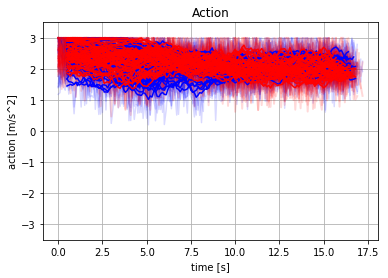

In [62]:
linewidth_para = 2

N_RA = 10
pltAlpha = 0.15

# print action
for time, action_1 in zip(times,actions_1):
    plt.plot(time[:-1],
             action_1[:-1],
             c='b',
             alpha=pltAlpha)
for time, action_2 in zip(times,actions_2):
    plt.plot(time[:-1],
             action_2[:-1],
             linewidth=linewidth_para,
             c='r',
             alpha=pltAlpha)

# print action with rolling avg
for time, action_1 in zip(times,actions_1):
    action_1_RA = np.convolve(action_1[:,0],np.ones((N_RA,))/N_RA,mode='valid')
    plt.plot(time[N_RA//2:-N_RA//2],
             action_1_RA[:-1],
             c='b')
for time, action_2 in zip(times,actions_2):
    action_2_RA = np.convolve(action_2[:,0],np.ones((N_RA,))/N_RA,mode='valid')
    plt.plot(time[N_RA//2:-N_RA//2],
             action_2_RA[:-1],
             c='r')    
    
plt.xlabel('time [s]')
plt.ylabel('action [m/s^2]')
plt.grid()
plt.ylim(-3.5,3.5)
#plt.xlim(0,15)
plt.title('Action')

### D3) Vergleich der Geschwindigkeit beider Fahrzeuge

(-5, 40)

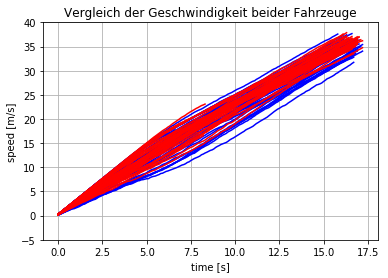

In [63]:
for time, veh_speed_1 in zip(times,veh_speeds_1):
    plt.plot(time[:-1],
             veh_speed_1[:-1],
             c='b')
for time, veh_speed_2 in zip(times,veh_speeds_2):
    plt.plot(time[:-1],
             veh_speed_2[:-1],
             c='r')
plt.xlabel('time [s]')
plt.ylabel('speed [m/s]')
plt.grid()
plt.title('Vergleich der Geschwindigkeit beider Fahrzeuge')
plt.ylim(-5,40)
#plt.xlim(0,15)

### D4) Position beider Fahrzeuge

Text(0.5, 1.0, 'Vergleich der Position beider Fahrzeuge')

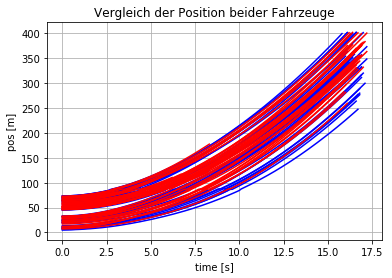

In [64]:
for time, veh_pos_1 in zip(times,veh_poss_1):
    plt.plot(time[:-1],
             veh_pos_1[:-1],
             c='b')
for time, veh_pos_2 in zip(times,veh_poss_2):
    plt.plot(time[:-1],
             veh_pos_2[:-1],
             c='r')
#plt.ylim(0,130)
plt.xlabel('time [s]')
plt.ylabel('pos [m]')
plt.grid()
plt.title('Vergleich der Position beider Fahrzeuge')
#plt.ylim(0,220)
#plt.xlim(0,15)

### D5) Reward

Text(0.5, 1.0, 'Reward')

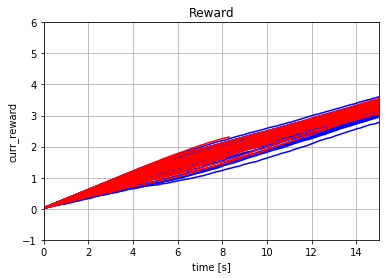

In [65]:
for time, curr_reward in zip(times,curr_rewards_1):
    plt.plot(time[:-1],
             curr_reward[:-1],
             c='b')
for time, curr_reward in zip(times,curr_rewards_2):
    plt.plot(time[:-1],
             curr_reward[:-1],
             c='r')
plt.xlabel('time [s]')
plt.ylabel('curr_reward')
plt.ylim(-1,6)
plt.xlim(0,15)
plt.grid()
plt.title('Reward')

### D6) Kooperation und Konkurrenz

In [ ]:
n_episodes = 0
n_nr2first = 0

for veh_pos_1, veh_pos_2 in zip(veh_poss_1,veh_poss_2):
    n_episodes += 1
    if veh_pos_2[-2] > veh_pos_1[-2]:
        n_nr2first += 1
print("k1 all:")
print(n_nr2first/n_episodes)

In [ ]:
n_episodes = 0
n_nr2first = 0
n_notFarEnough = 0
n_successfull = 0

for veh_pos_1, veh_pos_2 in zip(veh_poss_1,veh_poss_2):
    n_episodes += 1
    if veh_pos_2[-2] > 46.2+13 or veh_pos_1[-2] > 46.2+13:
        n_successfull += 1
        if veh_pos_2[-2] > veh_pos_1[-2]:
            n_nr2first += 1
    else:
        n_notFarEnough += 1
    
print("k1 ein Fzg muss KP verlassen haben:")
print(n_nr2first/n_successfull)

print("Number notFarEnough:")
print(n_notFarEnough)

In [ ]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

N_RA = 10
pltAlpha = 0.25
linewidth_para = 4.0
linewidth_para_alpha = 2.0

action_1 = actions_1[0]
action_2 = actions_2[0]
time = times[0]

action_1_RA = np.convolve(action_1[:,0],np.ones((N_RA,))/N_RA,mode='valid')
action_2_RA = np.convolve(action_2[:,0],np.ones((N_RA,))/N_RA,mode='valid')

len(action_1)

plt.figure(figsize=(1.910*10/2*1.2,0.992*10/2*0.8),dpi=100)
for i in range(len(action_1)-2): 
    plt.plot(time[:i],
            action_1[:i],
            linewidth=linewidth_para_alpha,
            alpha=pltAlpha,
            c='b')
    plt.plot(time[:i],
            action_2[:i],
            linewidth=linewidth_para_alpha,
            alpha=pltAlpha,
            c='r')
    if i > N_RA//2:
        if i < len(action_1)-3-N_RA//2:   
            plt.plot(time[N_RA//2:i],
                     action_1_RA[:i-N_RA//2],
                     linewidth=linewidth_para,
                     c='b')
            plt.plot(time[N_RA//2:i],
                     action_2_RA[:i-N_RA//2],
                     linewidth=linewidth_para,
                     c='r')
        else:
            plt.plot(time[N_RA//2:-N_RA//2],
                     action_1_RA[:-1],
                     linewidth=linewidth_para,
                     c='b')
            plt.plot(time[N_RA//2:-N_RA//2],
                     action_2_RA[:-1],
                     linewidth=linewidth_para,
                     c='r')
    plt.grid()
    plt.ylim(-0.5,3.5)
    #plt.xlim((-80+i)/10,(20+i)/10)
    plt.xlim(-1,len(action_1)/10+1)
    plt.xlabel('time [s]')
    plt.ylabel('action [m/s^2]')
    plt.title('Action')
    plt.tight_layout()
    plt.savefig("action_"+str(i+1)+".png",dpi=100)
    plt.clf()